# Problem Statement

ElecKart is an e-commerce firm based out of Ontario, Canada specialising in electronic products. Over the last one year, they had spent a significant amount of money on marketing. Occasionally, they had also offered big-ticket promotions (similar to the Big Billion Day). They are about to create a marketing budget for the next year, which includes spending on commercials, online campaigns, and pricing & promotion strategies. The CFO feels that the money spent over the last 12 months on marketing was not sufficiently impactful, and, that they can either cut on the budget or reallocate it optimally across marketing levers to improve the revenue response.

 

Imagine that you are a part of the marketing team working on budget optimisation. You need to develop a market mix model to observe the actual impact of different marketing variables over the last year. Using your understanding of the model, you have to recommend the optimal budget allocation for different marketing levers for the next year.

# 1. Data Reading And Understanding

In [1]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
pd.set_option('display.float_format', '{:0.3f}'.format)

In [2]:
# Set ipython's max row display
pd.set_option('display.max_row', 500)

# Set iPython's max column width to 100
pd.set_option('display.max_columns', 100)

In [3]:
# Read the file
consumer = pd.read_csv('../input/eleckartdata/ConsumerElectronics.csv')

In [4]:
# Take a look at the first 5 rows
consumer.head()

fsn_id           order_date  Year  Month             order_id  \
0  ACCCX3S58G7B5F6P  2015-10-17 15:11:54  2015     10 3419300926147000.000   
1  ACCCX3S58G7B5F6P  2015-10-19 10:07:22  2015     10 1420830839915200.000   
2  ACCCX3S5AHMF55FV  2015-10-20 15:45:56  2015     10 2421912925714800.000   
3  ACCCX3S5AHMF55FV  2015-10-14 12:05:15  2015     10 4416592101738400.000   
4  ACCCX3S5AHMF55FV  2015-10-17 21:25:03  2015     10 4419525153426400.000   

         order_item_id   gmv  units deliverybdays deliverycdays  \
0 3419300926147000.000  6400      1            \N            \N   
1 1420830839915200.000  6900      1            \N            \N   
2 2421912925714800.000  1990      1            \N            \N   
3 4416592101738400.000  1690      1            \N            \N   
4 4419525153426400.000  1618      1            \N            \N   

  s1_fact.order_payment_type  sla                 cust_id  \
0                        COD    5  -1.01299130778588E+018   
1                        COD    7  -8.99032457905512E+018   
2                        COD   10   -1.0404429420466E+018   
3                    Prepaid    4  -7.60496084352714E+018   
4                    Prepaid    6    2.8945572083453E+018   

                  pincode product_analytic_super_category  \
0  -7.79175582905735E+018                              CE   
1   7.33541149097431E+018                              CE   
2  -7.47768776228657E+018                              CE   
3  -5.83593163877661E+018                              CE   
4   5.34735360997242E+017                              CE   

  product_analytic_category product_analytic_sub_category  \
0           CameraAccessory               CameraAccessory   
1           CameraAccessory               CameraAccessory   
2           CameraAccessory               CameraAccessory   
3           CameraAccessory               CameraAccessory   
4           CameraAccessory               CameraAccessory   

  product_analytic_vertical  product_mrp  product_procurement_sla  
0              CameraTripod         7190                        0  
1              CameraTripod         7190                        0  
2              CameraTripod         2099                        3  
3              CameraTripod         2099                        3  
4              CameraTripod         2099                        3

In [5]:
# Get info about the dataset
consumer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648824 entries, 0 to 1648823
Data columns (total 20 columns):
fsn_id                             1648824 non-null object
order_date                         1648824 non-null object
Year                               1648824 non-null int64
Month                              1648824 non-null int64
order_id                           1648824 non-null float64
order_item_id                      1648824 non-null float64
gmv                                1648824 non-null object
units                              1648824 non-null int64
deliverybdays                      1648824 non-null object
deliverycdays                      1648824 non-null object
s1_fact.order_payment_type         1648824 non-null object
sla                                1648824 non-null int64
cust_id                            1648824 non-null object
pincode                            1648824 non-null object
product_analytic_super_category    1648824 non-null object
prod

- There are no null values in the dataset!
- Columns like order_date, gmv, deliverybdays, deliverycdays, pincode have incorrect data types and need to be changed.

In [6]:
# Let's take a look at the statistical info of the dataset
consumer.describe(percentiles = [0.25, 0.5, 0.75, 0.90, 0.99, 0.999])

Year       Month             order_id          order_item_id  \
count 1648824.000 1648824.000          1648824.000            1648824.000   
mean     2015.519       6.586 2842444674146328.500  13756277530325384.000   
std         0.500       3.623 1269134332596894.250  55945981798631008.000   
min      2015.000       1.000         76331515.000          108016495.000   
25%      2015.000       3.000 1602588503969575.000   1606725138262300.000   
50%      2016.000       6.000 2611824528743350.000   2619185472741150.000   
75%      2016.000      10.000 3610613539366250.000   4397705931628400.000   
90%      2016.000      11.000 4520541993801910.000   4561094519921880.000   
99%      2016.000      12.000 4626530348261358.000 300037347714467712.000   
99.9%    2016.000      12.000 4639920775381028.000 300037347717600000.000   
max      2016.000      12.000 5395076790260600.000 300037347717704000.000   

            units         sla  product_mrp  product_procurement_sla  
count 1648824.000 1648824.000  1648824.000              1648824.000  
mean        1.022       5.688     4108.309                    5.403  
std         0.254       2.983     8510.918                   53.466  
min         1.000       0.000        0.000                   -1.000  
25%         1.000       4.000      799.000                    1.000  
50%         1.000       6.000     1599.000                    2.000  
75%         1.000       7.000     3499.000                    3.000  
90%         1.000       9.000     7120.000                    5.000  
99%         2.000      13.000    45990.000                   13.000  
99.9%       4.000      17.000    54950.000                 1000.000  
max        50.000    1006.000   299999.000                 1000.000

- All the numeric columns are almost normally distributed!
- We need to cap the SLAs to max and min values.

# 2. Data Cleaning And Preparation

In [7]:
consumer.columns

Index(['fsn_id', 'order_date', 'Year', 'Month', 'order_id', 'order_item_id',
       'gmv', 'units', 'deliverybdays', 'deliverycdays',
       's1_fact.order_payment_type', 'sla', 'cust_id', 'pincode',
       'product_analytic_super_category', 'product_analytic_category',
       'product_analytic_sub_category', 'product_analytic_vertical',
       'product_mrp', 'product_procurement_sla'],
      dtype='object')

In [8]:
consumer.replace(r'^\s+$', np.nan, regex=True, inplace = True)
consumer.replace('\\N', np.nan, inplace = True)

In [9]:
# let's check the null percentage for each column
round(100*(consumer.isnull().sum()/len(consumer.index)), 2)

fsn_id                             0.000
order_date                         0.000
Year                               0.000
Month                              0.000
order_id                           0.000
order_item_id                      0.000
gmv                                0.300
units                              0.000
deliverybdays                     79.630
deliverycdays                     79.630
s1_fact.order_payment_type         0.000
sla                                0.000
cust_id                            0.300
pincode                            0.300
product_analytic_super_category    0.000
product_analytic_category          0.000
product_analytic_sub_category      0.000
product_analytic_vertical          0.350
product_mrp                        0.000
product_procurement_sla            0.000
dtype: float64

In [10]:
#removing null valued GMV
consumer = consumer.loc[~(consumer.gmv.isnull())]

In [11]:
# let's check the null percentage for each column again
round(100*(consumer.isnull().sum()/len(consumer.index)), 2)

fsn_id                             0.000
order_date                         0.000
Year                               0.000
Month                              0.000
order_id                           0.000
order_item_id                      0.000
gmv                                0.000
units                              0.000
deliverybdays                     79.570
deliverycdays                     79.570
s1_fact.order_payment_type         0.000
sla                                0.000
cust_id                            0.000
pincode                            0.000
product_analytic_super_category    0.000
product_analytic_category          0.000
product_analytic_sub_category      0.000
product_analytic_vertical          0.350
product_mrp                        0.000
product_procurement_sla            0.000
dtype: float64

#### 1. product_analytic_super_category, product_analytic_category, product_analytic_sub_category, product_analytic_vertical

In [12]:
# Let's drop the rows that have product analytic vertical as null.
consumer = consumer[~pd.isnull(consumer.product_analytic_vertical)]

In [13]:
# Let's now check the product_analytic_super_category unique values
consumer.product_analytic_super_category.unique()

array(['CE'], dtype=object)

- There is only one value for this column. Hence, we can remove the column.

In [14]:
consumer.drop('product_analytic_super_category',1, inplace = True)

In [15]:
consumer.product_analytic_category.unique()

array(['CameraAccessory', 'GamingHardware', 'EntertainmentSmall',
       'GameCDDVD', 'Camera'], dtype=object)

In [16]:
consumer.product_analytic_sub_category.unique()

array(['CameraAccessory', 'GamingAccessory', 'Speaker', 'HomeAudio',
       'CameraStorage', 'AmplifierReceiver', 'AudioMP3Player', 'Game',
       'Camera', 'GamingConsole', 'HomeTheatre', 'AudioAccessory',
       'TVVideoSmall', 'GameMembershipCards'], dtype=object)

In [17]:
#The three product sub categories for the MMM are - camera accessory, home audio and gaming accessory.
#Removing the rows with other sub categories

consumer = consumer.loc[(consumer.product_analytic_sub_category=='CameraAccessory') |
                       (consumer.product_analytic_sub_category=='GamingAccessory')|
                       (consumer.product_analytic_sub_category=='HomeAudio')]

In [18]:
consumer.product_analytic_vertical.unique()

array(['CameraTripod', 'Lens', 'CameraBag', 'Flash', 'CameraBattery',
       'CameraBatteryCharger', 'GamePad', 'GamingAccessoryKit',
       'GamingHeadset', 'GamingMemoryCard', 'MotionController',
       'GamingMouse', 'GamingAdapter', 'TVOutCableAccessory', 'GamingGun',
       'JoystickGamingWheel', 'HomeAudioSpeaker', 'CameraRemoteControl',
       'Binoculars', 'Filter', 'GamingMousePad', 'Strap',
       'GamingKeyboard', 'Dock', 'SlingBox', 'GamingSpeaker',
       'CoolingPad', 'BoomBox', 'CameraBatteryGrip', 'CameraAccessory',
       'CameraFilmRolls', 'CameraMount', 'DockingStation', 'DJController',
       'ExtensionTube', 'FMRadio', 'HiFiSystem', 'KaraokePlayer',
       'Telescope', 'VoiceRecorder', 'GamingChargingStation',
       'CameraEyeCup', 'GameControlMount', 'SoundMixer', 'CameraLEDLight',
       'CameraMicrophone', 'FlashShoeAdapter', 'Softbox',
       'ReflectorUmbrella', 'Teleconverter', 'CameraHousing'],
      dtype=object)

#### 2. gmv

In [19]:
#Let's convert the data type of GMV

consumer['gmv'] = pd.to_numeric(consumer['gmv'])

In [20]:
#Checking the minimum and maximum values of GMV
print(consumer.gmv.min())
print(consumer.gmv.max())

0.0
148050.0


gmv (Gross Merchendising Value - The cost price at which the item is sold multiplied by number of units) - Value at 0.0 seems odd. 

Assumption : It could be because of any promotional offers, hence not deleting them


Looks like a duplicated order. Let's check for duplicates

In [21]:
consumer[consumer.duplicated(['fsn_id','order_date','order_id','order_item_id',
                              'gmv','cust_id','pincode',
                              'product_analytic_category','product_analytic_sub_category',
                             'product_analytic_vertical'])]
#consumer.loc[consumer.duplicated()]

fsn_id           order_date  Year  Month  \
76506    ACCE6YVWVHXXKCHW  2016-02-22 14:52:12  2016      2   
675305   ACCE7AV9TZHHAESC  2016-04-27 07:03:09  2016      4   
944830   ACCDH7MFZJGRWJCW  2016-04-27 00:19:25  2016      4   
944903   ACCDH7MFZJGRWJCW  2016-04-27 00:19:25  2016      4   
969493   ACCE94WYZR6GFDFP  2016-04-27 00:33:53  2016      4   
...                   ...                  ...   ...    ...   
1647201  VOREYV2HWZDUFZ9Y  2015-09-29 23:19:16  2015      9   
1647202  VOREYV2HWZDUFZ9Y  2015-09-30 22:08:55  2015      9   
1647203  VOREYV2HWZDUFZ9Y  2015-09-06 22:14:34  2015      9   
1647204  VOREYV2HWZDUFZ9Y  2015-09-11 16:11:52  2015      9   
1647205  VOREYV2HWZDUFZ9Y  2015-09-22 10:25:36  2015      9   

                    order_id          order_item_id      gmv  units  \
76506   3417290135521600.000   3417290135521600.000  350.000      1   
675305  2532857872757300.000   2532857872757300.000 4090.000      1   
944830  3575842474884000.000 300037347717633984.000  287.000      1   
944903  3575842474884000.000   3575842474884000.000  287.000      1   
969493  1569690464156100.000   1569690464156100.000  190.000      1   
...                      ...                    ...      ...    ...   
1647201 4404040347013500.000   4404040347013500.000 5200.000      1   
1647202 2404860211262700.000   2404860211262700.000 5200.000      1   
1647203 3381987673542980.000 300037347712641984.000 4299.000      1   
1647204 2388231540197500.000 300037347714801984.000 4599.000      1   
1647205 1397525368627000.000   1397525368627000.000 5399.000      1   

        deliverybdays deliverycdays s1_fact.order_payment_type  sla  \
76506               7             8                    Prepaid    8   
675305              2             3                    Prepaid    5   
944830              5             6                    Prepaid    5   
944903            NaN           NaN                    Prepaid    7   
969493            NaN           NaN                    Prepaid    6   
...               ...           ...                        ...  ...   
1647201           NaN           NaN                    Prepaid   11   
1647202           NaN           NaN                        COD   10   
1647203           NaN           NaN                        COD    7   
1647204           NaN           NaN                        COD    7   
1647205           NaN           NaN                        COD   15   

                        cust_id                  pincode  \
76506    -1.07035781735315E+018    8.45640885616433E+018   
675305   233114630667481984.000 -4071447699433639936.000   
944830  8788006738130379776.000  2175163142166510080.000   
944903  8788006738130379776.000  2175163142166510080.000   
969493  6615160307439460352.000 -7307608120567170048.000   
...                         ...                      ...   
1647201   -8.7451731063629E+018     3.1115855848644E+018   
1647202  -8.90379286900787E+018   -5.60164751149697E+018   
1647203   6.09775807960118E+018   -5.15252222605545E+018   
1647204   2.83122075392855E+018    3.60782023838401E+018   
1647205   -4.4355960622754E+018   -2.10625335594417E+018   

        product_analytic_category product_analytic_sub_category  \
76506              GamingHardware               GamingAccessory   
675305             GamingHardware               GamingAccessory   
944830             GamingHardware               GamingAccessory   
944903             GamingHardware               GamingAccessory   
969493            CameraAccessory               CameraAccessory   
...                           ...                           ...   
1647201        EntertainmentSmall                     HomeAudio   
1647202        EntertainmentSmall                     HomeAudio   
1647203        EntertainmentSmall                     HomeAudio   
1647204        EntertainmentSmall                     HomeAudio   
1647205        EntertainmentSmall                     HomeAudio   

        product_analytic_verti

In [22]:
len(consumer[consumer.duplicated(['fsn_id','order_date','order_id','order_item_id',
                              'gmv','cust_id','pincode',
                              'product_analytic_category','product_analytic_sub_category',
                             'product_analytic_vertical'])])

37355

In [23]:
#Removing duplicated values
consumer = consumer[~consumer.duplicated(['fsn_id','order_date','order_id','order_item_id',
                              'gmv','cust_id','pincode',
                              'product_analytic_category','product_analytic_sub_category',
                             'product_analytic_vertical'])]

In [24]:
consumer.loc[consumer.duplicated()]

Empty DataFrame
Columns: [fsn_id, order_date, Year, Month, order_id, order_item_id, gmv, units, deliverybdays, deliverycdays, s1_fact.order_payment_type, sla, cust_id, pincode, product_analytic_category, product_analytic_sub_category, product_analytic_vertical, product_mrp, product_procurement_sla]
Index: []

In [25]:
#Checking nulls in gmv value
consumer.gmv.isnull().sum()

0

In [26]:
consumer.shape

(527240, 19)

#### 3. deliverybdays and deliverycdays

In [27]:
# The columns deliverybdays and deliverycdays are populated with \N, which is incorrect.
# Let's replace them with null.
print(consumer.deliverybdays.value_counts().head())
print(consumer.deliverycdays.value_counts().head())

4    23535
5    23058
3    18708
6    17915
2    10924
Name: deliverybdays, dtype: int64
5    21584
6    19605
4    18637
7    14137
3    13212
Name: deliverycdays, dtype: int64


In [28]:
print(consumer.deliverybdays.isnull().sum()/len(consumer))
print(consumer.deliverycdays.isnull().sum()/len(consumer))

0.7776837872695547
0.7776837872695547


In [29]:
# We can drop delivercdays and deliverybdays column as it has 79% null values.
consumer.drop(['deliverybdays', 'deliverycdays'],1, inplace = True)

#### 4. order_date

In [30]:
# Befor dealing with null values, let's first correct the data type of order_date
consumer['order_date'] = pd.to_datetime(consumer['order_date'])

In [31]:
# We now need to check if the dates are not outside July 2015 and June 2016.
consumer.loc[(consumer.order_date < '2015-07-01') | (consumer.order_date >= '2016-07-01')]

fsn_id          order_date  Year  Month  \
1071934  ACCCX3SGRHSRGTHZ 2016-07-01 01:07:36  2016      7   
1074944  ACCD6HEGVCDHXPNQ 2016-07-03 16:12:47  2016      7   
1077916  ACCDFZEJAXVJDGS7 2016-07-01 01:03:17  2016      7   
1080123  ACCDHQ8N6DGBYGKZ 2016-07-02 07:04:29  2016      7   
1082641  ACCDPYBFTPE5PRGT 2016-07-02 06:49:00  2016      7   
1084813  ACCDTKPGAUZZAW8P 2016-07-02 07:03:53  2016      7   
1085073  ACCDTREV54TU7YFE 2016-07-02 05:59:50  2016      7   
1087591  ACCDXU57QZHYSZNA 2016-07-02 05:34:22  2016      7   
1087961  ACCDY8HPXWX5DXN4 2016-07-02 04:06:18  2016      7   
1094153  ACCE4VG8A49WEZYZ 2016-07-01 00:52:19  2016      7   
1106167  ACCE9HQSWMJ8XCYZ 2016-07-02 07:03:47  2016      7   
1110837  ACCEA7JRRKMR2FFR 2016-07-02 04:06:23  2016      7   
1112866  ACCEAEA2GSFMH9JN 2016-07-02 06:09:15  2016      7   
1114565  ACCEARG3TGK3MVKZ 2016-07-01 00:49:26  2016      7   
1115517  ACCEAYTTBFDE4HVP 2016-07-02 04:10:53  2016      7   
1116102  ACCEB2GBYXXV8Y3Y 2016-07-02 04:17:32  2016      7   
1125226  ACCEBWJF2G28UJY5 2016-07-02 06:23:27  2016      7   
1125493  ACCEBWJF2G28UJY5 2016-07-02 04:23:20  2016      7   
1145431  ACCEEJ458WAXGHN3 2016-07-02 06:16:44  2016      7   
1161957  ACCEGPV4NQAMCEDP 2016-07-02 06:03:20  2016      7   
1163831  ACCEGWS7KQMRZHMH 2016-07-02 04:14:52  2016      7   
1163906  ACCEGXK6RY6UGD6X 2016-07-07 13:13:19  2016      7   
1165088  ACCEH5MY5MHHRC3A 2016-07-02 02:30:56  2016      7   
1196168  CMTEH9YDVVZEFFAH 2016-07-02 04:34:32  2016      7   
1229263  ACCCX3SHBDQGU54P 2016-07-04 20:30:03  2016      7   
1229951  ACCCZ34CBZFWKPBQ 2016-07-10 17:52:12  2016      7   
1230020  ACCCZ34CBZFWKPBQ 2016-07-08 00:40:32  2016      7   
1230166  ACCCZ3TE442VHFRH 2016-07-07 02:05:16  2016      7   
1230194  ACCCZ3TFSPGHKCUS 2016-07-09 13:07:09  2016      7   
1230498  ACCCZZC9FYZUQZTE 2016-07-04 16:16:55  2016      7   
1232378  ACCDBGH9GQJJQDKS 2016-07-06 22:37:24  2016      7   
1235660  ACCDKYFK9VJCXZH6 2016-07-10 17:48:38  2016      7   
1236042  ACCDMEU8PDYG6SA8 2016-07-07 00:55:28  2016      7   
1236197  ACCDMEU8PMVXQHCP 2016-07-07 06:38:42  2016      7   
1236488  ACCDMT7JG2XS3WE7 2016-07-08 06:01:49  2016      7   
1236538  ACCDN8VGRZGS8Q8Y 2016-07-10 00:06:01  2016      7   
1237506  ACCDQHZMXRGW2AFD 2016-07-04 11:41:32  2016      7   
1237622  ACCDQPHG6MKJQQRU 2016-07-08 10:05:18  2016      7   
1237810  ACCDRCR5MVFZBPEY 2016-07-17 15:05:33  2016      7   
1238448  ACCDSB5FBUBBZHEB 2016-07-05 20:10:41  2016      7   
1238583  ACCDTHM6EGFWSNSW 2016-07-06 13:35:21  2016      7   
1238972  ACCDTREV54TU7YFE 2016-07-08 00:06:43  2016      7   
1239393  ACCDTZ99YRQBCTJF 2016-07-05 18:29:26  2016      7   
1239593  ACCDUV6YYZFPFCQJ 2016-07-01 00:36:37  2016      7   
1240149  ACCDVZ83VBHCWFFA 2016-07-07 13:52:47  2016      7   
1240298  ACCDWDNPZKUWYSTZ 2016-07-04 17:02:08  2016      7   
1240531  ACCDWUGRVHGR2CHU 2016-07-05 13:10:47  2016      7   
1240760  ACCDXA2Z2PV2YQWX 2016-07-05 17:37:12  2016      7   
1241201  ACCDY5VXFKCT2DVH 2016-07-01 11:06:03  2016      7   
1241215  ACCDY5VXFKCT2DVH 2016-07-08 20:16:29  2016      7   
1241292  ACCDY9H9N3HHCPEB 2016-07-07 02:02:32  2016      7   
1241907  ACCDYKKYSNYZSZJW 2016-07-10 17:34:41  2016      7   
1242232  ACCDZ57ZHZNEH3TH 2016-07-07 17:10:41  2016      7   
1242236  ACCDZ6BUKR6UZ24B 2016-07-01 09:13:11  2016      7   
1243481  ACCE2MGE2WW4ZX7Z 2016-07-05 18:11:23  2016      7   
1243903  ACCE32FMWSAZZ5AQ 2016-07-08 08:04:24  2016      7   
1244102  ACCE3EYJFYZASBQZ 2016-07-08 02:11:59  2016      7   
1244403  ACCE3HTH7SSFXGSE 2016-07-08 17:23:48  2016      7   
1245713  ACCE53FQZTN9UNPG 2016-07-01 00:11:38  2016      7   
1245832  ACCE53FQZTN9UNPG 2016-07-13 01:31:26  2016      7   
1245894  ACCE55KAHHGPYH44 2016-07-01 09:11:38  2016      7   
1247265  ACCE5D5CKFZEMSYW 2016-07-08 01:10:02  2016      7   
1249036  ACCE7AV9TZHHAESC 2016-07-09 09:01:46  2016      7   
1249115  ACCE7AX4Q4YFUUKU 2016-07-01 16:09:48  2016

- There is 608 records that lie outside the range. Let's delete those rows.

In [32]:
consumer = consumer.loc[(consumer.order_date >= '2015-07-01')]
consumer = consumer.loc[(consumer.order_date < '2016-07-01')]

#### 5. s1_fact.order_payment_type

In [33]:
#Changing the name of the column s1_fact.order_payment_type
consumer.rename(columns={'s1_fact.order_payment_type':'order_payment_type'}, inplace=True)

In [34]:
consumer.order_payment_type.value_counts()

COD        384484
Prepaid    142556
Name: order_payment_type, dtype: int64

Clearly COD is preferred more than Prepaid order payment type.

#### 6. pincode, custid

In [35]:
#Converting the datatype
consumer['pincode'] = pd.to_numeric(consumer['pincode'])

In [36]:
#Let's see the values of pincode field
consumer.pincode.min()

-9.22183035419401e+18

In [37]:
consumer.pincode.isnull().sum()

0

In [38]:
# Before handling null values, there are negative values for pincode which we need to handle.
# Let's make all the negative values as positive.
consumer.pincode = consumer.pincode.abs()

In [39]:
# Let's now check the frequency of pincodes to decide whether we can impute the missing pincodes with the highest frequency one.
consumer.pincode.value_counts()

9031043207091489792.000    4163
977901032130400000.000     3464
8649648456016409600.000    2194
6513330541343979520.000    2046
7346497166693510144.000    2020
                           ... 
8758708643309939712.000       1
7326430491616629760.000       1
3640633689989819904.000       1
2923543851419429888.000       1
7225648070760330240.000       1
Name: pincode, Length: 6633, dtype: int64

In [40]:
#pincode and cust_id doesn't seem to be of any use

In [41]:
consumer.drop(['cust_id','pincode'], axis = 1, inplace = True)

#### 7. product_mrp

In [42]:
consumer[(consumer.product_mrp == 0)].head()

fsn_id          order_date  Year  Month             order_id  \
12807  ACCDGXGZQUGHFYHT 2015-10-23 19:26:01  2015     10 1424634732111000.000   
15031  ACCDHHZZGFBDPJRP 2015-10-20 21:27:29  2015     10 3422117911872300.000   
15032  ACCDHHZZGFBDPJRP 2015-10-28 23:49:41  2015     10 2429116502765100.000   
15529  ACCDHTZ4CZCECAFF 2015-10-27 01:05:20  2015     10 1427429193266100.000   
16980  ACCDK94FSKCZBJCU 2015-10-28 18:36:07  2015     10 4428925467622000.000   

             order_item_id      gmv  units order_payment_type  sla  \
12807 1424634732111000.000 3500.000      1                COD    5   
15031 3422117911872300.000  690.000      1            Prepaid    6   
15032 2429116502765100.000  690.000      1                COD    8   
15529 1427429193266100.000 1050.000      1                COD    7   
16980 4428925467622000.000 1099.000      1            Prepaid    6   

      product_analytic_category product_analytic_sub_category  \
12807            GamingHardware               GamingAccessory   
15031           CameraAccessory               CameraAccessory   
15032           CameraAccessory               CameraAccessory   
15529           CameraAccessory               CameraAccessory   
16980        EntertainmentSmall                     HomeAudio   

      product_analytic_vertical  product_mrp  product_procurement_sla  
12807        GamingAccessoryKit            0                       -1  
15031             CameraBattery            0                       -1  
15032             CameraBattery            0                       -1  
15529             CameraBattery            0                       -1  
16980                      Dock            0                       -1

In [43]:
len(consumer[(consumer.product_mrp == 0)])

3236

In [44]:
#Removing values with 0 MRP, since that is not possible at all
consumer = consumer.loc[~(consumer.product_mrp==0)]

In [45]:
consumer['gmv_per_unit'] = consumer.gmv/consumer.units

In [46]:
#Replacing the values of MRP with GMV per unit where the values of GMV/unit is greater than MRP
consumer['product_mrp'].loc[consumer.gmv_per_unit>consumer.product_mrp] = consumer['gmv_per_unit']

In [47]:
consumer.loc[consumer.gmv_per_unit>consumer.product_mrp]

Empty DataFrame
Columns: [fsn_id, order_date, Year, Month, order_id, order_item_id, gmv, units, order_payment_type, sla, product_analytic_category, product_analytic_sub_category, product_analytic_vertical, product_mrp, product_procurement_sla, gmv_per_unit]
Index: []

In [48]:
consumer.drop(['gmv_per_unit'],1,inplace=True)

#### 8. sla and product_procurement_sla

In [49]:
consumer.shape

(523804, 15)

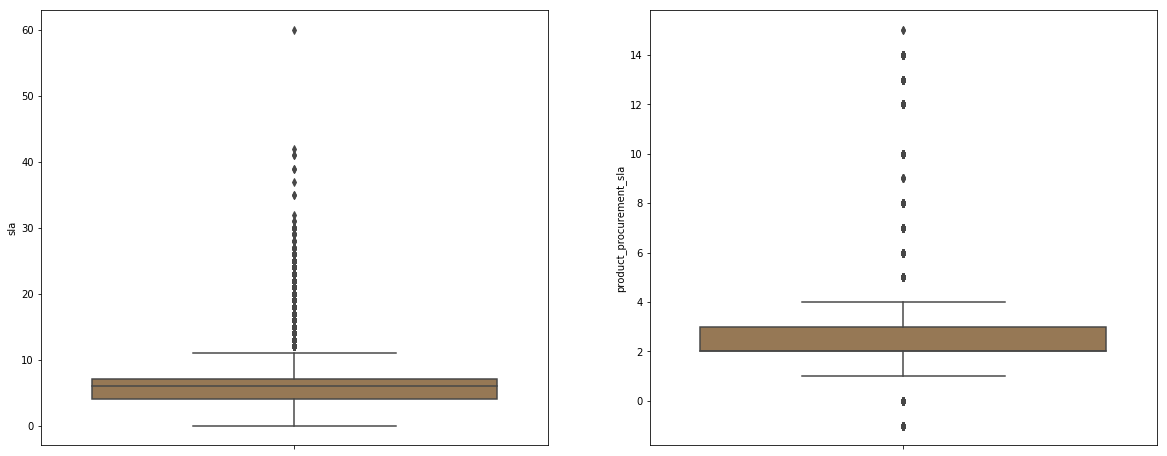

In [50]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.boxplot(y=consumer.sla, palette=("cubehelix"))

plt.subplot(1,2,2)
sns.boxplot(y=consumer.product_procurement_sla, palette=("cubehelix"))

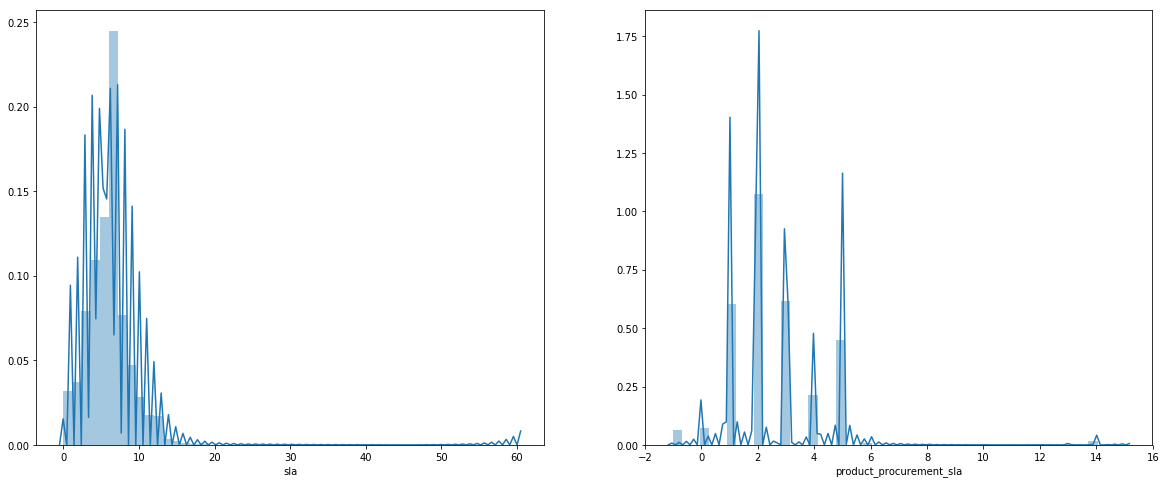

In [51]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.distplot(consumer.sla)

plt.subplot(1,2,2)
sns.distplot(consumer.product_procurement_sla)

In [52]:
consumer.sla.describe(percentiles=[0.0,0.25,0.5,0.75,0.9,0.95,0.99,1.0])

count   523804.000
mean         5.885
std          2.697
min          0.000
0%           0.000
25%          4.000
50%          6.000
75%          7.000
90%          9.000
95%         11.000
99%         14.000
100%        60.000
max         60.000
Name: sla, dtype: float64

In [53]:
consumer.product_procurement_sla.describe(percentiles=[0.0,0.25,0.5,0.75,0.9,0.95,0.99,1.0])

count   523804.000
mean         2.560
std          1.715
min         -1.000
0%          -1.000
25%          2.000
50%          2.000
75%          3.000
90%          5.000
95%          5.000
99%          6.000
100%        15.000
max         15.000
Name: product_procurement_sla, dtype: float64

In [54]:
#Converting negative values to the positive
len(consumer.loc[consumer.product_procurement_sla<0])

10901

In [55]:
consumer.product_procurement_sla = abs(consumer.product_procurement_sla)

In [56]:
consumer.sla.std()

2.6969113975705605

In [57]:
#Taking three sigma values for outliers treatment
print(consumer.sla.mean()+(3*(consumer.sla.std())))
print(consumer.sla.mean()-(3*(consumer.sla.std())))

13.975410522025701
-2.206057863397664


In [58]:
consumer.product_procurement_sla.std()

1.6510180203178295

In [59]:
#Taking three sigma values for outliers treatment
print(consumer.product_procurement_sla.mean()+(3*(consumer.product_procurement_sla.std())))
print(consumer.product_procurement_sla.mean()-(3*(consumer.product_procurement_sla.std())))

7.554523312811053
-2.3515848090959235


In [60]:
# Capping the values at three sigma value
len(consumer[consumer.sla > 14])

3382

In [61]:
# Let's cap the SLAs.
consumer.loc[consumer.sla > 14,'sla'] = 14

In [62]:
# Similarly, the min value of product procurement sla is 0 and the max value is 15. However, three sigma value is 7. 
print(len(consumer[consumer.product_procurement_sla > 7]))

3813


In [63]:
# Let's cap the product procuremtn SLAs.
consumer.loc[consumer.product_procurement_sla > 7,'product_procurement_sla'] = 7

In [64]:
consumer.shape

(523804, 15)

In [65]:
consumer.loc[consumer.duplicated()]

Empty DataFrame
Columns: [fsn_id, order_date, Year, Month, order_id, order_item_id, gmv, units, order_payment_type, sla, product_analytic_category, product_analytic_sub_category, product_analytic_vertical, product_mrp, product_procurement_sla]
Index: []

#### Duplicates removal

In [66]:
len(consumer[consumer.duplicated(['order_id','order_item_id'])])

12587

- Clearly, there can't be two orders with the same combination of order id and order item id that were ordered at the same timestamp.
- We can hence, drop the duplicates.

In [67]:
consumer = consumer[~consumer.duplicated(['order_id','order_item_id'])]

In [68]:
consumer.describe()

Year      Month             order_id          order_item_id  \
count 511217.000 511217.000           511217.000             511217.000   
mean    2015.576      6.228 2835122101205655.000   9390790484550196.000   
std        0.494      3.674 1290983206428331.750  43696556291619304.000   
min     2015.000      1.000        162957597.000          207200079.000   
25%     2015.000      3.000 1595735407225200.000   1598206083624100.000   
50%     2016.000      6.000 2609704882795000.000   2613097725117400.000   
75%     2016.000     10.000 3615581804522700.000   4388978807078500.000   
max     2016.000     12.000 4641664595370500.000 300037347717704000.000   

             gmv      units        sla  product_mrp  product_procurement_sla  
count 511217.000 511217.000 511217.000   511217.000               511217.000  
mean    1290.685      1.024      5.862     2500.782                    2.555  
std     2438.475      0.239      2.621     4699.526                    1.414  
min        0.000      1.000      0.000       79.000                    0.000  
25%      299.000      1.000      4.000      766.000                    2.000  
50%      550.000      1.000      6.000     1200.000                    2.000  
75%     1500.000      1.000      7.000     2800.000                    3.000  
max   148050.000     39.000     14.000   180000.000                    7.000

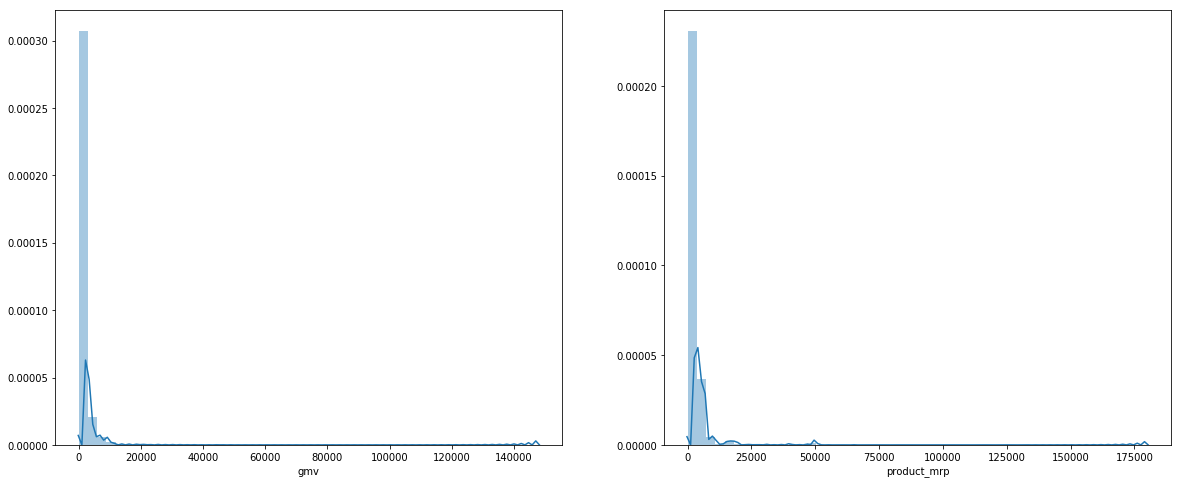

In [69]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.distplot(consumer.gmv)

plt.subplot(1,2,2)
sns.distplot(consumer.product_mrp)

plt.show()

# 3. Feature Engineering and KPI

### Pricing KPI

#### Listed Price

In [70]:
#2. gmv (Gross Merchendising Value - The cost price at which the item is sold multiplied by number of units)

# Let's derive listing price, which is nothing but gmv/units

consumer['listing_price'] = round((consumer.gmv/consumer.units),2)

In [71]:
#Let's check if there are any rows with listing price > MRP

len(consumer.loc[consumer.listing_price>consumer.product_mrp])

0

### Discount and Promotion related KPI

#### Dicount

In [72]:
# Let's now calculate the discount %, which is nothing but (mrp-list price)/mrp
consumer['discount'] = round(((consumer.product_mrp - consumer.listing_price)/(consumer.product_mrp)),2)

In [73]:
consumer['discount'].describe()

count   511217.000
mean         0.452
std          0.245
min          0.000
25%          0.260
50%          0.460
75%          0.630
max          1.000
Name: discount, dtype: float64

#### Total Price

In [74]:
consumer['Order_Item_Value'] = consumer['product_mrp'] * consumer['units']

### Mapping Week into the Data

In [75]:
# We can create the week number
consumer['week'] = np.where(consumer.Year == 2015, (consumer.order_date.dt.week - pd.to_datetime('2015-07-01').week + 1), consumer.order_date.dt.week+27)

# Dates like 2016-01-01 will be 53rd week as per ISO standard, hence the week value would be 53+27=80.
# We can make those values as week 27
consumer.week.values[(consumer.Year == 2016) & (consumer.week == 80)] = 27

### Product assortment and quality related KPI

#### Payment type

In [76]:
### Prepaid = '1' or COD = '0'
consumer['order_payment_type'] = np.where(consumer['order_payment_type'] == "Prepaid",1,0)

### Seasonality and Trend related KPI

#### Calendar

In [77]:
### Creating Calendar for the period
calendar = pd.DataFrame(pd.date_range('2015-07-01','2016-06-30').tolist(), columns = ['Date'])
### Mapping week in the calendar
calendar['week'] = calendar.Date.dt.week
### Jan 2016 should be week 54 ,not week 1.
calendar['week'] = np.where((calendar['week'] <= 26) & (calendar.Date.dt.year == 2016), calendar['week']+53, calendar['week'])


#### Special Sale

In [78]:
### Special Sales List

special_sales_list = ["2015-07-18","2015-07-19","2015-08-15","2015-08-16","2015-08-17","2015-08-28","2015-08-29",
                      "2015-08-30","2015-10-15","2015-10-16","2015-10-17","2015-11-07","2015-11-08","2015-11-09",
                      "2015-11-10","2015-11-11","2015-11-12","2015-11-13","2015-11-14","2015-12-25","2015-12-26",
                      "2015-12-27","2015-12-28","2015-12-29","2015-12-30","2015-12-31","2016-01-01","2016-01-02",
                      "2016-01-03","2016-01-20","2016-01-21","2016-01-22","2016-02-01","2016-02-02","2016-02-14",
                      "2016-02-15","2016-02-20","2016-02-21","2016-03-07","2016-03-08","2016-03-09","2016-05-25",
                      "2016-05-26","2016-05-27"]

ss_list = pd.DataFrame(special_sales_list,columns = ['Date'])
ss_list['Date'] = pd.to_datetime(ss_list['Date'])
ss_list['Special_sales'] = True

In [79]:
calendar = calendar.merge(ss_list, 'left')
calendar.fillna(False, inplace = True)

In [80]:
calendar['Special_sales'] = calendar['Special_sales'].astype(int)

In [81]:
calendar.head()

Date  week  Special_sales
0 2015-07-01    27              0
1 2015-07-02    27              0
2 2015-07-03    27              0
3 2015-07-04    27              0
4 2015-07-05    27              0

#### Payday

In [82]:
calendar['Payday'] = ((calendar['Date'].dt.day == 1) | (calendar['Date'].dt.day == 15)).astype(int)

#### Climate Data

In [83]:
### Ontario Climate data of year 2015-2016 
ontario_climate_2015 = pd.DataFrame(pd.read_csv('../input/eleckartdata/ONTARIO-2015.csv',encoding="ISO-8859-1",skiprows=24))
ontario_climate_2016 = pd.DataFrame(pd.read_csv('../input/eleckartdata/ONTARIO-2016.csv',encoding="ISO-8859-1",skiprows=24))

In [84]:
### Merge Calendar with dataset on week

ontario_climate = ontario_climate_2015.append(ontario_climate_2016)
ontario_climate = ontario_climate.reset_index()
ontario_climate.head()

index   Date/Time  Year  Month  Day Data Quality  Max Temp (Â°C)  \
0      0  2015-01-01  2015      1    1          â            0.000   
1      1  2015-01-02  2015      1    2          â            3.000   
2      2  2015-01-03  2015      1    3          â            2.500   
3      3  2015-01-04  2015      1    4          â            2.500   
4      4  2015-01-05  2015      1    5          â          -10.000   

  Max Temp Flag  Min Temp (Â°C) Min Temp Flag  Mean Temp (Â°C) Mean Temp Flag  \
0           NaN          -8.500           NaN           -4.300            NaN   
1           NaN          -3.000           NaN            0.000            NaN   
2           NaN          -4.000           NaN           -0.800            NaN   
3           NaN           0.000           NaN            1.300            NaN   
4           NaN         -13.500           NaN          -11.800            NaN   

   Heat Deg Days (Â°C) Heat Deg Days Flag  Cool Deg Days (Â°C)  \
0               22.300                NaN                0.000   
1               18.000                NaN                0.000   
2               18.800                NaN                0.000   
3               16.700                NaN                0.000   
4               29.800                NaN                0.000   

  Cool Deg Days Flag  Total Rain (mm) Total Rain Flag  Total Snow (cm)  \
0                NaN            0.000             NaN            0.000   
1                NaN            0.000             NaN            0.000   
2                NaN           24.000             NaN            0.000   
3                NaN            0.000             NaN            1.000   
4                NaN            0.000             NaN            3.000   

  Total Snow Flag  Total Precip (mm) Total Precip Flag  Snow on Grnd (cm)  \
0             NaN              0.000               NaN              0.000   
1             NaN              0.000               NaN              0.000   
2             NaN             24.000               NaN              0.000   
3             NaN              1.000               NaN              0.000   
4             NaN              3.000               NaN              1.000   

  Snow on Grnd Flag  Dir of Max Gust (10s deg)  Dir of Max Gust Flag  \
0               NaN                        nan                   nan   
1               NaN                        nan                   nan   
2               NaN                        nan                   nan   
3               NaN                        nan                   nan   
4               NaN                        nan                   nan   

   Spd of Max Gust (km/h)  Spd of Max Gust Flag  
0                     nan                   nan  
1                     nan                   nan  
2                     nan                   nan  
3                     nan                   nan  
4                     nan                   nan

In [85]:
### Checking for any nan values

round((ontario_climate.isnull().sum()/len(ontario_climate.index))*100,2)

index                         0.000
Date/Time                     0.000
Year                          0.000
Month                         0.000
Day                           0.000
Data Quality                 37.620
Max Temp (Â°C)               39.530
Max Temp Flag                98.080
Min Temp (Â°C)               44.050
Min Temp Flag                93.570
Mean Temp (Â°C)              44.050
Mean Temp Flag               93.570
Heat Deg Days (Â°C)          44.050
Heat Deg Days Flag           93.570
Cool Deg Days (Â°C)          44.050
Cool Deg Days Flag           93.570
Total Rain (mm)              37.620
Total Rain Flag              98.630
Total Snow (cm)              37.620
Total Snow Flag              97.810
Total Precip (mm)            37.620
Total Precip Flag            97.400
Snow on Grnd (cm)            37.620
Snow on Grnd Flag            98.910
Dir of Max Gust (10s deg)   100.000
Dir of Max Gust Flag        100.000
Spd of Max Gust (km/h)      100.000
Spd of Max Gust Flag        

In [86]:
### Dropping columns we do not require in the analysis.
ontario_climate.drop(['index','Data Quality','Max Temp Flag','Min Temp Flag','Mean Temp Flag',
                      'Heat Deg Days Flag','Cool Deg Days Flag','Total Rain Flag','Total Snow Flag',
                      'Total Precip Flag','Snow on Grnd Flag','Dir of Max Gust (10s deg)','Dir of Max Gust Flag',
                      'Spd of Max Gust (km/h)','Spd of Max Gust Flag'], axis = 1, inplace = True)

In [87]:
ontario_climate.columns = ['Date','Year','Month','Day','max_temp_C','min_temp_C','mean_temp_C','heat_deg_days','cool_deg_days','total_rain_mm','total_snow_cm','total_precip_mm','snow_on_grnd_cm']

In [88]:
ontario_climate['Date'] = ontario_climate['Date'].apply(pd.to_datetime)

In [89]:
### Keeping Climate data from July 15 to June 16

ontario_climate=ontario_climate[(ontario_climate['Month'] >= 7) & (ontario_climate['Year'] == 2015) 
                               |(ontario_climate['Month'] <= 6) & (ontario_climate['Year'] == 2016)]

In [90]:
### Mapping week in the Climate data
ontario_climate['week'] = ontario_climate.Date.dt.week

### Jan 2016 should be week 54 ,not week 1.
ontario_climate['week'] = np.where((ontario_climate['week'] <= 26) & (ontario_climate['Year'] == 2016), ontario_climate['week']+53, ontario_climate['week'])

ontario_climate = ontario_climate.reset_index()
ontario_climate.drop('index',axis=1,inplace=True)
ontario_climate.head()

Date  Year  Month  Day  max_temp_C  min_temp_C  mean_temp_C  \
0 2015-07-01  2015      7    1      24.500      17.000       20.800   
1 2015-07-02  2015      7    2      24.000      14.000       19.000   
2 2015-07-03  2015      7    3      25.000      10.000       17.500   
3 2015-07-04  2015      7    4      26.000      11.000       18.500   
4 2015-07-05  2015      7    5      28.000      14.000       21.000   

   heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  \
0          0.000          2.800          0.000          0.000   
1          0.000          1.000          0.000          0.000   
2          0.500          0.000          0.000          0.000   
3          0.000          0.500          0.000          0.000   
4          0.000          3.000          0.000          0.000   

   total_precip_mm  snow_on_grnd_cm  week  
0            0.000            0.000    27  
1            0.000            0.000    27  
2            0.000            0.000    27  
3            0.000            0.000    27  
4            0.000            0.000    27

In [91]:
### Checking for any nan values

round((ontario_climate.isnull().sum()/len(ontario_climate.index))*100,2)

Date               0.000
Year               0.000
Month              0.000
Day                0.000
max_temp_C        43.170
min_temp_C        47.810
mean_temp_C       47.810
heat_deg_days     47.810
cool_deg_days     47.810
total_rain_mm     41.260
total_snow_cm     41.260
total_precip_mm   41.260
snow_on_grnd_cm   41.260
week               0.000
dtype: float64

In [92]:
### Replacing Nan with mean value
ontario_climate['max_temp_C'] = ontario_climate['max_temp_C'].fillna(ontario_climate['max_temp_C'].mean())
ontario_climate['min_temp_C'] = ontario_climate['min_temp_C'].fillna(ontario_climate['min_temp_C'].mean())
ontario_climate['mean_temp_C'] = ontario_climate['mean_temp_C'].fillna(ontario_climate['mean_temp_C'].mean())
ontario_climate['heat_deg_days'] = ontario_climate['heat_deg_days'].fillna(ontario_climate['heat_deg_days'].mean())
ontario_climate['cool_deg_days'] = ontario_climate['cool_deg_days'].fillna(ontario_climate['cool_deg_days'].mean())
ontario_climate['total_rain_mm'] = ontario_climate['total_rain_mm'].fillna(ontario_climate['total_rain_mm'].mean())
ontario_climate['total_snow_cm'] = ontario_climate['total_snow_cm'].fillna(ontario_climate['total_snow_cm'].mean())
ontario_climate['total_precip_mm'] = ontario_climate['total_precip_mm'].fillna(ontario_climate['total_precip_mm'].mean())
ontario_climate['snow_on_grnd_cm'] = ontario_climate['snow_on_grnd_cm'].fillna(ontario_climate['snow_on_grnd_cm'].mean())


In [93]:
ontario_climate.head()

Date  Year  Month  Day  max_temp_C  min_temp_C  mean_temp_C  \
0 2015-07-01  2015      7    1      24.500      17.000       20.800   
1 2015-07-02  2015      7    2      24.000      14.000       19.000   
2 2015-07-03  2015      7    3      25.000      10.000       17.500   
3 2015-07-04  2015      7    4      26.000      11.000       18.500   
4 2015-07-05  2015      7    5      28.000      14.000       21.000   

   heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  \
0          0.000          2.800          0.000          0.000   
1          0.000          1.000          0.000          0.000   
2          0.500          0.000          0.000          0.000   
3          0.000          0.500          0.000          0.000   
4          0.000          3.000          0.000          0.000   

   total_precip_mm  snow_on_grnd_cm  week  
0            0.000            0.000    27  
1            0.000            0.000    27  
2            0.000            0.000    27  
3            0.000            0.000    27  
4            0.000            0.000    27

### Other KPI

#### Net Promoters Score & Stock_Index

In [94]:
nps_score = pd.read_excel("../input/eleckartdata/Media data and other information.xlsx", sheet_name='Monthly NPS Score', skiprows=1)

In [95]:
### Transforming NPS and Stock_index
nps_score = nps_score.T.reset_index(drop=True)
nps_score.columns = ['NPS','Stock_Index']
nps_score = nps_score.drop(nps_score.index[[0]]).reset_index(drop=True)

In [96]:
### Adding Month and Year
nps_score['Month'] = pd.Series([7,8,9,10,11,12,1,2,3,4,5,6])
nps_score['Year'] = pd.Series([2015,2015,2015,2015,2015,2015,2016,2016,2016,2016,2016,2016])

In [97]:
nps_score['NPS'] = nps_score['NPS'].astype(float)
nps_score['Stock_Index'] = nps_score['Stock_Index'].astype(float)

In [98]:
nps_score.head()

NPS  Stock_Index  Month  Year
0 54.600     1177.000      7  2015
1 59.987     1206.000      8  2015
2 46.925     1101.000      9  2015
3 44.398     1210.000     10  2015
4 47.000     1233.000     11  2015

### Mapping KPI on Calendar

In [99]:
calendar = calendar.merge(ontario_climate, 'left')

In [100]:
calendar = calendar.merge(nps_score, 'left')

In [101]:
# We can create the week number
calendar['week'] = np.where(calendar.Date.dt.year == 2015, (calendar.Date.dt.week - pd.to_datetime('2015-07-01').week + 1), calendar.Date.dt.week+27)

# Dates like 2016-01-01 will be 53rd week as per ISO standard, hence the week value would be 53+27=80.
# We can make those values as week 27
calendar.week.values[(calendar.Date.dt.year == 2016) & (calendar.week == 80)] = 27

In [102]:
calendar.head()

Date  week  Special_sales  Payday  Year  Month  Day  max_temp_C  \
0 2015-07-01     1              0       1  2015      7    1      24.500   
1 2015-07-02     1              0       0  2015      7    2      24.000   
2 2015-07-03     1              0       0  2015      7    3      25.000   
3 2015-07-04     1              0       0  2015      7    4      26.000   
4 2015-07-05     1              0       0  2015      7    5      28.000   

   min_temp_C  mean_temp_C  heat_deg_days  cool_deg_days  total_rain_mm  \
0      17.000       20.800          0.000          2.800          0.000   
1      14.000       19.000          0.000          1.000          0.000   
2      10.000       17.500          0.500          0.000          0.000   
3      11.000       18.500          0.000          0.500          0.000   
4      14.000       21.000          0.000          3.000          0.000   

   total_snow_cm  total_precip_mm  snow_on_grnd_cm    NPS  Stock_Index  
0          0.000            0.000            0.000 54.600     1177.000  
1          0.000            0.000            0.000 54.600     1177.000  
2          0.000            0.000            0.000 54.600     1177.000  
3          0.000            0.000            0.000 54.600     1177.000  
4          0.000            0.000            0.000 54.600     1177.000

In [103]:
calendar = pd.DataFrame(calendar.groupby('week').agg({'NPS':'mean','Stock_Index':'mean',
                                                             'Special_sales':'mean','Payday':'mean',
                                                             'max_temp_C':'mean','min_temp_C':'mean',
                                                             'mean_temp_C':'mean','heat_deg_days':'mean',
                                                             'cool_deg_days':'mean','total_rain_mm':'mean',
                                                             'total_snow_cm':'mean','total_precip_mm':'mean',
                                                             'snow_on_grnd_cm':'mean'}))

In [104]:
calendar.reset_index(inplace = True)

In [105]:
calendar.head()

week    NPS  Stock_Index  Special_sales  Payday  max_temp_C  min_temp_C  \
0     1 54.600     1177.000          0.000   0.200      25.500      13.200   
1     2 54.600     1177.000          0.000   0.000      24.025      14.385   
2     3 54.600     1177.000          0.286   0.143      27.383      16.314   
3     4 54.600     1177.000          0.000   0.000      28.240      14.342   
4     5 56.139     1185.286          0.000   0.143      29.811      16.242   

   mean_temp_C  heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  \
0       19.360          0.100          1.460          0.000          0.000   
1       19.263          1.059          2.322          4.155          0.029   
2       21.906          0.816          4.722          1.569          0.029   
3       20.540          1.632          4.172          1.141          0.029   
4       23.092          0.816          5.908          4.341          0.029   

   total_precip_mm  snow_on_grnd_cm  
0            0.000            0.000  
1            4.184            0.041  
2            1.598            0.041  
3            1.170            0.041  
4            4.370            0.041

### Advertisement Related KPI

#### Marketing 

In [106]:
### Marketing Investment Data
marketing = pd.read_excel("../input/eleckartdata/Media data and other information.xlsx", sheet_name='Media Investment', skipfooter = 4, skiprows=2)

In [107]:
marketing.drop('Unnamed: 0', axis = 1, inplace = True)
marketing.replace(np.nan,0,inplace = True)
marketing['Date'] = pd.to_datetime(marketing[['Year', 'Month']].assign(DAY=1))
marketing.set_index('Date', inplace = True)
marketing

Year  Month  Total Investment    TV  Digital  Sponsorship  \
Date                                                                    
2015-07-01  2015      7            17.062 0.215    2.533        7.414   
2015-08-01  2015      8             5.064 0.006    1.278        1.063   
2015-09-01  2015      9            96.254 3.880    1.357       62.788   
2015-10-01  2015     10           170.156 6.145   12.622       84.673   
2015-11-01  2015     11            51.216 4.221    1.275       14.172   
2015-12-01  2015     12           106.745 5.398    3.063       56.705   
2016-01-01  2016      1            74.196 4.380    0.456        4.200   
2016-02-01  2016      2            48.052 2.586    1.913       11.726   
2016-03-01  2016      3           100.025 9.300    2.100       41.590   
2016-04-01  2016      4            56.848 5.205    0.872       24.308   
2016-05-01  2016      5            78.057 1.370    0.770       31.680   
2016-06-01  2016      6            42.834 1.663    1.421       25.049   

            Content Marketing  Online marketing   Affiliates    SEM  Radio  \
Date                                                                         
2015-07-01              0.001             1.327        0.547  5.024  0.000   
2015-08-01              0.000             0.129        0.074  2.514  0.000   
2015-09-01              0.610            16.380        5.038  6.202  0.000   
2015-10-01              3.444            24.372        6.974 31.927  0.000   
2015-11-01              0.169            19.562        6.596  5.222  0.000   
2015-12-01              1.067            22.504        6.827 11.181  0.000   
2016-01-01              0.900            22.900        7.370  4.200  2.700   
2016-02-01              0.597            19.892        6.465  4.874  0.000   
2016-03-01              0.370            18.438        6.218  5.194  0.870   
2016-04-01              0.035            16.515        5.693  4.220  0.000   
2016-05-01              0.790            23.650        6.800  6.910  1.100   
2016-06-01              0.045             7.971        2.768  3.736  0.000   

            Other  
Date               
2015-07-01  0.000  
2015-08-01  0.000  
2015-09-01  0.000  
2015-10-01  0.000  
2015-11-01  0.000  
2015-12-01  0.000  
2016-01-01 27.090  
2016-02-01  0.000  
2016-03-01 15.946  
2016-04-01  0.000  
2016-05-01  4.987  
2016-06-01  0.000

In [108]:
### Renaming the columns

marketing.columns = ['Year','Month','Total_Investment','TV','Digital','Sponsorship','Content_marketing',
                     'Online_marketing','Affiliates','SEM','Radio','Other']

In [109]:
### convert to datetimeindex
marketing.index = pd.to_datetime(marketing.index)

In [110]:
marketing

Year  Month  Total_Investment    TV  Digital  Sponsorship  \
Date                                                                    
2015-07-01  2015      7            17.062 0.215    2.533        7.414   
2015-08-01  2015      8             5.064 0.006    1.278        1.063   
2015-09-01  2015      9            96.254 3.880    1.357       62.788   
2015-10-01  2015     10           170.156 6.145   12.622       84.673   
2015-11-01  2015     11            51.216 4.221    1.275       14.172   
2015-12-01  2015     12           106.745 5.398    3.063       56.705   
2016-01-01  2016      1            74.196 4.380    0.456        4.200   
2016-02-01  2016      2            48.052 2.586    1.913       11.726   
2016-03-01  2016      3           100.025 9.300    2.100       41.590   
2016-04-01  2016      4            56.848 5.205    0.872       24.308   
2016-05-01  2016      5            78.057 1.370    0.770       31.680   
2016-06-01  2016      6            42.834 1.663    1.421       25.049   

            Content_marketing  Online_marketing  Affiliates    SEM  Radio  \
Date                                                                        
2015-07-01              0.001             1.327       0.547  5.024  0.000   
2015-08-01              0.000             0.129       0.074  2.514  0.000   
2015-09-01              0.610            16.380       5.038  6.202  0.000   
2015-10-01              3.444            24.372       6.974 31.927  0.000   
2015-11-01              0.169            19.562       6.596  5.222  0.000   
2015-12-01              1.067            22.504       6.827 11.181  0.000   
2016-01-01              0.900            22.900       7.370  4.200  2.700   
2016-02-01              0.597            19.892       6.465  4.874  0.000   
2016-03-01              0.370            18.438       6.218  5.194  0.870   
2016-04-01              0.035            16.515       5.693  4.220  0.000   
2016-05-01              0.790            23.650       6.800  6.910  1.100   
2016-06-01              0.045             7.971       2.768  3.736  0.000   

            Other  
Date               
2015-07-01  0.000  
2015-08-01  0.000  
2015-09-01  0.000  
2015-10-01  0.000  
2015-11-01  0.000  
2015-12-01  0.000  
2016-01-01 27.090  
2016-02-01  0.000  
2016-03-01 15.946  
2016-04-01  0.000  
2016-05-01  4.987  
2016-06-01  0.000

In [111]:
### add new next month for correct resample
idx = marketing.index[-1] + pd.offsets.MonthBegin(1)
idx

Timestamp('2016-07-01 00:00:00')

In [112]:
marketing = marketing.append(marketing.iloc[[-1]].rename({marketing.index[-1]: idx}))
marketing

Year  Month  Total_Investment    TV  Digital  Sponsorship  \
Date                                                                    
2015-07-01  2015      7            17.062 0.215    2.533        7.414   
2015-08-01  2015      8             5.064 0.006    1.278        1.063   
2015-09-01  2015      9            96.254 3.880    1.357       62.788   
2015-10-01  2015     10           170.156 6.145   12.622       84.673   
2015-11-01  2015     11            51.216 4.221    1.275       14.172   
2015-12-01  2015     12           106.745 5.398    3.063       56.705   
2016-01-01  2016      1            74.196 4.380    0.456        4.200   
2016-02-01  2016      2            48.052 2.586    1.913       11.726   
2016-03-01  2016      3           100.025 9.300    2.100       41.590   
2016-04-01  2016      4            56.848 5.205    0.872       24.308   
2016-05-01  2016      5            78.057 1.370    0.770       31.680   
2016-06-01  2016      6            42.834 1.663    1.421       25.049   
2016-07-01  2016      6            42.834 1.663    1.421       25.049   

            Content_marketing  Online_marketing  Affiliates    SEM  Radio  \
Date                                                                        
2015-07-01              0.001             1.327       0.547  5.024  0.000   
2015-08-01              0.000             0.129       0.074  2.514  0.000   
2015-09-01              0.610            16.380       5.038  6.202  0.000   
2015-10-01              3.444            24.372       6.974 31.927  0.000   
2015-11-01              0.169            19.562       6.596  5.222  0.000   
2015-12-01              1.067            22.504       6.827 11.181  0.000   
2016-01-01              0.900            22.900       7.370  4.200  2.700   
2016-02-01              0.597            19.892       6.465  4.874  0.000   
2016-03-01              0.370            18.438       6.218  5.194  0.870   
2016-04-01              0.035            16.515       5.693  4.220  0.000   
2016-05-01              0.790            23.650       6.800  6.910  1.100   
2016-06-01              0.045             7.971       2.768  3.736  0.000   
2016-07-01              0.045             7.971       2.768  3.736  0.000   

            Other  
Date               
2015-07-01  0.000  
2015-08-01  0.000  
2015-09-01  0.000  
2015-10-01  0.000  
2015-11-01  0.000  
2015-12-01  0.000  
2016-01-01 27.090  
2016-02-01  0.000  
2016-03-01 15.946  
2016-04-01  0.000  
2016-05-01  4.987  
2016-06-01  0.000  
2016-07-01  0.000

In [113]:
#Resampling the data on weekly frequency
marketing = marketing.resample('W').ffill().iloc[:-1]
marketing

Year  Month  Total_Investment    TV  Digital  Sponsorship  \
Date                                                                    
2015-07-05  2015      7            17.062 0.215    2.533        7.414   
2015-07-12  2015      7            17.062 0.215    2.533        7.414   
2015-07-19  2015      7            17.062 0.215    2.533        7.414   
2015-07-26  2015      7            17.062 0.215    2.533        7.414   
2015-08-02  2015      8             5.064 0.006    1.278        1.063   
2015-08-09  2015      8             5.064 0.006    1.278        1.063   
2015-08-16  2015      8             5.064 0.006    1.278        1.063   
2015-08-23  2015      8             5.064 0.006    1.278        1.063   
2015-08-30  2015      8             5.064 0.006    1.278        1.063   
2015-09-06  2015      9            96.254 3.880    1.357       62.788   
2015-09-13  2015      9            96.254 3.880    1.357       62.788   
2015-09-20  2015      9            96.254 3.880    1.357       62.788   
2015-09-27  2015      9            96.254 3.880    1.357       62.788   
2015-10-04  2015     10           170.156 6.145   12.622       84.673   
2015-10-11  2015     10           170.156 6.145   12.622       84.673   
2015-10-18  2015     10           170.156 6.145   12.622       84.673   
2015-10-25  2015     10           170.156 6.145   12.622       84.673   
2015-11-01  2015     11            51.216 4.221    1.275       14.172   
2015-11-08  2015     11            51.216 4.221    1.275       14.172   
2015-11-15  2015     11            51.216 4.221    1.275       14.172   
2015-11-22  2015     11            51.216 4.221    1.275       14.172   
2015-11-29  2015     11            51.216 4.221    1.275       14.172   
2015-12-06  2015     12           106.745 5.398    3.063       56.705   
2015-12-13  2015     12           106.745 5.398    3.063       56.705   
2015-12-20  2015     12           106.745 5.398    3.063       56.705   
2015-12-27  2015     12           106.745 5.398    3.063       56.705   
2016-01-03  2016      1            74.196 4.380    0.456        4.200   
2016-01-10  2016      1            74.196 4.380    0.456        4.200   
2016-01-17  2016      1            74.196 4.380    0.456        4.200   
2016-01-24  2016      1            74.196 4.380    0.456        4.200   
2016-01-31  2016      1            74.196 4.380    0.456        4.200   
2016-02-07  2016      2            48.052 2.586    1.913       11.726   
2016-02-14  2016      2            48.052 2.586    1.913       11.726   
2016-02-21  2016      2            48.052 2.586    1.913       11.726   
2016-02-28  2016      2            48.052 2.586    1.913       11.726   
2016-03-06  2016      3           100.025 9.300    2.100       41.590   
2016-03-13  2016      3           100.025 9.300    2.100       41.590   
2016-03-20  2016      3           100.025 9.300    2.100       41.590   
2016-03-27  2016      3           100.025 9.300    2.100       41.590   
2016-04-03  2016      4            56.848 5.205    0.872       24.308   
2016-04-10  2016      4            56.848 5.205    0.872       24.308   
2016-04-17  2016      4            56.848 5.205    0.872       24.308   
2016-04-24  2016      4            56.848 5.205    0.872       24.308   
2016-05-01  2016      5            78.057 1.370    0.770       31.680   
2016-05-08  2016      5            78.057 1.370    0.770       31.680   
2016-05-15  2016      5            78.057 1.370    0.770       31.680   
2016-05-22  2016      5            78.057 1.370    0.770       31.680   
2016-05-29  2016      5            78.057 1.370    0.770       31.680   
2016-06-05  2016      6            42.834 1.663    1.421       25.049   
2016-06-12  2016      6            42.834 1.663    1.421       25.049   
2016-06-19  2016      6            42.834 1.663    1.421       25.049   
2016-06-26  2016      6            42.834 1.663    1.421       25.049   

            Content_marketing  Online_marketing  Affiliates    SEM  R

In [114]:
### divide by size of months
marketing['Total_Investment'] /= marketing.resample('MS')['Total_Investment'].transform('size')
marketing['TV'] /= marketing.resample('MS')['TV'].transform('size')
marketing['Digital'] /= marketing.resample('MS')['Digital'].transform('size')
marketing['Sponsorship'] /= marketing.resample('MS')['Sponsorship'].transform('size')
marketing['Content_marketing'] /= marketing.resample('MS')['Content_marketing'].transform('size')
marketing['Online_marketing'] /= marketing.resample('MS')['Online_marketing'].transform('size')
marketing['Affiliates'] /= marketing.resample('MS')['Affiliates'].transform('size')
marketing['SEM'] /= marketing.resample('MS')['SEM'].transform('size')
marketing['Radio'] /= marketing.resample('MS')['Radio'].transform('size')
marketing['Other'] /= marketing.resample('MS')['Other'].transform('size')

In [115]:
marketing.head()

Year  Month  Total_Investment    TV  Digital  Sponsorship  \
Date                                                                    
2015-07-05  2015      7             4.265 0.054    0.633        1.854   
2015-07-12  2015      7             4.265 0.054    0.633        1.854   
2015-07-19  2015      7             4.265 0.054    0.633        1.854   
2015-07-26  2015      7             4.265 0.054    0.633        1.854   
2015-08-02  2015      8             1.013 0.001    0.256        0.213   

            Content_marketing  Online_marketing  Affiliates   SEM  Radio  \
Date                                                                       
2015-07-05              0.000             0.332       0.137 1.256  0.000   
2015-07-12              0.000             0.332       0.137 1.256  0.000   
2015-07-19              0.000             0.332       0.137 1.256  0.000   
2015-07-26              0.000             0.332       0.137 1.256  0.000   
2015-08-02              0.000             0.026       0.015 0.503  0.000   

            Other  
Date               
2015-07-05  0.000  
2015-07-12  0.000  
2015-07-19  0.000  
2015-07-26  0.000  
2015-08-02  0.000

In [116]:
marketing.reset_index(inplace = True)

###  Mapping week in the marketing

marketing['Date'] = pd.to_datetime(marketing['Date'])
# We can create the week number
marketing['week'] = np.where(marketing.Date.dt.year == 2015, (marketing.Date.dt.week - pd.to_datetime('2015-07-01').week + 1), marketing.Date.dt.week+27)

marketing.week.values[(marketing.Date.dt.year == 2016) & (marketing.week == 80)] = 27
marketing.sort_values('week', inplace = True)

In [117]:
marketing.head()

Date  Year  Month  Total_Investment    TV  Digital  Sponsorship  \
0 2015-07-05  2015      7             4.265 0.054    0.633        1.854   
1 2015-07-12  2015      7             4.265 0.054    0.633        1.854   
2 2015-07-19  2015      7             4.265 0.054    0.633        1.854   
3 2015-07-26  2015      7             4.265 0.054    0.633        1.854   
4 2015-08-02  2015      8             1.013 0.001    0.256        0.213   

   Content_marketing  Online_marketing  Affiliates   SEM  Radio  Other  week  
0              0.000             0.332       0.137 1.256  0.000  0.000     1  
1              0.000             0.332       0.137 1.256  0.000  0.000     2  
2              0.000             0.332       0.137 1.256  0.000  0.000     3  
3              0.000             0.332       0.137 1.256  0.000  0.000     4  
4              0.000             0.026       0.015 0.503  0.000  0.000     5

#### Adstock

In [118]:
def adstocked_advertising(adstock_rate=0.5, advertising = marketing):
    
    adstocked_advertising = []
    for i in range(len(advertising)):
        if i == 0: 
            adstocked_advertising.append(advertising.iloc[i])
        else:
            adstocked_advertising.append(advertising.iloc[i] + adstock_rate * advertising.iloc[i-1])            
    return adstocked_advertising
   

In [119]:
adstock = pd.DataFrame()

In [120]:
adstock['TV_ads'] = adstocked_advertising(adstock_rate=0.5, advertising = marketing['TV'])

adstock['Digital_ads'] = adstocked_advertising(adstock_rate=0.5, advertising = marketing['Digital'])

adstock['Sponsorship_ads'] = adstocked_advertising(adstock_rate=0.5, advertising = marketing['Sponsorship'])

adstock['Content_marketing_ads'] = adstocked_advertising(adstock_rate=0.5, advertising = marketing['Content_marketing'])

adstock['Online_marketing_ads'] = adstocked_advertising(adstock_rate=0.5, advertising = marketing['Online_marketing'])

adstock['Affiliates_ads'] = adstocked_advertising(adstock_rate=0.5, advertising = marketing['Affiliates'])

adstock['SEM_ads'] = adstocked_advertising(adstock_rate=0.5, advertising = marketing['SEM'])

adstock['Radio_ads'] = adstocked_advertising(adstock_rate=0.5, advertising = marketing['Radio'])

adstock['Other_ads'] = adstocked_advertising(adstock_rate=0.5, advertising = marketing['Other'])

In [121]:
adstock.head()

TV_ads  Digital_ads  Sponsorship_ads  Content_marketing_ads  \
0   0.054        0.633            1.854                  0.000   
1   0.081        0.950            2.780                  0.000   
2   0.081        0.950            2.780                  0.000   
3   0.081        0.950            2.780                  0.000   
4   0.028        0.572            1.139                  0.000   

   Online_marketing_ads  Affiliates_ads  SEM_ads  Radio_ads  Other_ads  
0                 0.332           0.137    1.256      0.000      0.000  
1                 0.498           0.205    1.884      0.000      0.000  
2                 0.498           0.205    1.884      0.000      0.000  
3                 0.498           0.205    1.884      0.000      0.000  
4                 0.192           0.083    1.131      0.000      0.000

#### Mapping marketing and adstock

In [122]:
marketing = pd.concat([marketing,adstock] ,axis=1)

In [123]:
marketing.head()

Date  Year  Month  Total_Investment    TV  Digital  Sponsorship  \
0 2015-07-05  2015      7             4.265 0.054    0.633        1.854   
1 2015-07-12  2015      7             4.265 0.054    0.633        1.854   
2 2015-07-19  2015      7             4.265 0.054    0.633        1.854   
3 2015-07-26  2015      7             4.265 0.054    0.633        1.854   
4 2015-08-02  2015      8             1.013 0.001    0.256        0.213   

   Content_marketing  Online_marketing  Affiliates   SEM  Radio  Other  week  \
0              0.000             0.332       0.137 1.256  0.000  0.000     1   
1              0.000             0.332       0.137 1.256  0.000  0.000     2   
2              0.000             0.332       0.137 1.256  0.000  0.000     3   
3              0.000             0.332       0.137 1.256  0.000  0.000     4   
4              0.000             0.026       0.015 0.503  0.000  0.000     5   

   TV_ads  Digital_ads  Sponsorship_ads  Content_marketing_ads  \
0   0.054        0.633            1.854                  0.000   
1   0.081        0.950            2.780                  0.000   
2   0.081        0.950            2.780                  0.000   
3   0.081        0.950            2.780                  0.000   
4   0.028        0.572            1.139                  0.000   

   Online_marketing_ads  Affiliates_ads  SEM_ads  Radio_ads  Other_ads  
0                 0.332           0.137    1.256      0.000      0.000  
1                 0.498           0.205    1.884      0.000      0.000  
2                 0.498           0.205    1.884      0.000      0.000  
3                 0.498           0.205    1.884      0.000      0.000  
4                 0.192           0.083    1.131      0.000      0.000

### Product premium-ness

In [124]:
# The premium-ness of the product depends on the MRP. Higher the MRP, more premium is the product.
# Let's check the percentiles of MRP in the dataset.

consumer.product_mrp.describe(percentiles=[0.25,0.5,0.75,0.8,0.9,0.95,0.99])

count   511217.000
mean      2500.782
std       4699.526
min         79.000
25%        766.000
50%       1200.000
75%       2800.000
80%       3150.000
90%       5399.000
95%       6990.000
99%      18999.000
max     180000.000
Name: product_mrp, dtype: float64

In [125]:
# Let's assume that products with MRP greater than 90 percentile to be premium products.
# Create a dataframe with mrp, number of units sold and gmv against each product vertical to analyse better.
prod_cat = pd.DataFrame(pd.pivot_table(consumer, values = ['units','product_mrp', 'gmv'], index = ['product_analytic_vertical'], 
               aggfunc={'units':np.sum, 'product_mrp':np.mean, 'gmv':np.sum}).to_records())

In [126]:
# Marking products with MRP greater than 90th percentile with 1 and rest with 0
prod_cat['premium_product'] = np.where((prod_cat.product_mrp>consumer.product_mrp.quantile(0.9)),1,0)

In [127]:
prod_cat.loc[prod_cat.premium_product==1]

product_analytic_vertical         gmv  product_mrp  units  premium_product
10            CameraLEDLight   20215.000     6738.333      3                1
16              DJController 2335536.000    17692.871    191                1
39             KaraokePlayer   23500.000    12000.000      2                1
41          MotionController 4134009.000     5841.381   1057                1
43                  SlingBox   20495.000     7999.000      5                1
45                SoundMixer  638073.000    12271.377     69                1
48             Teleconverter   15299.000    20490.000      1                1

- Clearly, Teleconverter, SoundMixer, SlingBox, MotionController, KaraokePlayer, DJController are premium products. All other products are mass products.
- Let's visualise how the premium products contribute towards the GMV.

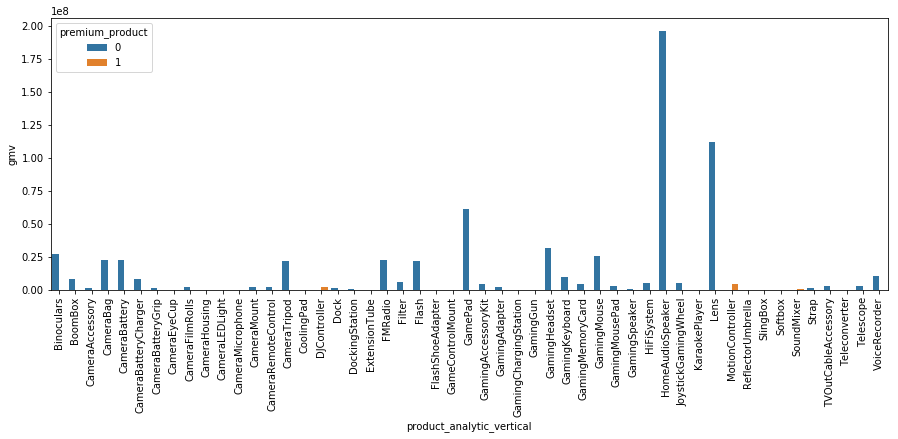

In [128]:
plt.figure(figsize=(15,5))
sns.barplot(x = prod_cat.product_analytic_vertical, y=prod_cat.gmv, hue=prod_cat.premium_product)
plt.xticks(rotation=90)
plt.show()

- We can clearly see that, maximum revenue is generated through mass producs like HomeAudioSpeaker, Lens, GamingPad, etc and not premium products that contibute quite less towards revenue.
- The company hence should focus more on mass products than premium products.

In [129]:
consumer = consumer.merge(prod_cat[['product_analytic_vertical', 'premium_product']] , left_on='product_analytic_vertical', 
            right_on='product_analytic_vertical',
                   how = 'inner')

In [130]:
sales = consumer.copy()

In [131]:
consumer.drop(['product_analytic_vertical'],1,inplace=True)

In [132]:
consumer.head()

fsn_id          order_date  Year  Month             order_id  \
0  ACCCX3S58G7B5F6P 2015-10-17 15:11:54  2015     10 3419300926147000.000   
1  ACCCX3S58G7B5F6P 2015-10-19 10:07:22  2015     10 1420830839915200.000   
2  ACCCX3S5AHMF55FV 2015-10-20 15:45:56  2015     10 2421912925714800.000   
3  ACCCX3S5AHMF55FV 2015-10-14 12:05:15  2015     10 4416592101738400.000   
4  ACCCX3S5AHMF55FV 2015-10-17 21:25:03  2015     10 4419525153426400.000   

         order_item_id      gmv  units  order_payment_type  sla  \
0 3419300926147000.000 6400.000      1                   0    5   
1 1420830839915200.000 6900.000      1                   0    7   
2 2421912925714800.000 1990.000      1                   0   10   
3 4416592101738400.000 1690.000      1                   1    4   
4 4419525153426400.000 1618.000      1                   1    6   

  product_analytic_category product_analytic_sub_category  product_mrp  \
0           CameraAccessory               CameraAccessory     7190.000   
1           CameraAccessory               CameraAccessory     7190.000   
2           CameraAccessory               CameraAccessory     2099.000   
3           CameraAccessory               CameraAccessory     2099.000   
4           CameraAccessory               CameraAccessory     2099.000   

   product_procurement_sla  listing_price  discount  Order_Item_Value  week  \
0                        0       6400.000     0.110          7190.000    16   
1                        0       6900.000     0.040          7190.000    17   
2                        3       1990.000     0.050          2099.000    17   
3                        3       1690.000     0.190          2099.000    16   
4                        3       1618.000     0.230          2099.000    16   

   premium_product  
0                0  
1                0  
2                0  
3                0  
4                0

# 4. Aggregation

## 1. Camera Sub Category

In [133]:
camera_df = consumer[consumer['product_analytic_sub_category'] == 'CameraAccessory']

In [134]:
###  Removing outliers is important as
###  1. There may be some garbage value.
###  2. Bulk orders can skew the analysis

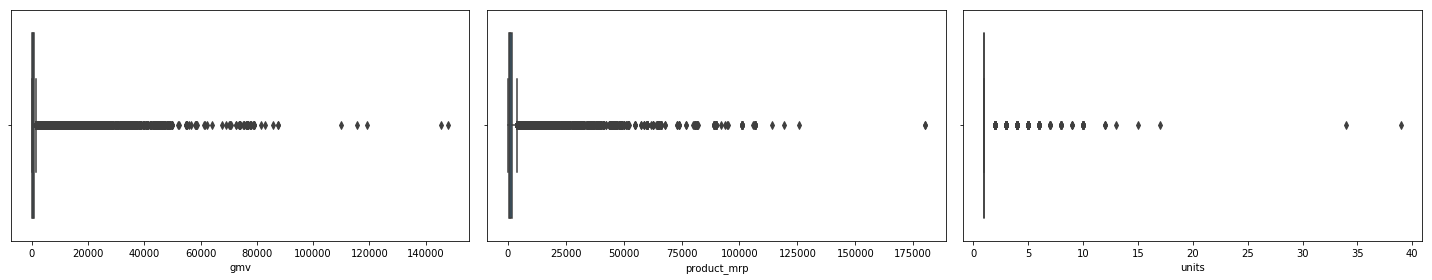

In [135]:
### Outlier Analysis
fig, axs = plt.subplots(1,3, figsize = (20,4))
plt1 = sns.boxplot(camera_df['gmv'], ax = axs[0])
plt2 = sns.boxplot(camera_df['units'], ax = axs[2])
plt4 = sns.boxplot(camera_df['product_mrp'], ax = axs[1])
plt.tight_layout()

In [136]:
### Treating outliers
### Outlier treatment for gmv & product_mrp
Q1 = camera_df.gmv.quantile(0.25)
Q3 = camera_df.gmv.quantile(0.75)
IQR = Q3 - Q1
camera_df = camera_df[(camera_df.gmv >= Q1 - 1.5*IQR) & (camera_df.gmv <= Q3 + 1.5*IQR)]
Q1 = camera_df.product_mrp.quantile(0.25)
Q3 = camera_df.product_mrp.quantile(0.75)
IQR = Q3 - Q1
camera_df = camera_df[(camera_df.product_mrp >= Q1 - 1.5*IQR) & (camera_df.product_mrp <= Q3 + 1.5*IQR)]

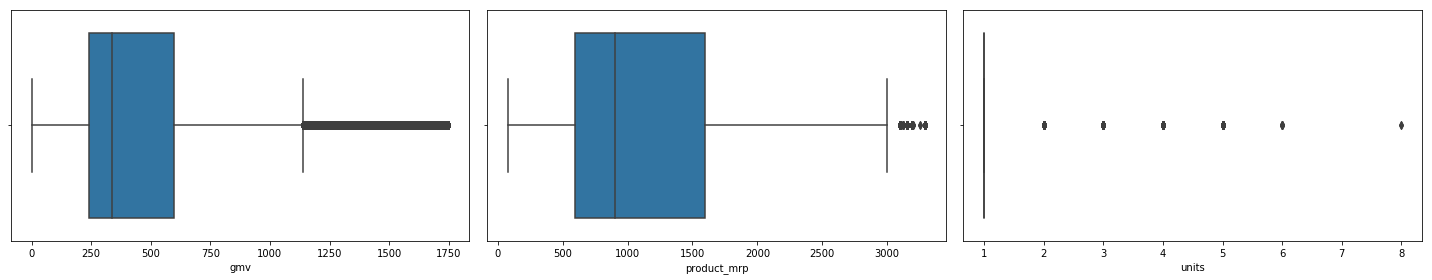

In [137]:
### Outlier Analysis
fig, axs = plt.subplots(1,3, figsize = (20,4))
plt1 = sns.boxplot(camera_df['gmv'], ax = axs[0])
plt2 = sns.boxplot(camera_df['units'], ax = axs[2])
plt4 = sns.boxplot(camera_df['product_mrp'], ax = axs[1])
plt.tight_layout()

In [138]:
camera_df.columns

Index(['fsn_id', 'order_date', 'Year', 'Month', 'order_id', 'order_item_id',
       'gmv', 'units', 'order_payment_type', 'sla',
       'product_analytic_category', 'product_analytic_sub_category',
       'product_mrp', 'product_procurement_sla', 'listing_price', 'discount',
       'Order_Item_Value', 'week', 'premium_product'],
      dtype='object')

In [139]:
camera_df.head()

fsn_id          order_date  Year  Month             order_id  \
3   ACCCX3S5AHMF55FV 2015-10-14 12:05:15  2015     10 4416592101738400.000   
4   ACCCX3S5AHMF55FV 2015-10-17 21:25:03  2015     10 4419525153426400.000   
16  ACCD38YG3UDFDG6D 2015-10-06 00:45:01  2015     10 2409274855504000.000   
17  ACCD38YG3UDFDG6D 2015-10-12 23:38:46  2015     10 4415284052002400.000   
18  ACCD38YG3UDFDG6D 2015-10-14 10:09:46  2015     10 1416516698047300.000   

          order_item_id      gmv  units  order_payment_type  sla  \
3  4416592101738400.000 1690.000      1                   1    4   
4  4419525153426400.000 1618.000      1                   1    6   
16 2409274855504000.000 1495.000      1                   0    5   
17 4415284052002400.000 1440.000      1                   0    5   
18 1416516698047300.000 1440.000      1                   0    4   

   product_analytic_category product_analytic_sub_category  product_mrp  \
3            CameraAccessory               CameraAccessory     2099.000   
4            CameraAccessory               CameraAccessory     2099.000   
16           CameraAccessory               CameraAccessory     2750.000   
17           CameraAccessory               CameraAccessory     2750.000   
18           CameraAccessory               CameraAccessory     2750.000   

    product_procurement_sla  listing_price  discount  Order_Item_Value  week  \
3                         3       1690.000     0.190          2099.000    16   
4                         3       1618.000     0.230          2099.000    16   
16                        1       1495.000     0.460          2750.000    15   
17                        1       1440.000     0.480          2750.000    16   
18                        1       1440.000     0.480          2750.000    16   

    premium_product  
3                 0  
4                 0  
16                0  
17                0  
18                0

In [140]:
### Aggregating dataset on weekly level

ca_week = pd.DataFrame(camera_df.groupby('week').agg({'gmv':'sum','listing_price':'mean',
                                                             'product_mrp':'mean','discount':'mean',
                                                             'sla':'mean','product_procurement_sla':'mean',
                                                             'fsn_id':pd.Series.nunique,'order_item_id':pd.Series.nunique,
                                                             'order_id': pd.Series.nunique,
                                                             'order_payment_type':'sum',
                                                            'premium_product':'sum'}))

ca_week.reset_index( inplace = True)

In [141]:
ca_week.head()

week         gmv  listing_price  product_mrp  discount   sla  \
0     1   11151.000        428.885     1121.038     0.491 2.423   
1     2 1228580.000        501.230     1013.379     0.448 7.253   
2     3 1344416.000        512.763     1096.768     0.458 6.567   
3     4 1346986.000        511.973     1086.319     0.445 6.611   
4     5  913445.000        522.839     1085.847     0.443 6.533   

   product_procurement_sla  fsn_id  order_item_id  order_id  \
0                    2.731      20         26.000    26.000   
1                    2.578     540       2390.000  2345.000   
2                    2.577     538       2570.000  2539.000   
3                    2.613     529       2571.000  2534.000   
4                    2.614     442       1703.000  1675.000   

   order_payment_type  premium_product  
0                  26                0  
1                 753                0  
2                 823                0  
3                 781                0  
4                 470                0

In [142]:
### Sum of GMV / No of unique Orders

ca_week['AOV'] = ca_week['gmv']/ca_week['order_id']

In [143]:
ca_week['online_order_perc'] = ca_week['order_payment_type']*100/ca_week['order_item_id']

In [144]:
ca_week.week.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53])

In [145]:
calendar.week.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53])

In [146]:
ca_week['week'] = ca_week['week'].astype(int)
calendar['week'] = calendar['week'].astype(int)

In [147]:
ca_week = ca_week.merge(marketing, how = 'left', on = 'week')

In [148]:
ca_week = ca_week.merge(calendar, how = 'left', on = 'week')

In [149]:
ca_week.head()

week         gmv  listing_price  product_mrp  discount   sla  \
0     1   11151.000        428.885     1121.038     0.491 2.423   
1     2 1228580.000        501.230     1013.379     0.448 7.253   
2     3 1344416.000        512.763     1096.768     0.458 6.567   
3     4 1346986.000        511.973     1086.319     0.445 6.611   
4     5  913445.000        522.839     1085.847     0.443 6.533   

   product_procurement_sla  fsn_id  order_item_id  order_id  \
0                    2.731      20         26.000    26.000   
1                    2.578     540       2390.000  2345.000   
2                    2.577     538       2570.000  2539.000   
3                    2.613     529       2571.000  2534.000   
4                    2.614     442       1703.000  1675.000   

   order_payment_type  premium_product     AOV  online_order_perc       Date  \
0                  26                0 428.885            100.000 2015-07-05   
1                 753                0 523.915             31.506 2015-07-12   
2                 823                0 529.506             32.023 2015-07-19   
3                 781                0 531.565             30.377 2015-07-26   
4                 470                0 545.340             27.598 2015-08-02   

      Year  Month  Total_Investment    TV  Digital  Sponsorship  \
0 2015.000  7.000             4.265 0.054    0.633        1.854   
1 2015.000  7.000             4.265 0.054    0.633        1.854   
2 2015.000  7.000             4.265 0.054    0.633        1.854   
3 2015.000  7.000             4.265 0.054    0.633        1.854   
4 2015.000  8.000             1.013 0.001    0.256        0.213   

   Content_marketing  Online_marketing  Affiliates   SEM  Radio  Other  \
0              0.000             0.332       0.137 1.256  0.000  0.000   
1              0.000             0.332       0.137 1.256  0.000  0.000   
2              0.000             0.332       0.137 1.256  0.000  0.000   
3              0.000             0.332       0.137 1.256  0.000  0.000   
4              0.000             0.026       0.015 0.503  0.000  0.000   

   TV_ads  Digital_ads  Sponsorship_ads  Content_marketing_ads  \
0   0.054        0.633            1.854                  0.000   
1   0.081        0.950            2.780                  0.000   
2   0.081        0.950            2.780                  0.000   
3   0.081        0.950            2.780                  0.000   
4   0.028        0.572            1.139                  0.000   

   Online_marketing_ads  Affiliates_ads  SEM_ads  Radio_ads  Other_ads    NPS  \
0                 0.332           0.137    1.256      0.000      0.000 54.600   
1                 0.498           0.205    1.884      0.000      0.000 54.600   
2                 0.498           0.205    1.884      0.000      0.000 54.600   
3                 0.498           0.205    1.884      0.000      0.000 54.600   
4                 0.192           0.083    1.131      0.000      0.000 56.139   

   Stock_Index  Special_sales  Payday  max_temp_C  min_temp_C  mean_temp_C  \
0     1177.000          0.000   0.200      25.500      13.200       19.360   
1     1177.000          0.000   0.000      24.025      14.385       19.263   
2     1177.000          0.286   0.143      27.383      16.314       21.906   
3     1177.000          0.000   0.000      28.240      14.342       20.540   
4     1185.286          0.000   0.143      29.811      16.242       23.092   

   heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  \
0          0.100          1.460          0.000          0.000   
1          1.059          2.322          4.155          0.029   
2          0.816          4.722          1.569          0.029   
3          1.632          4.172          1.141          0.029   
4          0.816          5.908          4.341          0.029   

   total_precip_mm  snow_on_grnd_cm  
0            0.000            0.000  
1            4.184            0.041  
2            1.598            0.04

### Exploratory Data Analysis

In [150]:
ca_week_viz = ca_week.round(2)

#### Univariate Analysis

Target Variable

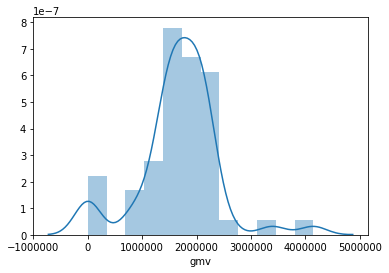

In [151]:
sns.distplot(ca_week_viz['gmv'],kde=True)

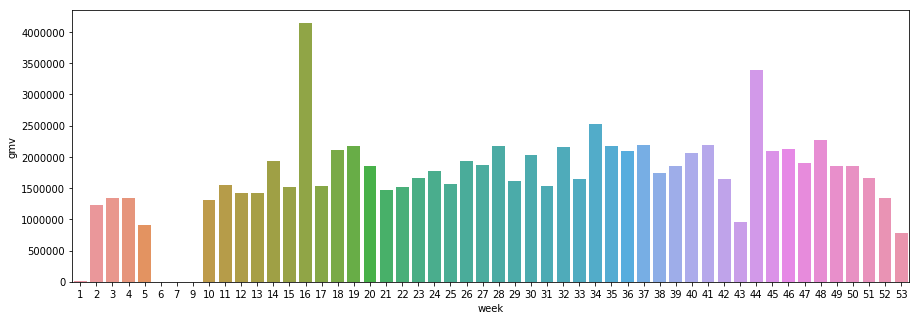

In [152]:
plt.figure(figsize=(15, 5))
sns.barplot(ca_week_viz['week'],ca_week_viz['gmv'])

Marketing KPI

In [153]:
ca_week_viz.columns

Index(['week', 'gmv', 'listing_price', 'product_mrp', 'discount', 'sla',
       'product_procurement_sla', 'fsn_id', 'order_item_id', 'order_id',
       'order_payment_type', 'premium_product', 'AOV', 'online_order_perc',
       'Date', 'Year', 'Month', 'Total_Investment', 'TV', 'Digital',
       'Sponsorship', 'Content_marketing', 'Online_marketing', 'Affiliates',
       'SEM', 'Radio', 'Other', 'TV_ads', 'Digital_ads', 'Sponsorship_ads',
       'Content_marketing_ads', 'Online_marketing_ads', 'Affiliates_ads',
       'SEM_ads', 'Radio_ads', 'Other_ads', 'NPS', 'Stock_Index',
       'Special_sales', 'Payday', 'max_temp_C', 'min_temp_C', 'mean_temp_C',
       'heat_deg_days', 'cool_deg_days', 'total_rain_mm', 'total_snow_cm',
       'total_precip_mm', 'snow_on_grnd_cm'],
      dtype='object')

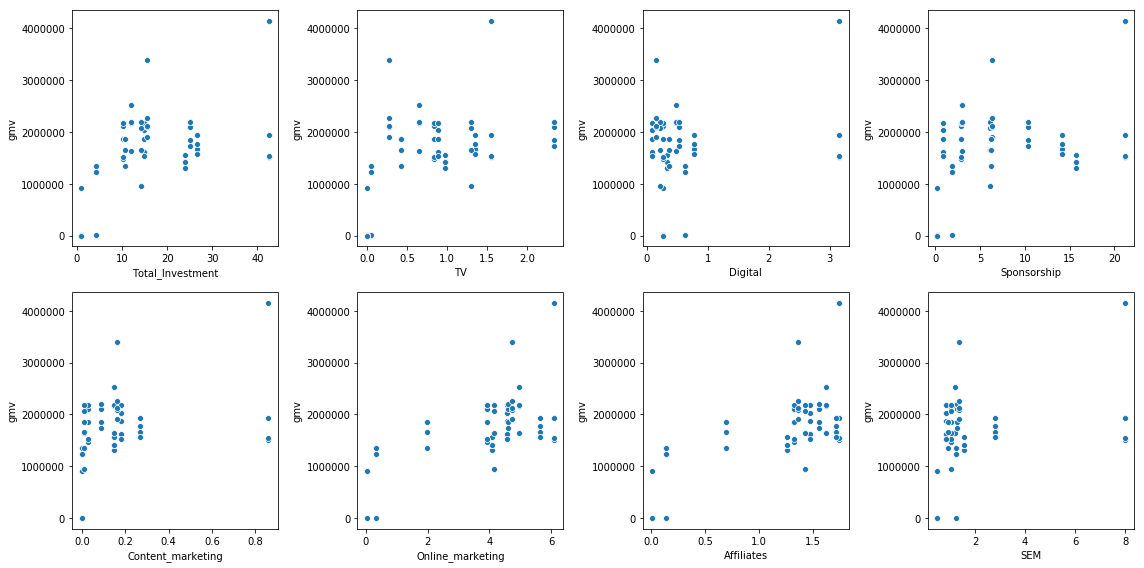

In [154]:
fig, axs = plt.subplots(2,4,figsize=(16,8))

plt1 = sns.scatterplot(x = 'Total_Investment', y = 'gmv', data = ca_week_viz, ax = axs[0,0])

plt2 = sns.scatterplot(x = 'TV', y = 'gmv', data = ca_week_viz, ax = axs[0,1])

plt3 = sns.scatterplot(x = 'Digital', y = 'gmv', data = ca_week_viz, ax = axs[0,2])

plt4 = sns.scatterplot(x = 'Sponsorship', y = 'gmv', data = ca_week_viz, ax = axs[0,3])

plt5 = sns.scatterplot(x = 'Content_marketing', y = 'gmv', data = ca_week_viz, ax = axs[1,0])

plt6 = sns.scatterplot(x = 'Online_marketing', y = 'gmv', data = ca_week_viz, ax = axs[1,1])

plt7 = sns.scatterplot(x = 'Affiliates', y = 'gmv', data = ca_week_viz, ax = axs[1,2])

plt8 = sns.scatterplot(x = 'SEM', y = 'gmv', data = ca_week_viz, ax = axs[1,3])

plt.tight_layout()

#### Bivariate Analysis

GMV and Holiday weekly

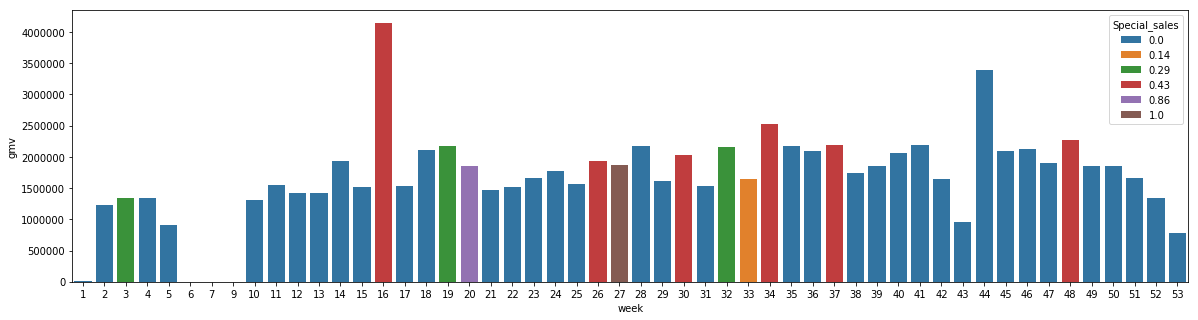

In [155]:
plt.figure(figsize=(20, 5))
sns.barplot(x= ca_week_viz['week'], y =ca_week_viz['gmv'], hue = ca_week_viz['Special_sales'], dodge = False)
plt.show()

GMV and Dicount weekly

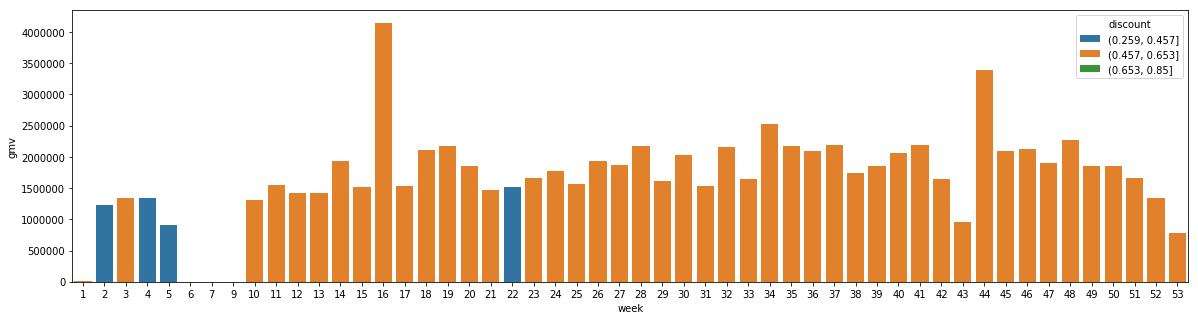

In [156]:
plt.figure(figsize=(20, 5))
sns.barplot(x= ca_week_viz['week'], y =ca_week_viz['gmv'], hue = pd.cut(ca_week_viz['discount'],3), dodge = False)
plt.show()

#### Camera Accessory - Moving Average

In [157]:
### ca_week

### Moving Average for listing_price and discount

### ca_week = ca_week.sort_values('order_date')

ca_week[['MA2_LP','MA2_Discount']] = ca_week[['listing_price','discount']].rolling(window=2,min_periods=1).mean()
ca_week[['MA3_LP','MA3_Discount']] = ca_week[['listing_price','discount']].rolling(window=3,min_periods=1).mean()
ca_week[['MA4_LP','MA4_Discount']] = ca_week[['listing_price','discount']].rolling(window=4,min_periods=1).mean()

### Reference listed price Inflation 

ca_week['MA2_listed_price'] = (ca_week['listing_price']-ca_week['MA2_LP'])/ca_week['MA2_LP']
ca_week['MA3_listed_price'] = (ca_week['listing_price']-ca_week['MA3_LP'])/ca_week['MA3_LP']
ca_week['MA4_listed_price'] = (ca_week['listing_price']-ca_week['MA4_LP'])/ca_week['MA4_LP']

### Reference discount Inflation

ca_week['MA2_discount_offer'] = (ca_week['discount']-ca_week['MA2_Discount'])/ca_week['MA2_Discount']
ca_week['MA3_discount_offer'] = (ca_week['discount']-ca_week['MA3_Discount'])/ca_week['MA3_Discount']
ca_week['MA4_discount_offer'] = (ca_week['discount']-ca_week['MA4_Discount'])/ca_week['MA4_Discount']


ca_week.drop(['MA2_LP','MA3_LP','MA4_LP','MA2_Discount','MA3_Discount','MA4_Discount'], axis = 1, inplace = True)  
ca_week.head()



week         gmv  listing_price  product_mrp  discount   sla  \
0     1   11151.000        428.885     1121.038     0.491 2.423   
1     2 1228580.000        501.230     1013.379     0.448 7.253   
2     3 1344416.000        512.763     1096.768     0.458 6.567   
3     4 1346986.000        511.973     1086.319     0.445 6.611   
4     5  913445.000        522.839     1085.847     0.443 6.533   

   product_procurement_sla  fsn_id  order_item_id  order_id  \
0                    2.731      20         26.000    26.000   
1                    2.578     540       2390.000  2345.000   
2                    2.577     538       2570.000  2539.000   
3                    2.613     529       2571.000  2534.000   
4                    2.614     442       1703.000  1675.000   

   order_payment_type  premium_product     AOV  online_order_perc       Date  \
0                  26                0 428.885            100.000 2015-07-05   
1                 753                0 523.915             31.506 2015-07-12   
2                 823                0 529.506             32.023 2015-07-19   
3                 781                0 531.565             30.377 2015-07-26   
4                 470                0 545.340             27.598 2015-08-02   

      Year  Month  Total_Investment    TV  Digital  Sponsorship  \
0 2015.000  7.000             4.265 0.054    0.633        1.854   
1 2015.000  7.000             4.265 0.054    0.633        1.854   
2 2015.000  7.000             4.265 0.054    0.633        1.854   
3 2015.000  7.000             4.265 0.054    0.633        1.854   
4 2015.000  8.000             1.013 0.001    0.256        0.213   

   Content_marketing  Online_marketing  Affiliates   SEM  Radio  Other  \
0              0.000             0.332       0.137 1.256  0.000  0.000   
1              0.000             0.332       0.137 1.256  0.000  0.000   
2              0.000             0.332       0.137 1.256  0.000  0.000   
3              0.000             0.332       0.137 1.256  0.000  0.000   
4              0.000             0.026       0.015 0.503  0.000  0.000   

   TV_ads  Digital_ads  Sponsorship_ads  Content_marketing_ads  \
0   0.054        0.633            1.854                  0.000   
1   0.081        0.950            2.780                  0.000   
2   0.081        0.950            2.780                  0.000   
3   0.081        0.950            2.780                  0.000   
4   0.028        0.572            1.139                  0.000   

   Online_marketing_ads  Affiliates_ads  SEM_ads  Radio_ads  Other_ads    NPS  \
0                 0.332           0.137    1.256      0.000      0.000 54.600   
1                 0.498           0.205    1.884      0.000      0.000 54.600   
2                 0.498           0.205    1.884      0.000      0.000 54.600   
3                 0.498           0.205    1.884      0.000      0.000 54.600   
4                 0.192           0.083    1.131      0.000      0.000 56.139   

   Stock_Index  Special_sales  Payday  max_temp_C  min_temp_C  mean_temp_C  \
0     1177.000          0.000   0.200      25.500      13.200       19.360   
1     1177.000          0.000   0.000      24.025      14.385       19.263   
2     1177.000          0.286   0.143      27.383      16.314       21.906   
3     1177.000          0.000   0.000      28.240      14.342       20.540   
4     1185.286          0.000   0.143      29.811      16.242       23.092   

   heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  \
0          0.100          1.460          0.000          0.000   
1          1.059          2.322          4.155          0.029   
2          0.816          4.722          1.569          0.029   
3          1.632          4.172          1.141          0.029   
4          0.816          5.908          4.341          0.029   

   total_precip_mm  snow_on_grnd_cm  MA2_listed_price  MA3_listed_price  \
0            0.000            0.000             0.000             0.000  

#### Camera Accessory - Data Profiling to see multicollinearity and variable distributions

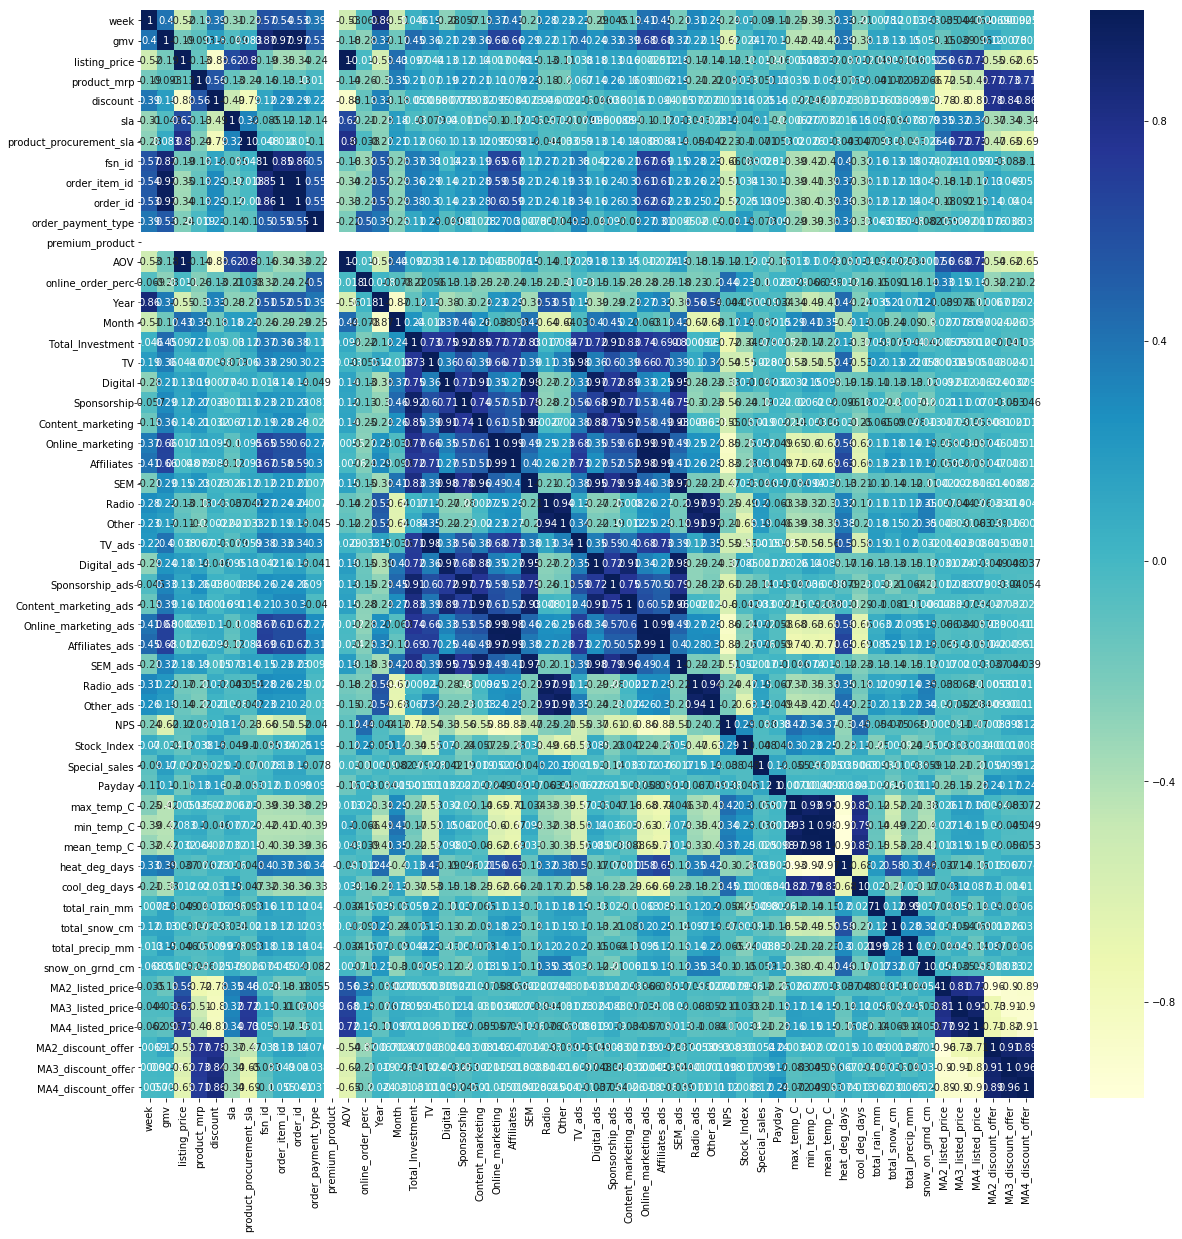

In [158]:
# ### To identify multicollinearity between variable
plt.figure(figsize=(20,20))
sns.heatmap(ca_week.corr(),annot = True, cmap="YlGnBu")
plt.show()

In [159]:
### Highly Correlated Columns should be dropped

ca_week.drop(['TV', 'Digital', 'Sponsorship', 'Content_marketing','Online_marketing', 'Affiliates', 'SEM','Radio',
              'Other'], axis = 1, inplace = True)

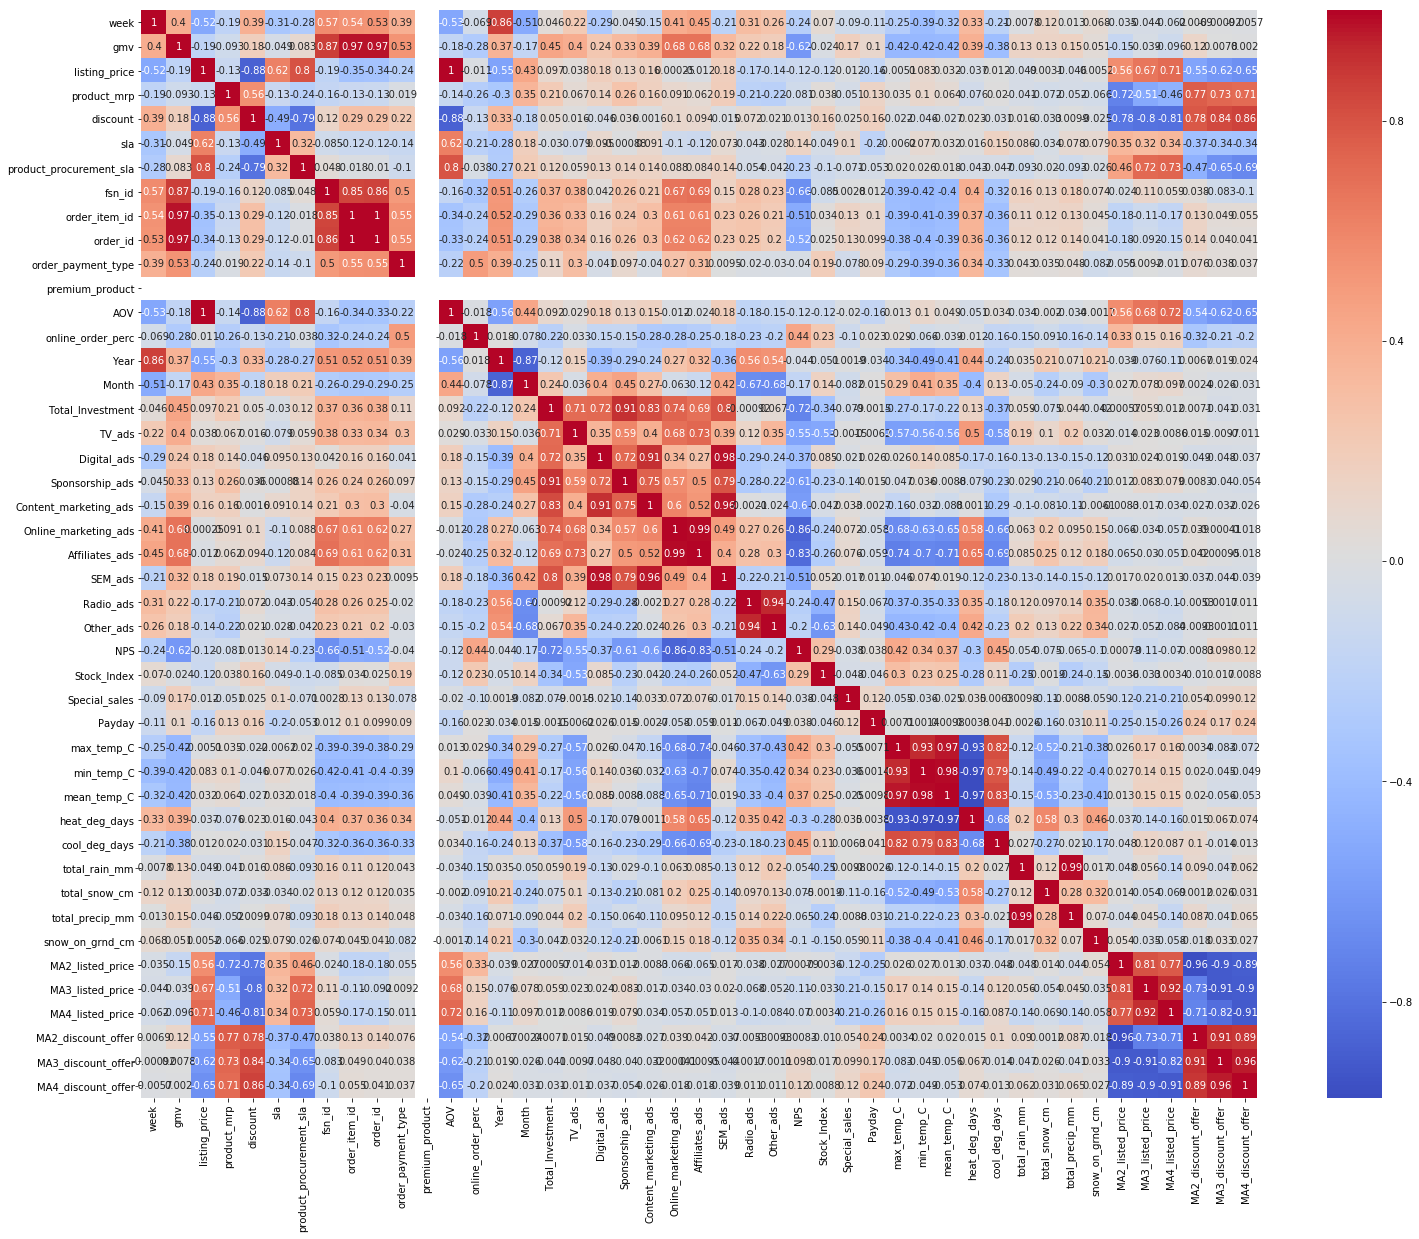

In [160]:
plt.figure(figsize=(25,20))
sns.heatmap(ca_week.corr(), cmap="coolwarm", annot=True)
plt.show()

In [161]:
ca_week.drop(['Affiliates_ads','SEM_ads','Digital_ads','Radio_ads','Other_ads','mean_temp_C','min_temp_C',
              'order_id','order_item_id','total_precip_mm','Total_Investment','MA3_discount_offer',
               'MA3_listed_price','AOV','max_temp_C','MA2_listed_price','MA4_discount_offer'],1,inplace=True)

In [162]:
#Successfully removed more than 90% correlation

#### Camera Accessory -  Lag Variable Functions

In [163]:
### Lag of listed_price, discount_offer, NPS, Special_sales

ca_week['lag_1_listed_price'] = ca_week['listing_price'].shift(-1).fillna(0)
ca_week['lag_2_listed_price'] = ca_week['listing_price'].shift(-2).fillna(0)
ca_week['lag_3_listed_price'] = ca_week['listing_price'].shift(-3).fillna(0)

ca_week['lag_1_discount'] = ca_week['discount'].shift(-1).fillna(0)
ca_week['lag_2_discount'] = ca_week['discount'].shift(-2).fillna(0)
ca_week['lag_3_discount'] = ca_week['discount'].shift(-3).fillna(0)

ca_week['lag_1_Stock_Index'] = ca_week['Stock_Index'].shift(-1).fillna(0)
ca_week['lag_2_Stock_Index'] = ca_week['Stock_Index'].shift(-2).fillna(0)
ca_week['lag_3_Stock_Index'] = ca_week['Stock_Index'].shift(-3).fillna(0)

ca_week['lag_1_Special_sales'] = ca_week['Special_sales'].shift(-1).fillna(0)
ca_week['lag_2_Special_sales'] = ca_week['Special_sales'].shift(-2).fillna(0)
ca_week['lag_3_Special_sales'] = ca_week['Special_sales'].shift(-3).fillna(0)

ca_week['lag_1_Payday'] = ca_week['Payday'].shift(-1).fillna(0)
ca_week['lag_2_Payday'] = ca_week['Payday'].shift(-2).fillna(0)
ca_week['lag_3_Payday'] = ca_week['Payday'].shift(-3).fillna(0)

ca_week['lag_1_NPS'] = ca_week['NPS'].shift(-1).fillna(0)
ca_week['lag_2_NPS'] = ca_week['NPS'].shift(-2).fillna(0)
ca_week['lag_3_NPS'] = ca_week['NPS'].shift(-3).fillna(0)

In [164]:
ca_week.head()

week         gmv  listing_price  product_mrp  discount   sla  \
0     1   11151.000        428.885     1121.038     0.491 2.423   
1     2 1228580.000        501.230     1013.379     0.448 7.253   
2     3 1344416.000        512.763     1096.768     0.458 6.567   
3     4 1346986.000        511.973     1086.319     0.445 6.611   
4     5  913445.000        522.839     1085.847     0.443 6.533   

   product_procurement_sla  fsn_id  order_payment_type  premium_product  \
0                    2.731      20                  26                0   
1                    2.578     540                 753                0   
2                    2.577     538                 823                0   
3                    2.613     529                 781                0   
4                    2.614     442                 470                0   

   online_order_perc       Date     Year  Month  TV_ads  Sponsorship_ads  \
0            100.000 2015-07-05 2015.000  7.000   0.054            1.854   
1             31.506 2015-07-12 2015.000  7.000   0.081            2.780   
2             32.023 2015-07-19 2015.000  7.000   0.081            2.780   
3             30.377 2015-07-26 2015.000  7.000   0.081            2.780   
4             27.598 2015-08-02 2015.000  8.000   0.028            1.139   

   Content_marketing_ads  Online_marketing_ads    NPS  Stock_Index  \
0                  0.000                 0.332 54.600     1177.000   
1                  0.000                 0.498 54.600     1177.000   
2                  0.000                 0.498 54.600     1177.000   
3                  0.000                 0.498 54.600     1177.000   
4                  0.000                 0.192 56.139     1185.286   

   Special_sales  Payday  heat_deg_days  cool_deg_days  total_rain_mm  \
0          0.000   0.200          0.100          1.460          0.000   
1          0.000   0.000          1.059          2.322          4.155   
2          0.286   0.143          0.816          4.722          1.569   
3          0.000   0.000          1.632          4.172          1.141   
4          0.000   0.143          0.816          5.908          4.341   

   total_snow_cm  snow_on_grnd_cm  MA4_listed_price  MA2_discount_offer  \
0          0.000            0.000             0.000               0.000   
1          0.029            0.041             0.078              -0.046   
2          0.029            0.041             0.066               0.011   
3          0.029            0.041             0.048              -0.014   
4          0.029            0.041             0.021              -0.002   

   lag_1_listed_price  lag_2_listed_price  lag_3_listed_price  lag_1_discount  \
0             501.230             512.763             511.973           0.448   
1             512.763             511.973             522.839           0.458   
2             511.973             522.839             749.000           0.445   
3             522.839             749.000             299.000           0.443   
4             749.000             299.000             452.500           0.260   

   lag_2_discount  lag_3_discount  lag_1_Stock_Index  lag_2_Stock_Index  \
0           0.458           0.445           1177.000           1177.000   
1           0.445           0.443           1177.000           1177.000   
2           0.443           0.260           1177.000           1185.286   
3           0.260           0.850           1185.286           1206.000   
4           0.850           0.475           1206.000           1206.000   

   lag_3_Stock_Index  lag_1_Special_sales  lag_2_Special_sales  \
0           1177.000                0.000                0.286   
1           1185.286                0.286                0.000   
2           1206.000                0.000                0.000   
3           1206.000                0.000                0.000   
4           1206.000                0.000                0.286   

   lag_3_Special_sales  lag_1_Payday  lag_2_Pa

## 2. Gaming Sub Category

In [165]:
gaming_accessory = consumer[consumer['product_analytic_sub_category'] == 'GamingAccessory']

In [166]:
###  Removing outliers is important as
###  1. There may be some garbage value.
###  2. Bulk orders can skew the analysis

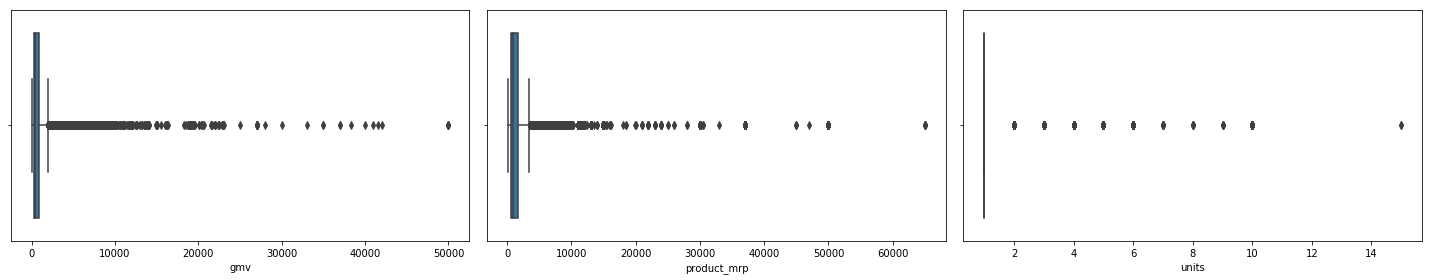

In [167]:
### Outlier Analysis
fig, axs = plt.subplots(1,3, figsize = (20,4))
plt1 = sns.boxplot(gaming_accessory['gmv'], ax = axs[0])
plt2 = sns.boxplot(gaming_accessory['units'], ax = axs[2])
plt4 = sns.boxplot(gaming_accessory['product_mrp'], ax = axs[1])
plt.tight_layout()

In [168]:
### Treating outliers
### Outlier treatment for gmv & product_mrp
Q1 = gaming_accessory.gmv.quantile(0.25)
Q3 = gaming_accessory.gmv.quantile(0.75)
IQR = Q3 - Q1
gaming_accessory = gaming_accessory[(gaming_accessory.gmv >= Q1 - 1.5*IQR) & (gaming_accessory.gmv <= Q3 + 1.5*IQR)]
Q1 = gaming_accessory.product_mrp.quantile(0.25)
Q3 = gaming_accessory.product_mrp.quantile(0.75)
IQR = Q3 - Q1
gaming_accessory = gaming_accessory[(gaming_accessory.product_mrp >= Q1 - 1.5*IQR) & (gaming_accessory.product_mrp <= Q3 + 1.5*IQR)]

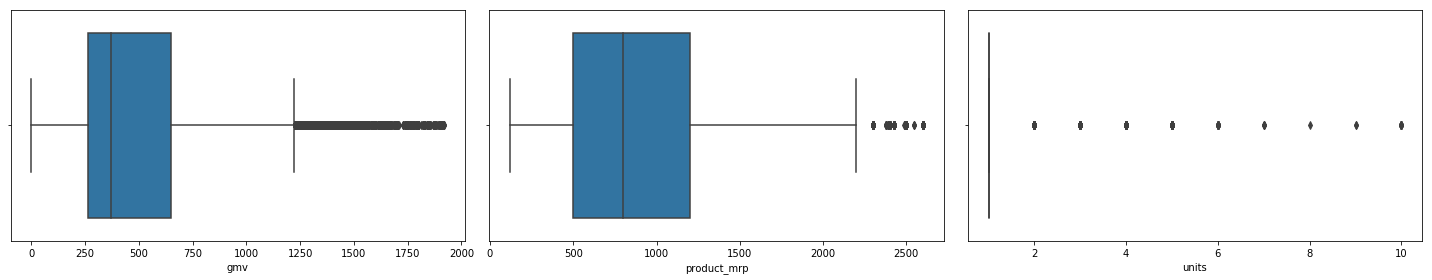

In [169]:
### Outlier Analysis
fig, axs = plt.subplots(1,3, figsize = (20,4))
plt1 = sns.boxplot(gaming_accessory['gmv'], ax = axs[0])
plt2 = sns.boxplot(gaming_accessory['units'], ax = axs[2])
plt4 = sns.boxplot(gaming_accessory['product_mrp'], ax = axs[1])
plt.tight_layout()

In [170]:
gaming_accessory.columns

Index(['fsn_id', 'order_date', 'Year', 'Month', 'order_id', 'order_item_id',
       'gmv', 'units', 'order_payment_type', 'sla',
       'product_analytic_category', 'product_analytic_sub_category',
       'product_mrp', 'product_procurement_sla', 'listing_price', 'discount',
       'Order_Item_Value', 'week', 'premium_product'],
      dtype='object')

In [171]:
### Aggregating dataset on weekly level

ga_week = pd.DataFrame(gaming_accessory.groupby('week').agg({'gmv':'sum','listing_price':'mean',
                                                             'product_mrp':'mean','discount':'mean',
                                                             'sla':'mean','product_procurement_sla':'mean',
                                                             'fsn_id':pd.Series.nunique,'order_item_id':pd.Series.nunique,
                                                             'order_id': pd.Series.nunique,
                                                             'order_payment_type':'sum'}))

ga_week.reset_index( inplace = True)

In [172]:
ga_week.head()

week         gmv  listing_price  product_mrp  discount   sla  \
0     1   17466.000        681.080      898.440     0.220 2.960   
1     2 1435300.000        528.929      963.907     0.414 5.170   
2     3 1097388.359        449.826      759.691     0.429 5.115   
3     4 1158166.000        559.134      889.058     0.352 5.179   
4     5  742062.000        554.214      886.076     0.363 5.552   

   product_procurement_sla  fsn_id  order_item_id  order_id  \
0                    2.560      19         25.000    25.000   
1                    3.013     211       2629.000  2494.000   
2                    2.514     216       2382.000  2356.000   
3                    2.338     232       2023.000  1990.000   
4                    2.325     224       1303.000  1287.000   

   order_payment_type  
0                  25  
1                 689  
2                 534  
3                 425  
4                 246

In [173]:
### Sum of GMV / No of unique Orders

ga_week['AOV'] = ga_week['gmv']/ga_week['order_id']

In [174]:
ga_week['online_order_perc'] = ga_week['order_payment_type']*100/ga_week['order_item_id']

In [175]:
ga_week.head()

week         gmv  listing_price  product_mrp  discount   sla  \
0     1   17466.000        681.080      898.440     0.220 2.960   
1     2 1435300.000        528.929      963.907     0.414 5.170   
2     3 1097388.359        449.826      759.691     0.429 5.115   
3     4 1158166.000        559.134      889.058     0.352 5.179   
4     5  742062.000        554.214      886.076     0.363 5.552   

   product_procurement_sla  fsn_id  order_item_id  order_id  \
0                    2.560      19         25.000    25.000   
1                    3.013     211       2629.000  2494.000   
2                    2.514     216       2382.000  2356.000   
3                    2.338     232       2023.000  1990.000   
4                    2.325     224       1303.000  1287.000   

   order_payment_type     AOV  online_order_perc  
0                  25 698.640            100.000  
1                 689 575.501             26.208  
2                 534 465.785             22.418  
3                 425 581.993             21.008  
4                 246 576.583             18.880

In [176]:
ga_week = ga_week.merge(marketing, how = 'left', on = 'week')

In [177]:
ga_week = ga_week.merge(calendar, how = 'left', on = 'week')

In [178]:
ga_week.head()

week         gmv  listing_price  product_mrp  discount   sla  \
0     1   17466.000        681.080      898.440     0.220 2.960   
1     2 1435300.000        528.929      963.907     0.414 5.170   
2     3 1097388.359        449.826      759.691     0.429 5.115   
3     4 1158166.000        559.134      889.058     0.352 5.179   
4     5  742062.000        554.214      886.076     0.363 5.552   

   product_procurement_sla  fsn_id  order_item_id  order_id  \
0                    2.560      19         25.000    25.000   
1                    3.013     211       2629.000  2494.000   
2                    2.514     216       2382.000  2356.000   
3                    2.338     232       2023.000  1990.000   
4                    2.325     224       1303.000  1287.000   

   order_payment_type     AOV  online_order_perc       Date     Year  Month  \
0                  25 698.640            100.000 2015-07-05 2015.000  7.000   
1                 689 575.501             26.208 2015-07-12 2015.000  7.000   
2                 534 465.785             22.418 2015-07-19 2015.000  7.000   
3                 425 581.993             21.008 2015-07-26 2015.000  7.000   
4                 246 576.583             18.880 2015-08-02 2015.000  8.000   

   Total_Investment    TV  Digital  Sponsorship  Content_marketing  \
0             4.265 0.054    0.633        1.854              0.000   
1             4.265 0.054    0.633        1.854              0.000   
2             4.265 0.054    0.633        1.854              0.000   
3             4.265 0.054    0.633        1.854              0.000   
4             1.013 0.001    0.256        0.213              0.000   

   Online_marketing  Affiliates   SEM  Radio  Other  TV_ads  Digital_ads  \
0             0.332       0.137 1.256  0.000  0.000   0.054        0.633   
1             0.332       0.137 1.256  0.000  0.000   0.081        0.950   
2             0.332       0.137 1.256  0.000  0.000   0.081        0.950   
3             0.332       0.137 1.256  0.000  0.000   0.081        0.950   
4             0.026       0.015 0.503  0.000  0.000   0.028        0.572   

   Sponsorship_ads  Content_marketing_ads  Online_marketing_ads  \
0            1.854                  0.000                 0.332   
1            2.780                  0.000                 0.498   
2            2.780                  0.000                 0.498   
3            2.780                  0.000                 0.498   
4            1.139                  0.000                 0.192   

   Affiliates_ads  SEM_ads  Radio_ads  Other_ads    NPS  Stock_Index  \
0           0.137    1.256      0.000      0.000 54.600     1177.000   
1           0.205    1.884      0.000      0.000 54.600     1177.000   
2           0.205    1.884      0.000      0.000 54.600     1177.000   
3           0.205    1.884      0.000      0.000 54.600     1177.000   
4           0.083    1.131      0.000      0.000 56.139     1185.286   

   Special_sales  Payday  max_temp_C  min_temp_C  mean_temp_C  heat_deg_days  \
0          0.000   0.200      25.500      13.200       19.360          0.100   
1          0.000   0.000      24.025      14.385       19.263          1.059   
2          0.286   0.143      27.383      16.314       21.906          0.816   
3          0.000   0.000      28.240      14.342       20.540          1.632   
4          0.000   0.143      29.811      16.242       23.092          0.816   

   cool_deg_days  total_rain_mm  total_snow_cm  total_precip_mm  \
0          1.460          0.000          0.000            0.000   
1          2.322          4.155          0.029            4.184   
2          4.722          1.569          0.029            1.598   
3          4.172          1.141          0.029            1.170   
4          5.908          4.341          0.029            4.370   

   snow_on_grnd_cm  
0            0.000  
1            0.041  
2            0.041  
3            0.041  
4            0.041

### Exploratory Data Analysis

In [179]:
ga_week_viz = ga_week.round(2)

#### Univariate Analysis

Target Variable

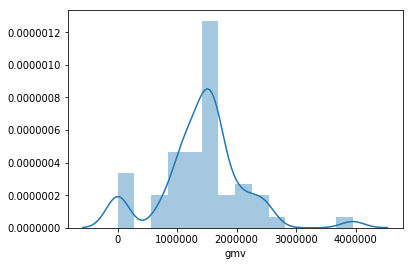

In [180]:
sns.distplot(ga_week_viz['gmv'],kde=True)

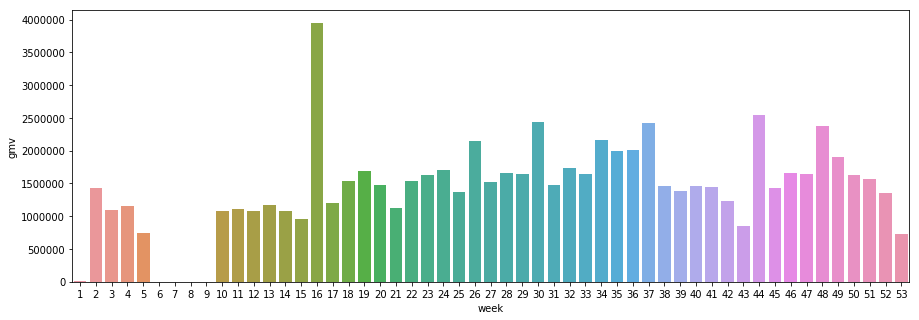

In [181]:
plt.figure(figsize=(15, 5))
sns.barplot(ga_week_viz['week'],ga_week_viz['gmv'])

Marketing KPI

In [182]:
ga_week_viz.columns

Index(['week', 'gmv', 'listing_price', 'product_mrp', 'discount', 'sla',
       'product_procurement_sla', 'fsn_id', 'order_item_id', 'order_id',
       'order_payment_type', 'AOV', 'online_order_perc', 'Date', 'Year',
       'Month', 'Total_Investment', 'TV', 'Digital', 'Sponsorship',
       'Content_marketing', 'Online_marketing', 'Affiliates', 'SEM', 'Radio',
       'Other', 'TV_ads', 'Digital_ads', 'Sponsorship_ads',
       'Content_marketing_ads', 'Online_marketing_ads', 'Affiliates_ads',
       'SEM_ads', 'Radio_ads', 'Other_ads', 'NPS', 'Stock_Index',
       'Special_sales', 'Payday', 'max_temp_C', 'min_temp_C', 'mean_temp_C',
       'heat_deg_days', 'cool_deg_days', 'total_rain_mm', 'total_snow_cm',
       'total_precip_mm', 'snow_on_grnd_cm'],
      dtype='object')

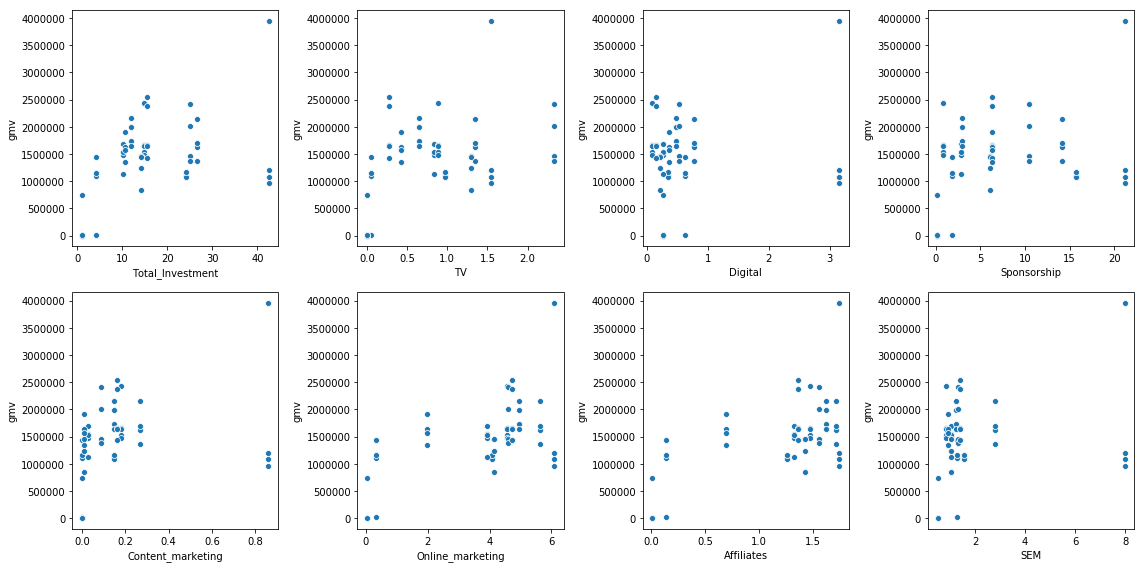

In [183]:
fig, axs = plt.subplots(2,4,figsize=(16,8))

plt1 = sns.scatterplot(x = 'Total_Investment', y = 'gmv', data = ga_week_viz, ax = axs[0,0])

plt2 = sns.scatterplot(x = 'TV', y = 'gmv', data = ga_week_viz, ax = axs[0,1])

plt3 = sns.scatterplot(x = 'Digital', y = 'gmv', data = ga_week_viz, ax = axs[0,2])

plt4 = sns.scatterplot(x = 'Sponsorship', y = 'gmv', data = ga_week_viz, ax = axs[0,3])

plt5 = sns.scatterplot(x = 'Content_marketing', y = 'gmv', data = ga_week_viz, ax = axs[1,0])

plt6 = sns.scatterplot(x = 'Online_marketing', y = 'gmv', data = ga_week_viz, ax = axs[1,1])

plt7 = sns.scatterplot(x = 'Affiliates', y = 'gmv', data = ga_week_viz, ax = axs[1,2])

plt8 = sns.scatterplot(x = 'SEM', y = 'gmv', data = ga_week_viz, ax = axs[1,3])

plt.tight_layout()

#### Bivariate Analysis

GMV and Holiday weekly

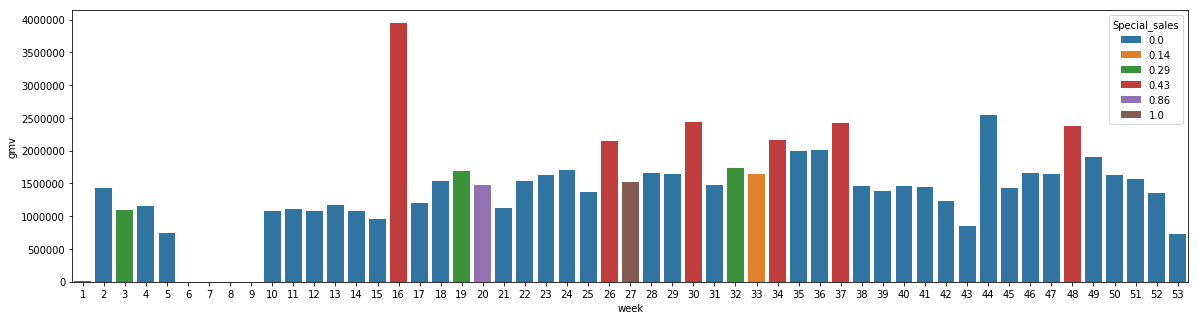

In [184]:
plt.figure(figsize=(20, 5))
sns.barplot(x= ga_week_viz['week'], y =ga_week_viz['gmv'], hue = ga_week_viz['Special_sales'], dodge = False)
plt.show()

GMV and Holiday weekly

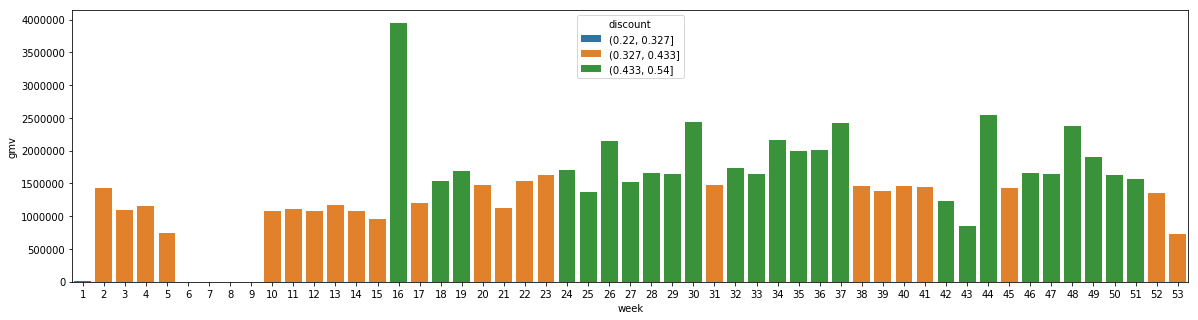

In [185]:
plt.figure(figsize=(20, 5))
sns.barplot(x= ga_week_viz['week'], y =ga_week_viz['gmv'], hue = pd.cut(ga_week_viz['discount'],3), dodge = False)
plt.show()

#### Gaming Accessory - Moving Average

In [186]:
### ga_week

### Moving Average for listed_price and discount_offer

### ga_week = ga_week.sort_values('order_date')

ga_week[['MA2_LP','MA2_Discount']] = ga_week[['listing_price','discount']].rolling(window=2,min_periods=1).mean()
ga_week[['MA3_LP','MA3_Discount']] = ga_week[['listing_price','discount']].rolling(window=3,min_periods=1).mean()
ga_week[['MA4_LP','MA4_Discount']] = ga_week[['listing_price','discount']].rolling(window=4,min_periods=1).mean()

### Reference listed price Inflation 

ga_week['MA2_listed_price'] = (ga_week['listing_price']-ga_week['MA2_LP'])/ga_week['MA2_LP']
ga_week['MA3_listed_price'] = (ga_week['listing_price']-ga_week['MA3_LP'])/ga_week['MA3_LP']
ga_week['MA4_listed_price'] = (ga_week['listing_price']-ga_week['MA4_LP'])/ga_week['MA4_LP']

### Reference discount Inflation

ga_week['MA2_discount'] = (ga_week['discount']-ga_week['MA2_Discount'])/ga_week['MA2_Discount']
ga_week['MA3_discount'] = (ga_week['discount']-ga_week['MA3_Discount'])/ga_week['MA3_Discount']
ga_week['MA4_discount'] = (ga_week['discount']-ga_week['MA4_Discount'])/ga_week['MA4_Discount']


ga_week.drop(['MA2_LP','MA3_LP','MA4_LP','MA2_Discount','MA3_Discount','MA4_Discount'], axis = 1, inplace = True)  
ga_week



week         gmv  listing_price  product_mrp  discount   sla  \
0      1   17466.000        681.080      898.440     0.220 2.960   
1      2 1435300.000        528.929      963.907     0.414 5.170   
2      3 1097388.359        449.826      759.691     0.429 5.115   
3      4 1158166.000        559.134      889.058     0.352 5.179   
4      5  742062.000        554.214      886.076     0.363 5.552   
5      6     391.000        195.500      362.000     0.535 4.500   
6      7    1611.000        805.500     1172.000     0.255 4.500   
7      8     359.000        359.000      699.000     0.490 3.000   
8      9    2303.000        575.750     1035.750     0.450 6.000   
9     10 1084240.500        464.002      746.372     0.380 5.080   
10    11 1118085.000        519.637      833.842     0.371 5.517   
11    12 1080541.251        514.867      846.017     0.381 5.861   
12    13 1169077.000        524.567      935.660     0.400 6.014   
13    14 1079536.000        511.786      869.859     0.386 5.867   
14    15  960789.000        503.441      799.564     0.356 5.392   
15    16 3949922.377        425.887      857.208     0.494 5.324   
16    17 1197307.000        520.846      877.526     0.389 6.103   
17    18 1544330.500        468.724      852.418     0.443 5.836   
18    19 1688852.709        430.062      799.664     0.465 5.230   
19    20 1481034.000        477.778      837.982     0.417 6.159   
20    21 1124109.000        514.084      878.827     0.408 5.800   
21    22 1535170.000        476.335      854.820     0.431 5.906   
22    23 1628667.000        507.678      877.494     0.408 6.151   
23    24 1698717.250        469.348      894.701     0.457 5.749   
24    25 1362933.000        435.566      931.687     0.470 6.668   
25    26 2147340.000        457.553     1097.237     0.510 5.911   
26    27 1527510.000        457.369     1036.954     0.466 6.087   
27    28 1665891.000        447.723     1015.418     0.469 6.025   
28    29 1640618.000        485.839      979.843     0.437 5.992   
29    30 2432792.041        535.982     1017.082     0.451 6.059   
30    31 1480041.000        497.602      918.566     0.434 6.162   
31    32 1739754.500        478.737      903.732     0.446 5.977   
32    33 1644979.250        455.987      900.592     0.469 5.722   
33    34 2160427.576        427.197      879.704     0.498 5.536   
34    35 1989635.600        440.093      910.463     0.495 6.080   
35    36 2013127.752        449.224      910.211     0.488 5.885   
36    37 2418902.145        499.839     1007.425     0.485 5.435   
37    38 1458031.500        506.395      904.742     0.409 5.875   
38    39 1379205.002        516.331      926.699     0.414 6.021   
39    40 1455026.500        518.132      942.837     0.421 5.905   
40    41 1450803.252        534.628      950.357     0.411 6.153   
41    42 1237020.000        512.631      948.603     0.440 5.959   
42    43  845130.000        515.497      975.170     0.451 4.579   
43    44 2540675.000        488.763      943.023     0.453 6.408   
44    45 1433023.000        499.654      913.994     0.432 5.855   
45    46 1659558.000        459.012      899.330     0.480 5.719   
46    47 1642812.250        458.200      917.375     0.485 5.737   
47    48 2377061.327        533.668     1086.192     0.482 5.353   
48    49 1911911.915        518.187     1029.440     0.460 5.550   
49    50 1632179.000        506.610      997.580     0.458 5.694   
50    51 1564994.000        512.785      980.674     0.447 5.905   
51    52 1351971.250        524.184      959.317     0.421 5.853   
52    53  734419.250        525.945      933.611     0.408 5.090   

    product_procurement_sla  fsn_id  order_item_id  order_id  \
0                     2.560      19         25.000    25.000   
1                     3.013     211       2629.000  2494.000   
2                     2.514     216       2382.000  2356.000   
3                     2.338     232       2023.000  1990.000   
4          

#### Heatmap to see multicollinearity

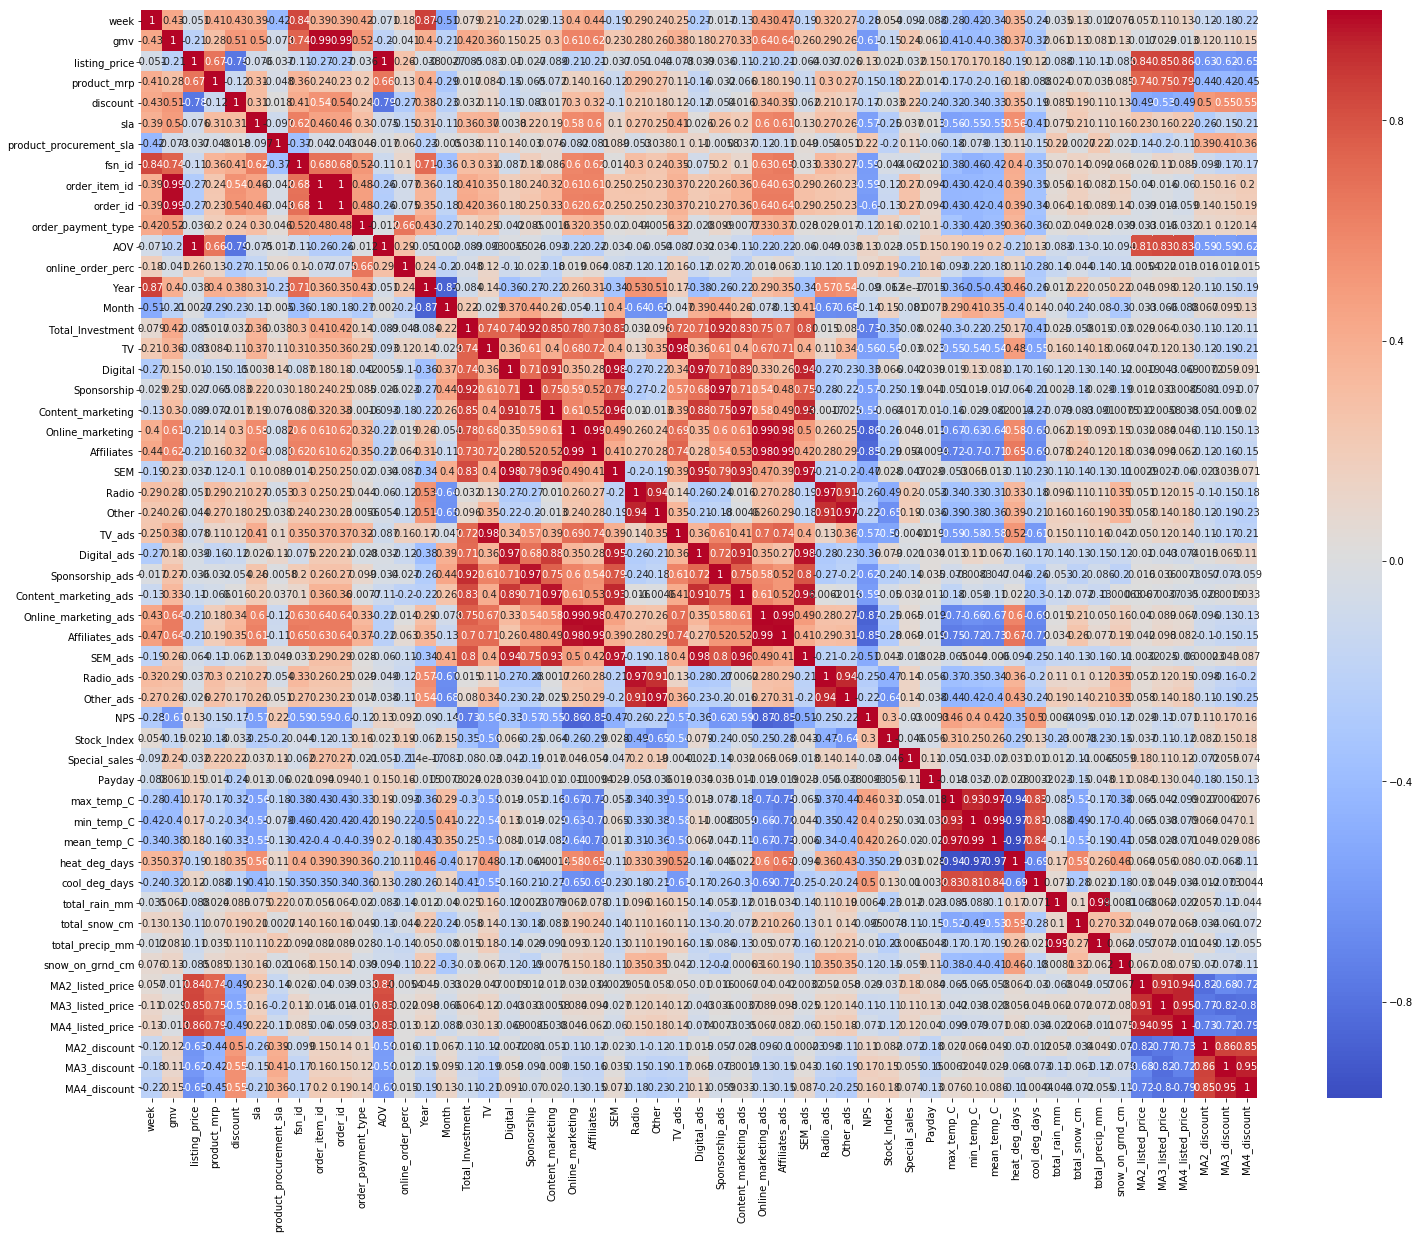

In [187]:
plt.figure(figsize=(25,20))

### Heatmap
sns.heatmap(ga_week.corr(), cmap="coolwarm", annot=True)
plt.show()

In [188]:

ga_week.drop(['TV', 'Digital', 'Sponsorship', 'Content_marketing','Online_marketing', 'Affiliates', 'SEM','Radio',
              'Other','Affiliates_ads','SEM_ads','Digital_ads','Radio_ads','Other_ads','mean_temp_C','min_temp_C',
              'order_id','order_item_id','total_precip_mm','Total_Investment','MA3_discount',
              'MA3_listed_price','AOV','MA4_listed_price'], axis = 1, inplace = True)

In [189]:
ga_week.drop(['max_temp_C'], axis = 1, inplace = True)

In [190]:
###  Successfully removed more than 90% highly correlated variables from dataset.


#### Gaming Accessory - Lag Variable Functions

In [191]:
### Lag of listed_price, discount_offer, NPS, Special_sales

ga_week['lag_1_listed_price'] = ga_week['listing_price'].shift(-1).fillna(0)
ga_week['lag_2_listed_price'] = ga_week['listing_price'].shift(-2).fillna(0)
ga_week['lag_3_listed_price'] = ga_week['listing_price'].shift(-3).fillna(0)

ga_week['lag_1_discount_offer'] = ga_week['discount'].shift(-1).fillna(0)
ga_week['lag_2_discount_offer'] = ga_week['discount'].shift(-2).fillna(0)
ga_week['lag_3_discount_offer'] = ga_week['discount'].shift(-3).fillna(0)

ga_week['lag_1_NPS'] = ga_week['NPS'].shift(-1).fillna(0)
ga_week['lag_2_NPS'] = ga_week['NPS'].shift(-2).fillna(0)
ga_week['lag_3_NPS'] = ga_week['NPS'].shift(-3).fillna(0)

ga_week['lag_1_Stock_Index'] = ga_week['Stock_Index'].shift(-1).fillna(0)
ga_week['lag_2_Stock_Index'] = ga_week['Stock_Index'].shift(-2).fillna(0)
ga_week['lag_3_Stock_Index'] = ga_week['Stock_Index'].shift(-3).fillna(0)

ga_week['lag_1_Special_sales'] = ga_week['Special_sales'].shift(-1).fillna(0)
ga_week['lag_2_Special_sales'] = ga_week['Special_sales'].shift(-2).fillna(0)
ga_week['lag_3_Special_sales'] = ga_week['Special_sales'].shift(-3).fillna(0)

ga_week['lag_1_Payday'] = ga_week['Payday'].shift(-1).fillna(0)
ga_week['lag_2_Payday'] = ga_week['Payday'].shift(-2).fillna(0)
ga_week['lag_3_Payday'] = ga_week['Payday'].shift(-3).fillna(0)


In [192]:
ga_week.head()

week         gmv  listing_price  product_mrp  discount   sla  \
0     1   17466.000        681.080      898.440     0.220 2.960   
1     2 1435300.000        528.929      963.907     0.414 5.170   
2     3 1097388.359        449.826      759.691     0.429 5.115   
3     4 1158166.000        559.134      889.058     0.352 5.179   
4     5  742062.000        554.214      886.076     0.363 5.552   

   product_procurement_sla  fsn_id  order_payment_type  online_order_perc  \
0                    2.560      19                  25            100.000   
1                    3.013     211                 689             26.208   
2                    2.514     216                 534             22.418   
3                    2.338     232                 425             21.008   
4                    2.325     224                 246             18.880   

        Date     Year  Month  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0 2015-07-05 2015.000  7.000   0.054            1.854                  0.000   
1 2015-07-12 2015.000  7.000   0.081            2.780                  0.000   
2 2015-07-19 2015.000  7.000   0.081            2.780                  0.000   
3 2015-07-26 2015.000  7.000   0.081            2.780                  0.000   
4 2015-08-02 2015.000  8.000   0.028            1.139                  0.000   

   Online_marketing_ads    NPS  Stock_Index  Special_sales  Payday  \
0                 0.332 54.600     1177.000          0.000   0.200   
1                 0.498 54.600     1177.000          0.000   0.000   
2                 0.498 54.600     1177.000          0.286   0.143   
3                 0.498 54.600     1177.000          0.000   0.000   
4                 0.192 56.139     1185.286          0.000   0.143   

   heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  \
0          0.100          1.460          0.000          0.000   
1          1.059          2.322          4.155          0.029   
2          0.816          4.722          1.569          0.029   
3          1.632          4.172          1.141          0.029   
4          0.816          5.908          4.341          0.029   

   snow_on_grnd_cm  MA2_listed_price  MA2_discount  MA4_discount  \
0            0.000             0.000         0.000         0.000   
1            0.041            -0.126         0.306         0.306   
2            0.041            -0.081         0.018         0.211   
3            0.041             0.108        -0.098        -0.003   
4            0.041            -0.004         0.015        -0.067   

   lag_1_listed_price  lag_2_listed_price  lag_3_listed_price  \
0             528.929             449.826             559.134   
1             449.826             559.134             554.214   
2             559.134             554.214             195.500   
3             554.214             195.500             805.500   
4             195.500             805.500             359.000   

   lag_1_discount_offer  lag_2_discount_offer  lag_3_discount_offer  \
0                 0.414                 0.429                 0.352   
1                 0.429                 0.352                 0.363   
2                 0.352                 0.363                 0.535   
3                 0.363                 0.535                 0.255   
4                 0.535                 0.255                 0.490   

   lag_1_NPS  lag_2_NPS  lag_3_NPS  lag_1_Stock_Index  lag_2_Stock_Index  \
0     54.600     54.600     54.600           1177.000           1177.000   
1     54.600     54.600     56.139           1177.000           1177.000   
2     54.600     56.139     59.987           1177.000           1185.286   
3     56.139     59.987     59.987           1185.286           1206.000   
4     59.987     59.987     59.987           1206.000           1206.000   

   lag_3_Stock_Index  lag_1_Special_sales  lag_2_Special_sales  \
0           1177.000                0.000                0.286   
1           1185.286        

## 3. Home Audio Sub Category

In [193]:
home_audio = consumer[consumer['product_analytic_sub_category'] == 'HomeAudio']

In [194]:
###  Removing outliers is important as
###  1. There may be some garbage value.
###  2. Bulk orders can skew the analysis

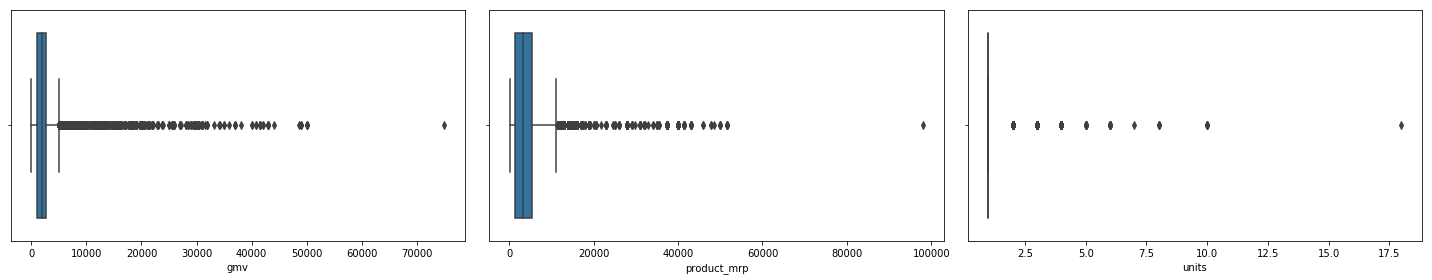

In [195]:
### Outlier Analysis
fig, axs = plt.subplots(1,3, figsize = (20,4))
plt1 = sns.boxplot(home_audio['gmv'], ax = axs[0])
plt2 = sns.boxplot(home_audio['units'], ax = axs[2])
plt4 = sns.boxplot(home_audio['product_mrp'], ax = axs[1])
plt.tight_layout()

In [196]:
### Treating outliers
### Outlier treatment for gmv & product_mrp
Q1 = home_audio.gmv.quantile(0.25)
Q3 = home_audio.gmv.quantile(0.75)
IQR = Q3 - Q1
home_audio = home_audio[(home_audio.gmv >= Q1 - 1.5*IQR) & (home_audio.gmv <= Q3 + 1.5*IQR)]
Q1 = home_audio.product_mrp.quantile(0.25)
Q3 = home_audio.product_mrp.quantile(0.75)
IQR = Q3 - Q1
home_audio = home_audio[(home_audio.product_mrp >= Q1 - 1.5*IQR) & (home_audio.product_mrp <= Q3 + 1.5*IQR)]

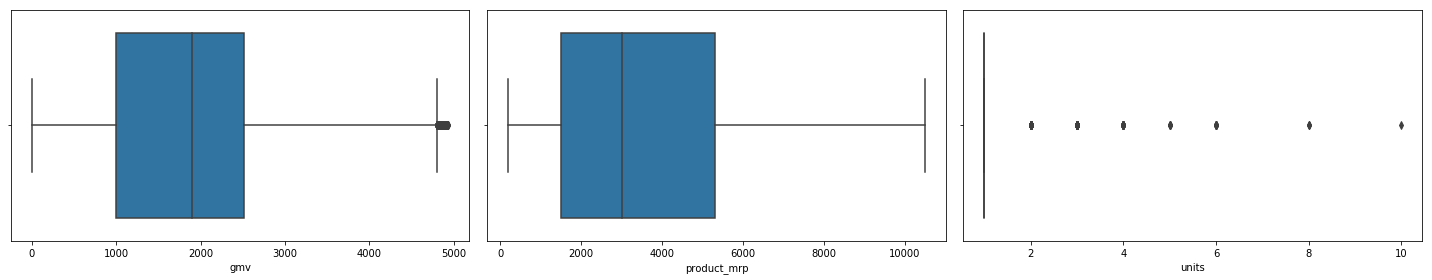

In [197]:
### Outlier Analysis
fig, axs = plt.subplots(1,3, figsize = (20,4))
plt1 = sns.boxplot(home_audio['gmv'], ax = axs[0])
plt2 = sns.boxplot(home_audio['units'], ax = axs[2])
plt4 = sns.boxplot(home_audio['product_mrp'], ax = axs[1])
plt.tight_layout()

In [198]:
home_audio.columns

Index(['fsn_id', 'order_date', 'Year', 'Month', 'order_id', 'order_item_id',
       'gmv', 'units', 'order_payment_type', 'sla',
       'product_analytic_category', 'product_analytic_sub_category',
       'product_mrp', 'product_procurement_sla', 'listing_price', 'discount',
       'Order_Item_Value', 'week', 'premium_product'],
      dtype='object')

In [199]:
### Aggregating dataset on weekly level

ha_week = pd.DataFrame(home_audio.groupby('week').agg({'gmv':'sum','listing_price':'mean',
                                                             'product_mrp':'mean','discount':'mean',
                                                             'sla':'mean','product_procurement_sla':'mean',
                                                             'fsn_id':pd.Series.nunique,'order_item_id':pd.Series.nunique,
                                                             'order_id': pd.Series.nunique,
                                                             'order_payment_type':'sum'}))

ha_week.reset_index( inplace = True)

In [200]:
ha_week.head()

week         gmv  listing_price  product_mrp  discount   sla  \
0     1   83742.000       2392.629     4369.057     0.397 2.943   
1     2 3725167.133       1845.875     2971.504     0.326 7.454   
2     3 4344419.000       1855.961     3121.880     0.339 7.116   
3     4 3917329.000       1798.505     3008.836     0.328 7.168   
4     5 2812144.000       1853.243     3094.751     0.328 7.297   

   product_procurement_sla  fsn_id  order_item_id  order_id  \
0                    3.486      19         35.000    35.000   
1                    2.751     202       2012.000  2011.000   
2                    2.666     227       2335.000  2330.000   
3                    2.762     227       2167.000  2160.000   
4                    2.663     200       1513.000  1511.000   

   order_payment_type  
0                  34  
1                 464  
2                 527  
3                 450  
4                 327

In [201]:
### Sum of GMV / No of unique Orders

ha_week['AOV'] = ha_week['gmv']/ha_week['order_id']

In [202]:
ha_week['online_order_perc'] = ha_week['order_payment_type']*100/ha_week['order_item_id']

In [203]:
ha_week.head()

week         gmv  listing_price  product_mrp  discount   sla  \
0     1   83742.000       2392.629     4369.057     0.397 2.943   
1     2 3725167.133       1845.875     2971.504     0.326 7.454   
2     3 4344419.000       1855.961     3121.880     0.339 7.116   
3     4 3917329.000       1798.505     3008.836     0.328 7.168   
4     5 2812144.000       1853.243     3094.751     0.328 7.297   

   product_procurement_sla  fsn_id  order_item_id  order_id  \
0                    3.486      19         35.000    35.000   
1                    2.751     202       2012.000  2011.000   
2                    2.666     227       2335.000  2330.000   
3                    2.762     227       2167.000  2160.000   
4                    2.663     200       1513.000  1511.000   

   order_payment_type      AOV  online_order_perc  
0                  34 2392.629             97.143  
1                 464 1852.395             23.062  
2                 527 1864.558             22.570  
3                 450 1813.578             20.766  
4                 327 1861.114             21.613

In [204]:
ha_week = ha_week.merge(marketing, how = 'left', on = 'week')

In [205]:
ha_week = ha_week.merge(calendar, how = 'left', on = 'week')

In [206]:
ha_week.head()

week         gmv  listing_price  product_mrp  discount   sla  \
0     1   83742.000       2392.629     4369.057     0.397 2.943   
1     2 3725167.133       1845.875     2971.504     0.326 7.454   
2     3 4344419.000       1855.961     3121.880     0.339 7.116   
3     4 3917329.000       1798.505     3008.836     0.328 7.168   
4     5 2812144.000       1853.243     3094.751     0.328 7.297   

   product_procurement_sla  fsn_id  order_item_id  order_id  \
0                    3.486      19         35.000    35.000   
1                    2.751     202       2012.000  2011.000   
2                    2.666     227       2335.000  2330.000   
3                    2.762     227       2167.000  2160.000   
4                    2.663     200       1513.000  1511.000   

   order_payment_type      AOV  online_order_perc       Date     Year  Month  \
0                  34 2392.629             97.143 2015-07-05 2015.000  7.000   
1                 464 1852.395             23.062 2015-07-12 2015.000  7.000   
2                 527 1864.558             22.570 2015-07-19 2015.000  7.000   
3                 450 1813.578             20.766 2015-07-26 2015.000  7.000   
4                 327 1861.114             21.613 2015-08-02 2015.000  8.000   

   Total_Investment    TV  Digital  Sponsorship  Content_marketing  \
0             4.265 0.054    0.633        1.854              0.000   
1             4.265 0.054    0.633        1.854              0.000   
2             4.265 0.054    0.633        1.854              0.000   
3             4.265 0.054    0.633        1.854              0.000   
4             1.013 0.001    0.256        0.213              0.000   

   Online_marketing  Affiliates   SEM  Radio  Other  TV_ads  Digital_ads  \
0             0.332       0.137 1.256  0.000  0.000   0.054        0.633   
1             0.332       0.137 1.256  0.000  0.000   0.081        0.950   
2             0.332       0.137 1.256  0.000  0.000   0.081        0.950   
3             0.332       0.137 1.256  0.000  0.000   0.081        0.950   
4             0.026       0.015 0.503  0.000  0.000   0.028        0.572   

   Sponsorship_ads  Content_marketing_ads  Online_marketing_ads  \
0            1.854                  0.000                 0.332   
1            2.780                  0.000                 0.498   
2            2.780                  0.000                 0.498   
3            2.780                  0.000                 0.498   
4            1.139                  0.000                 0.192   

   Affiliates_ads  SEM_ads  Radio_ads  Other_ads    NPS  Stock_Index  \
0           0.137    1.256      0.000      0.000 54.600     1177.000   
1           0.205    1.884      0.000      0.000 54.600     1177.000   
2           0.205    1.884      0.000      0.000 54.600     1177.000   
3           0.205    1.884      0.000      0.000 54.600     1177.000   
4           0.083    1.131      0.000      0.000 56.139     1185.286   

   Special_sales  Payday  max_temp_C  min_temp_C  mean_temp_C  heat_deg_days  \
0          0.000   0.200      25.500      13.200       19.360          0.100   
1          0.000   0.000      24.025      14.385       19.263          1.059   
2          0.286   0.143      27.383      16.314       21.906          0.816   
3          0.000   0.000      28.240      14.342       20.540          1.632   
4          0.000   0.143      29.811      16.242       23.092          0.816   

   cool_deg_days  total_rain_mm  total_snow_cm  total_precip_mm  \
0          1.460          0.000          0.000            0.000   
1          2.322          4.155          0.029            4.184   
2          4.722          1.569          0.029            1.598   
3          4.172          1.141          0.029            1.170   
4          5.908          4.341          0.029            4.370   

   snow_on_grnd_cm  
0            0.000  
1            0.041  
2            0.041  
3            0.041  
4            0.041

### Exploratory Data Analysis

In [207]:
ha_week_viz = ha_week.round(2)

#### Univariate Analysis

Target Variable

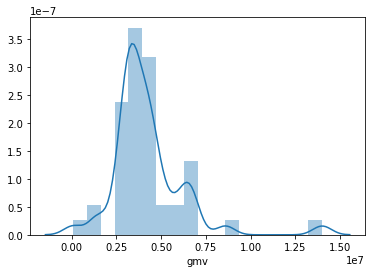

In [208]:
sns.distplot(ha_week_viz['gmv'],kde=True)

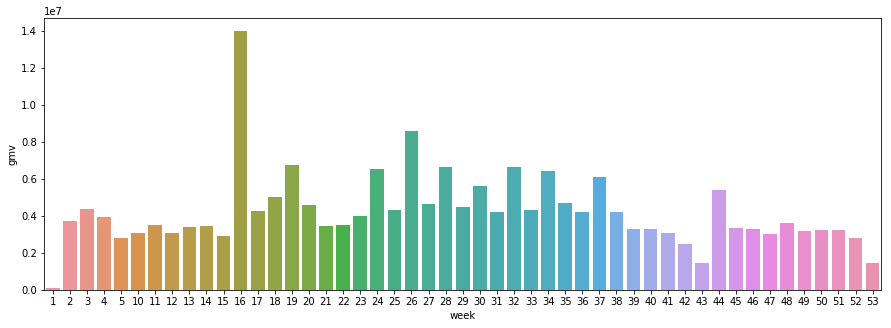

In [209]:
plt.figure(figsize=(15, 5))
sns.barplot(ha_week_viz['week'],ha_week_viz['gmv'])

Marketing KPI

In [210]:
ha_week_viz.columns

Index(['week', 'gmv', 'listing_price', 'product_mrp', 'discount', 'sla',
       'product_procurement_sla', 'fsn_id', 'order_item_id', 'order_id',
       'order_payment_type', 'AOV', 'online_order_perc', 'Date', 'Year',
       'Month', 'Total_Investment', 'TV', 'Digital', 'Sponsorship',
       'Content_marketing', 'Online_marketing', 'Affiliates', 'SEM', 'Radio',
       'Other', 'TV_ads', 'Digital_ads', 'Sponsorship_ads',
       'Content_marketing_ads', 'Online_marketing_ads', 'Affiliates_ads',
       'SEM_ads', 'Radio_ads', 'Other_ads', 'NPS', 'Stock_Index',
       'Special_sales', 'Payday', 'max_temp_C', 'min_temp_C', 'mean_temp_C',
       'heat_deg_days', 'cool_deg_days', 'total_rain_mm', 'total_snow_cm',
       'total_precip_mm', 'snow_on_grnd_cm'],
      dtype='object')

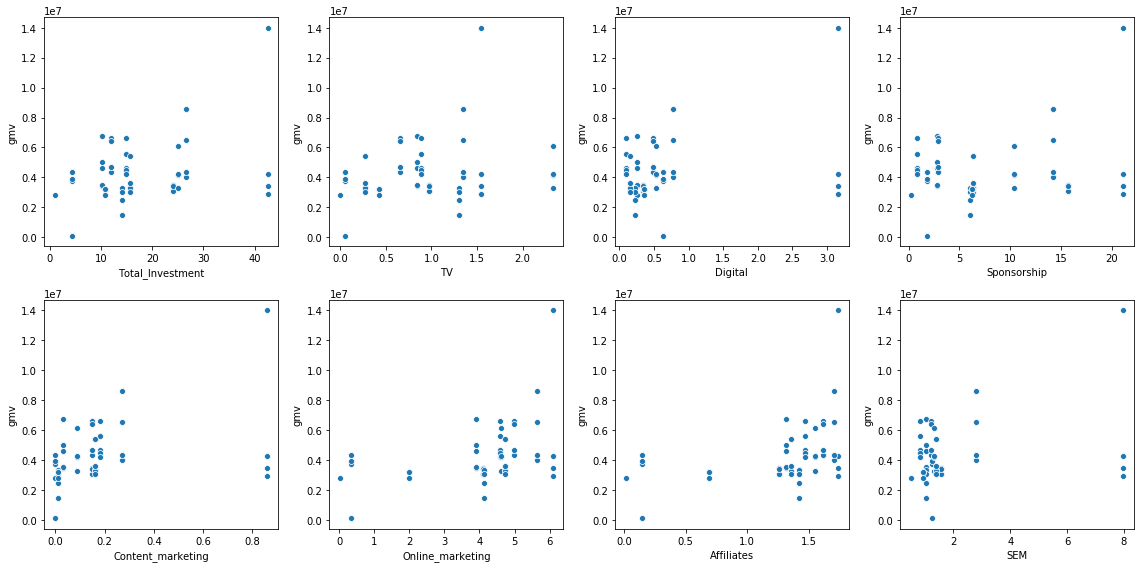

In [211]:
fig, axs = plt.subplots(2,4,figsize=(16,8))

plt1 = sns.scatterplot(x = 'Total_Investment', y = 'gmv', data = ha_week_viz, ax = axs[0,0])

plt2 = sns.scatterplot(x = 'TV', y = 'gmv', data = ha_week_viz, ax = axs[0,1])

plt3 = sns.scatterplot(x = 'Digital', y = 'gmv', data = ha_week_viz, ax = axs[0,2])

plt4 = sns.scatterplot(x = 'Sponsorship', y = 'gmv', data = ha_week_viz, ax = axs[0,3])

plt5 = sns.scatterplot(x = 'Content_marketing', y = 'gmv', data = ha_week_viz, ax = axs[1,0])

plt6 = sns.scatterplot(x = 'Online_marketing', y = 'gmv', data = ha_week_viz, ax = axs[1,1])

plt7 = sns.scatterplot(x = 'Affiliates', y = 'gmv', data = ha_week_viz, ax = axs[1,2])

plt8 = sns.scatterplot(x = 'SEM', y = 'gmv', data = ha_week_viz, ax = axs[1,3])

plt.tight_layout()

#### Bivariate Analysis

GMV and Holiday weekly

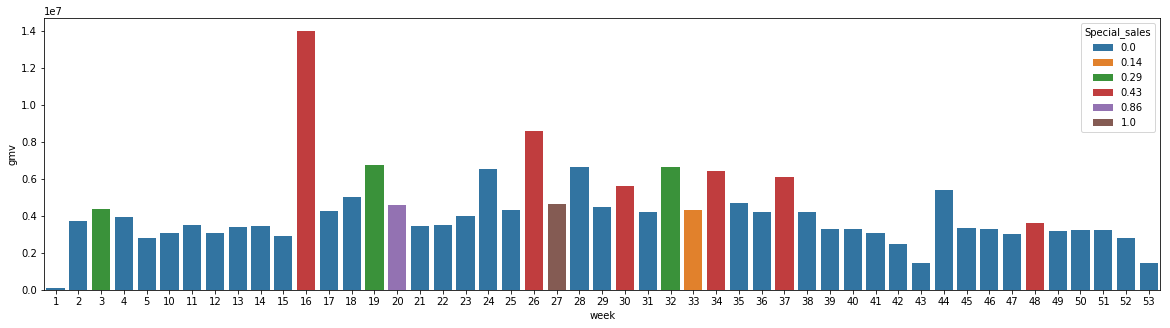

In [212]:
plt.figure(figsize=(20, 5))
sns.barplot(x= ha_week_viz['week'], y =ha_week_viz['gmv'], hue = ha_week_viz['Special_sales'], dodge = False)
plt.show()

GMV and discount weekly

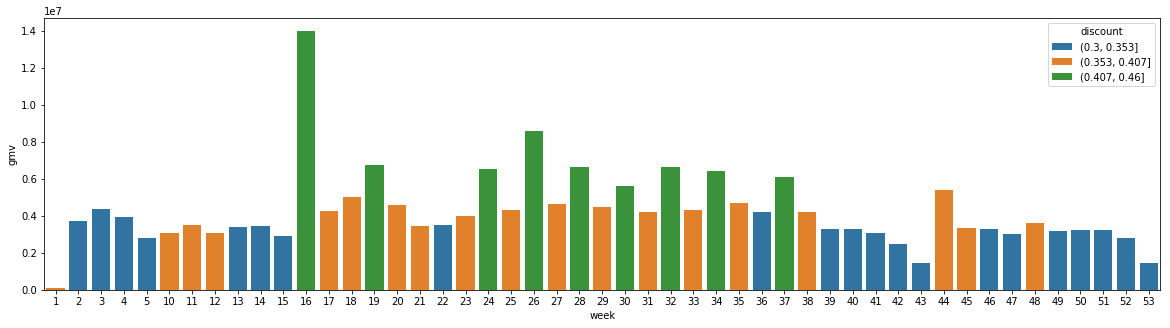

In [213]:
plt.figure(figsize=(20, 5))
sns.barplot(x= ha_week_viz['week'], y =ha_week_viz['gmv'], hue = pd.cut(ha_week_viz['discount'],3), dodge = False)
plt.show()

#### Home Audio - Moving Average

In [214]:
### ha_week

### Moving Average for listed_price and discount_offer

### ha_week = ha_week.sort_values('order_date')

ha_week[['MA2_LP','MA2_Discount']] = ha_week[['listing_price','discount']].rolling(window=2,min_periods=1).mean()
ha_week[['MA3_LP','MA3_Discount']] = ha_week[['listing_price','discount']].rolling(window=3,min_periods=1).mean()
ha_week[['MA4_LP','MA4_Discount']] = ha_week[['listing_price','discount']].rolling(window=4,min_periods=1).mean()

### Reference listed price Inflation 

ha_week['MA2_listed_price'] = (ha_week['listing_price']-ha_week['MA2_LP'])/ha_week['MA2_LP']
ha_week['MA3_listed_price'] = (ha_week['listing_price']-ha_week['MA3_LP'])/ha_week['MA3_LP']
ha_week['MA4_listed_price'] = (ha_week['listing_price']-ha_week['MA4_LP'])/ha_week['MA4_LP']

### Reference discount Inflation

ha_week['MA2_discount'] = (ha_week['discount']-ha_week['MA2_Discount'])/ha_week['MA2_Discount']
ha_week['MA3_discount'] = (ha_week['discount']-ha_week['MA3_Discount'])/ha_week['MA3_Discount']
ha_week['MA4_discount'] = (ha_week['discount']-ha_week['MA4_Discount'])/ha_week['MA4_Discount']


ha_week.drop(['MA2_LP','MA3_LP','MA4_LP','MA2_Discount','MA3_Discount','MA4_Discount'], axis = 1, inplace = True)  
ha_week



week          gmv  listing_price  product_mrp  discount   sla  \
0      1    83742.000       2392.629     4369.057     0.397 2.943   
1      2  3725167.133       1845.875     2971.504     0.326 7.454   
2      3  4344419.000       1855.961     3121.880     0.339 7.116   
3      4  3917329.000       1798.505     3008.836     0.328 7.168   
4      5  2812144.000       1853.243     3094.751     0.328 7.297   
5     10  3091251.000       1768.029     3145.995     0.365 5.682   
6     11  3489765.000       1742.461     3146.834     0.367 5.603   
7     12  3091999.000       1708.961     2986.984     0.359 6.311   
8     13  3405749.000       1591.263     2734.433     0.349 6.399   
9     14  3434064.000       1688.939     2875.302     0.343 6.448   
10    15  2914570.000       1643.229     2824.918     0.348 5.979   
11    16 13999216.000       1838.343     3517.360     0.421 5.986   
12    17  4242332.000       1775.824     3036.936     0.359 6.661   
13    18  5023090.000       1807.469     3055.024     0.356 6.567   
14    19  6743389.250       1967.388     4165.562     0.437 5.021   
15    20  4599812.560       1874.096     3414.446     0.370 6.366   
16    21  3428301.500       1909.625     3412.219     0.357 5.898   
17    22  3518352.500       1848.376     3111.280     0.340 6.426   
18    23  3995708.000       1890.315     3657.410     0.395 5.774   
19    24  6523147.991       2066.659     4550.481     0.463 4.961   
20    25  4328292.000       1931.915     3701.782     0.391 5.925   
21    26  8590006.250       2161.175     4354.819     0.448 4.833   
22    27  4640222.000       1945.445     3309.431     0.355 5.939   
23    28  6628003.000       2005.687     4258.100     0.448 4.823   
24    29  4492835.000       1995.051     3855.076     0.392 5.490   
25    30  5589734.500       1936.375     3823.925     0.417 5.541   
26    31  4200190.000       1923.480     3585.778     0.382 5.698   
27    32  6627568.000       2028.846     4084.827     0.428 4.896   
28    33  4334972.000       1890.278     3526.038     0.387 5.353   
29    34  6429120.240       1984.334     3954.733     0.430 5.050   
30    35  4687026.000       1901.378     3370.114     0.369 5.767   
31    36  4181944.000       1807.470     3075.972     0.347 5.829   
32    37  6120643.000       1978.735     3735.602     0.406 5.317   
33    38  4232360.000       1898.342     3248.320     0.363 5.391   
34    39  3263433.000       1718.251     2842.833     0.346 5.684   
35    40  3303263.000       1829.333     3115.542     0.353 5.471   
36    41  3049300.000       1822.180     2969.263     0.338 5.924   
37    42  2487778.000       1825.864     3045.855     0.351 5.732   
38    43  1455916.000       2081.159     3377.964     0.341 4.676   
39    44  5414557.000       1814.789     3077.531     0.367 6.002   
40    45  3347099.000       1824.552     3095.354     0.366 5.190   
41    46  3287068.000       1815.414     3043.434     0.354 5.201   
42    47  3037070.000       1852.072     3024.177     0.339 5.016   
43    48  3605013.000       2054.769     3500.731     0.367 4.275   
44    49  3176031.000       1982.043     3281.868     0.340 5.052   
45    50  3214266.000       1869.164     3014.099     0.317 5.694   
46    51  3220357.000       1947.993     3051.255     0.304 5.078   
47    52  2807030.000       2074.617     3348.654     0.318 4.288   
48    53  1471519.000       2060.569     3288.135     0.311 4.025   

    product_procurement_sla  fsn_id  order_item_id  order_id  \
0                     3.486      19         35.000    35.000   
1                     2.751     202       2012.000  2011.000   
2                     2.666     227       2335.000  2330.000   
3                     2.762     227       2167.000  2160.000   
4                     2.663     200       1513.000  1511.000   
5                     2.729     227       1581.000  1743.000   
6                     2.821     241       1628.000  1997.000   
7                     2.618     241      

#### Heatmap to see multicollinearity

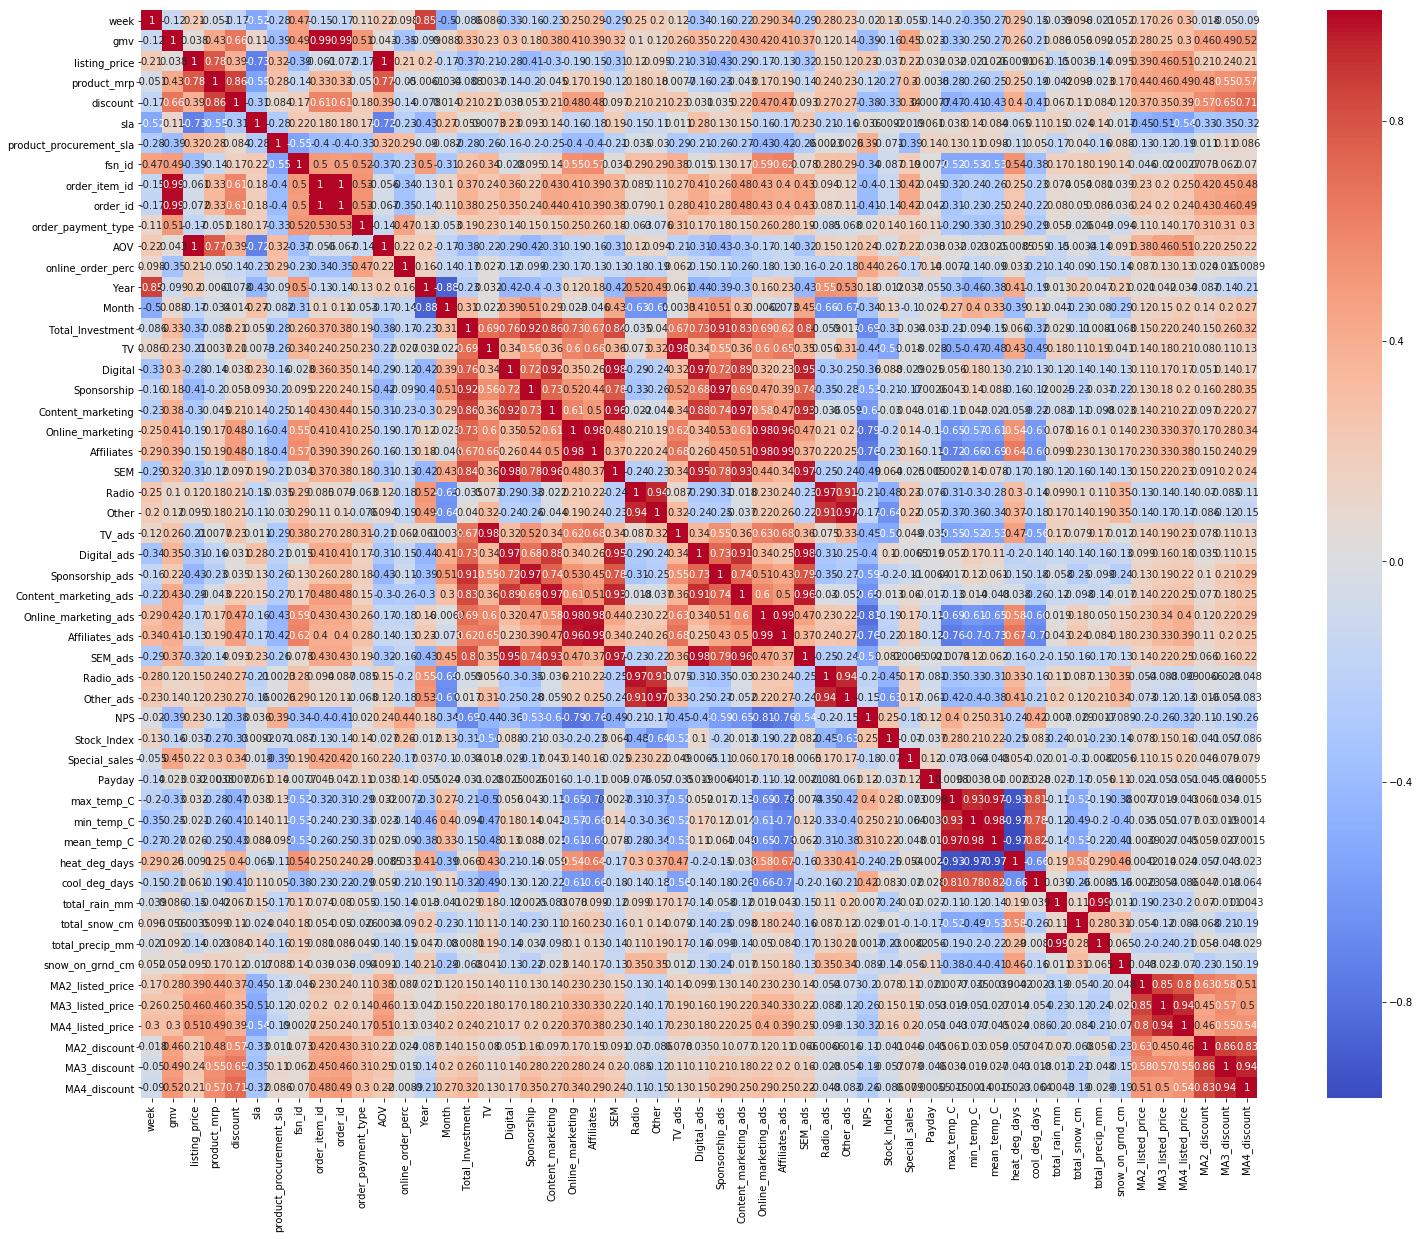

In [215]:
plt.figure(figsize=(25,20))

### Heatmap
sns.heatmap(ha_week.corr(), cmap="coolwarm", annot=True)
plt.show()

In [216]:
ha_week.drop(['TV', 'Digital', 'Sponsorship', 'Content_marketing','Online_marketing', 'Affiliates', 'SEM','Radio',
              'Other','Affiliates_ads','SEM_ads','Digital_ads','Radio_ads','Other_ads','mean_temp_C','min_temp_C',
              'order_id','order_item_id','total_precip_mm','Total_Investment','MA3_discount',
              'MA3_listed_price','AOV'], axis = 1, inplace = True)

In [217]:
ha_week.drop(['max_temp_C'], axis = 1, inplace = True)

In [218]:
###  Successfully removed more than 90% highly correlated variables from dataset.

#### Home Audio - Lag Variable Functions

In [219]:
### Lag of listed_price, discount_offer, NPS, Special_sales

ha_week['lag_1_listed_price'] = ha_week['listing_price'].shift(-1).fillna(0)
ha_week['lag_2_listed_price'] = ha_week['listing_price'].shift(-2).fillna(0)
ha_week['lag_3_listed_price'] = ha_week['listing_price'].shift(-3).fillna(0)

ha_week['lag_1_discount_offer'] = ha_week['discount'].shift(-1).fillna(0)
ha_week['lag_2_discount_offer'] = ha_week['discount'].shift(-2).fillna(0)
ha_week['lag_3_discount_offer'] = ha_week['discount'].shift(-3).fillna(0)

ha_week['lag_1_NPS'] = ha_week['NPS'].shift(-1).fillna(0)
ha_week['lag_2_NPS'] = ha_week['NPS'].shift(-2).fillna(0)
ha_week['lag_3_NPS'] = ha_week['NPS'].shift(-3).fillna(0)

ha_week['lag_1_Stock_Index'] = ha_week['Stock_Index'].shift(-1).fillna(0)
ha_week['lag_2_Stock_Index'] = ha_week['Stock_Index'].shift(-2).fillna(0)
ha_week['lag_3_Stock_Index'] = ha_week['Stock_Index'].shift(-3).fillna(0)

ha_week['lag_1_Special_sales'] = ha_week['Special_sales'].shift(-1).fillna(0)
ha_week['lag_2_Special_sales'] = ha_week['Special_sales'].shift(-2).fillna(0)
ha_week['lag_3_Special_sales'] = ha_week['Special_sales'].shift(-3).fillna(0)

ha_week['lag_1_Payday'] = ha_week['Payday'].shift(-1).fillna(0)
ha_week['lag_2_Payday'] = ha_week['Payday'].shift(-2).fillna(0)
ha_week['lag_3_Payday'] = ha_week['Payday'].shift(-3).fillna(0)


In [220]:
ha_week.head(10)

week         gmv  listing_price  product_mrp  discount   sla  \
0     1   83742.000       2392.629     4369.057     0.397 2.943   
1     2 3725167.133       1845.875     2971.504     0.326 7.454   
2     3 4344419.000       1855.961     3121.880     0.339 7.116   
3     4 3917329.000       1798.505     3008.836     0.328 7.168   
4     5 2812144.000       1853.243     3094.751     0.328 7.297   
5    10 3091251.000       1768.029     3145.995     0.365 5.682   
6    11 3489765.000       1742.461     3146.834     0.367 5.603   
7    12 3091999.000       1708.961     2986.984     0.359 6.311   
8    13 3405749.000       1591.263     2734.433     0.349 6.399   
9    14 3434064.000       1688.939     2875.302     0.343 6.448   

   product_procurement_sla  fsn_id  order_payment_type  online_order_perc  \
0                    3.486      19                  34             97.143   
1                    2.751     202                 464             23.062   
2                    2.666     227                 527             22.570   
3                    2.762     227                 450             20.766   
4                    2.663     200                 327             21.613   
5                    2.729     227                 394             24.921   
6                    2.821     241                 393             24.140   
7                    2.618     241                 387             21.524   
8                    2.589     248                 448             20.993   
9                    2.444     247                 433             21.372   

        Date     Year  Month  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0 2015-07-05 2015.000  7.000   0.054            1.854                  0.000   
1 2015-07-12 2015.000  7.000   0.081            2.780                  0.000   
2 2015-07-19 2015.000  7.000   0.081            2.780                  0.000   
3 2015-07-26 2015.000  7.000   0.081            2.780                  0.000   
4 2015-08-02 2015.000  8.000   0.028            1.139                  0.000   
5 2015-09-06 2015.000  9.000   0.971           15.803                  0.153   
6 2015-09-13 2015.000  9.000   1.455           23.545                  0.229   
7 2015-09-20 2015.000  9.000   1.455           23.545                  0.229   
8 2015-09-27 2015.000  9.000   1.455           23.545                  0.229   
9 2015-10-04 2015.000 10.000   2.021           29.017                  0.937   

   Online_marketing_ads    NPS  Stock_Index  Special_sales  Payday  \
0                 0.332 54.600     1177.000          0.000   0.200   
1                 0.498 54.600     1177.000          0.000   0.000   
2                 0.498 54.600     1177.000          0.286   0.143   
3                 0.498 54.600     1177.000          0.000   0.000   
4                 0.192 56.139     1185.286          0.000   0.143   
5                 4.108 48.791     1116.000          0.000   0.143   
6                 6.142 46.925     1101.000          0.000   0.000   
7                 6.142 46.925     1101.000          0.000   0.143   
8                 6.142 46.925     1101.000          0.000   0.000   
9                 8.140 45.481     1163.286          0.000   0.143   

   heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  \
0          0.100          1.460          0.000          0.000   
1          1.059          2.322          4.155          0.029   
2          0.816          4.722          1.569          0.029   
3          1.632          4.172          1.141          0.029   
4          0.816          5.908          4.341          0.029   
5          1.632          5.172          9.026          0.029   
6          2.546          2.358          1.424          0.058   
7          4.080          2.124          1.422          0.088   
8          4.896          1.960          0.738          0.058   
9          3.548          1.780          3.395          0.058   

   snow_on_grnd_cm  MA2_listed_price  MA4_listed_

# 5. Modeling - Camera Accessory

### 1. Linear Model

In [221]:
###  Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [222]:
ca_week.columns

Index(['week', 'gmv', 'listing_price', 'product_mrp', 'discount', 'sla',
       'product_procurement_sla', 'fsn_id', 'order_payment_type',
       'premium_product', 'online_order_perc', 'Date', 'Year', 'Month',
       'TV_ads', 'Sponsorship_ads', 'Content_marketing_ads',
       'Online_marketing_ads', 'NPS', 'Stock_Index', 'Special_sales', 'Payday',
       'heat_deg_days', 'cool_deg_days', 'total_rain_mm', 'total_snow_cm',
       'snow_on_grnd_cm', 'MA4_listed_price', 'MA2_discount_offer',
       'lag_1_listed_price', 'lag_2_listed_price', 'lag_3_listed_price',
       'lag_1_discount', 'lag_2_discount', 'lag_3_discount',
       'lag_1_Stock_Index', 'lag_2_Stock_Index', 'lag_3_Stock_Index',
       'lag_1_Special_sales', 'lag_2_Special_sales', 'lag_3_Special_sales',
       'lag_1_Payday', 'lag_2_Payday', 'lag_3_Payday', 'lag_1_NPS',
       'lag_2_NPS', 'lag_3_NPS'],
      dtype='object')

In [223]:
camera_lm = ca_week[['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA4_listed_price',
       'MA2_discount_offer','premium_product']]
                            
    
camera_lm.head()

gmv  discount   sla  product_procurement_sla  order_payment_type  \
0   11151.000     0.491 2.423                    2.731                  26   
1 1228580.000     0.448 7.253                    2.578                 753   
2 1344416.000     0.458 6.567                    2.577                 823   
3 1346986.000     0.445 6.611                    2.613                 781   
4  913445.000     0.443 6.533                    2.614                 470   

   online_order_perc  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0            100.000   0.054            1.854                  0.000   
1             31.506   0.081            2.780                  0.000   
2             32.023   0.081            2.780                  0.000   
3             30.377   0.081            2.780                  0.000   
4             27.598   0.028            1.139                  0.000   

   Online_marketing_ads    NPS  Stock_Index  Special_sales  Payday  \
0                 0.332 54.600     1177.000          0.000   0.200   
1                 0.498 54.600     1177.000          0.000   0.000   
2                 0.498 54.600     1177.000          0.286   0.143   
3                 0.498 54.600     1177.000          0.000   0.000   
4                 0.192 56.139     1185.286          0.000   0.143   

   heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  \
0          0.100          1.460          0.000          0.000   
1          1.059          2.322          4.155          0.029   
2          0.816          4.722          1.569          0.029   
3          1.632          4.172          1.141          0.029   
4          0.816          5.908          4.341          0.029   

   snow_on_grnd_cm  MA4_listed_price  MA2_discount_offer  premium_product  
0            0.000             0.000               0.000                0  
1            0.041             0.078              -0.046                0  
2            0.041             0.066               0.011                0  
3            0.041             0.048              -0.014                0  
4            0.041             0.021              -0.002                0

In [224]:
### Checking NaN

camera_lm.isnull().sum()

gmv                        0
discount                   0
sla                        0
product_procurement_sla    0
order_payment_type         0
online_order_perc          0
TV_ads                     1
Sponsorship_ads            1
Content_marketing_ads      1
Online_marketing_ads       1
NPS                        0
Stock_Index                0
Special_sales              0
Payday                     0
heat_deg_days              0
cool_deg_days              0
total_rain_mm              0
total_snow_cm              0
snow_on_grnd_cm            0
MA4_listed_price           0
MA2_discount_offer         0
premium_product            0
dtype: int64

In [225]:
camera_lm.fillna(0, inplace = True)

In [226]:
from sklearn.model_selection import train_test_split


np.random.seed(0)
df_train, df_test = train_test_split(camera_lm, train_size = 0.7, test_size = 0.3, random_state = 100)

In [227]:
### Import the StandardScaler()
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

### Create a scaling object
# scaler = StandardScaler()
scaler = MinMaxScaler()


### Create a list of the variables that you need to scale
varlist = ['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA4_listed_price',
       'MA2_discount_offer','premium_product']
                                      

### Scale these variables using 'fit_transform'
df_train[varlist] = scaler.fit_transform(df_train[varlist])

In [228]:
df_train.head()

gmv  discount   sla  product_procurement_sla  order_payment_type  \
40 0.398     0.689 0.359                    0.608               0.805   
44 0.511     0.892 0.335                    0.551               0.214   
37 0.446     0.447 0.360                    0.607               0.284   
17 0.526     0.370 0.489                    0.894               0.168   
7  0.000     0.196 1.000                    0.000               0.000   

    online_order_perc  TV_ads  Sponsorship_ads  Content_marketing_ads  \
40              0.979   0.559            0.280                  0.010   
44              0.023   0.117            0.292                  0.184   
37              0.167   1.000            0.486                  0.107   
17              0.011   0.363            0.125                  0.039   
7               1.000   0.000            0.000                  0.000   

    Online_marketing_ads   NPS  Stock_Index  Special_sales  Payday  \
40                 0.676 0.477        1.000          0.000   1.000   
44                 0.775 0.187        0.938          0.000   1.000   
37                 0.755 0.297        0.000          0.000   0.000   
17                 0.641 0.167        0.960          0.667   0.000   
7                  0.000 1.000        0.841          1.000   0.000   

    heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  \
40          0.560          0.000          0.009          0.020   
44          0.393          0.060          0.312          0.039   
37          0.815          0.000          1.000          0.020   
17          0.317          0.000          0.142          0.020   
7           0.296          0.317          0.129          0.079   

    snow_on_grnd_cm  MA4_listed_price  MA2_discount_offer  premium_product  
40            0.009             0.285               0.761            0.000  
44            0.018             0.266               0.734            0.000  
37            0.009             0.338               0.651            0.000  
17            0.009             0.377               0.833            0.000  
7             0.036             0.004               0.000            0.000

In [229]:
### Split the train dataset into X and y
from sklearn.model_selection import train_test_split
X_train = df_train.drop('gmv',axis=1)
y_train = df_train['gmv']


In [230]:
#RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [231]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)

In [232]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('discount', True, 1),
 ('sla', True, 1),
 ('product_procurement_sla', True, 1),
 ('order_payment_type', True, 1),
 ('online_order_perc', True, 1),
 ('TV_ads', False, 6),
 ('Sponsorship_ads', False, 3),
 ('Content_marketing_ads', False, 5),
 ('Online_marketing_ads', False, 4),
 ('NPS', False, 8),
 ('Stock_Index', False, 7),
 ('Special_sales', True, 1),
 ('Payday', False, 10),
 ('heat_deg_days', True, 1),
 ('cool_deg_days', False, 9),
 ('total_rain_mm', False, 11),
 ('total_snow_cm', False, 2),
 ('snow_on_grnd_cm', True, 1),
 ('MA4_listed_price', True, 1),
 ('MA2_discount_offer', True, 1),
 ('premium_product', False, 12)]

In [233]:
X_train.columns[rfe.support_]

Index(['discount', 'sla', 'product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'Special_sales', 'heat_deg_days',
       'snow_on_grnd_cm', 'MA4_listed_price', 'MA2_discount_offer'],
      dtype='object')

#### Building model using statsmodel, for the detailed statistics

In [234]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

discount   sla  product_procurement_sla  order_payment_type  \
40     0.689 0.359                    0.608               0.805   
44     0.892 0.335                    0.551               0.214   
37     0.447 0.360                    0.607               0.284   
17     0.370 0.489                    0.894               0.168   
7      0.196 1.000                    0.000               0.000   

    online_order_perc  Special_sales  heat_deg_days  snow_on_grnd_cm  \
40              0.979          0.000          0.560            0.009   
44              0.023          0.000          0.393            0.018   
37              0.167          0.000          0.815            0.009   
17              0.011          0.667          0.317            0.009   
7               1.000          1.000          0.296            0.036   

    MA4_listed_price  MA2_discount_offer  
40             0.285               0.761  
44             0.266               0.734  
37             0.338               0.651  
17             0.377               0.833  
7              0.004               0.000

In [235]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

#### MODEL 1

In [236]:
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     26.57
Date:                Wed, 08 Jan 2020   Prob (F-statistic):           7.18e-11
Time:                        09:53:20   Log-Likelihood:                 59.194
No. Observations:                  36   AIC:                            -96.39
Df Residuals:                      25   BIC:                            -78.97
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [237]:
checkVIF(X_train_new)

Features     VIF
0                     const 226.490
1                  discount   8.210
3   product_procurement_sla   6.280
4        order_payment_type   4.830
10       MA2_discount_offer   4.790
5         online_order_perc   4.350
2                       sla   3.470
9          MA4_listed_price   2.490
7             heat_deg_days   2.100
8           snow_on_grnd_cm   1.520
6             Special_sales   1.380

In [238]:
X_train_new = X_train_rfe.drop(["discount"], axis = 1)

#### MODEL 2

In [239]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     18.90
Date:                Wed, 08 Jan 2020   Prob (F-statistic):           2.92e-09
Time:                        09:53:21   Log-Likelihood:                 51.404
No. Observations:                  36   AIC:                            -82.81
Df Residuals:                      26   BIC:                            -66.97
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [240]:
checkVIF(X_train_new)

Features    VIF
0                    const 81.670
9       MA2_discount_offer  4.230
2  product_procurement_sla  3.530
3       order_payment_type  2.980
4        online_order_perc  2.980
8         MA4_listed_price  2.170
1                      sla  1.980
6            heat_deg_days  1.870
7          snow_on_grnd_cm  1.480
5            Special_sales  1.360

In [241]:
X_train_new = X_train_new.drop(["heat_deg_days"], axis = 1)

#### MODEL 3

In [242]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     22.07
Date:                Wed, 08 Jan 2020   Prob (F-statistic):           5.96e-10
Time:                        09:53:21   Log-Likelihood:                 51.394
No. Observations:                  36   AIC:                            -84.79
Df Residuals:                      27   BIC:                            -70.54
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [243]:
X_train_new = X_train_new.drop(["snow_on_grnd_cm"], axis = 1)

#### MODEL 4

In [244]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     26.14
Date:                Wed, 08 Jan 2020   Prob (F-statistic):           1.11e-10
Time:                        09:53:21   Log-Likelihood:                 51.387
No. Observations:                  36   AIC:                            -86.77
Df Residuals:                      28   BIC:                            -74.11
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [245]:
checkVIF(X_train_new)

Features    VIF
0                    const 77.270
7       MA2_discount_offer  4.220
2  product_procurement_sla  3.510
4        online_order_perc  2.970
3       order_payment_type  2.730
1                      sla  1.940
6         MA4_listed_price  1.860
5            Special_sales  1.260

In [246]:
X_train_new = X_train_new.drop(["sla"], axis = 1)

#### MODEL 5

In [247]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     30.96
Date:                Wed, 08 Jan 2020   Prob (F-statistic):           2.41e-11
Time:                        09:53:21   Log-Likelihood:                 51.071
No. Observations:                  36   AIC:                            -88.14
Df Residuals:                      29   BIC:                            -77.06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [248]:
checkVIF(X_train_new)

Features    VIF
0                    const 43.150
3        online_order_perc  2.940
1  product_procurement_sla  2.840
6       MA2_discount_offer  2.780
2       order_payment_type  2.730
5         MA4_listed_price  1.860
4            Special_sales  1.180

In [249]:
X_train_new = X_train_new.drop(["MA2_discount_offer"], axis = 1)

#### MODEL 6

In [250]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     36.71
Date:                Wed, 08 Jan 2020   Prob (F-statistic):           6.54e-12
Time:                        09:53:21   Log-Likelihood:                 50.358
No. Observations:                  36   AIC:                            -88.72
Df Residuals:                      30   BIC:                            -79.22
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [251]:
checkVIF(X_train_new)

Features    VIF
0                    const 29.370
3        online_order_perc  2.540
2       order_payment_type  1.900
1  product_procurement_sla  1.890
5         MA4_listed_price  1.500
4            Special_sales  1.180

In [252]:
X_train_new = X_train_new.drop(["product_procurement_sla"], axis = 1)

#### MODEL 7

In [253]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     45.23
Date:                Wed, 08 Jan 2020   Prob (F-statistic):           1.63e-12
Time:                        09:53:21   Log-Likelihood:                 49.632
No. Observations:                  36   AIC:                            -89.26
Df Residuals:                      31   BIC:                            -81.35
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3431      0

In [254]:
checkVIF(X_train_new)

Features   VIF
0               const 7.970
1  order_payment_type 1.660
2   online_order_perc 1.640
3       Special_sales 1.160
4    MA4_listed_price 1.150

In [255]:
X_train_new = X_train_new.drop(["MA4_listed_price"], axis = 1)

#### MODEL 8

In [256]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     55.01
Date:                Wed, 08 Jan 2020   Prob (F-statistic):           9.97e-13
Time:                        09:53:21   Log-Likelihood:                 47.748
No. Observations:                  36   AIC:                            -87.50
Df Residuals:                      32   BIC:                            -81.16
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2963      0

In [257]:
checkVIF(X_train_new)

Features   VIF
0               const 2.620
1  order_payment_type 1.650
2   online_order_perc 1.640
3       Special_sales 1.020

#### Residual Analysis of Model

In [258]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

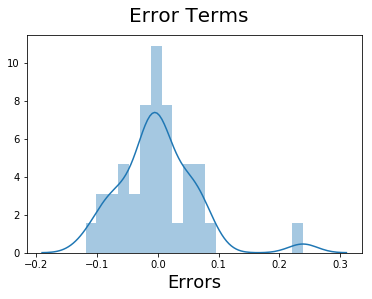

In [259]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

Error terms seem to be approximately normally distributed, so the assumption on the linear modeling seems to be fulfilled.

#### Prediction and Evaluation

In [260]:
#Scaling the test set
num_vars = ['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA4_listed_price',
       'MA2_discount_offer','premium_product']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])


In [261]:
#Dividing into X and y
y_test = df_test.pop('gmv')
X_test = df_test

In [262]:
# Now let's use our model to make predictions.
X_train_new = X_train_new.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [263]:
# Making predictions
y_pred = lm.predict(X_test_new)

#### Evaluation of test via comparison of y_pred and y_test

In [264]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.3605763262227828

Text(0, 0.5, 'y_pred')

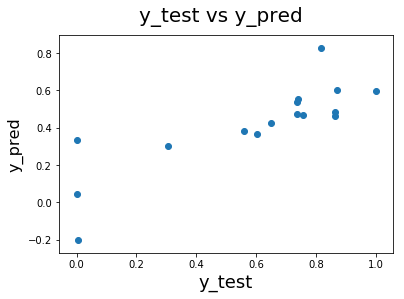

In [265]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

#### Evaluation of the model using Statistics

In [266]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     55.01
Date:                Wed, 08 Jan 2020   Prob (F-statistic):           9.97e-13
Time:                        09:53:22   Log-Likelihood:                 47.748
No. Observations:                  36   AIC:                            -87.50
Df Residuals:                      32   BIC:                            -81.16
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2963      0

### 1.1 Linear Model - Stepwise Selection for feature selection

In [267]:
###  Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [268]:
ca_week.columns

Index(['week', 'gmv', 'listing_price', 'product_mrp', 'discount', 'sla',
       'product_procurement_sla', 'fsn_id', 'order_payment_type',
       'premium_product', 'online_order_perc', 'Date', 'Year', 'Month',
       'TV_ads', 'Sponsorship_ads', 'Content_marketing_ads',
       'Online_marketing_ads', 'NPS', 'Stock_Index', 'Special_sales', 'Payday',
       'heat_deg_days', 'cool_deg_days', 'total_rain_mm', 'total_snow_cm',
       'snow_on_grnd_cm', 'MA4_listed_price', 'MA2_discount_offer',
       'lag_1_listed_price', 'lag_2_listed_price', 'lag_3_listed_price',
       'lag_1_discount', 'lag_2_discount', 'lag_3_discount',
       'lag_1_Stock_Index', 'lag_2_Stock_Index', 'lag_3_Stock_Index',
       'lag_1_Special_sales', 'lag_2_Special_sales', 'lag_3_Special_sales',
       'lag_1_Payday', 'lag_2_Payday', 'lag_3_Payday', 'lag_1_NPS',
       'lag_2_NPS', 'lag_3_NPS'],
      dtype='object')

In [269]:
camera_lm = ca_week[['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA4_listed_price',
       'MA2_discount_offer']]
                            
    
camera_lm.head()

gmv  discount   sla  product_procurement_sla  order_payment_type  \
0   11151.000     0.491 2.423                    2.731                  26   
1 1228580.000     0.448 7.253                    2.578                 753   
2 1344416.000     0.458 6.567                    2.577                 823   
3 1346986.000     0.445 6.611                    2.613                 781   
4  913445.000     0.443 6.533                    2.614                 470   

   online_order_perc  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0            100.000   0.054            1.854                  0.000   
1             31.506   0.081            2.780                  0.000   
2             32.023   0.081            2.780                  0.000   
3             30.377   0.081            2.780                  0.000   
4             27.598   0.028            1.139                  0.000   

   Online_marketing_ads    NPS  Stock_Index  Special_sales  Payday  \
0                 0.332 54.600     1177.000          0.000   0.200   
1                 0.498 54.600     1177.000          0.000   0.000   
2                 0.498 54.600     1177.000          0.286   0.143   
3                 0.498 54.600     1177.000          0.000   0.000   
4                 0.192 56.139     1185.286          0.000   0.143   

   heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  \
0          0.100          1.460          0.000          0.000   
1          1.059          2.322          4.155          0.029   
2          0.816          4.722          1.569          0.029   
3          1.632          4.172          1.141          0.029   
4          0.816          5.908          4.341          0.029   

   snow_on_grnd_cm  MA4_listed_price  MA2_discount_offer  
0            0.000             0.000               0.000  
1            0.041             0.078              -0.046  
2            0.041             0.066               0.011  
3            0.041             0.048              -0.014  
4            0.041             0.021              -0.002

In [270]:
### Checking NaN
camera_lm.isnull().sum()

gmv                        0
discount                   0
sla                        0
product_procurement_sla    0
order_payment_type         0
online_order_perc          0
TV_ads                     1
Sponsorship_ads            1
Content_marketing_ads      1
Online_marketing_ads       1
NPS                        0
Stock_Index                0
Special_sales              0
Payday                     0
heat_deg_days              0
cool_deg_days              0
total_rain_mm              0
total_snow_cm              0
snow_on_grnd_cm            0
MA4_listed_price           0
MA2_discount_offer         0
dtype: int64

In [271]:
camera_lm.fillna(0, inplace = True)

In [272]:
### Import the StandardScaler()
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

### Create a scaling object
# scaler = StandardScaler()
scaler = MinMaxScaler()


### Create a list of the variables that you need to scale
varlist = ['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA4_listed_price',
       'MA2_discount_offer']
                                      

### Scale these variables using 'fit_transform'
camera_lm[varlist] = scaler.fit_transform(camera_lm[varlist])

In [273]:
camera_lm.head()

gmv  discount   sla  product_procurement_sla  order_payment_type  \
0 0.003     0.391 0.000                    0.577               0.006   
1 0.296     0.319 0.683                    0.526               0.165   
2 0.324     0.335 0.586                    0.526               0.180   
3 0.325     0.314 0.592                    0.538               0.171   
4 0.220     0.311 0.581                    0.538               0.103   

   online_order_perc  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0              1.000   0.015            0.058                  0.000   
1              0.315   0.023            0.088                  0.000   
2              0.320   0.023            0.088                  0.000   
3              0.304   0.023            0.088                  0.000   
4              0.276   0.008            0.036                  0.000   

   Online_marketing_ads   NPS  Stock_Index  Special_sales  Payday  \
0                 0.036 0.654        0.714          0.000   1.000   
1                 0.054 0.654        0.714          0.000   0.000   
2                 0.054 0.654        0.714          0.286   0.714   
3                 0.054 0.654        0.714          0.000   0.000   
4                 0.021 0.753        0.750          0.000   0.714   

   heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  \
0          0.000          0.247          0.000          0.000   
1          0.069          0.393          0.420          0.019   
2          0.051          0.799          0.159          0.019   
3          0.109          0.706          0.115          0.019   
4          0.051          1.000          0.439          0.019   

   snow_on_grnd_cm  MA4_listed_price  MA2_discount_offer  
0            0.000             0.583               0.347  
1            0.009             0.689               0.292  
2            0.009             0.674               0.360  
3            0.009             0.648               0.330  
4            0.009             0.611               0.345

In [274]:
### Split the train dataset into X and y
from sklearn.model_selection import train_test_split
x = camera_lm.drop('gmv',axis=1)
y = camera_lm['gmv']

camera_train_lm = camera_lm

In [275]:
print("x dataset: ",x.shape)
print("y dataset: ",y.shape)

x dataset:  (52, 20)
y dataset:  (52,)


In [276]:
###  Instantiate
lm = LinearRegression()

###  Fit a line
lm.fit(x,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [277]:
###  Coefficient values

coef = pd.DataFrame(x.columns)
coef['Coefficient'] = pd.Series(lm.coef_)
coef


0  Coefficient
0                  discount       -0.044
1                       sla       -0.274
2   product_procurement_sla        0.312
3        order_payment_type        0.832
4         online_order_perc       -0.546
5                    TV_ads       -0.033
6           Sponsorship_ads        0.008
7     Content_marketing_ads        0.022
8      Online_marketing_ads        0.142
9                       NPS       -0.008
10              Stock_Index       -0.004
11            Special_sales        0.117
12                   Payday        0.010
13            heat_deg_days       -0.143
14            cool_deg_days       -0.034
15            total_rain_mm        0.026
16            total_snow_cm        0.056
17          snow_on_grnd_cm        0.061
18         MA4_listed_price       -0.435
19       MA2_discount_offer       -0.525

In [278]:
col = x.columns
col

Index(['discount', 'sla', 'product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads', 'Sponsorship_ads',
       'Content_marketing_ads', 'Online_marketing_ads', 'NPS', 'Stock_Index',
       'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days',
       'total_rain_mm', 'total_snow_cm', 'snow_on_grnd_cm', 'MA4_listed_price',
       'MA2_discount_offer'],
      dtype='object')

#### Model Building - Stepwise selection for feature selection

In [279]:
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [280]:
def stepwise_selection(x, y,
                       initial_list=[ 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA4_listed_price',
       'MA2_discount_offer'],
                       threshold_in=0.01,threshold_out = 0.05, verbose=True):
    
    included = list(initial_list)
    while True:
        changed=False
        ###forward step
        excluded = list(set(x.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
                
                
        ###backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included]))).fit()
        ###use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() ###null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included


In [281]:
import statsmodels.api as sm  

final_features = stepwise_selection(x, y)

print("\n","final_selected_features:",final_features)

Drop NPS                            with p-value 0.9558
Drop Stock_Index                    with p-value 0.944012
Drop Sponsorship_ads                with p-value 0.910319
Drop discount                       with p-value 0.876672
Drop Payday                         with p-value 0.751749
Drop cool_deg_days                  with p-value 0.766231
Drop TV_ads                         with p-value 0.747181
Drop Content_marketing_ads          with p-value 0.746319
Drop total_rain_mm                  with p-value 0.753691
Drop snow_on_grnd_cm                with p-value 0.420827
Drop total_snow_cm                  with p-value 0.377999
Drop heat_deg_days                  with p-value 0.120307

 final_selected_features: ['sla', 'product_procurement_sla', 'order_payment_type', 'online_order_perc', 'Online_marketing_ads', 'Special_sales', 'MA4_listed_price', 'MA2_discount_offer']


In [282]:
###  Import statsmodels
import statsmodels.api as sm  

###  Subsetting training data for 15 selected columns
x_rfe1 = x[final_features]

x_rfe1 = sm.add_constant(x_rfe1)

###  Fitting the model with selected variables
lm1 = sm.OLS(y, x_rfe1).fit() 

print(lm1.params)

const                      0.752
sla                       -0.305
product_procurement_sla    0.349
order_payment_type         0.789
online_order_perc         -0.561
Online_marketing_ads       0.109
Special_sales              0.109
MA4_listed_price          -0.419
MA2_discount_offer        -0.546
dtype: float64


In [283]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     32.42
Date:                Wed, 08 Jan 2020   Prob (F-statistic):           8.58e-16
Time:                        09:53:23   Log-Likelihood:                 67.826
No. Observations:                  52   AIC:                            -117.7
Df Residuals:                      43   BIC:                            -100.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [284]:
###  Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                    const 225.110
7         MA4_listed_price   4.320
8       MA2_discount_offer   3.300
4        online_order_perc   2.820
2  product_procurement_sla   2.540
3       order_payment_type   2.320
5     Online_marketing_ads   1.790
1                      sla   1.520
6            Special_sales   1.120

In [285]:
features = list(x_rfe1.columns)
features.remove('const')
features

['sla',
 'product_procurement_sla',
 'order_payment_type',
 'online_order_perc',
 'Online_marketing_ads',
 'Special_sales',
 'MA4_listed_price',
 'MA2_discount_offer']

In [286]:
###  Model Evaluation on testing data
x_2 = x[features]


###  Predicition with selected features on the test data
y_pred = lm1.predict(sm.add_constant(x_2))


In [287]:
###  Mean square error (MSE)

mse = np.mean((y_pred - y)**2)
mse

0.0043111512825662395

In [288]:
###  Coefficient values

coef = pd.DataFrame(x_rfe1.columns)
coef['Coefficient'] = pd.Series(lm.coef_)
coef


0  Coefficient
0                    const       -0.044
1                      sla       -0.274
2  product_procurement_sla        0.312
3       order_payment_type        0.832
4        online_order_perc       -0.546
5     Online_marketing_ads       -0.033
6            Special_sales        0.008
7         MA4_listed_price        0.022
8       MA2_discount_offer        0.142

In [289]:
### Mean Square Error 
###  Using K-Fold Cross validation evaluating on selected dataset

# lm = LinearRegression()
fold = KFold(10,shuffle = True, random_state = 100)

cv_scores = -cross_val_score(lm,x[features],y,cv=fold,scoring='neg_mean_squared_error')

print("Neg. of MSE:",cv_scores,"\n")
print("Mean of 5 KFold CV - MSE:",cv_scores.mean())

Neg. of MSE: [0.04567523 0.01406873 0.00715297 0.11020637 0.00279239 0.00149982
 0.01494124 0.02336948 0.00135895 0.00319544] 

Mean of 5 KFold CV - MSE: 0.022426063151286518


In [290]:
def elasticity(model,x):
    
    features_df = pd.DataFrame(model.params)
    features_df = features_df.rename(columns={0:'coef'})
    
    features_df['imp_feature'] = model.params.index
    features_df = features_df[features_df.imp_feature != 'const'][['imp_feature','coef']]
    features_df.index = range(len(features_df))
#    features

    elasticity_list = list()
    
    for i in range(len(features_df)):
        elasticity_list.append(((features_df.coef[i] * np.mean(x[features_df.imp_feature[i]])) / np.mean(x['gmv'])))

    features_df['elasticity'] = np.round(elasticity_list,3)
    
    sns.barplot(x='elasticity',y='imp_feature',data=features_df)
    plt.show()
    
    return features_df
    

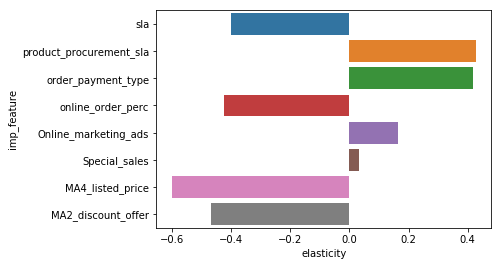

imp_feature   coef  elasticity
0                      sla -0.305      -0.401
1  product_procurement_sla  0.349       0.428
2       order_payment_type  0.789       0.418
3        online_order_perc -0.561      -0.425
4     Online_marketing_ads  0.109       0.163
5            Special_sales  0.109       0.032
6         MA4_listed_price -0.419      -0.602
7       MA2_discount_offer -0.546      -0.467

In [291]:
elasticity(lm1,camera_train_lm)

Text(0, 0.5, 'y_pred')

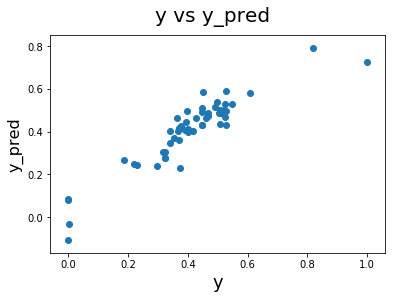

In [292]:
# Plotting y and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y, y_pred)
fig.suptitle('y vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

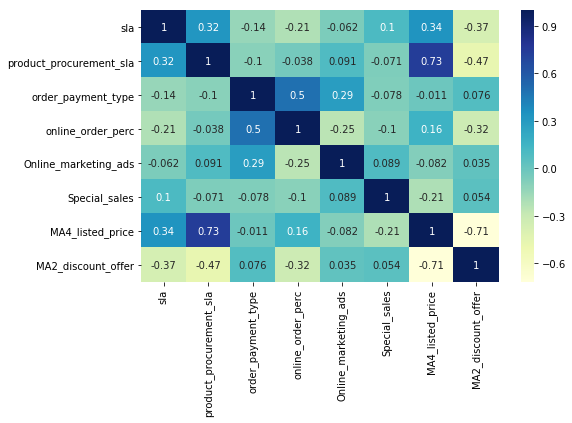

In [293]:
# Figure size
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(camera_train_lm[features].corr(), cmap="YlGnBu", annot=True)
plt.show()

### 2. Multiplicative Model

In [294]:
ca_week.columns

Index(['week', 'gmv', 'listing_price', 'product_mrp', 'discount', 'sla',
       'product_procurement_sla', 'fsn_id', 'order_payment_type',
       'premium_product', 'online_order_perc', 'Date', 'Year', 'Month',
       'TV_ads', 'Sponsorship_ads', 'Content_marketing_ads',
       'Online_marketing_ads', 'NPS', 'Stock_Index', 'Special_sales', 'Payday',
       'heat_deg_days', 'cool_deg_days', 'total_rain_mm', 'total_snow_cm',
       'snow_on_grnd_cm', 'MA4_listed_price', 'MA2_discount_offer',
       'lag_1_listed_price', 'lag_2_listed_price', 'lag_3_listed_price',
       'lag_1_discount', 'lag_2_discount', 'lag_3_discount',
       'lag_1_Stock_Index', 'lag_2_Stock_Index', 'lag_3_Stock_Index',
       'lag_1_Special_sales', 'lag_2_Special_sales', 'lag_3_Special_sales',
       'lag_1_Payday', 'lag_2_Payday', 'lag_3_Payday', 'lag_1_NPS',
       'lag_2_NPS', 'lag_3_NPS'],
      dtype='object')

In [295]:
camera_mm = ca_week[['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA4_listed_price',
       'MA2_discount_offer']]         

camera_mm.head()


gmv  discount   sla  product_procurement_sla  order_payment_type  \
0   11151.000     0.491 2.423                    2.731                  26   
1 1228580.000     0.448 7.253                    2.578                 753   
2 1344416.000     0.458 6.567                    2.577                 823   
3 1346986.000     0.445 6.611                    2.613                 781   
4  913445.000     0.443 6.533                    2.614                 470   

   online_order_perc  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0            100.000   0.054            1.854                  0.000   
1             31.506   0.081            2.780                  0.000   
2             32.023   0.081            2.780                  0.000   
3             30.377   0.081            2.780                  0.000   
4             27.598   0.028            1.139                  0.000   

   Online_marketing_ads    NPS  Stock_Index  Special_sales  Payday  \
0                 0.332 54.600     1177.000          0.000   0.200   
1                 0.498 54.600     1177.000          0.000   0.000   
2                 0.498 54.600     1177.000          0.286   0.143   
3                 0.498 54.600     1177.000          0.000   0.000   
4                 0.192 56.139     1185.286          0.000   0.143   

   heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  \
0          0.100          1.460          0.000          0.000   
1          1.059          2.322          4.155          0.029   
2          0.816          4.722          1.569          0.029   
3          1.632          4.172          1.141          0.029   
4          0.816          5.908          4.341          0.029   

   snow_on_grnd_cm  MA4_listed_price  MA2_discount_offer  
0            0.000             0.000               0.000  
1            0.041             0.078              -0.046  
2            0.041             0.066               0.011  
3            0.041             0.048              -0.014  
4            0.041             0.021              -0.002

In [296]:
### Applying Log 
camera_mm=np.log(camera_mm)

camera_mm = camera_mm.fillna(0)
camera_mm = camera_mm.replace([np.inf, -np.inf], 0)

In [297]:
camera_mm.head()

gmv  discount   sla  product_procurement_sla  order_payment_type  \
0  9.319    -0.712 0.885                    1.005               3.258   
1 14.021    -0.803 1.981                    0.947               6.624   
2 14.111    -0.782 1.882                    0.947               6.713   
3 14.113    -0.810 1.889                    0.961               6.661   
4 13.725    -0.813 1.877                    0.961               6.153   

   online_order_perc  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0              4.605  -2.922            0.617                 -8.364   
1              3.450  -2.516            1.023                 -7.958   
2              3.466  -2.516            1.023                 -7.958   
3              3.414  -2.516            1.023                 -7.958   
4              3.318  -3.568            0.131                 -9.046   

   Online_marketing_ads   NPS  Stock_Index  Special_sales  Payday  \
0                -1.103 4.000        7.071          0.000  -1.609   
1                -0.698 4.000        7.071          0.000   0.000   
2                -0.698 4.000        7.071         -1.253  -1.946   
3                -0.698 4.000        7.071          0.000   0.000   
4                -1.652 4.028        7.078          0.000  -1.946   

   heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  \
0         -2.303          0.378          0.000          0.000   
1          0.057          0.842          1.424         -3.532   
2         -0.203          1.552          0.451         -3.532   
3          0.490          1.428          0.131         -3.532   
4         -0.203          1.776          1.468         -3.532   

   snow_on_grnd_cm  MA4_listed_price  MA2_discount_offer  
0            0.000             0.000               0.000  
1           -3.189            -2.554               0.000  
2           -3.189            -2.716              -4.550  
3           -3.189            -3.045               0.000  
4           -3.189            -3.874               0.000

In [298]:
###  Import the StandardScaler()
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

###  Create a scaling object
# scaler = StandardScaler()
scaler = MinMaxScaler()

###  Create a list of the variables that you need to scale
varlist = ['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA4_listed_price',
       'MA2_discount_offer']      



### Scale these variables using 'fit_transform'
camera_mm[varlist] = scaler.fit_transform(camera_mm[varlist])

In [299]:
camera_mm.head()

gmv  discount   sla  product_procurement_sla  order_payment_type  \
0 0.379     0.536 0.000                    0.725               0.387   
1 0.873     0.459 0.802                    0.683               0.786   
2 0.882     0.477 0.730                    0.683               0.796   
3 0.882     0.454 0.735                    0.693               0.790   
4 0.841     0.450 0.726                    0.693               0.730   

   online_order_perc  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0              1.000   0.444            0.382                  0.358   
1              0.749   0.498            0.471                  0.388   
2              0.753   0.498            0.471                  0.388   
3              0.741   0.498            0.471                  0.388   
4              0.720   0.358            0.277                  0.307   

   Online_marketing_ads   NPS  Stock_Index  Special_sales  Payday  \
0                 0.393 0.687        0.734          1.000   0.173   
1                 0.467 0.687        0.734          1.000   1.000   
2                 0.467 0.687        0.734          0.356   0.000   
3                 0.467 0.687        0.734          1.000   1.000   
4                 0.293 0.780        0.768          1.000   0.000   

   heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  \
0          0.000          0.408          0.303          0.895   
1          0.477          0.604          0.736          0.000   
2          0.424          0.905          0.440          0.000   
3          0.564          0.853          0.343          0.000   
4          0.424          1.000          0.750          0.000   

   snow_on_grnd_cm  MA4_listed_price  MA2_discount_offer  
0            0.677             1.000               1.000  
1            0.000             0.572               1.000  
2            0.000             0.545               0.157  
3            0.000             0.490               1.000  
4            0.000             0.351               1.000

In [300]:
### Split the train dataset into X and y
from sklearn.model_selection import train_test_split

x = camera_mm.drop('gmv',axis=1)
y = camera_mm['gmv']

camera_train_mm = camera_mm

In [301]:
print("X = Independent variable & Y = Target variable")
print(x.shape,y.shape)


X = Independent variable & Y = Target variable
(52, 20) (52,)


In [302]:
### Instantiate
mm = LinearRegression()

### Fit a line
mm.fit(x,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [303]:
### Coefficient values

coef = pd.DataFrame(x.columns)
coef['Coefficient'] = pd.Series(mm.coef_)
coef


0  Coefficient
0                  discount       -0.285
1                       sla       -0.008
2   product_procurement_sla        0.042
3        order_payment_type        1.007
4         online_order_perc       -0.239
5                    TV_ads       -0.100
6           Sponsorship_ads       -0.015
7     Content_marketing_ads        0.131
8      Online_marketing_ads        0.006
9                       NPS       -0.062
10              Stock_Index        0.002
11            Special_sales        0.004
12                   Payday        0.010
13            heat_deg_days        0.001
14            cool_deg_days        0.024
15            total_rain_mm       -0.002
16            total_snow_cm       -0.014
17          snow_on_grnd_cm        0.012
18         MA4_listed_price        0.009
19       MA2_discount_offer        0.000

In [304]:
col = x.columns
col

Index(['discount', 'sla', 'product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads', 'Sponsorship_ads',
       'Content_marketing_ads', 'Online_marketing_ads', 'NPS', 'Stock_Index',
       'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days',
       'total_rain_mm', 'total_snow_cm', 'snow_on_grnd_cm', 'MA4_listed_price',
       'MA2_discount_offer'],
      dtype='object')

#### Model Building - Stepwise selection for feature selection

In [305]:
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [306]:
def stepwise_selection(x, y,
                       initial_list=['discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA4_listed_price',
       'MA2_discount_offer'],
                       threshold_in=0.01,threshold_out = 0.05, verbose=True):
    
    included = list(initial_list)
    while True:
        changed=False
        ###forward step
        excluded = list(set(x.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
                
                
        ###backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included]))).fit()
        ###use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() ###null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included


In [307]:
import statsmodels.api as sm  

final_features = stepwise_selection(x, y)

print("\n","final_selected_features:",final_features)

Drop heat_deg_days                  with p-value 0.992247
Drop MA2_discount_offer             with p-value 0.990171
Drop total_rain_mm                  with p-value 0.942133
Drop Online_marketing_ads           with p-value 0.926171
Drop Stock_Index                    with p-value 0.908856
Drop sla                            with p-value 0.922403
Drop Special_sales                  with p-value 0.822398
Drop snow_on_grnd_cm                with p-value 0.686655
Drop total_snow_cm                  with p-value 0.738303
Drop Sponsorship_ads                with p-value 0.57168
Drop MA4_listed_price               with p-value 0.520013
Drop product_procurement_sla        with p-value 0.41046
Drop Payday                         with p-value 0.24236
Drop cool_deg_days                  with p-value 0.245149
Drop NPS                            with p-value 0.254469

 final_selected_features: ['discount', 'order_payment_type', 'online_order_perc', 'TV_ads', 'Content_marketing_ads']


In [308]:
### Import statsmodels
import statsmodels.api as sm  

### Subsetting training data for 15 selected columns
x_rfe1 = x[final_features]

x_rfe1 = sm.add_constant(x_rfe1)


### Fitting the model with selected variables
mm1 = sm.OLS(y, x_rfe1).fit() 

print(mm1.params)

const                    0.407
discount                -0.340
order_payment_type       1.012
online_order_perc       -0.254
TV_ads                  -0.123
Content_marketing_ads    0.199
dtype: float64


In [309]:
print(mm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     638.9
Date:                Wed, 08 Jan 2020   Prob (F-statistic):           2.78e-41
Time:                        09:53:26   Log-Likelihood:                 119.55
No. Observations:                  52   AIC:                            -227.1
Df Residuals:                      46   BIC:                            -215.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.40

In [310]:
x_rfe1.drop('TV_ads',1,inplace=True)

x_rfe1 = sm.add_constant(x_rfe1)


### Fitting the model with selected variables
mm1 = sm.OLS(y, x_rfe1).fit() 

print(mm1.params)

const                    0.419
discount                -0.341
order_payment_type       0.967
online_order_perc       -0.270
Content_marketing_ads    0.117
dtype: float64


In [311]:
print(mm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     705.2
Date:                Wed, 08 Jan 2020   Prob (F-statistic):           2.66e-41
Time:                        09:53:26   Log-Likelihood:                 115.82
No. Observations:                  52   AIC:                            -221.6
Df Residuals:                      47   BIC:                            -211.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.41

In [312]:
### Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                  const 85.670
2     order_payment_type  2.970
4  Content_marketing_ads  2.630
3      online_order_perc  1.650
1               discount  1.400

In [313]:
features = list(x_rfe1.columns)
features.remove('const')
features

['discount',
 'order_payment_type',
 'online_order_perc',
 'Content_marketing_ads']

In [314]:
### Model Evaluation on testing data
x_2 = x[features]


### Predicition with selected features on the test data
y_pred = mm1.predict(sm.add_constant(x_2))


In [315]:
### Mean square error (MSE)
mse = np.mean((y_pred - y)**2)
mse

0.0006807224912887573

In [316]:
### Coefficient values

coef = pd.DataFrame(x_rfe1.columns)
coef['Coefficient'] = pd.Series(mm.coef_)
coef


0  Coefficient
0                  const       -0.285
1               discount       -0.008
2     order_payment_type        0.042
3      online_order_perc        1.007
4  Content_marketing_ads       -0.239

In [317]:
### Mean Square Error 
###  Using K-Fold Cross validation evaluating on selected dataset

# lm = LinearRegression()
fold = KFold(10,shuffle = True, random_state = 100)

cv_scores = -cross_val_score(mm,x[features],y,cv=fold,scoring='neg_mean_squared_error')

print("Neg. of MSE:",cv_scores,"\n")
print("Mean of 5 KFold CV - MSE:",cv_scores.mean())

Neg. of MSE: [0.02968043 0.00160479 0.00067579 0.00324607 0.00035557 0.00081764
 0.00017848 0.00077301 0.00037081 0.00065533] 

Mean of 5 KFold CV - MSE: 0.0038357917945654775


In [318]:
def elasticity(model,x):
    
    features_df = pd.DataFrame(model.params)
    features_df = features_df.rename(columns={0:'coef'})
    
    features_df['imp_feature'] = model.params.index
    features_df = features_df[features_df.imp_feature != 'const'][['imp_feature','coef']]
    features_df.index = range(len(features_df))
#     features

    elasticity_list = list()
    
    for i in range(len(features_df)):
        elasticity_list.append(((features_df.coef[i] * np.mean(x[features_df.imp_feature[i]])) / np.mean(x['gmv'])))

    features_df['elasticity'] = np.round(elasticity_list,3)
    
    sns.barplot(x='elasticity',y='imp_feature',data=features_df)
    plt.show()
    
    return features_df
    

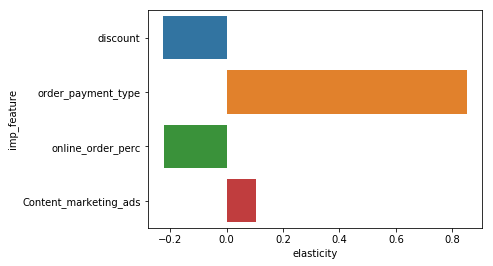

imp_feature   coef  elasticity
0               discount -0.341      -0.226
1     order_payment_type  0.967       0.853
2      online_order_perc -0.270      -0.221
3  Content_marketing_ads  0.117       0.103

In [319]:
elasticity(mm1,camera_train_mm)

Text(0, 0.5, 'y_pred')

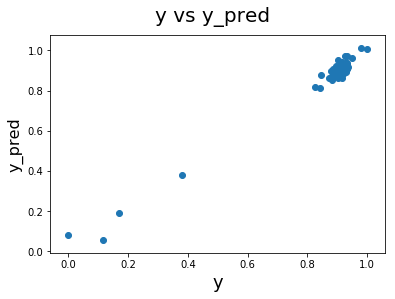

In [320]:
# Plotting y and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y, y_pred)
fig.suptitle('y vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

### 3. Kyock Model

In [321]:
ca_week.columns

Index(['week', 'gmv', 'listing_price', 'product_mrp', 'discount', 'sla',
       'product_procurement_sla', 'fsn_id', 'order_payment_type',
       'premium_product', 'online_order_perc', 'Date', 'Year', 'Month',
       'TV_ads', 'Sponsorship_ads', 'Content_marketing_ads',
       'Online_marketing_ads', 'NPS', 'Stock_Index', 'Special_sales', 'Payday',
       'heat_deg_days', 'cool_deg_days', 'total_rain_mm', 'total_snow_cm',
       'snow_on_grnd_cm', 'MA4_listed_price', 'MA2_discount_offer',
       'lag_1_listed_price', 'lag_2_listed_price', 'lag_3_listed_price',
       'lag_1_discount', 'lag_2_discount', 'lag_3_discount',
       'lag_1_Stock_Index', 'lag_2_Stock_Index', 'lag_3_Stock_Index',
       'lag_1_Special_sales', 'lag_2_Special_sales', 'lag_3_Special_sales',
       'lag_1_Payday', 'lag_2_Payday', 'lag_3_Payday', 'lag_1_NPS',
       'lag_2_NPS', 'lag_3_NPS'],
      dtype='object')

In [322]:
camera_km = ca_week[['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA4_listed_price',
       'MA2_discount_offer']]           


camera_km.head()


gmv  discount   sla  product_procurement_sla  order_payment_type  \
0   11151.000     0.491 2.423                    2.731                  26   
1 1228580.000     0.448 7.253                    2.578                 753   
2 1344416.000     0.458 6.567                    2.577                 823   
3 1346986.000     0.445 6.611                    2.613                 781   
4  913445.000     0.443 6.533                    2.614                 470   

   online_order_perc  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0            100.000   0.054            1.854                  0.000   
1             31.506   0.081            2.780                  0.000   
2             32.023   0.081            2.780                  0.000   
3             30.377   0.081            2.780                  0.000   
4             27.598   0.028            1.139                  0.000   

   Online_marketing_ads    NPS  Stock_Index  Special_sales  Payday  \
0                 0.332 54.600     1177.000          0.000   0.200   
1                 0.498 54.600     1177.000          0.000   0.000   
2                 0.498 54.600     1177.000          0.286   0.143   
3                 0.498 54.600     1177.000          0.000   0.000   
4                 0.192 56.139     1185.286          0.000   0.143   

   heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  \
0          0.100          1.460          0.000          0.000   
1          1.059          2.322          4.155          0.029   
2          0.816          4.722          1.569          0.029   
3          1.632          4.172          1.141          0.029   
4          0.816          5.908          4.341          0.029   

   snow_on_grnd_cm  MA4_listed_price  MA2_discount_offer  
0            0.000             0.000               0.000  
1            0.041             0.078              -0.046  
2            0.041             0.066               0.011  
3            0.041             0.048              -0.014  
4            0.041             0.021              -0.002

In [323]:
camera_km['lag_1_gmv'] = camera_km['gmv'].shift(-1)

In [324]:
### Checking NaN

camera_km.isnull().sum()

gmv                        0
discount                   0
sla                        0
product_procurement_sla    0
order_payment_type         0
online_order_perc          0
TV_ads                     1
Sponsorship_ads            1
Content_marketing_ads      1
Online_marketing_ads       1
NPS                        0
Stock_Index                0
Special_sales              0
Payday                     0
heat_deg_days              0
cool_deg_days              0
total_rain_mm              0
total_snow_cm              0
snow_on_grnd_cm            0
MA4_listed_price           0
MA2_discount_offer         0
lag_1_gmv                  1
dtype: int64

In [325]:
camera_km = camera_km.fillna(0)

In [326]:
camera_km.head()

gmv  discount   sla  product_procurement_sla  order_payment_type  \
0   11151.000     0.491 2.423                    2.731                  26   
1 1228580.000     0.448 7.253                    2.578                 753   
2 1344416.000     0.458 6.567                    2.577                 823   
3 1346986.000     0.445 6.611                    2.613                 781   
4  913445.000     0.443 6.533                    2.614                 470   

   online_order_perc  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0            100.000   0.054            1.854                  0.000   
1             31.506   0.081            2.780                  0.000   
2             32.023   0.081            2.780                  0.000   
3             30.377   0.081            2.780                  0.000   
4             27.598   0.028            1.139                  0.000   

   Online_marketing_ads    NPS  Stock_Index  Special_sales  Payday  \
0                 0.332 54.600     1177.000          0.000   0.200   
1                 0.498 54.600     1177.000          0.000   0.000   
2                 0.498 54.600     1177.000          0.286   0.143   
3                 0.498 54.600     1177.000          0.000   0.000   
4                 0.192 56.139     1185.286          0.000   0.143   

   heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  \
0          0.100          1.460          0.000          0.000   
1          1.059          2.322          4.155          0.029   
2          0.816          4.722          1.569          0.029   
3          1.632          4.172          1.141          0.029   
4          0.816          5.908          4.341          0.029   

   snow_on_grnd_cm  MA4_listed_price  MA2_discount_offer   lag_1_gmv  
0            0.000             0.000               0.000 1228580.000  
1            0.041             0.078              -0.046 1344416.000  
2            0.041             0.066               0.011 1346986.000  
3            0.041             0.048              -0.014  913445.000  
4            0.041             0.021              -0.002    1498.000

In [327]:
###  Import the StandardScaler()
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

### Create a scaling object
# scaler = StandardScaler()
scaler = MinMaxScaler()

### Create a list of the variables that you need to scale
varlist = ['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA4_listed_price',
       'MA2_discount_offer','lag_1_gmv']

### Scale these variables using 'fit_transform'
camera_km[varlist] = scaler.fit_transform(camera_km[varlist])

In [328]:
camera_km.head()

gmv  discount   sla  product_procurement_sla  order_payment_type  \
0 0.003     0.391 0.000                    0.577               0.006   
1 0.296     0.319 0.683                    0.526               0.165   
2 0.324     0.335 0.586                    0.526               0.180   
3 0.325     0.314 0.592                    0.538               0.171   
4 0.220     0.311 0.581                    0.538               0.103   

   online_order_perc  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0              1.000   0.015            0.058                  0.000   
1              0.315   0.023            0.088                  0.000   
2              0.320   0.023            0.088                  0.000   
3              0.304   0.023            0.088                  0.000   
4              0.276   0.008            0.036                  0.000   

   Online_marketing_ads   NPS  Stock_Index  Special_sales  Payday  \
0                 0.036 0.654        0.714          0.000   1.000   
1                 0.054 0.654        0.714          0.000   0.000   
2                 0.054 0.654        0.714          0.286   0.714   
3                 0.054 0.654        0.714          0.000   0.000   
4                 0.021 0.753        0.750          0.000   0.714   

   heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  \
0          0.000          0.247          0.000          0.000   
1          0.069          0.393          0.420          0.019   
2          0.051          0.799          0.159          0.019   
3          0.109          0.706          0.115          0.019   
4          0.051          1.000          0.439          0.019   

   snow_on_grnd_cm  MA4_listed_price  MA2_discount_offer  lag_1_gmv  
0            0.000             0.583               0.347      0.296  
1            0.009             0.689               0.292      0.324  
2            0.009             0.674               0.360      0.325  
3            0.009             0.648               0.330      0.220  
4            0.009             0.611               0.345      0.000

In [329]:
### Split the train dataset into X and y
from sklearn.model_selection import train_test_split
x = camera_km.drop('gmv',axis=1)
y = camera_km['gmv']

camera_train_km = camera_km

In [330]:
print("X = Independent variable & Y = Target variable")
print(x.shape,y.shape)

X = Independent variable & Y = Target variable
(52, 21) (52,)


In [331]:
###  Instantiate
km = LinearRegression()

###  Fit a line
km.fit(x,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [332]:
###  Coefficient values

coef = pd.DataFrame(x.columns)
coef['Coefficient'] = pd.Series(km.coef_)
coef


0  Coefficient
0                  discount       -0.061
1                       sla       -0.289
2   product_procurement_sla        0.295
3        order_payment_type        0.833
4         online_order_perc       -0.550
5                    TV_ads       -0.033
6           Sponsorship_ads        0.009
7     Content_marketing_ads        0.021
8      Online_marketing_ads        0.160
9                       NPS        0.000
10              Stock_Index       -0.002
11            Special_sales        0.117
12                   Payday        0.009
13            heat_deg_days       -0.152
14            cool_deg_days       -0.041
15            total_rain_mm        0.027
16            total_snow_cm        0.057
17          snow_on_grnd_cm        0.067
18         MA4_listed_price       -0.435
19       MA2_discount_offer       -0.534
20                lag_1_gmv       -0.031

In [333]:
col = x.columns
col

Index(['discount', 'sla', 'product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads', 'Sponsorship_ads',
       'Content_marketing_ads', 'Online_marketing_ads', 'NPS', 'Stock_Index',
       'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days',
       'total_rain_mm', 'total_snow_cm', 'snow_on_grnd_cm', 'MA4_listed_price',
       'MA2_discount_offer', 'lag_1_gmv'],
      dtype='object')

#### Model Building - Stepwise selection for feature selection

In [334]:
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [335]:
def stepwise_selection(x, y,
                       initial_list=['discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA4_listed_price',
       'MA2_discount_offer', 'lag_1_gmv'],
                       threshold_in=0.01,threshold_out = 0.05, verbose=True):
    
    included = list(initial_list)
    while True:
        changed=False
        ### forward step
        excluded = list(set(x.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
                
                
        ###backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included]))).fit()
        ###use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() ###null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included


In [336]:
import statsmodels.api as sm  

final_features = stepwise_selection(x, y)

print("\n","final_selected_features:",final_features)

Drop NPS                            with p-value 0.999869
Drop Stock_Index                    with p-value 0.966896
Drop Sponsorship_ads                with p-value 0.921802
Drop discount                       with p-value 0.850134
Drop lag_1_gmv                      with p-value 0.783002
Drop Payday                         with p-value 0.751749
Drop cool_deg_days                  with p-value 0.766231
Drop TV_ads                         with p-value 0.747181
Drop Content_marketing_ads          with p-value 0.746319
Drop total_rain_mm                  with p-value 0.753691
Drop snow_on_grnd_cm                with p-value 0.420827
Drop total_snow_cm                  with p-value 0.377999
Drop heat_deg_days                  with p-value 0.120307

 final_selected_features: ['sla', 'product_procurement_sla', 'order_payment_type', 'online_order_perc', 'Online_marketing_ads', 'Special_sales', 'MA4_listed_price', 'MA2_discount_offer']


In [337]:
### Import statsmodels
import statsmodels.api as sm  

### Subsetting training data for 15 selected columns
x_rfe1 = x[final_features]

x_rfe1 = sm.add_constant(x_rfe1)

### Fitting the model with selected variables
km1 = sm.OLS(y, x_rfe1).fit() 

print(km1.params)

const                      0.752
sla                       -0.305
product_procurement_sla    0.349
order_payment_type         0.789
online_order_perc         -0.561
Online_marketing_ads       0.109
Special_sales              0.109
MA4_listed_price          -0.419
MA2_discount_offer        -0.546
dtype: float64


In [338]:
print(km1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     32.42
Date:                Wed, 08 Jan 2020   Prob (F-statistic):           8.58e-16
Time:                        09:53:28   Log-Likelihood:                 67.826
No. Observations:                  52   AIC:                            -117.7
Df Residuals:                      43   BIC:                            -100.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [339]:
### Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                    const 225.110
7         MA4_listed_price   4.320
8       MA2_discount_offer   3.300
4        online_order_perc   2.820
2  product_procurement_sla   2.540
3       order_payment_type   2.320
5     Online_marketing_ads   1.790
1                      sla   1.520
6            Special_sales   1.120

In [340]:
features = list(x_rfe1.columns)
features.remove('const')
features

['sla',
 'product_procurement_sla',
 'order_payment_type',
 'online_order_perc',
 'Online_marketing_ads',
 'Special_sales',
 'MA4_listed_price',
 'MA2_discount_offer']

In [341]:
### Model Evaluation on testing data
x_2 = x[features]


### Predicition with selected features on the test data
y_pred = km1.predict(sm.add_constant(x_2))


In [342]:
### Mean square error (MSE)
mse = np.mean((y_pred - y)**2)
mse

0.0043111512825662395

In [343]:
### Coefficient values

coef = pd.DataFrame(x_rfe1.columns)
coef['Coefficient'] = pd.Series(km.coef_)
coef


0  Coefficient
0                    const       -0.061
1                      sla       -0.289
2  product_procurement_sla        0.295
3       order_payment_type        0.833
4        online_order_perc       -0.550
5     Online_marketing_ads       -0.033
6            Special_sales        0.009
7         MA4_listed_price        0.021
8       MA2_discount_offer        0.160

In [344]:
### Using K-Fold Cross validation evaluating on whole dataset

# lm = LinearRegression()
fold = KFold(10,shuffle = True, random_state = 100)

cv_scores = -cross_val_score(km,x[features],y,cv=fold,scoring='neg_mean_squared_error')

print("Neg. of MSE:",cv_scores,"\n")
print("Mean of 5 KFold CV - MSE:",cv_scores.mean())

Neg. of MSE: [0.04567523 0.01406873 0.00715297 0.11020637 0.00279239 0.00149982
 0.01494124 0.02336948 0.00135895 0.00319544] 

Mean of 5 KFold CV - MSE: 0.022426063151286518


In [345]:
def elasticity(model,x):
    
    features_df = pd.DataFrame(model.params)
    features_df = features_df.rename(columns={0:'coef'})
    
    features_df['imp_feature'] = model.params.index
    features_df = features_df[features_df.imp_feature != 'const'][['imp_feature','coef']]
    features_df.index = range(len(features_df))
#      features

    elasticity_list = list()
    
    for i in range(len(features_df)):
        elasticity_list.append(((features_df.coef[i] * np.mean(x[features_df.imp_feature[i]])) / np.mean(x['gmv'])))

    features_df['elasticity'] = np.round(elasticity_list,3)
    
    sns.barplot(x='elasticity',y='imp_feature',data=features_df)
    plt.show()
    
    return features_df
    

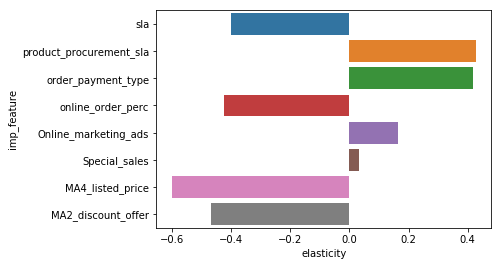

imp_feature   coef  elasticity
0                      sla -0.305      -0.401
1  product_procurement_sla  0.349       0.428
2       order_payment_type  0.789       0.418
3        online_order_perc -0.561      -0.425
4     Online_marketing_ads  0.109       0.163
5            Special_sales  0.109       0.032
6         MA4_listed_price -0.419      -0.602
7       MA2_discount_offer -0.546      -0.467

In [346]:
elasticity(km1,camera_train_km)

Text(0, 0.5, 'y_pred')

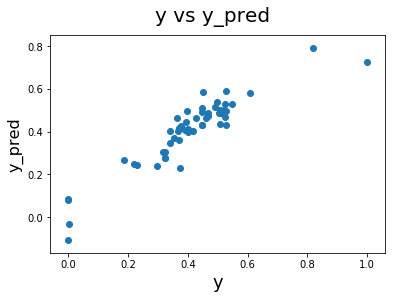

In [347]:
# Plotting y and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y, y_pred)
fig.suptitle('y vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

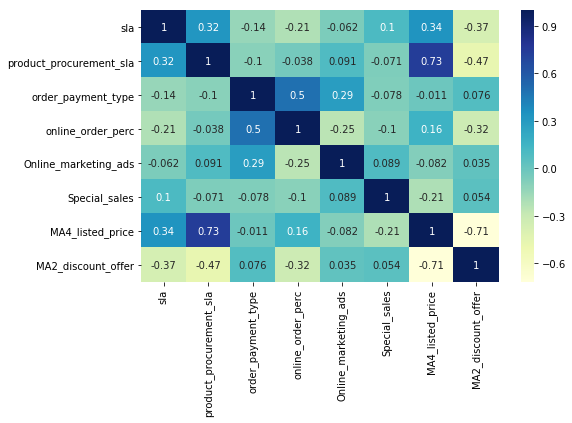

In [348]:
# Figure size
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(camera_train_km[features].corr(), cmap="YlGnBu", annot=True)
plt.show()

### 4. Distributed Lag Model

In [349]:
ca_week.columns

Index(['week', 'gmv', 'listing_price', 'product_mrp', 'discount', 'sla',
       'product_procurement_sla', 'fsn_id', 'order_payment_type',
       'premium_product', 'online_order_perc', 'Date', 'Year', 'Month',
       'TV_ads', 'Sponsorship_ads', 'Content_marketing_ads',
       'Online_marketing_ads', 'NPS', 'Stock_Index', 'Special_sales', 'Payday',
       'heat_deg_days', 'cool_deg_days', 'total_rain_mm', 'total_snow_cm',
       'snow_on_grnd_cm', 'MA4_listed_price', 'MA2_discount_offer',
       'lag_1_listed_price', 'lag_2_listed_price', 'lag_3_listed_price',
       'lag_1_discount', 'lag_2_discount', 'lag_3_discount',
       'lag_1_Stock_Index', 'lag_2_Stock_Index', 'lag_3_Stock_Index',
       'lag_1_Special_sales', 'lag_2_Special_sales', 'lag_3_Special_sales',
       'lag_1_Payday', 'lag_2_Payday', 'lag_3_Payday', 'lag_1_NPS',
       'lag_2_NPS', 'lag_3_NPS'],
      dtype='object')

In [350]:
camera_dlm = ca_week[['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday','heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm',  'MA4_listed_price',
       'MA2_discount_offer', 'lag_1_listed_price','lag_1_discount',
       'lag_2_discount','lag_3_discount','lag_2_NPS','lag_3_NPS','lag_1_Stock_Index',
       'lag_2_Stock_Index','lag_3_Stock_Index','lag_1_Special_sales','lag_2_Special_sales','lag_3_Special_sales',
       'lag_1_Payday','lag_2_Payday','lag_3_Payday']]           


camera_dlm.head()


gmv  discount   sla  product_procurement_sla  order_payment_type  \
0   11151.000     0.491 2.423                    2.731                  26   
1 1228580.000     0.448 7.253                    2.578                 753   
2 1344416.000     0.458 6.567                    2.577                 823   
3 1346986.000     0.445 6.611                    2.613                 781   
4  913445.000     0.443 6.533                    2.614                 470   

   online_order_perc  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0            100.000   0.054            1.854                  0.000   
1             31.506   0.081            2.780                  0.000   
2             32.023   0.081            2.780                  0.000   
3             30.377   0.081            2.780                  0.000   
4             27.598   0.028            1.139                  0.000   

   Online_marketing_ads    NPS  Stock_Index  Special_sales  Payday  \
0                 0.332 54.600     1177.000          0.000   0.200   
1                 0.498 54.600     1177.000          0.000   0.000   
2                 0.498 54.600     1177.000          0.286   0.143   
3                 0.498 54.600     1177.000          0.000   0.000   
4                 0.192 56.139     1185.286          0.000   0.143   

   heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  \
0          0.100          1.460          0.000          0.000   
1          1.059          2.322          4.155          0.029   
2          0.816          4.722          1.569          0.029   
3          1.632          4.172          1.141          0.029   
4          0.816          5.908          4.341          0.029   

   snow_on_grnd_cm  MA4_listed_price  MA2_discount_offer  lag_1_listed_price  \
0            0.000             0.000               0.000             501.230   
1            0.041             0.078              -0.046             512.763   
2            0.041             0.066               0.011             511.973   
3            0.041             0.048              -0.014             522.839   
4            0.041             0.021              -0.002             749.000   

   lag_1_discount  lag_2_discount  lag_3_discount  lag_2_NPS  lag_3_NPS  \
0           0.448           0.458           0.445     54.600     54.600   
1           0.458           0.445           0.443     54.600     56.139   
2           0.445           0.443           0.260     56.139     59.987   
3           0.443           0.260           0.850     59.987     59.987   
4           0.260           0.850           0.475     59.987     59.987   

   lag_1_Stock_Index  lag_2_Stock_Index  lag_3_Stock_Index  \
0           1177.000           1177.000           1177.000   
1           1177.000           1177.000           1185.286   
2           1177.000           1185.286           1206.000   
3           1185.286           1206.000           1206.000   
4           1206.000           1206.000           1206.000   

   lag_1_Special_sales  lag_2_Special_sales  lag_3_Special_sales  \
0                0.000                0.286                0.000   
1                0.286                0.000                0.000   
2                0.000                0.000                0.000   
3                0.000                0.000                0.286   
4                0.000                0.286                0.429   

   lag_1_Payday  lag_2_Payday  lag_3_Payday  
0         0.000         0.143         0.000  
1         0.143         0.000         0.143  
2         0.000         0.143         0.000  
3         0.143         0.000         0.143  
4         0.000         0.143         0.000

In [351]:
camera_dlm['lag_1_gmv'] = camera_dlm['gmv'].shift(-1)
camera_dlm['lag_2_gmv'] = camera_dlm['gmv'].shift(-2)
camera_dlm['lag_3_gmv'] = camera_dlm['gmv'].shift(-3)


In [352]:
### Checking NaN

camera_dlm.isnull().sum()

gmv                        0
discount                   0
sla                        0
product_procurement_sla    0
order_payment_type         0
online_order_perc          0
TV_ads                     1
Sponsorship_ads            1
Content_marketing_ads      1
Online_marketing_ads       1
NPS                        0
Stock_Index                0
Special_sales              0
Payday                     0
heat_deg_days              0
cool_deg_days              0
total_rain_mm              0
total_snow_cm              0
snow_on_grnd_cm            0
MA4_listed_price           0
MA2_discount_offer         0
lag_1_listed_price         0
lag_1_discount             0
lag_2_discount             0
lag_3_discount             0
lag_2_NPS                  0
lag_3_NPS                  0
lag_1_Stock_Index          0
lag_2_Stock_Index          0
lag_3_Stock_Index          0
lag_1_Special_sales        0
lag_2_Special_sales        0
lag_3_Special_sales        0
lag_1_Payday               0
lag_2_Payday  

In [353]:
camera_dlm = camera_dlm.fillna(0)

In [354]:
camera_dlm.head()

gmv  discount   sla  product_procurement_sla  order_payment_type  \
0   11151.000     0.491 2.423                    2.731                  26   
1 1228580.000     0.448 7.253                    2.578                 753   
2 1344416.000     0.458 6.567                    2.577                 823   
3 1346986.000     0.445 6.611                    2.613                 781   
4  913445.000     0.443 6.533                    2.614                 470   

   online_order_perc  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0            100.000   0.054            1.854                  0.000   
1             31.506   0.081            2.780                  0.000   
2             32.023   0.081            2.780                  0.000   
3             30.377   0.081            2.780                  0.000   
4             27.598   0.028            1.139                  0.000   

   Online_marketing_ads    NPS  Stock_Index  Special_sales  Payday  \
0                 0.332 54.600     1177.000          0.000   0.200   
1                 0.498 54.600     1177.000          0.000   0.000   
2                 0.498 54.600     1177.000          0.286   0.143   
3                 0.498 54.600     1177.000          0.000   0.000   
4                 0.192 56.139     1185.286          0.000   0.143   

   heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  \
0          0.100          1.460          0.000          0.000   
1          1.059          2.322          4.155          0.029   
2          0.816          4.722          1.569          0.029   
3          1.632          4.172          1.141          0.029   
4          0.816          5.908          4.341          0.029   

   snow_on_grnd_cm  MA4_listed_price  MA2_discount_offer  lag_1_listed_price  \
0            0.000             0.000               0.000             501.230   
1            0.041             0.078              -0.046             512.763   
2            0.041             0.066               0.011             511.973   
3            0.041             0.048              -0.014             522.839   
4            0.041             0.021              -0.002             749.000   

   lag_1_discount  lag_2_discount  lag_3_discount  lag_2_NPS  lag_3_NPS  \
0           0.448           0.458           0.445     54.600     54.600   
1           0.458           0.445           0.443     54.600     56.139   
2           0.445           0.443           0.260     56.139     59.987   
3           0.443           0.260           0.850     59.987     59.987   
4           0.260           0.850           0.475     59.987     59.987   

   lag_1_Stock_Index  lag_2_Stock_Index  lag_3_Stock_Index  \
0           1177.000           1177.000           1177.000   
1           1177.000           1177.000           1185.286   
2           1177.000           1185.286           1206.000   
3           1185.286           1206.000           1206.000   
4           1206.000           1206.000           1206.000   

   lag_1_Special_sales  lag_2_Special_sales  lag_3_Special_sales  \
0                0.000                0.286                0.000   
1                0.286                0.000                0.000   
2                0.000                0.000                0.000   
3                0.000                0.000                0.286   
4                0.000                0.286                0.429   

   lag_1_Payday  lag_2_Payday  lag_3_Payday   lag_1_gmv   lag_2_gmv  \
0         0.000         0.143         0.000 1228580.000 1344416.000   
1         0.143         0.000         0.143 1344416.000 1346986.000   
2         0.000         0.143         0.000 1346986.000  913445.000   
3         0.143         0.000         0.143  913445.000    1498.000   
4         0.000         0.143         0.000    1498.000     299.000   

    lag_3_gmv  
0 1346986.000  
1  913445.000  
2    1498.000  
3     299.000  
4     905.000

In [355]:
camera_dlm.columns

Index(['gmv', 'discount', 'sla', 'product_procurement_sla',
       'order_payment_type', 'online_order_perc', 'TV_ads', 'Sponsorship_ads',
       'Content_marketing_ads', 'Online_marketing_ads', 'NPS', 'Stock_Index',
       'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days',
       'total_rain_mm', 'total_snow_cm', 'snow_on_grnd_cm', 'MA4_listed_price',
       'MA2_discount_offer', 'lag_1_listed_price', 'lag_1_discount',
       'lag_2_discount', 'lag_3_discount', 'lag_2_NPS', 'lag_3_NPS',
       'lag_1_Stock_Index', 'lag_2_Stock_Index', 'lag_3_Stock_Index',
       'lag_1_Special_sales', 'lag_2_Special_sales', 'lag_3_Special_sales',
       'lag_1_Payday', 'lag_2_Payday', 'lag_3_Payday', 'lag_1_gmv',
       'lag_2_gmv', 'lag_3_gmv'],
      dtype='object')

In [356]:
###  Import the StandardScaler()
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

###  Create a scaling object
# scaler = StandardScaler()
scaler = MinMaxScaler()


###  Create a list of the variables that you need to scale
varlist = ['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday','heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm',  'MA4_listed_price',
       'MA2_discount_offer', 'lag_1_listed_price','lag_1_discount',
       'lag_2_discount','lag_3_discount','lag_2_NPS','lag_3_NPS','lag_1_Stock_Index',
       'lag_2_Stock_Index','lag_3_Stock_Index','lag_1_Special_sales','lag_2_Special_sales','lag_3_Special_sales',
       'lag_1_Payday','lag_2_Payday','lag_3_Payday']


###  Scale these variables using 'fit_transform'
camera_dlm[varlist] = scaler.fit_transform(camera_dlm[varlist])

In [357]:
camera_dlm.head()

gmv  discount   sla  product_procurement_sla  order_payment_type  \
0 0.003     0.391 0.000                    0.577               0.006   
1 0.296     0.319 0.683                    0.526               0.165   
2 0.324     0.335 0.586                    0.526               0.180   
3 0.325     0.314 0.592                    0.538               0.171   
4 0.220     0.311 0.581                    0.538               0.103   

   online_order_perc  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0              1.000   0.015            0.058                  0.000   
1              0.315   0.023            0.088                  0.000   
2              0.320   0.023            0.088                  0.000   
3              0.304   0.023            0.088                  0.000   
4              0.276   0.008            0.036                  0.000   

   Online_marketing_ads   NPS  Stock_Index  Special_sales  Payday  \
0                 0.036 0.654        0.714          0.000   1.000   
1                 0.054 0.654        0.714          0.000   0.000   
2                 0.054 0.654        0.714          0.286   0.714   
3                 0.054 0.654        0.714          0.000   0.000   
4                 0.021 0.753        0.750          0.000   0.714   

   heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  \
0          0.000          0.247          0.000          0.000   
1          0.069          0.393          0.420          0.019   
2          0.051          0.799          0.159          0.019   
3          0.109          0.706          0.115          0.019   
4          0.051          1.000          0.439          0.019   

   snow_on_grnd_cm  MA4_listed_price  MA2_discount_offer  lag_1_listed_price  \
0            0.000             0.583               0.347               0.669   
1            0.009             0.689               0.292               0.685   
2            0.009             0.674               0.360               0.684   
3            0.009             0.648               0.330               0.698   
4            0.009             0.611               0.345               1.000   

   lag_1_discount  lag_2_discount  lag_3_discount  lag_2_NPS  lag_3_NPS  \
0           0.527           0.538           0.524      0.910      0.910   
1           0.538           0.524           0.522      0.910      0.936   
2           0.524           0.522           0.306      0.936      1.000   
3           0.522           0.306           1.000      1.000      1.000   
4           0.306           1.000           0.559      1.000      1.000   

   lag_1_Stock_Index  lag_2_Stock_Index  lag_3_Stock_Index  \
0              0.948              0.948              0.948   
1              0.948              0.948              0.954   
2              0.948              0.954              0.971   
3              0.954              0.971              0.971   
4              0.971              0.971              0.971   

   lag_1_Special_sales  lag_2_Special_sales  lag_3_Special_sales  \
0                0.000                0.286                0.000   
1                0.286                0.000                0.000   
2                0.000                0.000                0.000   
3                0.000                0.000                0.286   
4                0.000                0.286                0.429   

   lag_1_Payday  lag_2_Payday  lag_3_Payday   lag_1_gmv   lag_2_gmv  \
0         0.000         1.000         0.000 1228580.000 1344416.000   
1         1.000         0.000         1.000 1344416.000 1346986.000   
2         0.000         1.000         0.000 1346986.000  913445.000   
3         1.000         0.000         1.000  913445.000    1498.000   
4         0.000         1.000         0.000    1498.000     299.000   

    lag_3_gmv  
0 1346986.000  
1  913445.000  
2    1498.000  
3     299.000  
4     905.000

In [358]:
###  Split the train dataset into X and y
from sklearn.model_selection import train_test_split
x = camera_dlm.drop('gmv',axis=1)
y = camera_dlm['gmv']

camera_train_dlm = camera_dlm

In [359]:
print("X = Independent variable & Y = Target variable")
print(x.shape,y.shape)

X = Independent variable & Y = Target variable
(52, 38) (52,)


In [360]:
###  Instantiate
dlm = LinearRegression()

###  Fit a line
dlm.fit(x,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [361]:
###  Coefficient values

coef = pd.DataFrame(x.columns)
coef['Coefficient'] = pd.Series(dlm.coef_)
coef


0  Coefficient
0                  discount        2.124
1                       sla        0.850
2   product_procurement_sla        1.517
3        order_payment_type        0.417
4         online_order_perc       -0.109
5                    TV_ads       -0.102
6           Sponsorship_ads       -0.166
7     Content_marketing_ads       -0.245
8      Online_marketing_ads        1.173
9                       NPS        0.033
10              Stock_Index       -0.235
11            Special_sales       -0.074
12                   Payday        0.248
13            heat_deg_days       -0.663
14            cool_deg_days       -0.479
15            total_rain_mm        0.054
16            total_snow_cm       -0.095
17          snow_on_grnd_cm        0.573
18         MA4_listed_price       -0.651
19       MA2_discount_offer       -1.328
20       lag_1_listed_price       -0.573
21           lag_1_discount       -1.510
22           lag_2_discount       -0.297
23           lag_3_discount       -0.141
24                lag_2_NPS       -1.726
25                lag_3_NPS        2.210
26        lag_1_Stock_Index        1.128
27        lag_2_Stock_Index        1.439
28        lag_3_Stock_Index       -2.017
29      lag_1_Special_sales       -0.260
30      lag_2_Special_sales       -0.069
31      lag_3_Special_sales       -0.325
32             lag_1_Payday        0.518
33             lag_2_Payday        0.411
34             lag_3_Payday        0.056
35                lag_1_gmv       -0.000
36                lag_2_gmv       -0.000
37                lag_3_gmv       -0.000

In [362]:
col = x.columns
col

Index(['discount', 'sla', 'product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads', 'Sponsorship_ads',
       'Content_marketing_ads', 'Online_marketing_ads', 'NPS', 'Stock_Index',
       'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days',
       'total_rain_mm', 'total_snow_cm', 'snow_on_grnd_cm', 'MA4_listed_price',
       'MA2_discount_offer', 'lag_1_listed_price', 'lag_1_discount',
       'lag_2_discount', 'lag_3_discount', 'lag_2_NPS', 'lag_3_NPS',
       'lag_1_Stock_Index', 'lag_2_Stock_Index', 'lag_3_Stock_Index',
       'lag_1_Special_sales', 'lag_2_Special_sales', 'lag_3_Special_sales',
       'lag_1_Payday', 'lag_2_Payday', 'lag_3_Payday', 'lag_1_gmv',
       'lag_2_gmv', 'lag_3_gmv'],
      dtype='object')

#### Model Building - Stepwise selection for feature selection

In [363]:
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [364]:
def stepwise_selection(x, y,
                       initial_list=['discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday','heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm',  'MA4_listed_price',
       'MA2_discount_offer', 'lag_1_listed_price','lag_1_discount',
       'lag_2_discount','lag_3_discount','lag_2_NPS','lag_3_NPS','lag_1_Stock_Index',
       'lag_2_Stock_Index','lag_3_Stock_Index','lag_1_Special_sales','lag_2_Special_sales','lag_3_Special_sales',
       'lag_1_Payday','lag_2_Payday','lag_3_Payday'],
                     threshold_in=0.01,threshold_out = 0.05, verbose=True):
    
    included = list(initial_list)
    while True:
        changed=False
        ###  forward step
        excluded = list(set(x.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
                
                
        ###  backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included]))).fit()
        ###  use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() ###  null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included


In [365]:
import statsmodels.api as sm  

final_features = stepwise_selection(x, y)

print("\n","final_selected_features:",final_features)

Drop lag_2_Stock_Index              with p-value 0.999063
Drop lag_3_discount                 with p-value 0.921589
Drop NPS                            with p-value 0.885443
Drop lag_3_Payday                   with p-value 0.850338
Drop total_snow_cm                  with p-value 0.854565
Drop MA4_listed_price               with p-value 0.767602
Drop lag_2_NPS                      with p-value 0.692255
Drop lag_2_Special_sales            with p-value 0.644472
Drop Sponsorship_ads                with p-value 0.66618
Drop sla                            with p-value 0.492961
Drop lag_1_Stock_Index              with p-value 0.675271
Drop Content_marketing_ads          with p-value 0.582713
Drop total_rain_mm                  with p-value 0.565017
Drop heat_deg_days                  with p-value 0.59748
Drop Stock_Index                    with p-value 0.315438
Drop cool_deg_days                  with p-value 0.280801
Drop TV_ads                         with p-value 0.234844
Drop lag_3_Speci

In [366]:
###  Import statsmodels
import statsmodels.api as sm  

###  Subsetting training data for 15 selected columns
x_rfe1 = x[final_features]

x_rfe1 = sm.add_constant(x_rfe1)

###  Fitting the model with selected variables
dlm1 = sm.OLS(y, x_rfe1).fit() 

print(dlm1.params)

const                     -0.143
discount                   0.679
product_procurement_sla    0.453
order_payment_type         0.678
online_order_perc         -0.465
Online_marketing_ads       0.127
Special_sales              0.126
MA2_discount_offer        -0.567
lag_1_listed_price         0.213
dtype: float64


In [367]:
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     28.60
Date:                Wed, 08 Jan 2020   Prob (F-statistic):           8.01e-15
Time:                        09:53:34   Log-Likelihood:                 65.060
No. Observations:                  52   AIC:                            -112.1
Df Residuals:                      43   BIC:                            -94.56
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [368]:
###  Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                    const 269.740
1                 discount   9.220
7       MA2_discount_offer   4.360
2  product_procurement_sla   4.070
4        online_order_perc   2.310
3       order_payment_type   2.150
5     Online_marketing_ads   1.750
8       lag_1_listed_price   1.310
6            Special_sales   1.050

In [369]:
x_rfe1.drop('discount', axis = 1, inplace = True)

In [370]:
### 2

In [371]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     27.84
Date:                Wed, 08 Jan 2020   Prob (F-statistic):           3.49e-14
Time:                        09:53:34   Log-Likelihood:                 61.105
No. Observations:                  52   AIC:                            -106.2
Df Residuals:                      44   BIC:                            -90.60
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [372]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                    const 83.060
3        online_order_perc  2.310
2       order_payment_type  2.120
6       MA2_discount_offer  1.710
4     Online_marketing_ads  1.570
1  product_procurement_sla  1.380
7       lag_1_listed_price  1.100
5            Special_sales  1.040

In [373]:
x_rfe1.drop('product_procurement_sla', axis = 1, inplace = True)


In [374]:
### 3

In [375]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     32.73
Date:                Wed, 08 Jan 2020   Prob (F-statistic):           7.51e-15
Time:                        09:53:34   Log-Likelihood:                 60.789
No. Observations:                  52   AIC:                            -107.6
Df Residuals:                      45   BIC:                            -93.92
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2930 

In [376]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                 const 42.990
2     online_order_perc  2.230
1    order_payment_type  2.110
3  Online_marketing_ads  1.570
5    MA2_discount_offer  1.300
6    lag_1_listed_price  1.090
4         Special_sales  1.030

In [377]:
x_rfe1.drop('lag_1_listed_price', axis = 1, inplace = True)


In [378]:
### 4

In [379]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     38.52
Date:                Wed, 08 Jan 2020   Prob (F-statistic):           2.39e-15
Time:                        09:53:34   Log-Likelihood:                 59.917
No. Observations:                  52   AIC:                            -107.8
Df Residuals:                      46   BIC:                            -96.13
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.3509 

In [380]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                 const 25.550
2     online_order_perc  2.150
1    order_payment_type  2.010
3  Online_marketing_ads  1.490
5    MA2_discount_offer  1.270
4         Special_sales  1.020

In [381]:
features = list(x_rfe1.columns)
features.remove('const')
features

['order_payment_type',
 'online_order_perc',
 'Online_marketing_ads',
 'Special_sales',
 'MA2_discount_offer']

In [382]:
###  Model Evaluation on testing data
x_2 = x[features]

###  Predicition with selected features on the test data
y_pred = dlm1.predict(sm.add_constant(x_2))

In [383]:
###  Mean square error (MSE)
mse = np.mean((y_pred - y)**2)
mse


0.0058438343938620445

In [384]:
###  Coefficient values

coef = pd.DataFrame(x_rfe1.columns)
coef['Coefficient'] = pd.Series(dlm.coef_)
coef


0  Coefficient
0                 const        2.124
1    order_payment_type        0.850
2     online_order_perc        1.517
3  Online_marketing_ads        0.417
4         Special_sales       -0.109
5    MA2_discount_offer       -0.102

In [385]:
###  Using K-Fold Cross validation evaluating on whole dataset

# lm = LinearRegression()
fold = KFold(10,shuffle = True, random_state = 100)

cv_scores = -cross_val_score(dlm,x[features],y,cv=fold,scoring='neg_mean_squared_error')

print("Neg. of MSE:",cv_scores,"\n")
print("Mean of 5 KFold CV - MSE:",cv_scores.mean())

Neg. of MSE: [0.0575631  0.01237708 0.01951268 0.00348317 0.00373823 0.00137243
 0.00193998 0.02637977 0.00361492 0.00682063] 

Mean of 5 KFold CV - MSE: 0.0136801986118369


In [386]:
def elasticity(model,x):
    
    features_df = pd.DataFrame(model.params)
    features_df = features_df.rename(columns={0:'coef'})
    
    features_df['imp_feature'] = model.params.index
    features_df = features_df[features_df.imp_feature != 'const'][['imp_feature','coef']]
    features_df.index = range(len(features_df))
#      features

    elasticity_list = list()
    
    for i in range(len(features_df)):
        elasticity_list.append(((features_df.coef[i] * np.mean(x[features_df.imp_feature[i]])) / np.mean(x['gmv'])))

    features_df['elasticity'] = np.round(elasticity_list,3)
    
    sns.barplot(x='elasticity',y='imp_feature',data=features_df)
    plt.show()
    
    return features_df
    

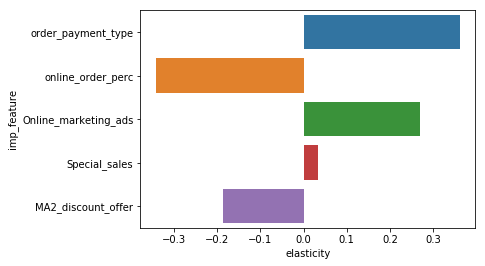

imp_feature   coef  elasticity
0    order_payment_type  0.684       0.362
1     online_order_perc -0.452      -0.342
2  Online_marketing_ads  0.179       0.269
3         Special_sales  0.115       0.034
4    MA2_discount_offer -0.219      -0.187

In [387]:
elasticity(dlm1,camera_train_dlm)

Text(0, 0.5, 'y_pred')

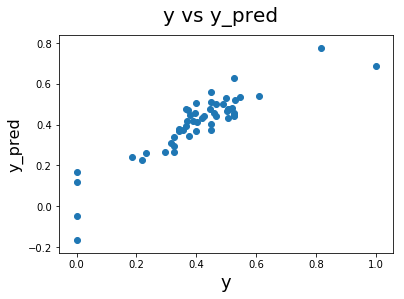

In [388]:
# Plotting y and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y, y_pred)
fig.suptitle('y vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

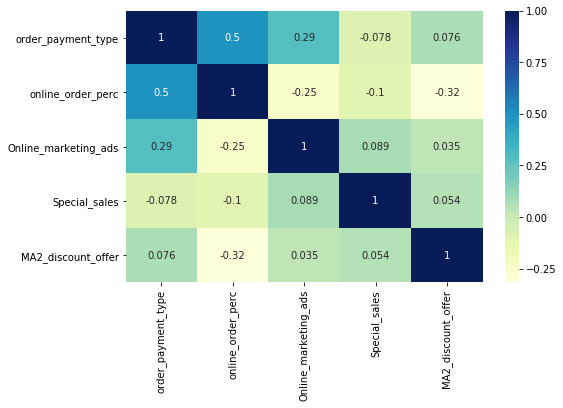

In [389]:
# Figure size
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(camera_train_dlm[features].corr(), cmap="YlGnBu", annot=True)
plt.show()

### 5. Distributed Lag + Multiplicative Model

In [390]:
ca_week.columns

Index(['week', 'gmv', 'listing_price', 'product_mrp', 'discount', 'sla',
       'product_procurement_sla', 'fsn_id', 'order_payment_type',
       'premium_product', 'online_order_perc', 'Date', 'Year', 'Month',
       'TV_ads', 'Sponsorship_ads', 'Content_marketing_ads',
       'Online_marketing_ads', 'NPS', 'Stock_Index', 'Special_sales', 'Payday',
       'heat_deg_days', 'cool_deg_days', 'total_rain_mm', 'total_snow_cm',
       'snow_on_grnd_cm', 'MA4_listed_price', 'MA2_discount_offer',
       'lag_1_listed_price', 'lag_2_listed_price', 'lag_3_listed_price',
       'lag_1_discount', 'lag_2_discount', 'lag_3_discount',
       'lag_1_Stock_Index', 'lag_2_Stock_Index', 'lag_3_Stock_Index',
       'lag_1_Special_sales', 'lag_2_Special_sales', 'lag_3_Special_sales',
       'lag_1_Payday', 'lag_2_Payday', 'lag_3_Payday', 'lag_1_NPS',
       'lag_2_NPS', 'lag_3_NPS'],
      dtype='object')

In [391]:
camera_dlmm = ca_week[['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday','heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm',  'MA4_listed_price',
       'MA2_discount_offer', 'lag_1_listed_price','lag_1_discount',
       'lag_2_discount','lag_3_discount','lag_2_NPS','lag_3_NPS','lag_1_Stock_Index',
       'lag_2_Stock_Index','lag_3_Stock_Index','lag_1_Special_sales','lag_2_Special_sales','lag_3_Special_sales',
       'lag_1_Payday','lag_2_Payday','lag_3_Payday']]           


camera_dlmm.head()


gmv  discount   sla  product_procurement_sla  order_payment_type  \
0   11151.000     0.491 2.423                    2.731                  26   
1 1228580.000     0.448 7.253                    2.578                 753   
2 1344416.000     0.458 6.567                    2.577                 823   
3 1346986.000     0.445 6.611                    2.613                 781   
4  913445.000     0.443 6.533                    2.614                 470   

   online_order_perc  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0            100.000   0.054            1.854                  0.000   
1             31.506   0.081            2.780                  0.000   
2             32.023   0.081            2.780                  0.000   
3             30.377   0.081            2.780                  0.000   
4             27.598   0.028            1.139                  0.000   

   Online_marketing_ads    NPS  Stock_Index  Special_sales  Payday  \
0                 0.332 54.600     1177.000          0.000   0.200   
1                 0.498 54.600     1177.000          0.000   0.000   
2                 0.498 54.600     1177.000          0.286   0.143   
3                 0.498 54.600     1177.000          0.000   0.000   
4                 0.192 56.139     1185.286          0.000   0.143   

   heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  \
0          0.100          1.460          0.000          0.000   
1          1.059          2.322          4.155          0.029   
2          0.816          4.722          1.569          0.029   
3          1.632          4.172          1.141          0.029   
4          0.816          5.908          4.341          0.029   

   snow_on_grnd_cm  MA4_listed_price  MA2_discount_offer  lag_1_listed_price  \
0            0.000             0.000               0.000             501.230   
1            0.041             0.078              -0.046             512.763   
2            0.041             0.066               0.011             511.973   
3            0.041             0.048              -0.014             522.839   
4            0.041             0.021              -0.002             749.000   

   lag_1_discount  lag_2_discount  lag_3_discount  lag_2_NPS  lag_3_NPS  \
0           0.448           0.458           0.445     54.600     54.600   
1           0.458           0.445           0.443     54.600     56.139   
2           0.445           0.443           0.260     56.139     59.987   
3           0.443           0.260           0.850     59.987     59.987   
4           0.260           0.850           0.475     59.987     59.987   

   lag_1_Stock_Index  lag_2_Stock_Index  lag_3_Stock_Index  \
0           1177.000           1177.000           1177.000   
1           1177.000           1177.000           1185.286   
2           1177.000           1185.286           1206.000   
3           1185.286           1206.000           1206.000   
4           1206.000           1206.000           1206.000   

   lag_1_Special_sales  lag_2_Special_sales  lag_3_Special_sales  \
0                0.000                0.286                0.000   
1                0.286                0.000                0.000   
2                0.000                0.000                0.000   
3                0.000                0.000                0.286   
4                0.000                0.286                0.429   

   lag_1_Payday  lag_2_Payday  lag_3_Payday  
0         0.000         0.143         0.000  
1         0.143         0.000         0.143  
2         0.000         0.143         0.000  
3         0.143         0.000         0.143  
4         0.000         0.143         0.000

In [392]:
camera_dlmm['lag_1_gmv'] = camera_dlmm['gmv'].shift(-1)
camera_dlmm['lag_2_gmv'] = camera_dlmm['gmv'].shift(-2)
camera_dlmm['lag_3_gmv'] = camera_dlmm['gmv'].shift(-3)


In [393]:
### Checking NaN

camera_dlmm.isnull().sum()

gmv                        0
discount                   0
sla                        0
product_procurement_sla    0
order_payment_type         0
online_order_perc          0
TV_ads                     1
Sponsorship_ads            1
Content_marketing_ads      1
Online_marketing_ads       1
NPS                        0
Stock_Index                0
Special_sales              0
Payday                     0
heat_deg_days              0
cool_deg_days              0
total_rain_mm              0
total_snow_cm              0
snow_on_grnd_cm            0
MA4_listed_price           0
MA2_discount_offer         0
lag_1_listed_price         0
lag_1_discount             0
lag_2_discount             0
lag_3_discount             0
lag_2_NPS                  0
lag_3_NPS                  0
lag_1_Stock_Index          0
lag_2_Stock_Index          0
lag_3_Stock_Index          0
lag_1_Special_sales        0
lag_2_Special_sales        0
lag_3_Special_sales        0
lag_1_Payday               0
lag_2_Payday  

In [394]:
camera_dlmm = camera_dlmm.fillna(0)

In [395]:
### Applying Log 
camera_dlmm=np.log(camera_dlmm)

camera_dlmm = camera_dlmm.fillna(0)
camera_dlmm = camera_dlmm.replace([np.inf, -np.inf], 0)

In [396]:
camera_dlmm.head()

gmv  discount   sla  product_procurement_sla  order_payment_type  \
0  9.319    -0.712 0.885                    1.005               3.258   
1 14.021    -0.803 1.981                    0.947               6.624   
2 14.111    -0.782 1.882                    0.947               6.713   
3 14.113    -0.810 1.889                    0.961               6.661   
4 13.725    -0.813 1.877                    0.961               6.153   

   online_order_perc  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0              4.605  -2.922            0.617                 -8.364   
1              3.450  -2.516            1.023                 -7.958   
2              3.466  -2.516            1.023                 -7.958   
3              3.414  -2.516            1.023                 -7.958   
4              3.318  -3.568            0.131                 -9.046   

   Online_marketing_ads   NPS  Stock_Index  Special_sales  Payday  \
0                -1.103 4.000        7.071          0.000  -1.609   
1                -0.698 4.000        7.071          0.000   0.000   
2                -0.698 4.000        7.071         -1.253  -1.946   
3                -0.698 4.000        7.071          0.000   0.000   
4                -1.652 4.028        7.078          0.000  -1.946   

   heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  \
0         -2.303          0.378          0.000          0.000   
1          0.057          0.842          1.424         -3.532   
2         -0.203          1.552          0.451         -3.532   
3          0.490          1.428          0.131         -3.532   
4         -0.203          1.776          1.468         -3.532   

   snow_on_grnd_cm  MA4_listed_price  MA2_discount_offer  lag_1_listed_price  \
0            0.000             0.000               0.000               6.217   
1           -3.189            -2.554               0.000               6.240   
2           -3.189            -2.716              -4.550               6.238   
3           -3.189            -3.045               0.000               6.259   
4           -3.189            -3.874               0.000               6.619   

   lag_1_discount  lag_2_discount  lag_3_discount  lag_2_NPS  lag_3_NPS  \
0          -0.803          -0.782          -0.810      4.000      4.000   
1          -0.782          -0.810          -0.813      4.000      4.028   
2          -0.810          -0.813          -1.347      4.028      4.094   
3          -0.813          -1.347          -0.163      4.094      4.094   
4          -1.347          -0.163          -0.744      4.094      4.094   

   lag_1_Stock_Index  lag_2_Stock_Index  lag_3_Stock_Index  \
0              7.071              7.071              7.071   
1              7.071              7.071              7.078   
2              7.071              7.078              7.095   
3              7.078              7.095              7.095   
4              7.095              7.095              7.095   

   lag_1_Special_sales  lag_2_Special_sales  lag_3_Special_sales  \
0                0.000               -1.253                0.000   
1               -1.253                0.000                0.000   
2                0.000                0.000                0.000   
3                0.000                0.000               -1.253   
4                0.000               -1.253               -0.847   

   lag_1_Payday  lag_2_Payday  lag_3_Payday  lag_1_gmv  lag_2_gmv  lag_3_gmv  
0         0.000        -1.946         0.000     14.021     14.111     14.113  
1        -1.946         0.000        -1.946     14.111     14.113     13.725  
2         0.000        -1.946         0.000     14.113     13.725      7.312  
3        -1.946         0.000        -1.946     13.725      7.312      5.700  
4         0.000        -1.946         0.000      7.312      5.700      6.808

In [397]:
camera_dlmm.columns

Index(['gmv', 'discount', 'sla', 'product_procurement_sla',
       'order_payment_type', 'online_order_perc', 'TV_ads', 'Sponsorship_ads',
       'Content_marketing_ads', 'Online_marketing_ads', 'NPS', 'Stock_Index',
       'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days',
       'total_rain_mm', 'total_snow_cm', 'snow_on_grnd_cm', 'MA4_listed_price',
       'MA2_discount_offer', 'lag_1_listed_price', 'lag_1_discount',
       'lag_2_discount', 'lag_3_discount', 'lag_2_NPS', 'lag_3_NPS',
       'lag_1_Stock_Index', 'lag_2_Stock_Index', 'lag_3_Stock_Index',
       'lag_1_Special_sales', 'lag_2_Special_sales', 'lag_3_Special_sales',
       'lag_1_Payday', 'lag_2_Payday', 'lag_3_Payday', 'lag_1_gmv',
       'lag_2_gmv', 'lag_3_gmv'],
      dtype='object')

In [398]:
###  Import the StandardScaler()
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

###  Create a scaling object
# scaler = StandardScaler()
scaler = MinMaxScaler()


###  Create a list of the variables that you need to scale
varlist = ['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday','heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm',  'MA4_listed_price',
       'MA2_discount_offer', 'lag_1_listed_price','lag_1_discount',
       'lag_2_discount','lag_3_discount','lag_2_NPS','lag_3_NPS','lag_1_Stock_Index',
       'lag_2_Stock_Index','lag_3_Stock_Index','lag_1_Special_sales','lag_2_Special_sales','lag_3_Special_sales',
       'lag_1_Payday','lag_2_Payday','lag_3_Payday']


###  Scale these variables using 'fit_transform'
camera_dlmm[varlist] = scaler.fit_transform(camera_dlmm[varlist])


In [399]:
camera_dlmm.head()

gmv  discount   sla  product_procurement_sla  order_payment_type  \
0 0.379     0.536 0.000                    0.725               0.387   
1 0.873     0.459 0.802                    0.683               0.786   
2 0.882     0.477 0.730                    0.683               0.796   
3 0.882     0.454 0.735                    0.693               0.790   
4 0.841     0.450 0.726                    0.693               0.730   

   online_order_perc  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0              1.000   0.444            0.382                  0.358   
1              0.749   0.498            0.471                  0.388   
2              0.753   0.498            0.471                  0.388   
3              0.741   0.498            0.471                  0.388   
4              0.720   0.358            0.277                  0.307   

   Online_marketing_ads   NPS  Stock_Index  Special_sales  Payday  \
0                 0.393 0.687        0.734          1.000   0.173   
1                 0.467 0.687        0.734          1.000   1.000   
2                 0.467 0.687        0.734          0.356   0.000   
3                 0.467 0.687        0.734          1.000   1.000   
4                 0.293 0.780        0.768          1.000   0.000   

   heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  \
0          0.000          0.408          0.303          0.895   
1          0.477          0.604          0.736          0.000   
2          0.424          0.905          0.440          0.000   
3          0.564          0.853          0.343          0.000   
4          0.424          1.000          0.750          0.000   

   snow_on_grnd_cm  MA4_listed_price  MA2_discount_offer  lag_1_listed_price  \
0            0.677             1.000               1.000               0.939   
1            0.000             0.572               1.000               0.943   
2            0.000             0.545               0.157               0.943   
3            0.000             0.490               1.000               0.946   
4            0.000             0.351               1.000               1.000   

   lag_1_discount  lag_2_discount  lag_3_discount  lag_2_NPS  lag_3_NPS  \
0           0.404           0.420           0.399      0.977      0.977   
1           0.420           0.399           0.396      0.977      0.984   
2           0.399           0.396           0.000      0.984      1.000   
3           0.396           0.000           0.879      1.000      1.000   
4           0.000           0.879           0.447      1.000      1.000   

   lag_1_Stock_Index  lag_2_Stock_Index  lag_3_Stock_Index  \
0              0.992              0.992              0.992   
1              0.992              0.992              0.993   
2              0.992              0.993              0.996   
3              0.993              0.996              0.996   
4              0.996              0.996              0.996   

   lag_1_Special_sales  lag_2_Special_sales  lag_3_Special_sales  \
0                1.000                0.356                1.000   
1                0.356                1.000                1.000   
2                1.000                1.000                1.000   
3                1.000                1.000                0.356   
4                1.000                0.356                0.565   

   lag_1_Payday  lag_2_Payday  lag_3_Payday  lag_1_gmv  lag_2_gmv  lag_3_gmv  
0         1.000         0.000         1.000     14.021     14.111     14.113  
1         0.000         1.000         0.000     14.111     14.113     13.725  
2         1.000         0.000         1.000     14.113     13.725      7.312  
3         0.000         1.000         0.000     13.725      7.312      5.700  
4         1.000         0.000         1.000      7.312      5.700      6.808

In [400]:
###  Split the train dataset into X and y
from sklearn.model_selection import train_test_split
x = camera_dlmm.drop('gmv',axis=1)
y = camera_dlmm['gmv']

camera_train_dlmm = camera_dlmm

In [401]:
print("X = Independent variable & Y = Target variable")
print(x.shape,y.shape)

X = Independent variable & Y = Target variable
(52, 38) (52,)


In [402]:
###  Instantiate
dlm = LinearRegression()

###  Fit a line
dlm.fit(x,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [403]:
###  Coefficient values

coef = pd.DataFrame(x.columns)
coef['Coefficient'] = pd.Series(dlm.coef_)
coef


0  Coefficient
0                  discount        0.007
1                       sla        0.145
2   product_procurement_sla        0.266
3        order_payment_type        0.728
4         online_order_perc       -0.286
5                    TV_ads       -0.024
6           Sponsorship_ads        0.026
7     Content_marketing_ads       -0.009
8      Online_marketing_ads        0.084
9                       NPS       -0.038
10              Stock_Index        0.016
11            Special_sales        0.011
12                   Payday        0.013
13            heat_deg_days        0.029
14            cool_deg_days        0.018
15            total_rain_mm        0.008
16            total_snow_cm       -0.031
17          snow_on_grnd_cm        0.008
18         MA4_listed_price        0.007
19       MA2_discount_offer       -0.006
20       lag_1_listed_price       -0.422
21           lag_1_discount       -0.165
22           lag_2_discount        0.120
23           lag_3_discount       -0.058
24                lag_2_NPS        0.772
25                lag_3_NPS        0.079
26        lag_1_Stock_Index       -0.188
27        lag_2_Stock_Index       -0.426
28        lag_3_Stock_Index       -0.140
29      lag_1_Special_sales        0.004
30      lag_2_Special_sales       -0.018
31      lag_3_Special_sales        0.014
32             lag_1_Payday        0.034
33             lag_2_Payday        0.036
34             lag_3_Payday        0.022
35                lag_1_gmv        0.034
36                lag_2_gmv       -0.019
37                lag_3_gmv        0.005

In [404]:
col = x.columns
col

Index(['discount', 'sla', 'product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads', 'Sponsorship_ads',
       'Content_marketing_ads', 'Online_marketing_ads', 'NPS', 'Stock_Index',
       'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days',
       'total_rain_mm', 'total_snow_cm', 'snow_on_grnd_cm', 'MA4_listed_price',
       'MA2_discount_offer', 'lag_1_listed_price', 'lag_1_discount',
       'lag_2_discount', 'lag_3_discount', 'lag_2_NPS', 'lag_3_NPS',
       'lag_1_Stock_Index', 'lag_2_Stock_Index', 'lag_3_Stock_Index',
       'lag_1_Special_sales', 'lag_2_Special_sales', 'lag_3_Special_sales',
       'lag_1_Payday', 'lag_2_Payday', 'lag_3_Payday', 'lag_1_gmv',
       'lag_2_gmv', 'lag_3_gmv'],
      dtype='object')

#### Model Building - Stepwise selection for feature selection

In [405]:
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [406]:
def stepwise_selection(x, y,
                       initial_list=['discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday','heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm',  'MA4_listed_price',
       'MA2_discount_offer', 'lag_1_listed_price','lag_1_discount',
       'lag_2_discount','lag_3_discount','lag_2_NPS','lag_3_NPS','lag_1_Stock_Index',
       'lag_2_Stock_Index','lag_3_Stock_Index','lag_1_Special_sales','lag_2_Special_sales','lag_3_Special_sales',
       'lag_1_Payday','lag_2_Payday','lag_3_Payday'],
                     threshold_in=0.01,threshold_out = 0.05, verbose=True):
    
    included = list(initial_list)
    while True:
        changed=False
        ###  forward step
        excluded = list(set(x.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
                
                
        ###  backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included]))).fit()
        ###  use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() ###  null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included


In [407]:
import statsmodels.api as sm  

final_features = stepwise_selection(x, y)

print("\n","final_selected_features:",final_features)

Add  lag_1_gmv                      with p-value 0.002162
Drop lag_1_Stock_Index              with p-value 0.97156
Drop snow_on_grnd_cm                with p-value 0.870361
Drop total_rain_mm                  with p-value 0.796657
Drop lag_3_Special_sales            with p-value 0.744888
Drop discount                       with p-value 0.656919
Drop MA2_discount_offer             with p-value 0.638972
Drop lag_3_Stock_Index              with p-value 0.575939
Drop TV_ads                         with p-value 0.527561
Drop lag_3_discount                 with p-value 0.481953
Drop NPS                            with p-value 0.560655
Drop lag_1_Special_sales            with p-value 0.306151
Drop Online_marketing_ads           with p-value 0.277598
Add  lag_2_gmv                      with p-value 0.00687467
Drop MA4_listed_price               with p-value 0.551138
Drop lag_2_Special_sales            with p-value 0.229301
Drop cool_deg_days                  with p-value 0.287707
Drop heat_deg

In [408]:
###  Import statsmodels
import statsmodels.api as sm  

###  Subsetting training data for 15 selected columns
x_rfe1 = x[final_features]

x_rfe1 = sm.add_constant(x_rfe1)

###  Fitting the model with selected variables
dlm1 = sm.OLS(y, x_rfe1).fit() 

print(dlm1.params)

const                      0.176
sla                        0.164
product_procurement_sla    0.372
order_payment_type         0.770
online_order_perc         -0.363
Special_sales              0.022
lag_1_listed_price        -0.616
lag_1_discount            -0.185
lag_2_discount             0.180
lag_2_NPS                  0.223
lag_1_gmv                  0.035
lag_2_gmv                 -0.011
dtype: float64


In [409]:
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     948.6
Date:                Wed, 08 Jan 2020   Prob (F-statistic):           1.04e-44
Time:                        09:53:39   Log-Likelihood:                 153.69
No. Observations:                  52   AIC:                            -283.4
Df Residuals:                      40   BIC:                            -260.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [410]:
###  Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                     const 326.390
10                lag_1_gmv  13.930
9                 lag_2_NPS  11.170
6        lag_1_listed_price  10.800
11                lag_2_gmv   9.530
3        order_payment_type   3.310
8            lag_2_discount   3.040
7            lag_1_discount   2.410
4         online_order_perc   1.770
2   product_procurement_sla   1.650
1                       sla   1.280
5             Special_sales   1.210

In [411]:
x_rfe1.drop('lag_1_gmv', axis = 1, inplace = True)

In [412]:
### 2

In [413]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     214.2
Date:                Wed, 08 Jan 2020   Prob (F-statistic):           4.39e-32
Time:                        09:53:39   Log-Likelihood:                 112.28
No. Observations:                  52   AIC:                            -202.6
Df Residuals:                      41   BIC:                            -181.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [414]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                     const 324.220
9                 lag_2_NPS   4.990
10                lag_2_gmv   4.460
6        lag_1_listed_price   3.200
7            lag_1_discount   2.280
8            lag_2_discount   1.990
2   product_procurement_sla   1.640
3        order_payment_type   1.630
4         online_order_perc   1.370
1                       sla   1.240
5             Special_sales   1.210

In [415]:
x_rfe1.drop('lag_2_discount', axis = 1, inplace = True)


In [416]:
### 3

In [417]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     243.8
Date:                Wed, 08 Jan 2020   Prob (F-statistic):           2.73e-33
Time:                        09:53:39   Log-Likelihood:                 112.27
No. Observations:                  52   AIC:                            -204.5
Df Residuals:                      42   BIC:                            -185.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [418]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                    const 222.900
9                lag_2_gmv   4.430
8                lag_2_NPS   4.370
6       lag_1_listed_price   3.200
7           lag_1_discount   2.280
2  product_procurement_sla   1.590
3       order_payment_type   1.550
4        online_order_perc   1.350
1                      sla   1.240
5            Special_sales   1.210

In [419]:
x_rfe1.drop('Special_sales', axis = 1, inplace = True)


In [420]:
### 4

In [421]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     273.6
Date:                Wed, 08 Jan 2020   Prob (F-statistic):           2.72e-34
Time:                        09:53:39   Log-Likelihood:                 111.61
No. Observations:                  52   AIC:                            -205.2
Df Residuals:                      43   BIC:                            -187.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [422]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                    const 221.730
7                lag_2_NPS   4.340
8                lag_2_gmv   4.250
5       lag_1_listed_price   3.140
6           lag_1_discount   2.180
2  product_procurement_sla   1.590
3       order_payment_type   1.500
4        online_order_perc   1.340
1                      sla   1.210

In [423]:
x_rfe1.drop('lag_1_listed_price', axis = 1, inplace = True)


In [424]:
### 5

In [425]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     307.2
Date:                Wed, 08 Jan 2020   Prob (F-statistic):           3.50e-35
Time:                        09:53:39   Log-Likelihood:                 110.57
No. Observations:                  52   AIC:                            -205.1
Df Residuals:                      44   BIC:                            -189.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [426]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                    const 128.250
6                lag_2_NPS   4.180
7                lag_2_gmv   3.930
2  product_procurement_sla   1.560
3       order_payment_type   1.480
5           lag_1_discount   1.350
4        online_order_perc   1.330
1                      sla   1.170

In [427]:
x_rfe1.drop('lag_1_discount', axis = 1, inplace = True)


In [428]:
### 6

In [429]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     345.7
Date:                Wed, 08 Jan 2020   Prob (F-statistic):           6.29e-36
Time:                        09:53:39   Log-Likelihood:                 109.09
No. Observations:                  52   AIC:                            -204.2
Df Residuals:                      45   BIC:                            -190.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [430]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                    const 100.410
6                lag_2_gmv   3.570
5                lag_2_NPS   3.290
2  product_procurement_sla   1.510
3       order_payment_type   1.400
4        online_order_perc   1.310
1                      sla   1.150

In [431]:
x_rfe1.drop('lag_2_gmv', axis = 1, inplace = True)


In [432]:
### 7

In [433]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     403.6
Date:                Wed, 08 Jan 2020   Prob (F-statistic):           8.78e-37
Time:                        09:53:40   Log-Likelihood:                 107.83
No. Observations:                  52   AIC:                            -203.7
Df Residuals:                      46   BIC:                            -191.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [434]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                    const 95.540
2  product_procurement_sla  1.360
4        online_order_perc  1.290
3       order_payment_type  1.140
1                      sla  1.100
5                lag_2_NPS  1.020

In [435]:
x_rfe1.drop('lag_2_NPS', axis = 1, inplace = True)


In [436]:
### 8

In [437]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     494.7
Date:                Wed, 08 Jan 2020   Prob (F-statistic):           9.31e-38
Time:                        09:53:40   Log-Likelihood:                 106.78
No. Observations:                  52   AIC:                            -203.6
Df Residuals:                      47   BIC:                            -193.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [438]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                    const 79.690
2  product_procurement_sla  1.360
4        online_order_perc  1.270
3       order_payment_type  1.140
1                      sla  1.090

In [439]:
x_rfe1.drop('sla', axis = 1, inplace = True)


In [440]:
### 9

In [441]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     614.3
Date:                Wed, 08 Jan 2020   Prob (F-statistic):           2.84e-38
Time:                        09:53:40   Log-Likelihood:                 104.44
No. Observations:                  52   AIC:                            -200.9
Df Residuals:                      48   BIC:                            -193.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [442]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                    const 40.240
1  product_procurement_sla  1.280
3        online_order_perc  1.200
2       order_payment_type  1.120

In [443]:
features = list(x_rfe1.columns)
features.remove('const')
features

['product_procurement_sla', 'order_payment_type', 'online_order_perc']

In [444]:
###  Model Evaluation on testing data
x_2 = x[features]

###  Predicition with selected features on the test data
y_pred = dlm1.predict(sm.add_constant(x_2))

In [445]:
###  Mean square error (MSE)
mse = np.mean((y_pred - y)**2)
mse


0.0010543308447819374

In [446]:
###  Coefficient values

coef = pd.DataFrame(x_rfe1.columns)
coef['Coefficient'] = pd.Series(dlm.coef_)
coef


0  Coefficient
0                    const        0.007
1  product_procurement_sla        0.145
2       order_payment_type        0.266
3        online_order_perc        0.728

In [447]:
###  Using K-Fold Cross validation evaluating on whole dataset

# lm = LinearRegression()
fold = KFold(10,shuffle = True, random_state = 100)

cv_scores = -cross_val_score(dlm,x[features],y,cv=fold,scoring='neg_mean_squared_error')

print("Neg. of MSE:",cv_scores,"\n")
print("Mean of 5 KFold CV - MSE:",cv_scores.mean())

Neg. of MSE: [0.0368595  0.00239574 0.00268903 0.0168557  0.00028022 0.00051773
 0.00033657 0.0014567  0.00012058 0.00085885] 

Mean of 5 KFold CV - MSE: 0.006237061757767023


In [448]:
def elasticity(model,x):
    
    features_df = pd.DataFrame(model.params)
    features_df = features_df.rename(columns={0:'coef'})
    
    features_df['imp_feature'] = model.params.index
    features_df = features_df[features_df.imp_feature != 'const'][['imp_feature','coef']]
    features_df.index = range(len(features_df))
#      features

    elasticity_list = list()
    
    for i in range(len(features_df)):
        elasticity_list.append(((features_df.coef[i] * np.mean(x[features_df.imp_feature[i]])) / np.mean(x['gmv'])))

    features_df['elasticity'] = np.round(elasticity_list,3)
    
    sns.barplot(x='elasticity',y='imp_feature',data=features_df)
    plt.show()
    
    return features_df
    

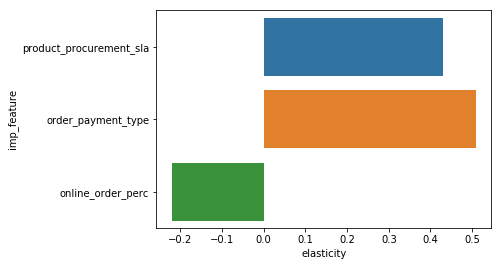

imp_feature   coef  elasticity
0  product_procurement_sla  0.349       0.429
1       order_payment_type  0.962       0.509
2        online_order_perc -0.292      -0.221

In [449]:
elasticity(dlm1,camera_train_dlm)

Text(0, 0.5, 'y_pred')

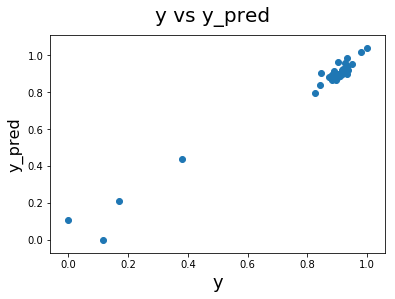

In [450]:
# Plotting y and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y, y_pred)
fig.suptitle('y vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

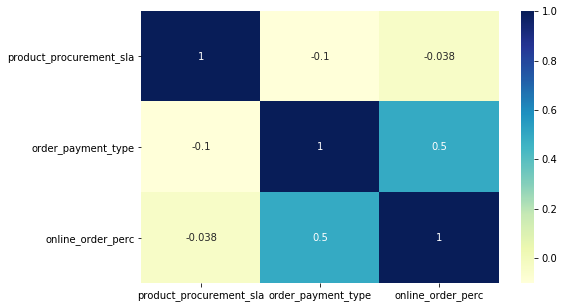

In [451]:
# Figure size
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(camera_train_dlm[features].corr(), cmap="YlGnBu", annot=True)
plt.show()

# 6. Modeling - Gaming Accessory

### Linear Model

In [452]:
###  Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [453]:
ga_week.columns

Index(['week', 'gmv', 'listing_price', 'product_mrp', 'discount', 'sla',
       'product_procurement_sla', 'fsn_id', 'order_payment_type',
       'online_order_perc', 'Date', 'Year', 'Month', 'TV_ads',
       'Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days',
       'cool_deg_days', 'total_rain_mm', 'total_snow_cm', 'snow_on_grnd_cm',
       'MA2_listed_price', 'MA2_discount', 'MA4_discount',
       'lag_1_listed_price', 'lag_2_listed_price', 'lag_3_listed_price',
       'lag_1_discount_offer', 'lag_2_discount_offer', 'lag_3_discount_offer',
       'lag_1_NPS', 'lag_2_NPS', 'lag_3_NPS', 'lag_1_Stock_Index',
       'lag_2_Stock_Index', 'lag_3_Stock_Index', 'lag_1_Special_sales',
       'lag_2_Special_sales', 'lag_3_Special_sales', 'lag_1_Payday',
       'lag_2_Payday', 'lag_3_Payday'],
      dtype='object')

In [454]:
gaming_lm = ga_week[['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA2_listed_price']]
                            
    
gaming_lm.head()

gmv  discount   sla  product_procurement_sla  order_payment_type  \
0   17466.000     0.220 2.960                    2.560                  25   
1 1435300.000     0.414 5.170                    3.013                 689   
2 1097388.359     0.429 5.115                    2.514                 534   
3 1158166.000     0.352 5.179                    2.338                 425   
4  742062.000     0.363 5.552                    2.325                 246   

   online_order_perc  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0            100.000   0.054            1.854                  0.000   
1             26.208   0.081            2.780                  0.000   
2             22.418   0.081            2.780                  0.000   
3             21.008   0.081            2.780                  0.000   
4             18.880   0.028            1.139                  0.000   

   Online_marketing_ads    NPS  Stock_Index  Special_sales  Payday  \
0                 0.332 54.600     1177.000          0.000   0.200   
1                 0.498 54.600     1177.000          0.000   0.000   
2                 0.498 54.600     1177.000          0.286   0.143   
3                 0.498 54.600     1177.000          0.000   0.000   
4                 0.192 56.139     1185.286          0.000   0.143   

   heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  \
0          0.100          1.460          0.000          0.000   
1          1.059          2.322          4.155          0.029   
2          0.816          4.722          1.569          0.029   
3          1.632          4.172          1.141          0.029   
4          0.816          5.908          4.341          0.029   

   snow_on_grnd_cm  MA2_listed_price  
0            0.000             0.000  
1            0.041            -0.126  
2            0.041            -0.081  
3            0.041             0.108  
4            0.041            -0.004

In [455]:
### Checking NaN
gaming_lm.isnull().sum()

gmv                        0
discount                   0
sla                        0
product_procurement_sla    0
order_payment_type         0
online_order_perc          0
TV_ads                     1
Sponsorship_ads            1
Content_marketing_ads      1
Online_marketing_ads       1
NPS                        0
Stock_Index                0
Special_sales              0
Payday                     0
heat_deg_days              0
cool_deg_days              0
total_rain_mm              0
total_snow_cm              0
snow_on_grnd_cm            0
MA2_listed_price           0
dtype: int64

In [456]:
gaming_lm.fillna(0, inplace = True)

In [457]:
### Import the StandardScaler()
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

### Create a scaling object
# scaler = StandardScaler()
scaler = MinMaxScaler()


### Create a list of the variables that you need to scale
varlist = ['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA2_listed_price']
                                      

### Scale these variables using 'fit_transform'
gaming_lm[varlist] = scaler.fit_transform(gaming_lm[varlist])

In [458]:
gaming_lm.head()

gmv  discount   sla  product_procurement_sla  order_payment_type  \
0 0.004     0.000 0.000                    0.491               0.009   
1 0.363     0.615 0.596                    0.825               0.235   
2 0.278     0.663 0.581                    0.457               0.182   
3 0.293     0.421 0.598                    0.327               0.145   
4 0.188     0.456 0.699                    0.318               0.084   

   online_order_perc  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0              1.000   0.015            0.058                  0.000   
1              0.262   0.023            0.088                  0.000   
2              0.224   0.023            0.088                  0.000   
3              0.210   0.023            0.088                  0.000   
4              0.189   0.008            0.036                  0.000   

   Online_marketing_ads   NPS  Stock_Index  Special_sales  Payday  \
0                 0.036 0.654        0.714          0.000   1.000   
1                 0.054 0.654        0.714          0.000   0.000   
2                 0.054 0.654        0.714          0.286   0.714   
3                 0.054 0.654        0.714          0.000   0.000   
4                 0.021 0.753        0.750          0.000   0.714   

   heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  \
0          0.000          0.247          0.000          0.000   
1          0.069          0.393          0.420          0.019   
2          0.051          0.799          0.159          0.019   
3          0.109          0.706          0.115          0.019   
4          0.051          1.000          0.439          0.019   

   snow_on_grnd_cm  MA2_listed_price  
0            0.000             0.440  
1            0.009             0.324  
2            0.009             0.366  
3            0.009             0.539  
4            0.009             0.436

In [459]:
### Split the train dataset into X and y
from sklearn.model_selection import train_test_split
x = gaming_lm.drop('gmv',axis=1)
y = gaming_lm['gmv']

gaming_train_lm = gaming_lm

In [460]:
print("x dataset: ",x.shape)
print("y dataset: ",y.shape)

x dataset:  (53, 19)
y dataset:  (53,)


In [461]:
###  Instantiate
lm = LinearRegression()

###  Fit a line
lm.fit(x,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [462]:
###  Coefficient values

coef = pd.DataFrame(x.columns)
coef['Coefficient'] = pd.Series(lm.coef_)
coef


0  Coefficient
0                  discount        0.318
1                       sla       -0.231
2   product_procurement_sla        0.100
3        order_payment_type        0.762
4         online_order_perc       -0.336
5                    TV_ads        0.011
6           Sponsorship_ads       -0.171
7     Content_marketing_ads        0.057
8      Online_marketing_ads       -0.012
9                       NPS       -0.508
10              Stock_Index       -0.065
11            Special_sales       -0.006
12                   Payday        0.062
13            heat_deg_days       -0.135
14            cool_deg_days        0.053
15            total_rain_mm       -0.039
16            total_snow_cm        0.070
17          snow_on_grnd_cm       -0.006
18         MA2_listed_price        0.313

In [463]:
col = x.columns
col

Index(['discount', 'sla', 'product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads', 'Sponsorship_ads',
       'Content_marketing_ads', 'Online_marketing_ads', 'NPS', 'Stock_Index',
       'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days',
       'total_rain_mm', 'total_snow_cm', 'snow_on_grnd_cm',
       'MA2_listed_price'],
      dtype='object')

#### Model Building - Stepwise selection for feature selection

In [464]:
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [465]:
def stepwise_selection(x, y,
                       initial_list=['discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA2_listed_price'],
                       threshold_in=0.01,threshold_out = 0.05, verbose=True):
    
    included = list(initial_list)
    while True:
        changed=False
        ###forward step
        excluded = list(set(x.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
                
                
        ###backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included]))).fit()
        ###use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() ###null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included


In [466]:
import statsmodels.api as sm  

final_features = stepwise_selection(x, y)

print("\n","final_selected_features:",final_features)

Drop snow_on_grnd_cm                with p-value 0.960306
Drop Special_sales                  with p-value 0.945282
Drop Online_marketing_ads           with p-value 0.940794
Drop TV_ads                         with p-value 0.924262
Drop total_rain_mm                  with p-value 0.594625
Drop cool_deg_days                  with p-value 0.649727
Drop Content_marketing_ads          with p-value 0.534965
Drop total_snow_cm                  with p-value 0.281788
Drop product_procurement_sla        with p-value 0.242238
Drop heat_deg_days                  with p-value 0.159228
Drop Stock_Index                    with p-value 0.252028
Drop Payday                         with p-value 0.135638
Drop Sponsorship_ads                with p-value 0.110298
Drop MA2_listed_price               with p-value 0.0657543
Drop discount                       with p-value 0.166381
Drop sla                            with p-value 0.067094

 final_selected_features: ['order_payment_type', 'online_order_perc', 

In [467]:
###  Import statsmodels
import statsmodels.api as sm  

###  Subsetting training data for 15 selected columns
x_rfe1 = x[final_features]

x_rfe1 = sm.add_constant(x_rfe1)

###  Fitting the model with selected variables
lm1 = sm.OLS(y, x_rfe1).fit() 

print(lm1.params)

const                 0.398
order_payment_type    0.741
online_order_perc    -0.417
NPS                  -0.310
dtype: float64


In [468]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     44.68
Date:                Wed, 08 Jan 2020   Prob (F-statistic):           4.65e-14
Time:                        09:53:42   Log-Likelihood:                 51.794
No. Observations:                  53   AIC:                            -95.59
Df Residuals:                      49   BIC:                            -87.71
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3980      0

In [469]:
###  Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0               const 4.310
1  order_payment_type 1.890
2   online_order_perc 1.880
3                 NPS 1.070

In [470]:
features = list(x_rfe1.columns)
features.remove('const')
features

['order_payment_type', 'online_order_perc', 'NPS']

In [471]:
###  Model Evaluation on testing data
x_2 = x[features]


###  Predicition with selected features on the test data
y_pred = lm1.predict(sm.add_constant(x_2))


In [472]:
###  Mean square error (MSE)

mse = np.mean((y_pred - y)**2)
mse

0.008292880715894254

In [473]:
###  Coefficient values

coef = pd.DataFrame(x_rfe1.columns)
coef['Coefficient'] = pd.Series(lm.coef_)
coef


0  Coefficient
0               const        0.318
1  order_payment_type       -0.231
2   online_order_perc        0.100
3                 NPS        0.762

In [474]:
### Mean Square Error 
###  Using K-Fold Cross validation evaluating on selected dataset

# lm = LinearRegression()
fold = KFold(10,shuffle = True, random_state = 100)

cv_scores = -cross_val_score(lm,x[features],y,cv=fold,scoring='neg_mean_squared_error')

print("Neg. of MSE:",cv_scores,"\n")
print("Mean of 5 KFold CV - MSE:",cv_scores.mean())

Neg. of MSE: [0.00549588 0.00642711 0.04440018 0.00358344 0.00856591 0.01019123
 0.01268927 0.00959734 0.02303458 0.00523865] 

Mean of 5 KFold CV - MSE: 0.012922357809211346


In [475]:
def elasticity(model,x):
    
    features_df = pd.DataFrame(model.params)
    features_df = features_df.rename(columns={0:'coef'})
    
    features_df['imp_feature'] = model.params.index
    features_df = features_df[features_df.imp_feature != 'const'][['imp_feature','coef']]
    features_df.index = range(len(features_df))
#    features

    elasticity_list = list()
    
    for i in range(len(features_df)):
        elasticity_list.append(((features_df.coef[i] * np.mean(x[features_df.imp_feature[i]])) / np.mean(x['gmv'])))

    features_df['elasticity'] = np.round(elasticity_list,3)
    
    sns.barplot(x='elasticity',y='imp_feature',data=features_df)
    plt.show()
    
    return features_df
    

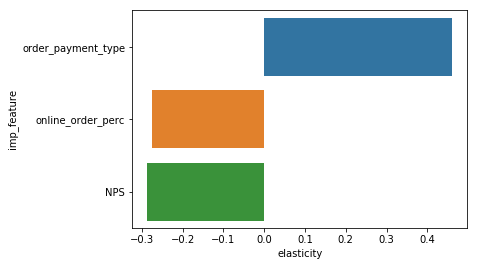

imp_feature   coef  elasticity
0  order_payment_type  0.741       0.460
1   online_order_perc -0.417      -0.275
2                 NPS -0.310      -0.286

In [476]:
elasticity(lm1,gaming_train_lm)

Text(0, 0.5, 'y_pred')

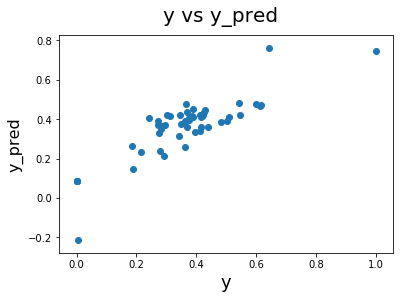

In [477]:
# Plotting y and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y, y_pred)
fig.suptitle('y vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

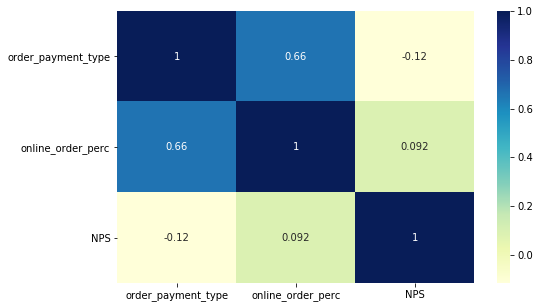

In [478]:
# Figure size
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(gaming_train_lm[features].corr(), cmap="YlGnBu", annot=True)
plt.show()

### Multiplicative Model

In [479]:
ga_week.columns

Index(['week', 'gmv', 'listing_price', 'product_mrp', 'discount', 'sla',
       'product_procurement_sla', 'fsn_id', 'order_payment_type',
       'online_order_perc', 'Date', 'Year', 'Month', 'TV_ads',
       'Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days',
       'cool_deg_days', 'total_rain_mm', 'total_snow_cm', 'snow_on_grnd_cm',
       'MA2_listed_price', 'MA2_discount', 'MA4_discount',
       'lag_1_listed_price', 'lag_2_listed_price', 'lag_3_listed_price',
       'lag_1_discount_offer', 'lag_2_discount_offer', 'lag_3_discount_offer',
       'lag_1_NPS', 'lag_2_NPS', 'lag_3_NPS', 'lag_1_Stock_Index',
       'lag_2_Stock_Index', 'lag_3_Stock_Index', 'lag_1_Special_sales',
       'lag_2_Special_sales', 'lag_3_Special_sales', 'lag_1_Payday',
       'lag_2_Payday', 'lag_3_Payday'],
      dtype='object')

In [480]:
gaming_mm = ga_week[['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA2_listed_price']]         

gaming_mm.head()


gmv  discount   sla  product_procurement_sla  order_payment_type  \
0   17466.000     0.220 2.960                    2.560                  25   
1 1435300.000     0.414 5.170                    3.013                 689   
2 1097388.359     0.429 5.115                    2.514                 534   
3 1158166.000     0.352 5.179                    2.338                 425   
4  742062.000     0.363 5.552                    2.325                 246   

   online_order_perc  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0            100.000   0.054            1.854                  0.000   
1             26.208   0.081            2.780                  0.000   
2             22.418   0.081            2.780                  0.000   
3             21.008   0.081            2.780                  0.000   
4             18.880   0.028            1.139                  0.000   

   Online_marketing_ads    NPS  Stock_Index  Special_sales  Payday  \
0                 0.332 54.600     1177.000          0.000   0.200   
1                 0.498 54.600     1177.000          0.000   0.000   
2                 0.498 54.600     1177.000          0.286   0.143   
3                 0.498 54.600     1177.000          0.000   0.000   
4                 0.192 56.139     1185.286          0.000   0.143   

   heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  \
0          0.100          1.460          0.000          0.000   
1          1.059          2.322          4.155          0.029   
2          0.816          4.722          1.569          0.029   
3          1.632          4.172          1.141          0.029   
4          0.816          5.908          4.341          0.029   

   snow_on_grnd_cm  MA2_listed_price  
0            0.000             0.000  
1            0.041            -0.126  
2            0.041            -0.081  
3            0.041             0.108  
4            0.041            -0.004

In [481]:
### Applying Log 
gaming_mm=np.log(gaming_mm)

gaming_mm = gaming_mm.fillna(0)
gaming_mm = gaming_mm.replace([np.inf, -np.inf], 0)

In [482]:
gaming_mm.head()

gmv  discount   sla  product_procurement_sla  order_payment_type  \
0  9.768    -1.516 1.085                    0.940               3.219   
1 14.177    -0.883 1.643                    1.103               6.535   
2 13.908    -0.847 1.632                    0.922               6.280   
3 13.962    -1.043 1.645                    0.849               6.052   
4 13.517    -1.012 1.714                    0.844               5.505   

   online_order_perc  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0              4.605  -2.922            0.617                 -8.364   
1              3.266  -2.516            1.023                 -7.958   
2              3.110  -2.516            1.023                 -7.958   
3              3.045  -2.516            1.023                 -7.958   
4              2.938  -3.568            0.131                 -9.046   

   Online_marketing_ads   NPS  Stock_Index  Special_sales  Payday  \
0                -1.103 4.000        7.071          0.000  -1.609   
1                -0.698 4.000        7.071          0.000   0.000   
2                -0.698 4.000        7.071         -1.253  -1.946   
3                -0.698 4.000        7.071          0.000   0.000   
4                -1.652 4.028        7.078          0.000  -1.946   

   heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  \
0         -2.303          0.378          0.000          0.000   
1          0.057          0.842          1.424         -3.532   
2         -0.203          1.552          0.451         -3.532   
3          0.490          1.428          0.131         -3.532   
4         -0.203          1.776          1.468         -3.532   

   snow_on_grnd_cm  MA2_listed_price  
0            0.000             0.000  
1           -3.189             0.000  
2           -3.189             0.000  
3           -3.189            -2.222  
4           -3.189             0.000

In [483]:
###  Import the StandardScaler()
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

###  Create a scaling object
# scaler = StandardScaler()
scaler = MinMaxScaler()

###  Create a list of the variables that you need to scale
varlist = ['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA2_listed_price']      



### Scale these variables using 'fit_transform'
gaming_mm[varlist] = scaler.fit_transform(gaming_mm[varlist])

In [484]:
gaming_mm.head()

gmv  discount   sla  product_procurement_sla  order_payment_type  \
0 0.417     0.000 0.000                    0.558               0.403   
1 0.891     0.711 0.687                    0.860               0.819   
2 0.862     0.751 0.674                    0.524               0.787   
3 0.868     0.531 0.689                    0.390               0.758   
4 0.820     0.566 0.774                    0.380               0.690   

   online_order_perc  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0              1.000   0.444            0.382                  0.358   
1              0.709   0.498            0.471                  0.388   
2              0.675   0.498            0.471                  0.388   
3              0.661   0.498            0.471                  0.388   
4              0.638   0.358            0.277                  0.307   

   Online_marketing_ads   NPS  Stock_Index  Special_sales  Payday  \
0                 0.393 0.687        0.734          1.000   0.173   
1                 0.467 0.687        0.734          1.000   1.000   
2                 0.467 0.687        0.734          0.356   0.000   
3                 0.467 0.687        0.734          1.000   1.000   
4                 0.293 0.780        0.768          1.000   0.000   

   heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  \
0          0.000          0.408          0.303          0.895   
1          0.477          0.604          0.736          0.000   
2          0.424          0.905          0.440          0.000   
3          0.564          0.853          0.343          0.000   
4          0.424          1.000          0.750          0.000   

   snow_on_grnd_cm  MA2_listed_price  
0            0.677             1.000  
1            0.000             1.000  
2            0.000             1.000  
3            0.000             0.652  
4            0.000             1.000

In [485]:
### Split the train dataset into X and y
from sklearn.model_selection import train_test_split

x = gaming_mm.drop('gmv',axis=1)
y = gaming_mm['gmv']

gaming_train_mm = gaming_mm

In [486]:
print("X = Independent variable & Y = Target variable")
print(x.shape,y.shape)


X = Independent variable & Y = Target variable
(53, 19) (53,)


In [487]:
### Instantiate
mm = LinearRegression()

### Fit a line
mm.fit(x,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [488]:
### Coefficient values

coef = pd.DataFrame(x.columns)
coef['Coefficient'] = pd.Series(mm.coef_)
coef


0  Coefficient
0                  discount       -0.170
1                       sla        0.185
2   product_procurement_sla        0.023
3        order_payment_type        1.260
4         online_order_perc       -0.480
5                    TV_ads        0.028
6           Sponsorship_ads       -0.035
7     Content_marketing_ads        0.109
8      Online_marketing_ads       -0.044
9                       NPS       -0.027
10              Stock_Index       -0.011
11            Special_sales       -0.002
12                   Payday        0.006
13            heat_deg_days       -0.259
14            cool_deg_days       -0.022
15            total_rain_mm       -0.001
16            total_snow_cm        0.024
17          snow_on_grnd_cm        0.048
18         MA2_listed_price       -0.010

In [489]:
col = x.columns
col

Index(['discount', 'sla', 'product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads', 'Sponsorship_ads',
       'Content_marketing_ads', 'Online_marketing_ads', 'NPS', 'Stock_Index',
       'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days',
       'total_rain_mm', 'total_snow_cm', 'snow_on_grnd_cm',
       'MA2_listed_price'],
      dtype='object')

#### Model Building - Stepwise selection for feature selection

In [490]:
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [491]:
def stepwise_selection(x, y,
                       initial_list=['discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA2_listed_price'],
                       threshold_in=0.01,threshold_out = 0.05, verbose=True):
    
    included = list(initial_list)
    while True:
        changed=False
        ###forward step
        excluded = list(set(x.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
                
                
        ###backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included]))).fit()
        ###use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() ###null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included


In [492]:
import statsmodels.api as sm  

final_features = stepwise_selection(x, y)

print("\n","final_selected_features:",final_features)

Drop total_rain_mm                  with p-value 0.957737
Drop Special_sales                  with p-value 0.910284
Drop TV_ads                         with p-value 0.731239
Drop Online_marketing_ads           with p-value 0.6909
Drop NPS                            with p-value 0.687279
Drop Payday                         with p-value 0.546554
Drop Stock_Index                    with p-value 0.345041
Drop cool_deg_days                  with p-value 0.358326
Drop total_snow_cm                  with p-value 0.313518
Drop MA2_listed_price               with p-value 0.300644
Drop Sponsorship_ads                with p-value 0.180944
Drop product_procurement_sla        with p-value 0.174833

 final_selected_features: ['discount', 'sla', 'order_payment_type', 'online_order_perc', 'Content_marketing_ads', 'heat_deg_days', 'snow_on_grnd_cm']


In [493]:
### Import statsmodels
import statsmodels.api as sm  

### Subsetting training data for 15 selected columns
x_rfe1 = x[final_features]

x_rfe1 = sm.add_constant(x_rfe1)


### Fitting the model with selected variables
mm1 = sm.OLS(y, x_rfe1).fit() 

print(mm1.params)

const                    0.265
discount                -0.169
sla                      0.171
order_payment_type       1.210
online_order_perc       -0.447
Content_marketing_ads    0.108
heat_deg_days           -0.211
snow_on_grnd_cm          0.071
dtype: float64


In [494]:
print(mm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     457.4
Date:                Wed, 08 Jan 2020   Prob (F-statistic):           1.30e-39
Time:                        09:53:44   Log-Likelihood:                 117.68
No. Observations:                  53   AIC:                            -219.4
Df Residuals:                      45   BIC:                            -203.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.26

In [495]:
### Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                  const 64.010
3     order_payment_type 17.390
4      online_order_perc  9.780
2                    sla  3.470
5  Content_marketing_ads  3.400
6          heat_deg_days  3.330
1               discount  2.320
7        snow_on_grnd_cm  1.500

In [496]:
x_rfe1.drop('order_payment_type', axis = 1, inplace = True)

In [497]:
### 2

In [498]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
mm1 = sm.OLS(y, x_rfe1).fit()   
print(mm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     68.65
Date:                Wed, 08 Jan 2020   Prob (F-statistic):           2.72e-21
Time:                        09:53:44   Log-Likelihood:                 65.185
No. Observations:                  53   AIC:                            -116.4
Df Residuals:                      46   BIC:                            -102.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.06

In [499]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                  const 39.420
5          heat_deg_days  3.320
2                    sla  2.620
4  Content_marketing_ads  2.250
3      online_order_perc  1.570
1               discount  1.520
6        snow_on_grnd_cm  1.430

In [500]:
x_rfe1.drop('snow_on_grnd_cm', axis = 1, inplace = True)


In [501]:
### 3

In [502]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
mm1 = sm.OLS(y, x_rfe1).fit()   
print(mm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     84.13
Date:                Wed, 08 Jan 2020   Prob (F-statistic):           2.83e-22
Time:                        09:53:45   Log-Likelihood:                 65.173
No. Observations:                  53   AIC:                            -118.3
Df Residuals:                      47   BIC:                            -106.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.06

In [503]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                  const 39.140
5          heat_deg_days  2.440
2                    sla  2.360
4  Content_marketing_ads  2.240
3      online_order_perc  1.570
1               discount  1.450

In [504]:
features = list(x_rfe1.columns)
features.remove('const')
features

['discount',
 'sla',
 'online_order_perc',
 'Content_marketing_ads',
 'heat_deg_days']

In [505]:
### Model Evaluation on testing data
x_2 = x[features]


### Predicition with selected features on the test data
y_pred = mm1.predict(sm.add_constant(x_2))


In [506]:
### Mean square error (MSE)
mse = np.mean((y_pred - y)**2)
mse

0.005005423283810667

In [507]:
### Coefficient values

coef = pd.DataFrame(x_rfe1.columns)
coef['Coefficient'] = pd.Series(mm.coef_)
coef


0  Coefficient
0                  const       -0.170
1               discount        0.185
2                    sla        0.023
3      online_order_perc        1.260
4  Content_marketing_ads       -0.480
5          heat_deg_days        0.028

In [508]:
### Mean Square Error 
###  Using K-Fold Cross validation evaluating on selected dataset

# lm = LinearRegression()
fold = KFold(10,shuffle = True, random_state = 100)

cv_scores = -cross_val_score(mm,x[features],y,cv=fold,scoring='neg_mean_squared_error')

print("Neg. of MSE:",cv_scores,"\n")
print("Mean of 5 KFold CV - MSE:",cv_scores.mean())

Neg. of MSE: [0.01003218 0.01508857 0.02632569 0.00054549 0.00332375 0.01133216
 0.0037954  0.00094299 0.00456578 0.0156311 ] 

Mean of 5 KFold CV - MSE: 0.00915831103201441


In [509]:
def elasticity(model,x):
    
    features_df = pd.DataFrame(model.params)
    features_df = features_df.rename(columns={0:'coef'})
    
    features_df['imp_feature'] = model.params.index
    features_df = features_df[features_df.imp_feature != 'const'][['imp_feature','coef']]
    features_df.index = range(len(features_df))
#     features

    elasticity_list = list()
    
    for i in range(len(features_df)):
        elasticity_list.append(((features_df.coef[i] * np.mean(x[features_df.imp_feature[i]])) / np.mean(x['gmv'])))

    features_df['elasticity'] = np.round(elasticity_list,3)
    
    sns.barplot(x='elasticity',y='imp_feature',data=features_df)
    plt.show()
    
    return features_df
    

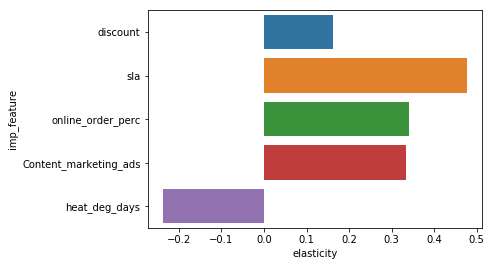

imp_feature   coef  elasticity
0               discount  0.179       0.162
1                    sla  0.509       0.478
2      online_order_perc  0.459       0.340
3  Content_marketing_ads  0.373       0.333
4          heat_deg_days -0.260      -0.238

In [510]:
elasticity(mm1,gaming_train_mm)

Text(0, 0.5, 'y_pred')

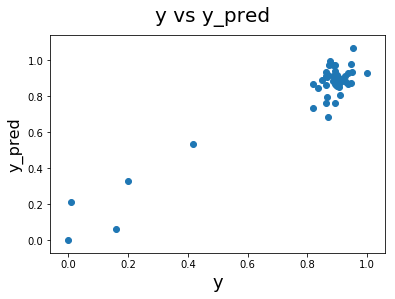

In [511]:
# Plotting y and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y, y_pred)
fig.suptitle('y vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

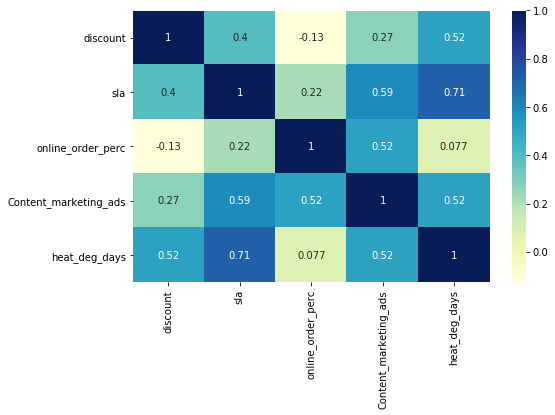

In [512]:
# Figure size
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(gaming_train_mm[features].corr(), cmap="YlGnBu", annot=True)
plt.show()

### Kyock Model

In [513]:
ga_week.columns

Index(['week', 'gmv', 'listing_price', 'product_mrp', 'discount', 'sla',
       'product_procurement_sla', 'fsn_id', 'order_payment_type',
       'online_order_perc', 'Date', 'Year', 'Month', 'TV_ads',
       'Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days',
       'cool_deg_days', 'total_rain_mm', 'total_snow_cm', 'snow_on_grnd_cm',
       'MA2_listed_price', 'MA2_discount', 'MA4_discount',
       'lag_1_listed_price', 'lag_2_listed_price', 'lag_3_listed_price',
       'lag_1_discount_offer', 'lag_2_discount_offer', 'lag_3_discount_offer',
       'lag_1_NPS', 'lag_2_NPS', 'lag_3_NPS', 'lag_1_Stock_Index',
       'lag_2_Stock_Index', 'lag_3_Stock_Index', 'lag_1_Special_sales',
       'lag_2_Special_sales', 'lag_3_Special_sales', 'lag_1_Payday',
       'lag_2_Payday', 'lag_3_Payday'],
      dtype='object')

In [514]:
gaming_km = ga_week[['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA2_listed_price']]           


gaming_km.head()


gmv  discount   sla  product_procurement_sla  order_payment_type  \
0   17466.000     0.220 2.960                    2.560                  25   
1 1435300.000     0.414 5.170                    3.013                 689   
2 1097388.359     0.429 5.115                    2.514                 534   
3 1158166.000     0.352 5.179                    2.338                 425   
4  742062.000     0.363 5.552                    2.325                 246   

   online_order_perc  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0            100.000   0.054            1.854                  0.000   
1             26.208   0.081            2.780                  0.000   
2             22.418   0.081            2.780                  0.000   
3             21.008   0.081            2.780                  0.000   
4             18.880   0.028            1.139                  0.000   

   Online_marketing_ads    NPS  Stock_Index  Special_sales  Payday  \
0                 0.332 54.600     1177.000          0.000   0.200   
1                 0.498 54.600     1177.000          0.000   0.000   
2                 0.498 54.600     1177.000          0.286   0.143   
3                 0.498 54.600     1177.000          0.000   0.000   
4                 0.192 56.139     1185.286          0.000   0.143   

   heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  \
0          0.100          1.460          0.000          0.000   
1          1.059          2.322          4.155          0.029   
2          0.816          4.722          1.569          0.029   
3          1.632          4.172          1.141          0.029   
4          0.816          5.908          4.341          0.029   

   snow_on_grnd_cm  MA2_listed_price  
0            0.000             0.000  
1            0.041            -0.126  
2            0.041            -0.081  
3            0.041             0.108  
4            0.041            -0.004

In [515]:
gaming_km['lag_1_gmv'] = gaming_km['gmv'].shift(-1)

In [516]:
### Checking NaN

gaming_km.isnull().sum()

gmv                        0
discount                   0
sla                        0
product_procurement_sla    0
order_payment_type         0
online_order_perc          0
TV_ads                     1
Sponsorship_ads            1
Content_marketing_ads      1
Online_marketing_ads       1
NPS                        0
Stock_Index                0
Special_sales              0
Payday                     0
heat_deg_days              0
cool_deg_days              0
total_rain_mm              0
total_snow_cm              0
snow_on_grnd_cm            0
MA2_listed_price           0
lag_1_gmv                  1
dtype: int64

In [517]:
gaming_km = gaming_km.fillna(0)

In [518]:
gaming_km.head()

gmv  discount   sla  product_procurement_sla  order_payment_type  \
0   17466.000     0.220 2.960                    2.560                  25   
1 1435300.000     0.414 5.170                    3.013                 689   
2 1097388.359     0.429 5.115                    2.514                 534   
3 1158166.000     0.352 5.179                    2.338                 425   
4  742062.000     0.363 5.552                    2.325                 246   

   online_order_perc  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0            100.000   0.054            1.854                  0.000   
1             26.208   0.081            2.780                  0.000   
2             22.418   0.081            2.780                  0.000   
3             21.008   0.081            2.780                  0.000   
4             18.880   0.028            1.139                  0.000   

   Online_marketing_ads    NPS  Stock_Index  Special_sales  Payday  \
0                 0.332 54.600     1177.000          0.000   0.200   
1                 0.498 54.600     1177.000          0.000   0.000   
2                 0.498 54.600     1177.000          0.286   0.143   
3                 0.498 54.600     1177.000          0.000   0.000   
4                 0.192 56.139     1185.286          0.000   0.143   

   heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  \
0          0.100          1.460          0.000          0.000   
1          1.059          2.322          4.155          0.029   
2          0.816          4.722          1.569          0.029   
3          1.632          4.172          1.141          0.029   
4          0.816          5.908          4.341          0.029   

   snow_on_grnd_cm  MA2_listed_price   lag_1_gmv  
0            0.000             0.000 1435300.000  
1            0.041            -0.126 1097388.359  
2            0.041            -0.081 1158166.000  
3            0.041             0.108  742062.000  
4            0.041            -0.004     391.000

In [519]:
###  Import the StandardScaler()
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

### Create a scaling object
# scaler = StandardScaler()
scaler = MinMaxScaler()

### Create a list of the variables that you need to scale
varlist = ['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA2_listed_price','lag_1_gmv']

### Scale these variables using 'fit_transform'
gaming_km[varlist] = scaler.fit_transform(gaming_km[varlist])

In [520]:
gaming_km.head()

gmv  discount   sla  product_procurement_sla  order_payment_type  \
0 0.004     0.000 0.000                    0.491               0.009   
1 0.363     0.615 0.596                    0.825               0.235   
2 0.278     0.663 0.581                    0.457               0.182   
3 0.293     0.421 0.598                    0.327               0.145   
4 0.188     0.456 0.699                    0.318               0.084   

   online_order_perc  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0              1.000   0.015            0.058                  0.000   
1              0.262   0.023            0.088                  0.000   
2              0.224   0.023            0.088                  0.000   
3              0.210   0.023            0.088                  0.000   
4              0.189   0.008            0.036                  0.000   

   Online_marketing_ads   NPS  Stock_Index  Special_sales  Payday  \
0                 0.036 0.654        0.714          0.000   1.000   
1                 0.054 0.654        0.714          0.000   0.000   
2                 0.054 0.654        0.714          0.286   0.714   
3                 0.054 0.654        0.714          0.000   0.000   
4                 0.021 0.753        0.750          0.000   0.714   

   heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  \
0          0.000          0.247          0.000          0.000   
1          0.069          0.393          0.420          0.019   
2          0.051          0.799          0.159          0.019   
3          0.109          0.706          0.115          0.019   
4          0.051          1.000          0.439          0.019   

   snow_on_grnd_cm  MA2_listed_price  lag_1_gmv  
0            0.000             0.440      0.363  
1            0.009             0.324      0.278  
2            0.009             0.366      0.293  
3            0.009             0.539      0.188  
4            0.009             0.436      0.000

In [521]:
### Split the train dataset into X and y
from sklearn.model_selection import train_test_split
x = gaming_km.drop('gmv',axis=1)
y = gaming_km['gmv']

gaming_train_km = gaming_km

In [522]:
print("X = Independent variable & Y = Target variable")
print(x.shape,y.shape)

X = Independent variable & Y = Target variable
(53, 20) (53,)


In [523]:
###  Instantiate
km = LinearRegression()

###  Fit a line
km.fit(x,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [524]:
###  Coefficient values

coef = pd.DataFrame(x.columns)
coef['Coefficient'] = pd.Series(km.coef_)
coef


0  Coefficient
0                  discount        0.300
1                       sla       -0.236
2   product_procurement_sla        0.096
3        order_payment_type        0.787
4         online_order_perc       -0.359
5                    TV_ads        0.010
6           Sponsorship_ads       -0.156
7     Content_marketing_ads        0.052
8      Online_marketing_ads       -0.053
9                       NPS       -0.511
10              Stock_Index       -0.065
11            Special_sales        0.001
12                   Payday        0.062
13            heat_deg_days       -0.105
14            cool_deg_days        0.066
15            total_rain_mm       -0.037
16            total_snow_cm        0.061
17          snow_on_grnd_cm       -0.031
18         MA2_listed_price        0.296
19                lag_1_gmv        0.079

In [525]:
col = x.columns
col

Index(['discount', 'sla', 'product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads', 'Sponsorship_ads',
       'Content_marketing_ads', 'Online_marketing_ads', 'NPS', 'Stock_Index',
       'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days',
       'total_rain_mm', 'total_snow_cm', 'snow_on_grnd_cm', 'MA2_listed_price',
       'lag_1_gmv'],
      dtype='object')

#### Model Building - Stepwise selection for feature selection

In [526]:
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [527]:
def stepwise_selection(x, y,
                       initial_list=['discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA2_listed_price', 'lag_1_gmv'],
                       threshold_in=0.01,threshold_out = 0.05, verbose=True):
    
    included = list(initial_list)
    while True:
        changed=False
        ### forward step
        excluded = list(set(x.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
                
                
        ###backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included]))).fit()
        ###use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() ###null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included


In [528]:
import statsmodels.api as sm  

final_features = stepwise_selection(x, y)

print("\n","final_selected_features:",final_features)

Drop Special_sales                  with p-value 0.992526
Drop TV_ads                         with p-value 0.925451
Drop snow_on_grnd_cm                with p-value 0.784028
Drop Online_marketing_ads           with p-value 0.796969
Drop Content_marketing_ads          with p-value 0.689461
Drop total_rain_mm                  with p-value 0.552765
Drop cool_deg_days                  with p-value 0.592378
Drop lag_1_gmv                      with p-value 0.512622
Drop total_snow_cm                  with p-value 0.281788
Drop product_procurement_sla        with p-value 0.242238
Drop heat_deg_days                  with p-value 0.159228
Drop Stock_Index                    with p-value 0.252028
Drop Payday                         with p-value 0.135638
Drop Sponsorship_ads                with p-value 0.110298
Drop MA2_listed_price               with p-value 0.0657543
Drop discount                       with p-value 0.166381
Drop sla                            with p-value 0.067094

 final_selec

In [529]:
### Import statsmodels
import statsmodels.api as sm  

### Subsetting training data for 15 selected columns
x_rfe1 = x[final_features]

x_rfe1 = sm.add_constant(x_rfe1)

### Fitting the model with selected variables
km1 = sm.OLS(y, x_rfe1).fit() 

print(km1.params)

const                 0.398
order_payment_type    0.741
online_order_perc    -0.417
NPS                  -0.310
dtype: float64


In [530]:
print(km1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     44.68
Date:                Wed, 08 Jan 2020   Prob (F-statistic):           4.65e-14
Time:                        09:53:47   Log-Likelihood:                 51.794
No. Observations:                  53   AIC:                            -95.59
Df Residuals:                      49   BIC:                            -87.71
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3980      0

In [531]:
### Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0               const 4.310
1  order_payment_type 1.890
2   online_order_perc 1.880
3                 NPS 1.070

In [532]:
features = list(x_rfe1.columns)
features.remove('const')
features

['order_payment_type', 'online_order_perc', 'NPS']

In [533]:
### Model Evaluation on testing data
x_2 = x[features]


### Predicition with selected features on the test data
y_pred = km1.predict(sm.add_constant(x_2))


In [534]:
### Mean square error (MSE)
mse = np.mean((y_pred - y)**2)
mse

0.008292880715894254

In [535]:
### Coefficient values

coef = pd.DataFrame(x_rfe1.columns)
coef['Coefficient'] = pd.Series(km.coef_)
coef


0  Coefficient
0               const        0.300
1  order_payment_type       -0.236
2   online_order_perc        0.096
3                 NPS        0.787

In [536]:
### Using K-Fold Cross validation evaluating on whole dataset

# lm = LinearRegression()
fold = KFold(10,shuffle = True, random_state = 100)

cv_scores = -cross_val_score(km,x[features],y,cv=fold,scoring='neg_mean_squared_error')

print("Neg. of MSE:",cv_scores,"\n")
print("Mean of 5 KFold CV - MSE:",cv_scores.mean())

Neg. of MSE: [0.00549588 0.00642711 0.04440018 0.00358344 0.00856591 0.01019123
 0.01268927 0.00959734 0.02303458 0.00523865] 

Mean of 5 KFold CV - MSE: 0.012922357809211346


In [537]:
def elasticity(model,x):
    
    features_df = pd.DataFrame(model.params)
    features_df = features_df.rename(columns={0:'coef'})
    
    features_df['imp_feature'] = model.params.index
    features_df = features_df[features_df.imp_feature != 'const'][['imp_feature','coef']]
    features_df.index = range(len(features_df))
#      features

    elasticity_list = list()
    
    for i in range(len(features_df)):
        elasticity_list.append(((features_df.coef[i] * np.mean(x[features_df.imp_feature[i]])) / np.mean(x['gmv'])))

    features_df['elasticity'] = np.round(elasticity_list,3)
    
    sns.barplot(x='elasticity',y='imp_feature',data=features_df)
    plt.show()
    
    return features_df
    

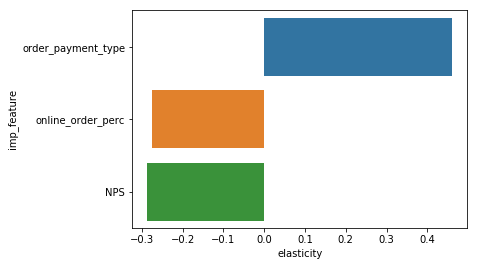

imp_feature   coef  elasticity
0  order_payment_type  0.741       0.460
1   online_order_perc -0.417      -0.275
2                 NPS -0.310      -0.286

In [538]:
elasticity(km1,gaming_train_km)

Text(0, 0.5, 'y_pred')

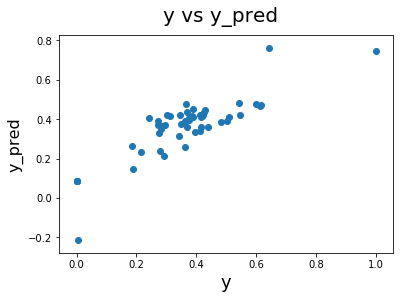

In [539]:
# Plotting y and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y, y_pred)
fig.suptitle('y vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

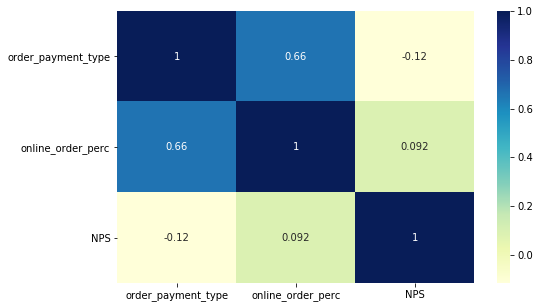

In [540]:
# Figure size
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(gaming_train_km[features].corr(), cmap="YlGnBu", annot=True)
plt.show()

### Distributed Lag Model

In [541]:
gaming_dlm = ga_week[['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA2_listed_price','lag_1_listed_price','lag_1_discount_offer',
       'lag_2_discount_offer','lag_3_discount_offer','lag_2_NPS','lag_3_NPS','lag_1_Stock_Index',
       'lag_2_Stock_Index','lag_3_Stock_Index','lag_1_Special_sales','lag_2_Special_sales','lag_3_Special_sales',
       'lag_1_Payday','lag_2_Payday','lag_3_Payday']]           


gaming_dlm.head()


gmv  discount   sla  product_procurement_sla  order_payment_type  \
0   17466.000     0.220 2.960                    2.560                  25   
1 1435300.000     0.414 5.170                    3.013                 689   
2 1097388.359     0.429 5.115                    2.514                 534   
3 1158166.000     0.352 5.179                    2.338                 425   
4  742062.000     0.363 5.552                    2.325                 246   

   online_order_perc  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0            100.000   0.054            1.854                  0.000   
1             26.208   0.081            2.780                  0.000   
2             22.418   0.081            2.780                  0.000   
3             21.008   0.081            2.780                  0.000   
4             18.880   0.028            1.139                  0.000   

   Online_marketing_ads    NPS  Stock_Index  Special_sales  Payday  \
0                 0.332 54.600     1177.000          0.000   0.200   
1                 0.498 54.600     1177.000          0.000   0.000   
2                 0.498 54.600     1177.000          0.286   0.143   
3                 0.498 54.600     1177.000          0.000   0.000   
4                 0.192 56.139     1185.286          0.000   0.143   

   heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  \
0          0.100          1.460          0.000          0.000   
1          1.059          2.322          4.155          0.029   
2          0.816          4.722          1.569          0.029   
3          1.632          4.172          1.141          0.029   
4          0.816          5.908          4.341          0.029   

   snow_on_grnd_cm  MA2_listed_price  lag_1_listed_price  \
0            0.000             0.000             528.929   
1            0.041            -0.126             449.826   
2            0.041            -0.081             559.134   
3            0.041             0.108             554.214   
4            0.041            -0.004             195.500   

   lag_1_discount_offer  lag_2_discount_offer  lag_3_discount_offer  \
0                 0.414                 0.429                 0.352   
1                 0.429                 0.352                 0.363   
2                 0.352                 0.363                 0.535   
3                 0.363                 0.535                 0.255   
4                 0.535                 0.255                 0.490   

   lag_2_NPS  lag_3_NPS  lag_1_Stock_Index  lag_2_Stock_Index  \
0     54.600     54.600           1177.000           1177.000   
1     54.600     56.139           1177.000           1177.000   
2     56.139     59.987           1177.000           1185.286   
3     59.987     59.987           1185.286           1206.000   
4     59.987     59.987           1206.000           1206.000   

   lag_3_Stock_Index  lag_1_Special_sales  lag_2_Special_sales  \
0           1177.000                0.000                0.286   
1           1185.286                0.286                0.000   
2           1206.000                0.000                0.000   
3           1206.000                0.000                0.000   
4           1206.000                0.000                0.286   

   lag_3_Special_sales  lag_1_Payday  lag_2_Payday  lag_3_Payday  
0                0.000         0.000         0.143         0.000  
1                0.000         0.143         0.000         0.143  
2                0.000         0.000         0.143         0.000  
3                0.286         0.143         0.000         0.143  
4                0.143         0.000         0.143         0.000

In [542]:
gaming_dlm['lag_1_gmv'] = gaming_dlm['gmv'].shift(-1)
gaming_dlm['lag_2_gmv'] = gaming_dlm['gmv'].shift(-2)
gaming_dlm['lag_3_gmv'] = gaming_dlm['gmv'].shift(-3)


In [543]:
### Checking NaN

# gaming_dlm.isnull().sum()

In [544]:
gaming_dlm = gaming_dlm.fillna(0)

In [545]:
gaming_dlm.head()

gmv  discount   sla  product_procurement_sla  order_payment_type  \
0   17466.000     0.220 2.960                    2.560                  25   
1 1435300.000     0.414 5.170                    3.013                 689   
2 1097388.359     0.429 5.115                    2.514                 534   
3 1158166.000     0.352 5.179                    2.338                 425   
4  742062.000     0.363 5.552                    2.325                 246   

   online_order_perc  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0            100.000   0.054            1.854                  0.000   
1             26.208   0.081            2.780                  0.000   
2             22.418   0.081            2.780                  0.000   
3             21.008   0.081            2.780                  0.000   
4             18.880   0.028            1.139                  0.000   

   Online_marketing_ads    NPS  Stock_Index  Special_sales  Payday  \
0                 0.332 54.600     1177.000          0.000   0.200   
1                 0.498 54.600     1177.000          0.000   0.000   
2                 0.498 54.600     1177.000          0.286   0.143   
3                 0.498 54.600     1177.000          0.000   0.000   
4                 0.192 56.139     1185.286          0.000   0.143   

   heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  \
0          0.100          1.460          0.000          0.000   
1          1.059          2.322          4.155          0.029   
2          0.816          4.722          1.569          0.029   
3          1.632          4.172          1.141          0.029   
4          0.816          5.908          4.341          0.029   

   snow_on_grnd_cm  MA2_listed_price  lag_1_listed_price  \
0            0.000             0.000             528.929   
1            0.041            -0.126             449.826   
2            0.041            -0.081             559.134   
3            0.041             0.108             554.214   
4            0.041            -0.004             195.500   

   lag_1_discount_offer  lag_2_discount_offer  lag_3_discount_offer  \
0                 0.414                 0.429                 0.352   
1                 0.429                 0.352                 0.363   
2                 0.352                 0.363                 0.535   
3                 0.363                 0.535                 0.255   
4                 0.535                 0.255                 0.490   

   lag_2_NPS  lag_3_NPS  lag_1_Stock_Index  lag_2_Stock_Index  \
0     54.600     54.600           1177.000           1177.000   
1     54.600     56.139           1177.000           1177.000   
2     56.139     59.987           1177.000           1185.286   
3     59.987     59.987           1185.286           1206.000   
4     59.987     59.987           1206.000           1206.000   

   lag_3_Stock_Index  lag_1_Special_sales  lag_2_Special_sales  \
0           1177.000                0.000                0.286   
1           1185.286                0.286                0.000   
2           1206.000                0.000                0.000   
3           1206.000                0.000                0.000   
4           1206.000                0.000                0.286   

   lag_3_Special_sales  lag_1_Payday  lag_2_Payday  lag_3_Payday   lag_1_gmv  \
0                0.000         0.000         0.143         0.000 1435300.000   
1                0.000         0.143         0.000         0.143 1097388.359   
2                0.000         0.000         0.143         0.000 1158166.000   
3                0.286         0.143         0.000         0.143  742062.000   
4                0.143         0.000         0.143         0.000     391.000   

    lag_2_gmv   lag_3_gmv  
0 1097388.359 1158166.000  
1 1158166.000  742062.000  
2  742062.000     391.000  
3     391.000    1611.000  
4    1611.000     359.000

In [546]:
gaming_dlm.columns

Index(['gmv', 'discount', 'sla', 'product_procurement_sla',
       'order_payment_type', 'online_order_perc', 'TV_ads', 'Sponsorship_ads',
       'Content_marketing_ads', 'Online_marketing_ads', 'NPS', 'Stock_Index',
       'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days',
       'total_rain_mm', 'total_snow_cm', 'snow_on_grnd_cm', 'MA2_listed_price',
       'lag_1_listed_price', 'lag_1_discount_offer', 'lag_2_discount_offer',
       'lag_3_discount_offer', 'lag_2_NPS', 'lag_3_NPS', 'lag_1_Stock_Index',
       'lag_2_Stock_Index', 'lag_3_Stock_Index', 'lag_1_Special_sales',
       'lag_2_Special_sales', 'lag_3_Special_sales', 'lag_1_Payday',
       'lag_2_Payday', 'lag_3_Payday', 'lag_1_gmv', 'lag_2_gmv', 'lag_3_gmv'],
      dtype='object')

In [547]:
###  Import the StandardScaler()
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

###  Create a scaling object
# scaler = StandardScaler()
scaler = MinMaxScaler()


###  Create a list of the variables that you need to scale
varlist = ['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA2_listed_price','lag_1_listed_price','lag_1_discount_offer',
       'lag_2_discount_offer','lag_3_discount_offer','lag_2_NPS','lag_3_NPS','lag_1_Stock_Index',
       'lag_2_Stock_Index','lag_3_Stock_Index','lag_1_Special_sales','lag_2_Special_sales','lag_3_Special_sales',
       'lag_1_Payday','lag_2_Payday','lag_3_Payday']


###  Scale these variables using 'fit_transform'
gaming_dlm[varlist] = scaler.fit_transform(gaming_dlm[varlist])

In [548]:
gaming_dlm.head()

gmv  discount   sla  product_procurement_sla  order_payment_type  \
0 0.004     0.000 0.000                    0.491               0.009   
1 0.363     0.615 0.596                    0.825               0.235   
2 0.278     0.663 0.581                    0.457               0.182   
3 0.293     0.421 0.598                    0.327               0.145   
4 0.188     0.456 0.699                    0.318               0.084   

   online_order_perc  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0              1.000   0.015            0.058                  0.000   
1              0.262   0.023            0.088                  0.000   
2              0.224   0.023            0.088                  0.000   
3              0.210   0.023            0.088                  0.000   
4              0.189   0.008            0.036                  0.000   

   Online_marketing_ads   NPS  Stock_Index  Special_sales  Payday  \
0                 0.036 0.654        0.714          0.000   1.000   
1                 0.054 0.654        0.714          0.000   0.000   
2                 0.054 0.654        0.714          0.286   0.714   
3                 0.054 0.654        0.714          0.000   0.000   
4                 0.021 0.753        0.750          0.000   0.714   

   heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  \
0          0.000          0.247          0.000          0.000   
1          0.069          0.393          0.420          0.019   
2          0.051          0.799          0.159          0.019   
3          0.109          0.706          0.115          0.019   
4          0.051          1.000          0.439          0.019   

   snow_on_grnd_cm  MA2_listed_price  lag_1_listed_price  \
0            0.000             0.440               0.657   
1            0.009             0.324               0.558   
2            0.009             0.366               0.694   
3            0.009             0.539               0.688   
4            0.009             0.436               0.243   

   lag_1_discount_offer  lag_2_discount_offer  lag_3_discount_offer  \
0                 0.773                 0.801                 0.659   
1                 0.801                 0.659                 0.679   
2                 0.659                 0.679                 1.000   
3                 0.679                 1.000                 0.477   
4                 1.000                 0.477                 0.916   

   lag_2_NPS  lag_3_NPS  lag_1_Stock_Index  lag_2_Stock_Index  \
0      0.910      0.910              0.948              0.948   
1      0.910      0.936              0.948              0.948   
2      0.936      1.000              0.948              0.954   
3      1.000      1.000              0.954              0.971   
4      1.000      1.000              0.971              0.971   

   lag_3_Stock_Index  lag_1_Special_sales  lag_2_Special_sales  \
0              0.948                0.000                0.286   
1              0.954                0.286                0.000   
2              0.971                0.000                0.000   
3              0.971                0.000                0.000   
4              0.971                0.000                0.286   

   lag_3_Special_sales  lag_1_Payday  lag_2_Payday  lag_3_Payday   lag_1_gmv  \
0                0.000         0.000         1.000         0.000 1435300.000   
1                0.000         1.000         0.000         1.000 1097388.359   
2                0.000         0.000         1.000         0.000 1158166.000   
3                0.286         1.000         0.000         1.000  742062.000   
4                0.143         0.000         1.000         0.000     391.000   

    lag_2_gmv   lag_3_gmv  
0 1097388.359 1158166.000  
1 1158166.000  742062.000  
2  742062.000     391.000  
3     391.000    1611.000  
4    1611.000     359.000

In [549]:
###  Split the train dataset into X and y
from sklearn.model_selection import train_test_split
x = gaming_dlm.drop('gmv',axis=1)
y = gaming_dlm['gmv']

gaming_train_dlm = gaming_dlm

In [550]:
print("X = Independent variable & Y = Target variable")
print(x.shape,y.shape)

X = Independent variable & Y = Target variable
(53, 37) (53,)


In [551]:
###  Instantiate
dlm = LinearRegression()

###  Fit a line
dlm.fit(x,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [552]:
###  Coefficient values

coef = pd.DataFrame(x.columns)
coef['Coefficient'] = pd.Series(dlm.coef_)
coef


0  Coefficient
0                  discount        0.345
1                       sla       -0.530
2   product_procurement_sla        0.031
3        order_payment_type        0.872
4         online_order_perc       -0.522
5                    TV_ads       -0.087
6           Sponsorship_ads       -0.262
7     Content_marketing_ads        0.208
8      Online_marketing_ads        0.346
9                       NPS       -0.537
10              Stock_Index       -0.107
11            Special_sales       -0.188
12                   Payday        0.106
13            heat_deg_days       -0.121
14            cool_deg_days       -0.207
15            total_rain_mm       -0.106
16            total_snow_cm       -0.271
17          snow_on_grnd_cm        0.354
18         MA2_listed_price        0.753
19       lag_1_listed_price        0.200
20     lag_1_discount_offer        0.224
21     lag_2_discount_offer       -0.368
22     lag_3_discount_offer       -0.273
23                lag_2_NPS       -1.531
24                lag_3_NPS        2.757
25        lag_1_Stock_Index       -0.062
26        lag_2_Stock_Index        1.624
27        lag_3_Stock_Index       -2.481
28      lag_1_Special_sales       -0.186
29      lag_2_Special_sales       -0.026
30      lag_3_Special_sales       -0.270
31             lag_1_Payday        0.262
32             lag_2_Payday        0.178
33             lag_3_Payday       -0.026
34                lag_1_gmv       -0.000
35                lag_2_gmv       -0.000
36                lag_3_gmv        0.000

In [553]:
col = x.columns
col

Index(['discount', 'sla', 'product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads', 'Sponsorship_ads',
       'Content_marketing_ads', 'Online_marketing_ads', 'NPS', 'Stock_Index',
       'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days',
       'total_rain_mm', 'total_snow_cm', 'snow_on_grnd_cm', 'MA2_listed_price',
       'lag_1_listed_price', 'lag_1_discount_offer', 'lag_2_discount_offer',
       'lag_3_discount_offer', 'lag_2_NPS', 'lag_3_NPS', 'lag_1_Stock_Index',
       'lag_2_Stock_Index', 'lag_3_Stock_Index', 'lag_1_Special_sales',
       'lag_2_Special_sales', 'lag_3_Special_sales', 'lag_1_Payday',
       'lag_2_Payday', 'lag_3_Payday', 'lag_1_gmv', 'lag_2_gmv', 'lag_3_gmv'],
      dtype='object')

#### Model Building - Stepwise selection for feature selection

In [554]:
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [555]:
def stepwise_selection(x, y,
                       initial_list=['discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA2_listed_price','lag_1_listed_price','lag_1_discount_offer',
       'lag_2_discount_offer','lag_3_discount_offer','lag_2_NPS','lag_3_NPS','lag_1_Stock_Index',
       'lag_2_Stock_Index','lag_3_Stock_Index','lag_1_Special_sales','lag_2_Special_sales','lag_3_Special_sales',
       'lag_1_Payday','lag_2_Payday','lag_3_Payday'],
                     threshold_in=0.01,threshold_out = 0.05, verbose=True):
    
    included = list(initial_list)
    while True:
        changed=False
        ###  forward step
        excluded = list(set(x.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
                
                
        ###  backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included]))).fit()
        ###  use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() ###  null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included


In [556]:
import statsmodels.api as sm  

final_features = stepwise_selection(x, y)

print("\n","final_selected_features:",final_features)

Drop lag_1_discount_offer           with p-value 0.938578
Drop Content_marketing_ads          with p-value 0.831104
Drop lag_1_Stock_Index              with p-value 0.798447
Drop heat_deg_days                  with p-value 0.768463
Drop cool_deg_days                  with p-value 0.621441
Drop lag_2_Special_sales            with p-value 0.610365
Drop lag_2_Payday                   with p-value 0.608415
Drop Stock_Index                    with p-value 0.379062
Drop TV_ads                         with p-value 0.473715
Drop lag_3_Special_sales            with p-value 0.393133
Drop snow_on_grnd_cm                with p-value 0.466696
Drop lag_2_NPS                      with p-value 0.198823
Drop lag_1_listed_price             with p-value 0.175907
Drop Special_sales                  with p-value 0.216652
Drop Payday                         with p-value 0.224813
Drop lag_1_Payday                   with p-value 0.494812
Drop Online_marketing_ads           with p-value 0.193183
Drop total_rai

In [557]:
###  Import statsmodels
import statsmodels.api as sm  

###  Subsetting training data for 15 selected columns
x_rfe1 = x[final_features]

x_rfe1 = sm.add_constant(x_rfe1)

###  Fitting the model with selected variables
dlm1 = sm.OLS(y, x_rfe1).fit() 

print(dlm1.params)

const                 0.614
sla                  -0.235
order_payment_type    0.904
online_order_perc    -0.473
NPS                  -0.497
lag_3_NPS             0.825
lag_3_Stock_Index    -0.738
dtype: float64


In [558]:
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     36.97
Date:                Wed, 08 Jan 2020   Prob (F-statistic):           5.29e-16
Time:                        09:53:53   Log-Likelihood:                 63.558
No. Observations:                  53   AIC:                            -113.1
Df Residuals:                      46   BIC:                            -99.32
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.6142      0

In [559]:
###  Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0               const 62.200
6   lag_3_Stock_Index 11.750
5           lag_3_NPS 11.550
2  order_payment_type  2.630
3   online_order_perc  2.350
1                 sla  2.060
4                 NPS  1.960

In [560]:
x_rfe1.drop('lag_3_Stock_Index', axis = 1, inplace = True)

In [561]:
### 2

In [562]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     28.66
Date:                Wed, 08 Jan 2020   Prob (F-statistic):           3.29e-13
Time:                        09:53:53   Log-Likelihood:                 53.934
No. Observations:                  53   AIC:                            -95.87
Df Residuals:                      47   BIC:                            -84.05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5082      0

In [563]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0               const 57.380
2  order_payment_type  2.540
3   online_order_perc  2.340
1                 sla  2.010
4                 NPS  1.510
5           lag_3_NPS  1.030

In [564]:
x_rfe1.drop('lag_3_NPS', axis = 1, inplace = True)


In [565]:
### 3

In [566]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     36.10
Date:                Wed, 08 Jan 2020   Prob (F-statistic):           6.42e-14
Time:                        09:53:53   Log-Likelihood:                 53.664
No. Observations:                  53   AIC:                            -97.33
Df Residuals:                      48   BIC:                            -87.48
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5433      0

In [567]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0               const 41.670
2  order_payment_type  2.520
3   online_order_perc  2.340
1                 sla  2.000
4                 NPS  1.490

In [568]:
x_rfe1.drop('sla', axis = 1, inplace = True)


In [569]:
### 4

In [570]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     44.68
Date:                Wed, 08 Jan 2020   Prob (F-statistic):           4.65e-14
Time:                        09:53:53   Log-Likelihood:                 51.794
No. Observations:                  53   AIC:                            -95.59
Df Residuals:                      49   BIC:                            -87.71
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3980      0

In [571]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0               const 4.310
1  order_payment_type 1.890
2   online_order_perc 1.880
3                 NPS 1.070

In [572]:
features = list(x_rfe1.columns)
features.remove('const')
features

['order_payment_type', 'online_order_perc', 'NPS']

In [573]:
###  Model Evaluation on testing data
x_2 = x[features]

###  Predicition with selected features on the test data
y_pred = dlm1.predict(sm.add_constant(x_2))

In [574]:
###  Mean square error (MSE)
mse = np.mean((y_pred - y)**2)
mse


0.008292880715894254

In [575]:
###  Coefficient values

coef = pd.DataFrame(x_rfe1.columns)
coef['Coefficient'] = pd.Series(dlm.coef_)
coef


0  Coefficient
0               const        0.345
1  order_payment_type       -0.530
2   online_order_perc        0.031
3                 NPS        0.872

In [576]:
###  Using K-Fold Cross validation evaluating on whole dataset

# lm = LinearRegression()
fold = KFold(10,shuffle = True, random_state = 100)

cv_scores = -cross_val_score(dlm,x[features],y,cv=fold,scoring='neg_mean_squared_error')

print("Neg. of MSE:",cv_scores,"\n")
print("Mean of 5 KFold CV - MSE:",cv_scores.mean())

Neg. of MSE: [0.00549588 0.00642711 0.04440018 0.00358344 0.00856591 0.01019123
 0.01268927 0.00959734 0.02303458 0.00523865] 

Mean of 5 KFold CV - MSE: 0.012922357809211346


In [577]:
def elasticity(model,x):
    
    features_df = pd.DataFrame(model.params)
    features_df = features_df.rename(columns={0:'coef'})
    
    features_df['imp_feature'] = model.params.index
    features_df = features_df[features_df.imp_feature != 'const'][['imp_feature','coef']]
    features_df.index = range(len(features_df))
#      features

    elasticity_list = list()
    
    for i in range(len(features_df)):
        elasticity_list.append(((features_df.coef[i] * np.mean(x[features_df.imp_feature[i]])) / np.mean(x['gmv'])))

    features_df['elasticity'] = np.round(elasticity_list,3)
    
    sns.barplot(x='elasticity',y='imp_feature',data=features_df)
    plt.show()
    
    return features_df
    

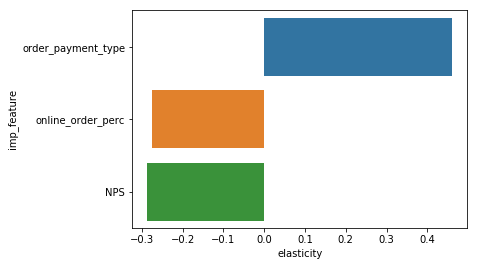

imp_feature   coef  elasticity
0  order_payment_type  0.741       0.460
1   online_order_perc -0.417      -0.275
2                 NPS -0.310      -0.286

In [578]:
elasticity(dlm1,gaming_train_dlm)

Text(0, 0.5, 'y_pred')

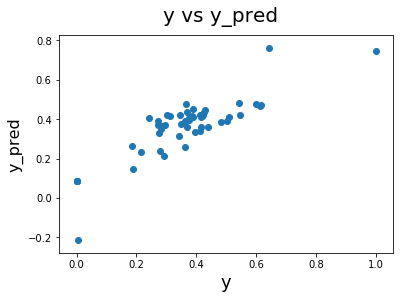

In [579]:
# Plotting y and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y, y_pred)
fig.suptitle('y vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

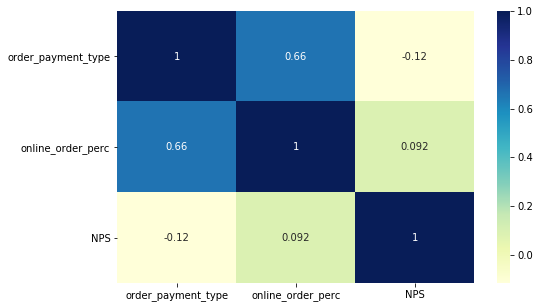

In [580]:
# Figure size
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(gaming_train_dlm[features].corr(), cmap="YlGnBu", annot=True)
plt.show()

### Distributed + Multiplicative Lag Model

In [581]:
gaming_dlmm = ga_week[['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA2_listed_price','lag_1_listed_price','lag_1_discount_offer',
       'lag_2_discount_offer','lag_3_discount_offer','lag_2_NPS','lag_3_NPS','lag_1_Stock_Index',
       'lag_2_Stock_Index','lag_3_Stock_Index','lag_1_Special_sales','lag_2_Special_sales','lag_3_Special_sales',
       'lag_1_Payday','lag_2_Payday','lag_3_Payday']]           


gaming_dlmm.head()


gmv  discount   sla  product_procurement_sla  order_payment_type  \
0   17466.000     0.220 2.960                    2.560                  25   
1 1435300.000     0.414 5.170                    3.013                 689   
2 1097388.359     0.429 5.115                    2.514                 534   
3 1158166.000     0.352 5.179                    2.338                 425   
4  742062.000     0.363 5.552                    2.325                 246   

   online_order_perc  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0            100.000   0.054            1.854                  0.000   
1             26.208   0.081            2.780                  0.000   
2             22.418   0.081            2.780                  0.000   
3             21.008   0.081            2.780                  0.000   
4             18.880   0.028            1.139                  0.000   

   Online_marketing_ads    NPS  Stock_Index  Special_sales  Payday  \
0                 0.332 54.600     1177.000          0.000   0.200   
1                 0.498 54.600     1177.000          0.000   0.000   
2                 0.498 54.600     1177.000          0.286   0.143   
3                 0.498 54.600     1177.000          0.000   0.000   
4                 0.192 56.139     1185.286          0.000   0.143   

   heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  \
0          0.100          1.460          0.000          0.000   
1          1.059          2.322          4.155          0.029   
2          0.816          4.722          1.569          0.029   
3          1.632          4.172          1.141          0.029   
4          0.816          5.908          4.341          0.029   

   snow_on_grnd_cm  MA2_listed_price  lag_1_listed_price  \
0            0.000             0.000             528.929   
1            0.041            -0.126             449.826   
2            0.041            -0.081             559.134   
3            0.041             0.108             554.214   
4            0.041            -0.004             195.500   

   lag_1_discount_offer  lag_2_discount_offer  lag_3_discount_offer  \
0                 0.414                 0.429                 0.352   
1                 0.429                 0.352                 0.363   
2                 0.352                 0.363                 0.535   
3                 0.363                 0.535                 0.255   
4                 0.535                 0.255                 0.490   

   lag_2_NPS  lag_3_NPS  lag_1_Stock_Index  lag_2_Stock_Index  \
0     54.600     54.600           1177.000           1177.000   
1     54.600     56.139           1177.000           1177.000   
2     56.139     59.987           1177.000           1185.286   
3     59.987     59.987           1185.286           1206.000   
4     59.987     59.987           1206.000           1206.000   

   lag_3_Stock_Index  lag_1_Special_sales  lag_2_Special_sales  \
0           1177.000                0.000                0.286   
1           1185.286                0.286                0.000   
2           1206.000                0.000                0.000   
3           1206.000                0.000                0.000   
4           1206.000                0.000                0.286   

   lag_3_Special_sales  lag_1_Payday  lag_2_Payday  lag_3_Payday  
0                0.000         0.000         0.143         0.000  
1                0.000         0.143         0.000         0.143  
2                0.000         0.000         0.143         0.000  
3                0.286         0.143         0.000         0.143  
4                0.143         0.000         0.143         0.000

In [582]:
gaming_dlmm['lag_1_gmv'] = gaming_dlmm['gmv'].shift(-1)
gaming_dlmm['lag_2_gmv'] = gaming_dlmm['gmv'].shift(-2)
gaming_dlmm['lag_3_gmv'] = gaming_dlmm['gmv'].shift(-3)


In [583]:
### Checking NaN

gaming_dlmm.isnull().sum()

gmv                        0
discount                   0
sla                        0
product_procurement_sla    0
order_payment_type         0
online_order_perc          0
TV_ads                     1
Sponsorship_ads            1
Content_marketing_ads      1
Online_marketing_ads       1
NPS                        0
Stock_Index                0
Special_sales              0
Payday                     0
heat_deg_days              0
cool_deg_days              0
total_rain_mm              0
total_snow_cm              0
snow_on_grnd_cm            0
MA2_listed_price           0
lag_1_listed_price         0
lag_1_discount_offer       0
lag_2_discount_offer       0
lag_3_discount_offer       0
lag_2_NPS                  0
lag_3_NPS                  0
lag_1_Stock_Index          0
lag_2_Stock_Index          0
lag_3_Stock_Index          0
lag_1_Special_sales        0
lag_2_Special_sales        0
lag_3_Special_sales        0
lag_1_Payday               0
lag_2_Payday               0
lag_3_Payday  

In [584]:
gaming_dlmm = gaming_dlmm.fillna(0)

In [585]:
### Applying Log 
gaming_dlmm=np.log(gaming_dlmm)

gaming_dlmm = gaming_dlmm.fillna(0)
gaming_dlmm = gaming_dlmm.replace([np.inf, -np.inf], 0)

In [586]:
gaming_dlmm.head()

gmv  discount   sla  product_procurement_sla  order_payment_type  \
0  9.768    -1.516 1.085                    0.940               3.219   
1 14.177    -0.883 1.643                    1.103               6.535   
2 13.908    -0.847 1.632                    0.922               6.280   
3 13.962    -1.043 1.645                    0.849               6.052   
4 13.517    -1.012 1.714                    0.844               5.505   

   online_order_perc  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0              4.605  -2.922            0.617                 -8.364   
1              3.266  -2.516            1.023                 -7.958   
2              3.110  -2.516            1.023                 -7.958   
3              3.045  -2.516            1.023                 -7.958   
4              2.938  -3.568            0.131                 -9.046   

   Online_marketing_ads   NPS  Stock_Index  Special_sales  Payday  \
0                -1.103 4.000        7.071          0.000  -1.609   
1                -0.698 4.000        7.071          0.000   0.000   
2                -0.698 4.000        7.071         -1.253  -1.946   
3                -0.698 4.000        7.071          0.000   0.000   
4                -1.652 4.028        7.078          0.000  -1.946   

   heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  \
0         -2.303          0.378          0.000          0.000   
1          0.057          0.842          1.424         -3.532   
2         -0.203          1.552          0.451         -3.532   
3          0.490          1.428          0.131         -3.532   
4         -0.203          1.776          1.468         -3.532   

   snow_on_grnd_cm  MA2_listed_price  lag_1_listed_price  \
0            0.000             0.000               6.271   
1           -3.189             0.000               6.109   
2           -3.189             0.000               6.326   
3           -3.189            -2.222               6.318   
4           -3.189             0.000               5.276   

   lag_1_discount_offer  lag_2_discount_offer  lag_3_discount_offer  \
0                -0.883                -0.847                -1.043   
1                -0.847                -1.043                -1.012   
2                -1.043                -1.012                -0.625   
3                -1.012                -0.625                -1.366   
4                -0.625                -1.366                -0.713   

   lag_2_NPS  lag_3_NPS  lag_1_Stock_Index  lag_2_Stock_Index  \
0      4.000      4.000              7.071              7.071   
1      4.000      4.028              7.071              7.071   
2      4.028      4.094              7.071              7.078   
3      4.094      4.094              7.078              7.095   
4      4.094      4.094              7.095              7.095   

   lag_3_Stock_Index  lag_1_Special_sales  lag_2_Special_sales  \
0              7.071                0.000               -1.253   
1              7.078               -1.253                0.000   
2              7.095                0.000                0.000   
3              7.095                0.000                0.000   
4              7.095                0.000               -1.253   

   lag_3_Special_sales  lag_1_Payday  lag_2_Payday  lag_3_Payday  lag_1_gmv  \
0                0.000         0.000        -1.946         0.000     14.177   
1                0.000        -1.946         0.000        -1.946     13.908   
2                0.000         0.000        -1.946         0.000     13.962   
3               -1.253        -1.946         0.000        -1.946     13.517   
4               -1.946         0.000        -1.946         0.000      5.969   

   lag_2_gmv  lag_3_gmv  
0     13.908     13.962  
1     13.962     13.517  
2     13.517      5.969  
3      5.969      7.385  
4      7.385      5.883

In [587]:
gaming_dlmm.columns

Index(['gmv', 'discount', 'sla', 'product_procurement_sla',
       'order_payment_type', 'online_order_perc', 'TV_ads', 'Sponsorship_ads',
       'Content_marketing_ads', 'Online_marketing_ads', 'NPS', 'Stock_Index',
       'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days',
       'total_rain_mm', 'total_snow_cm', 'snow_on_grnd_cm', 'MA2_listed_price',
       'lag_1_listed_price', 'lag_1_discount_offer', 'lag_2_discount_offer',
       'lag_3_discount_offer', 'lag_2_NPS', 'lag_3_NPS', 'lag_1_Stock_Index',
       'lag_2_Stock_Index', 'lag_3_Stock_Index', 'lag_1_Special_sales',
       'lag_2_Special_sales', 'lag_3_Special_sales', 'lag_1_Payday',
       'lag_2_Payday', 'lag_3_Payday', 'lag_1_gmv', 'lag_2_gmv', 'lag_3_gmv'],
      dtype='object')

In [588]:
###  Import the StandardScaler()
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

###  Create a scaling object
# scaler = StandardScaler()
scaler = MinMaxScaler()


###  Create a list of the variables that you need to scale
varlist = ['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA2_listed_price','lag_1_listed_price','lag_1_discount_offer',
       'lag_2_discount_offer','lag_3_discount_offer','lag_2_NPS','lag_3_NPS','lag_1_Stock_Index',
       'lag_2_Stock_Index','lag_3_Stock_Index','lag_1_Special_sales','lag_2_Special_sales','lag_3_Special_sales',
       'lag_1_Payday','lag_2_Payday','lag_3_Payday']


###  Scale these variables using 'fit_transform'
gaming_dlmm[varlist] = scaler.fit_transform(gaming_dlmm[varlist])


In [589]:
gaming_dlmm.head()

gmv  discount   sla  product_procurement_sla  order_payment_type  \
0 0.417     0.000 0.000                    0.558               0.403   
1 0.891     0.711 0.687                    0.860               0.819   
2 0.862     0.751 0.674                    0.524               0.787   
3 0.868     0.531 0.689                    0.390               0.758   
4 0.820     0.566 0.774                    0.380               0.690   

   online_order_perc  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0              1.000   0.444            0.382                  0.358   
1              0.709   0.498            0.471                  0.388   
2              0.675   0.498            0.471                  0.388   
3              0.661   0.498            0.471                  0.388   
4              0.638   0.358            0.277                  0.307   

   Online_marketing_ads   NPS  Stock_Index  Special_sales  Payday  \
0                 0.393 0.687        0.734          1.000   0.173   
1                 0.467 0.687        0.734          1.000   1.000   
2                 0.467 0.687        0.734          0.356   0.000   
3                 0.467 0.687        0.734          1.000   1.000   
4                 0.293 0.780        0.768          1.000   0.000   

   heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  \
0          0.000          0.408          0.303          0.895   
1          0.477          0.604          0.736          0.000   
2          0.424          0.905          0.440          0.000   
3          0.564          0.853          0.343          0.000   
4          0.424          1.000          0.750          0.000   

   snow_on_grnd_cm  MA2_listed_price  lag_1_listed_price  \
0            0.677             1.000               0.937   
1            0.000             1.000               0.913   
2            0.000             1.000               0.945   
3            0.000             0.652               0.944   
4            0.000             1.000               0.788   

   lag_1_discount_offer  lag_2_discount_offer  lag_3_discount_offer  \
0                 0.354                 0.380                 0.237   
1                 0.380                 0.237                 0.259   
2                 0.237                 0.259                 0.542   
3                 0.259                 0.542                 0.000   
4                 0.542                 0.000                 0.478   

   lag_2_NPS  lag_3_NPS  lag_1_Stock_Index  lag_2_Stock_Index  \
0      0.977      0.977              0.992              0.992   
1      0.977      0.984              0.992              0.992   
2      0.984      1.000              0.992              0.993   
3      1.000      1.000              0.993              0.996   
4      1.000      1.000              0.996              0.996   

   lag_3_Stock_Index  lag_1_Special_sales  lag_2_Special_sales  \
0              0.992                1.000                0.356   
1              0.993                0.356                1.000   
2              0.996                1.000                1.000   
3              0.996                1.000                1.000   
4              0.996                1.000                0.356   

   lag_3_Special_sales  lag_1_Payday  lag_2_Payday  lag_3_Payday  lag_1_gmv  \
0                1.000         1.000         0.000         1.000     14.177   
1                1.000         0.000         1.000         0.000     13.908   
2                1.000         1.000         0.000         1.000     13.962   
3                0.356         0.000         1.000         0.000     13.517   
4                0.000         1.000         0.000         1.000      5.969   

   lag_2_gmv  lag_3_gmv  
0     13.908     13.962  
1     13.962     13.517  
2     13.517      5.969  
3      5.969      7.385  
4      7.385      5.883

In [590]:
###  Split the train dataset into X and y
from sklearn.model_selection import train_test_split
x = gaming_dlmm.drop('gmv',axis=1)
y = gaming_dlmm['gmv']

gaming_train_dlmm = gaming_dlmm

In [591]:
print("X = Independent variable & Y = Target variable")
print(x.shape,y.shape)

X = Independent variable & Y = Target variable
(53, 37) (53,)


In [592]:
###  Instantiate
dlm = LinearRegression()

###  Fit a line
dlm.fit(x,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [593]:
###  Coefficient values

coef = pd.DataFrame(x.columns)
coef['Coefficient'] = pd.Series(dlm.coef_)
coef


0  Coefficient
0                  discount       -0.218
1                       sla        0.026
2   product_procurement_sla       -0.050
3        order_payment_type        1.061
4         online_order_perc       -0.431
5                    TV_ads       -0.181
6           Sponsorship_ads        0.054
7     Content_marketing_ads       -0.203
8      Online_marketing_ads        0.422
9                       NPS       -0.041
10              Stock_Index       -0.024
11            Special_sales       -0.013
12                   Payday        0.004
13            heat_deg_days        0.023
14            cool_deg_days        0.022
15            total_rain_mm        0.005
16            total_snow_cm       -0.029
17          snow_on_grnd_cm        0.027
18         MA2_listed_price        0.009
19       lag_1_listed_price       -1.210
20     lag_1_discount_offer       -0.143
21     lag_2_discount_offer       -0.158
22     lag_3_discount_offer       -0.158
23                lag_2_NPS       -0.184
24                lag_3_NPS        1.391
25        lag_1_Stock_Index        0.564
26        lag_2_Stock_Index       -0.058
27        lag_3_Stock_Index       -1.408
28      lag_1_Special_sales       -0.002
29      lag_2_Special_sales       -0.032
30      lag_3_Special_sales       -0.037
31             lag_1_Payday       -0.004
32             lag_2_Payday        0.011
33             lag_3_Payday        0.018
34                lag_1_gmv        0.020
35                lag_2_gmv        0.010
36                lag_3_gmv       -0.004

In [594]:
col = x.columns
col

Index(['discount', 'sla', 'product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads', 'Sponsorship_ads',
       'Content_marketing_ads', 'Online_marketing_ads', 'NPS', 'Stock_Index',
       'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days',
       'total_rain_mm', 'total_snow_cm', 'snow_on_grnd_cm', 'MA2_listed_price',
       'lag_1_listed_price', 'lag_1_discount_offer', 'lag_2_discount_offer',
       'lag_3_discount_offer', 'lag_2_NPS', 'lag_3_NPS', 'lag_1_Stock_Index',
       'lag_2_Stock_Index', 'lag_3_Stock_Index', 'lag_1_Special_sales',
       'lag_2_Special_sales', 'lag_3_Special_sales', 'lag_1_Payday',
       'lag_2_Payday', 'lag_3_Payday', 'lag_1_gmv', 'lag_2_gmv', 'lag_3_gmv'],
      dtype='object')

#### Model Building - Stepwise selection for feature selection

In [595]:
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [596]:
def stepwise_selection(x, y,
                       initial_list=['discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA2_listed_price','lag_1_listed_price','lag_1_discount_offer',
       'lag_2_discount_offer','lag_3_discount_offer','lag_2_NPS','lag_3_NPS','lag_1_Stock_Index',
       'lag_2_Stock_Index','lag_3_Stock_Index','lag_1_Special_sales','lag_2_Special_sales','lag_3_Special_sales',
       'lag_1_Payday','lag_2_Payday','lag_3_Payday'],
                     threshold_in=0.01,threshold_out = 0.05, verbose=True):
    
    included = list(initial_list)
    while True:
        changed=False
        ###  forward step
        excluded = list(set(x.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
                
                
        ###  backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included]))).fit()
        ###  use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() ###  null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included


In [597]:
import statsmodels.api as sm  

final_features = stepwise_selection(x, y)

print("\n","final_selected_features:",final_features)

Add  lag_1_gmv                      with p-value 0.00019392
Drop lag_2_Stock_Index              with p-value 0.986916
Drop heat_deg_days                  with p-value 0.963437
Drop total_rain_mm                  with p-value 0.869648
Drop lag_3_Special_sales            with p-value 0.766656
Drop MA2_listed_price               with p-value 0.797564
Drop lag_1_Payday                   with p-value 0.706382
Drop Payday                         with p-value 0.58429
Drop product_procurement_sla        with p-value 0.476213
Drop lag_1_Special_sales            with p-value 0.357294
Drop Special_sales                  with p-value 0.347236
Drop sla                            with p-value 0.612892
Drop Sponsorship_ads                with p-value 0.194845
Drop snow_on_grnd_cm                with p-value 0.225057
Drop lag_2_Payday                   with p-value 0.298624
Drop cool_deg_days                  with p-value 0.0897384
Drop lag_2_Special_sales            with p-value 0.0971889
Drop Conten

In [598]:
###  Import statsmodels
import statsmodels.api as sm  

###  Subsetting training data for 15 selected columns
x_rfe1 = x[final_features]

x_rfe1 = sm.add_constant(x_rfe1)

###  Fitting the model with selected variables
dlm1 = sm.OLS(y, x_rfe1).fit() 

print(dlm1.params)

const                   0.924
discount               -0.183
order_payment_type      1.103
online_order_perc      -0.414
TV_ads                 -0.206
Online_marketing_ads    0.266
NPS                    -0.063
Stock_Index            -0.026
lag_1_listed_price     -1.194
lag_1_discount_offer   -0.179
lag_2_discount_offer   -0.147
lag_3_discount_offer   -0.082
lag_2_NPS              -0.104
lag_3_NPS               1.284
lag_1_Stock_Index       0.666
lag_3_Stock_Index      -1.329
lag_1_gmv               0.019
dtype: float64


In [599]:
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     610.5
Date:                Wed, 08 Jan 2020   Prob (F-statistic):           6.91e-39
Time:                        09:53:57   Log-Likelihood:                 152.87
No. Observations:                  53   AIC:                            -271.7
Df Residuals:                      36   BIC:                            -238.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.9242 

In [600]:
###  Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
0                  const 1189.710
15     lag_3_Stock_Index  410.900
13             lag_3_NPS  398.240
8     lag_1_listed_price  119.400
14     lag_1_Stock_Index   81.710
5   Online_marketing_ads   79.570
4                 TV_ads   39.310
2     order_payment_type   20.260
6                    NPS   10.410
3      online_order_perc   10.250
12             lag_2_NPS    8.020
16             lag_1_gmv    6.790
9   lag_1_discount_offer    6.430
11  lag_3_discount_offer    6.430
10  lag_2_discount_offer    6.210
1               discount    3.540
7            Stock_Index    2.380

In [601]:
x_rfe1.drop('lag_3_Stock_Index', axis = 1, inplace = True)

In [602]:
### 2

In [603]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     298.6
Date:                Wed, 08 Jan 2020   Prob (F-statistic):           7.11e-34
Time:                        09:53:57   Log-Likelihood:                 131.61
No. Observations:                  53   AIC:                            -231.2
Df Residuals:                      37   BIC:                            -199.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.7802 

In [604]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
0                  const 1097.650
8     lag_1_listed_price  119.380
14     lag_1_Stock_Index   81.690
5   Online_marketing_ads   71.860
4                 TV_ads   39.310
2     order_payment_type   16.270
6                    NPS   10.400
3      online_order_perc   10.170
13             lag_3_NPS    7.670
12             lag_2_NPS    7.380
15             lag_1_gmv    6.690
9   lag_1_discount_offer    6.400
11  lag_3_discount_offer    6.090
10  lag_2_discount_offer    5.310
1               discount    3.540
7            Stock_Index    2.090

In [605]:
x_rfe1.drop('lag_3_discount_offer', axis = 1, inplace = True)


In [606]:
### 3

In [607]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     325.4
Date:                Wed, 08 Jan 2020   Prob (F-statistic):           4.61e-35
Time:                        09:53:57   Log-Likelihood:                 131.35
No. Observations:                  53   AIC:                            -232.7
Df Residuals:                      38   BIC:                            -203.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.7456 

In [608]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                  const 798.830
8     lag_1_listed_price 111.320
13     lag_1_Stock_Index  75.450
5   Online_marketing_ads  64.600
4                 TV_ads  36.990
2     order_payment_type  15.530
6                    NPS  10.220
3      online_order_perc   9.630
11             lag_2_NPS   7.310
14             lag_1_gmv   6.490
9   lag_1_discount_offer   6.200
10  lag_2_discount_offer   5.220
1               discount   3.060
12             lag_3_NPS   3.000
7            Stock_Index   2.010

In [609]:
x_rfe1.drop('lag_2_NPS', axis = 1, inplace = True)


In [610]:
### 4

In [611]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     354.7
Date:                Wed, 08 Jan 2020   Prob (F-statistic):           3.09e-36
Time:                        09:53:57   Log-Likelihood:                 130.99
No. Observations:                  53   AIC:                            -234.0
Df Residuals:                      39   BIC:                            -206.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.7241 

In [612]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                  const 716.680
8     lag_1_listed_price 103.770
12     lag_1_Stock_Index  70.460
5   Online_marketing_ads  59.580
4                 TV_ads  35.360
2     order_payment_type  15.480
6                    NPS   9.730
3      online_order_perc   9.490
13             lag_1_gmv   6.450
9   lag_1_discount_offer   6.170
1               discount   2.960
10  lag_2_discount_offer   2.740
11             lag_3_NPS   2.060
7            Stock_Index   2.000

In [613]:
x_rfe1.drop('lag_2_discount_offer', axis = 1, inplace = True)


In [614]:
### 5

In [615]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     391.3
Date:                Wed, 08 Jan 2020   Prob (F-statistic):           1.74e-37
Time:                        09:53:57   Log-Likelihood:                 130.80
No. Observations:                  53   AIC:                            -235.6
Df Residuals:                      40   BIC:                            -210.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.7052 

In [616]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                  const 597.740
8     lag_1_listed_price  97.180
11     lag_1_Stock_Index  60.380
5   Online_marketing_ads  51.790
4                 TV_ads  33.180
2     order_payment_type  15.480
3      online_order_perc   9.370
6                    NPS   9.220
12             lag_1_gmv   6.390
9   lag_1_discount_offer   6.170
1               discount   2.840
7            Stock_Index   1.970
10             lag_3_NPS   1.570

In [617]:
x_rfe1.drop('Online_marketing_ads', axis = 1, inplace = True)


In [618]:
### 6

In [619]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     431.0
Date:                Wed, 08 Jan 2020   Prob (F-statistic):           1.10e-38
Time:                        09:53:57   Log-Likelihood:                 130.40
No. Observations:                  53   AIC:                            -236.8
Df Residuals:                      41   BIC:                            -213.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.6745 

In [620]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                  const 448.320
7     lag_1_listed_price  84.510
10     lag_1_Stock_Index  56.610
2     order_payment_type  14.510
4                 TV_ads  13.290
3      online_order_perc   9.300
11             lag_1_gmv   6.340
5                    NPS   5.930
8   lag_1_discount_offer   4.410
1               discount   2.750
9              lag_3_NPS   1.550
6            Stock_Index   1.530

In [621]:
x_rfe1.drop('lag_1_listed_price', axis = 1, inplace = True)


In [622]:
### 7

In [623]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     296.0
Date:                Wed, 08 Jan 2020   Prob (F-statistic):           1.38e-35
Time:                        09:53:57   Log-Likelihood:                 117.43
No. Observations:                  53   AIC:                            -212.9
Df Residuals:                      42   BIC:                            -191.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4954 

In [624]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                  const 329.320
4                 TV_ads  12.930
2     order_payment_type  12.440
3      online_order_perc   9.050
5                    NPS   5.860
10             lag_1_gmv   4.670
9      lag_1_Stock_Index   4.600
1               discount   2.330
7   lag_1_discount_offer   2.230
8              lag_3_NPS   1.550
6            Stock_Index   1.410

In [625]:
x_rfe1.drop('lag_1_discount_offer', axis = 1, inplace = True)


In [626]:
### 8

In [627]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     319.1
Date:                Wed, 08 Jan 2020   Prob (F-statistic):           2.27e-36
Time:                        09:53:58   Log-Likelihood:                 116.02
No. Observations:                  53   AIC:                            -212.0
Df Residuals:                      43   BIC:                            -192.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5679      0

In [628]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0               const 190.910
4              TV_ads  12.930
2  order_payment_type  11.870
3   online_order_perc   8.860
5                 NPS   5.860
9           lag_1_gmv   4.630
8   lag_1_Stock_Index   3.680
1            discount   2.280
7           lag_3_NPS   1.540
6         Stock_Index   1.390

In [629]:
x_rfe1.drop('lag_3_NPS', axis = 1, inplace = True)


In [630]:
### 9

In [631]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     348.3
Date:                Wed, 08 Jan 2020   Prob (F-statistic):           3.62e-37
Time:                        09:53:58   Log-Likelihood:                 114.63
No. Observations:                  53   AIC:                            -211.3
Df Residuals:                      44   BIC:                            -193.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5575      0

In [632]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0               const 188.170
4              TV_ads  12.650
2  order_payment_type  11.830
3   online_order_perc   8.670
5                 NPS   5.720
8           lag_1_gmv   4.620
7   lag_1_Stock_Index   3.160
1            discount   2.260
6         Stock_Index   1.340

In [633]:
x_rfe1.drop('Stock_Index', axis = 1, inplace = True)


In [634]:
### 10

In [635]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     387.2
Date:                Wed, 08 Jan 2020   Prob (F-statistic):           5.19e-38
Time:                        09:53:58   Log-Likelihood:                 113.33
No. Observations:                  53   AIC:                            -210.7
Df Residuals:                      45   BIC:                            -194.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5292      0

In [636]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0               const 167.610
2  order_payment_type  11.690
4              TV_ads  10.570
3   online_order_perc   8.410
5                 NPS   5.550
7           lag_1_gmv   4.610
6   lag_1_Stock_Index   3.150
1            discount   2.240

In [637]:
x_rfe1.drop('order_payment_type', axis = 1, inplace = True)


In [638]:
### 11

In [639]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     34.50
Date:                Wed, 08 Jan 2020   Prob (F-statistic):           1.91e-15
Time:                        09:53:58   Log-Likelihood:                 49.464
No. Observations:                  53   AIC:                            -84.93
Df Residuals:                      46   BIC:                            -71.14
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2982      0.17

In [640]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0              const 161.130
3             TV_ads   9.550
4                NPS   5.330
6          lag_1_gmv   4.510
2  online_order_perc   3.430
5  lag_1_Stock_Index   3.060
1           discount   1.380

In [641]:
x_rfe1.drop('lag_1_gmv', axis = 1, inplace = True)


In [642]:
### 12

In [643]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     42.24
Date:                Wed, 08 Jan 2020   Prob (F-statistic):           2.85e-16
Time:                        09:53:58   Log-Likelihood:                 49.433
No. Observations:                  53   AIC:                            -86.87
Df Residuals:                      47   BIC:                            -75.04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2891      0.17

In [644]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0              const 153.350
3             TV_ads   9.380
4                NPS   5.110
2  online_order_perc   3.210
1           discount   1.320
5  lag_1_Stock_Index   1.060

In [645]:
x_rfe1.drop('lag_1_Stock_Index', axis = 1, inplace = True)


In [646]:
### 13

In [647]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     53.88
Date:                Wed, 08 Jan 2020   Prob (F-statistic):           3.67e-17
Time:                        09:53:58   Log-Likelihood:                 49.416
No. Observations:                  53   AIC:                            -88.83
Df Residuals:                      48   BIC:                            -78.98
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2682      0.12

In [648]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0              const 80.420
3             TV_ads  8.840
4                NPS  4.880
2  online_order_perc  3.090
1           discount  1.300

In [649]:
x_rfe1.drop('TV_ads', axis = 1, inplace = True)


In [650]:
### 14

In [651]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     69.05
Date:                Wed, 08 Jan 2020   Prob (F-statistic):           1.29e-17
Time:                        09:53:58   Log-Likelihood:                 48.115
No. Observations:                  53   AIC:                            -88.23
Df Residuals:                      49   BIC:                            -80.35
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3836      0.10

In [652]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0              const 51.230
3                NPS  1.280
2  online_order_perc  1.250
1           discount  1.110

In [653]:
features = list(x_rfe1.columns)
features.remove('const')
features

['discount', 'online_order_perc', 'NPS']

In [654]:
###  Model Evaluation on testing data
x_2 = x[features]

###  Predicition with selected features on the test data
y_pred = dlm1.predict(sm.add_constant(x_2))

In [655]:
###  Mean square error (MSE)
mse = np.mean((y_pred - y)**2)
mse


0.00952769326002974

In [656]:
###  Coefficient values

coef = pd.DataFrame(x_rfe1.columns)
coef['Coefficient'] = pd.Series(dlm.coef_)
coef


0  Coefficient
0              const       -0.218
1           discount        0.026
2  online_order_perc       -0.050
3                NPS        1.061

In [657]:
###  Using K-Fold Cross validation evaluating on whole dataset

# lm = LinearRegression()
fold = KFold(10,shuffle = True, random_state = 100)

cv_scores = -cross_val_score(dlm,x[features],y,cv=fold,scoring='neg_mean_squared_error')

print("Neg. of MSE:",cv_scores,"\n")
print("Mean of 5 KFold CV - MSE:",cv_scores.mean())

Neg. of MSE: [0.01430683 0.02276875 0.06169627 0.02173353 0.00356729 0.01784646
 0.0014807  0.00974028 0.00643619 0.01218112] 

Mean of 5 KFold CV - MSE: 0.017175740751613898


In [658]:
def elasticity(model,x):
    
    features_df = pd.DataFrame(model.params)
    features_df = features_df.rename(columns={0:'coef'})
    
    features_df['imp_feature'] = model.params.index
    features_df = features_df[features_df.imp_feature != 'const'][['imp_feature','coef']]
    features_df.index = range(len(features_df))
#      features

    elasticity_list = list()
    
    for i in range(len(features_df)):
        elasticity_list.append(((features_df.coef[i] * np.mean(x[features_df.imp_feature[i]])) / np.mean(x['gmv'])))

    features_df['elasticity'] = np.round(elasticity_list,3)
    
    sns.barplot(x='elasticity',y='imp_feature',data=features_df)
    plt.show()
    
    return features_df
    

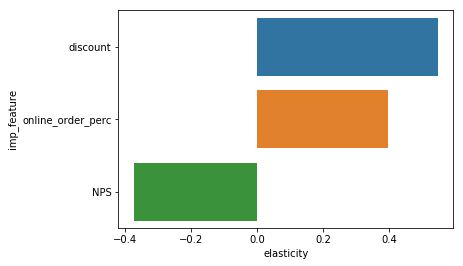

imp_feature   coef  elasticity
0           discount  0.294       0.547
1  online_order_perc  0.601       0.396
2                NPS -0.405      -0.374

In [659]:
elasticity(dlm1,gaming_train_dlm)

Text(0, 0.5, 'y_pred')

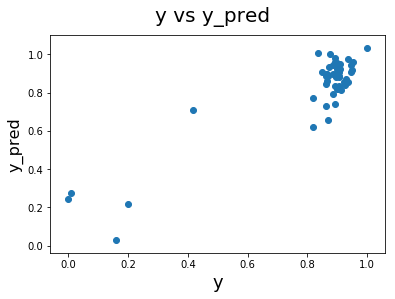

In [660]:
# Plotting y and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y, y_pred)
fig.suptitle('y vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

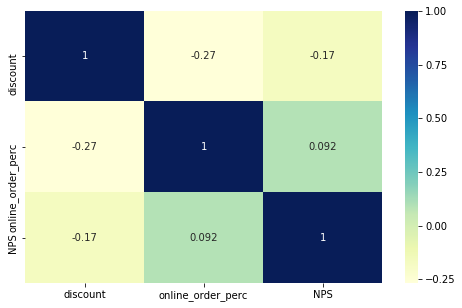

In [661]:
# Figure size
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(gaming_train_dlm[features].corr(), cmap="YlGnBu", annot=True)
plt.show()

# 7. Modeling - Home Audio

### Linear Model

In [662]:
###  Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [663]:
ha_week.columns

Index(['week', 'gmv', 'listing_price', 'product_mrp', 'discount', 'sla',
       'product_procurement_sla', 'fsn_id', 'order_payment_type',
       'online_order_perc', 'Date', 'Year', 'Month', 'TV_ads',
       'Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days',
       'cool_deg_days', 'total_rain_mm', 'total_snow_cm', 'snow_on_grnd_cm',
       'MA2_listed_price', 'MA4_listed_price', 'MA2_discount', 'MA4_discount',
       'lag_1_listed_price', 'lag_2_listed_price', 'lag_3_listed_price',
       'lag_1_discount_offer', 'lag_2_discount_offer', 'lag_3_discount_offer',
       'lag_1_NPS', 'lag_2_NPS', 'lag_3_NPS', 'lag_1_Stock_Index',
       'lag_2_Stock_Index', 'lag_3_Stock_Index', 'lag_1_Special_sales',
       'lag_2_Special_sales', 'lag_3_Special_sales', 'lag_1_Payday',
       'lag_2_Payday', 'lag_3_Payday'],
      dtype='object')

In [664]:
home_lm = ha_week[['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA2_listed_price', 'MA4_listed_price']]
                            
    
home_lm.head()

gmv  discount   sla  product_procurement_sla  order_payment_type  \
0   83742.000     0.397 2.943                    3.486                  34   
1 3725167.133     0.326 7.454                    2.751                 464   
2 4344419.000     0.339 7.116                    2.666                 527   
3 3917329.000     0.328 7.168                    2.762                 450   
4 2812144.000     0.328 7.297                    2.663                 327   

   online_order_perc  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0             97.143   0.054            1.854                  0.000   
1             23.062   0.081            2.780                  0.000   
2             22.570   0.081            2.780                  0.000   
3             20.766   0.081            2.780                  0.000   
4             21.613   0.028            1.139                  0.000   

   Online_marketing_ads    NPS  Stock_Index  Special_sales  Payday  \
0                 0.332 54.600     1177.000          0.000   0.200   
1                 0.498 54.600     1177.000          0.000   0.000   
2                 0.498 54.600     1177.000          0.286   0.143   
3                 0.498 54.600     1177.000          0.000   0.000   
4                 0.192 56.139     1185.286          0.000   0.143   

   heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  \
0          0.100          1.460          0.000          0.000   
1          1.059          2.322          4.155          0.029   
2          0.816          4.722          1.569          0.029   
3          1.632          4.172          1.141          0.029   
4          0.816          5.908          4.341          0.029   

   snow_on_grnd_cm  MA2_listed_price  MA4_listed_price  
0            0.000             0.000             0.000  
1            0.041            -0.129            -0.129  
2            0.041             0.003            -0.086  
3            0.041            -0.016            -0.089  
4            0.041             0.015             0.008

In [665]:
### Checking NaN

home_lm.isnull().sum()

gmv                        0
discount                   0
sla                        0
product_procurement_sla    0
order_payment_type         0
online_order_perc          0
TV_ads                     1
Sponsorship_ads            1
Content_marketing_ads      1
Online_marketing_ads       1
NPS                        0
Stock_Index                0
Special_sales              0
Payday                     0
heat_deg_days              0
cool_deg_days              0
total_rain_mm              0
total_snow_cm              0
snow_on_grnd_cm            0
MA2_listed_price           0
MA4_listed_price           0
dtype: int64

In [666]:
home_lm.fillna(0, inplace = True)

In [667]:
### Import the StandardScaler()
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

### Create a scaling object
# scaler = StandardScaler()
scaler = MinMaxScaler()


### Create a list of the variables that you need to scale
varlist = ['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA2_listed_price', 'MA4_listed_price']
                                      

### Scale these variables using 'fit_transform'
home_lm[varlist] = scaler.fit_transform(home_lm[varlist])

In [668]:
home_lm.head()

gmv  discount   sla  product_procurement_sla  order_payment_type  \
0 0.000     0.586 0.000                    1.000               0.000   
1 0.262     0.138 1.000                    0.480               0.247   
2 0.306     0.223 0.925                    0.419               0.283   
3 0.275     0.150 0.937                    0.487               0.239   
4 0.196     0.151 0.965                    0.417               0.168   

   online_order_perc  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0              0.992   0.015            0.058                  0.000   
1              0.114   0.023            0.088                  0.000   
2              0.108   0.023            0.088                  0.000   
3              0.086   0.023            0.088                  0.000   
4              0.096   0.008            0.036                  0.000   

   Online_marketing_ads   NPS  Stock_Index  Special_sales  Payday  \
0                 0.036 0.869        0.714          0.000   1.000   
1                 0.054 0.869        0.714          0.000   0.000   
2                 0.054 0.869        0.714          0.286   0.714   
3                 0.054 0.869        0.714          0.000   0.000   
4                 0.021 1.000        0.750          0.000   0.714   

   heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  \
0          0.000          0.247          0.000          0.000   
1          0.069          0.393          0.420          0.019   
2          0.051          0.799          0.159          0.019   
3          0.109          0.706          0.115          0.019   
4          0.051          1.000          0.439          0.019   

   snow_on_grnd_cm  MA2_listed_price  MA4_listed_price  
0            0.000             0.664             0.560  
1            0.009             0.000             0.000  
2            0.009             0.678             0.185  
3            0.009             0.583             0.176  
4            0.009             0.741             0.595

In [669]:
### Split the train dataset into X and y
from sklearn.model_selection import train_test_split
x = home_lm.drop('gmv',axis=1)
y = home_lm['gmv']

home_train_lm = home_lm

In [670]:
print("x dataset: ",x.shape)
print("y dataset: ",y.shape)

x dataset:  (49, 20)
y dataset:  (49,)


In [671]:
###  Instantiate
lm = LinearRegression()

###  Fit a line
lm.fit(x,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [672]:
###  Coefficient values

coef = pd.DataFrame(x.columns)
coef['Coefficient'] = pd.Series(lm.coef_)
coef


0  Coefficient
0                  discount        0.253
1                       sla       -0.010
2   product_procurement_sla       -0.021
3        order_payment_type        0.542
4         online_order_perc       -0.386
5                    TV_ads        0.014
6           Sponsorship_ads        0.002
7     Content_marketing_ads        0.108
8      Online_marketing_ads       -0.140
9                       NPS        0.052
10              Stock_Index       -0.014
11            Special_sales        0.072
12                   Payday        0.009
13            heat_deg_days       -0.055
14            cool_deg_days       -0.094
15            total_rain_mm       -0.013
16            total_snow_cm        0.044
17          snow_on_grnd_cm        0.031
18         MA2_listed_price        0.069
19         MA4_listed_price        0.053

In [673]:
col = x.columns
col

Index(['discount', 'sla', 'product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads', 'Sponsorship_ads',
       'Content_marketing_ads', 'Online_marketing_ads', 'NPS', 'Stock_Index',
       'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days',
       'total_rain_mm', 'total_snow_cm', 'snow_on_grnd_cm', 'MA2_listed_price',
       'MA4_listed_price'],
      dtype='object')

#### Model Building - Stepwise selection for feature selection

In [674]:
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [675]:
def stepwise_selection(x, y,
                       initial_list=['discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA2_listed_price', 'MA4_listed_price'],
                       threshold_in=0.01,threshold_out = 0.05, verbose=True):
    
    included = list(initial_list)
    while True:
        changed=False
        ###forward step
        excluded = list(set(x.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
                
                
        ###backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included]))).fit()
        ###use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() ###null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included


In [676]:
import statsmodels.api as sm  

final_features = stepwise_selection(x, y)

print("\n","final_selected_features:",final_features)

Drop Sponsorship_ads                with p-value 0.981335
Drop sla                            with p-value 0.875609
Drop TV_ads                         with p-value 0.874585
Drop product_procurement_sla        with p-value 0.854174
Drop total_rain_mm                  with p-value 0.826555
Drop Payday                         with p-value 0.697732
Drop snow_on_grnd_cm                with p-value 0.552183
Drop heat_deg_days                  with p-value 0.527219
Drop Stock_Index                    with p-value 0.521873
Drop NPS                            with p-value 0.538294
Drop MA4_listed_price               with p-value 0.493756
Drop total_snow_cm                  with p-value 0.406971
Drop cool_deg_days                  with p-value 0.0982741

 final_selected_features: ['discount', 'order_payment_type', 'online_order_perc', 'Content_marketing_ads', 'Online_marketing_ads', 'Special_sales', 'MA2_listed_price']


In [677]:
### Import statsmodels
import statsmodels.api as sm  

### Subsetting training data for 15 selected columns
x_rfe1 = x[final_features]

x_rfe1 = sm.add_constant(x_rfe1)

### Fitting the model with selected variables
lm1 = sm.OLS(y, x_rfe1).fit() 

print(lm1.params)

const                    0.084
discount                 0.274
order_payment_type       0.525
online_order_perc       -0.340
Content_marketing_ads    0.106
Online_marketing_ads    -0.112
Special_sales            0.069
MA2_listed_price         0.086
dtype: float64


In [678]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     69.18
Date:                Wed, 08 Jan 2020   Prob (F-statistic):           1.14e-20
Time:                        09:54:00   Log-Likelihood:                 86.601
No. Observations:                  49   AIC:                            -157.2
Df Residuals:                      41   BIC:                            -142.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.08

In [679]:
###  Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                  const 18.280
5   Online_marketing_ads  2.100
4  Content_marketing_ads  1.700
3      online_order_perc  1.690
2     order_payment_type  1.660
1               discount  1.650
6          Special_sales  1.210
7       MA2_listed_price  1.200

In [680]:
features = list(x_rfe1.columns)
features.remove('const')
features

['discount',
 'order_payment_type',
 'online_order_perc',
 'Content_marketing_ads',
 'Online_marketing_ads',
 'Special_sales',
 'MA2_listed_price']

In [681]:
###  Model Evaluation on testing data
x_2 = x[features]

###  Predicition with selected features on the test data
y_pred = lm1.predict(sm.add_constant(x_2))


In [682]:
###  Mean square error (MSE)

mse = np.mean((y_pred - y)**2)
mse

0.0017076807724969623

In [683]:
###  Coefficient values

coef = pd.DataFrame(x_rfe1.columns)
coef['Coefficient'] = pd.Series(lm.coef_)
coef

0  Coefficient
0                  const        0.253
1               discount       -0.010
2     order_payment_type       -0.021
3      online_order_perc        0.542
4  Content_marketing_ads       -0.386
5   Online_marketing_ads        0.014
6          Special_sales        0.002
7       MA2_listed_price        0.108

In [684]:
### Mean Square Error 
###  Using K-Fold Cross validation evaluating on selected dataset

# lm = LinearRegression()
fold = KFold(10,shuffle = True, random_state = 100)

cv_scores = -cross_val_score(lm,x[features],y,cv=fold,scoring='neg_mean_squared_error')

print("Neg. of MSE:",cv_scores,"\n")
print("Mean of 5 KFold CV - MSE:",cv_scores.mean())

Neg. of MSE: [0.00060436 0.00295511 0.01854366 0.00243094 0.00082639 0.00272775
 0.00158943 0.00337214 0.00322227 0.00433753] 

Mean of 5 KFold CV - MSE: 0.004060958152337888


In [685]:
def elasticity(model,x):
    
    features_df = pd.DataFrame(model.params)
    features_df = features_df.rename(columns={0:'coef'})
    
    features_df['imp_feature'] = model.params.index
    features_df = features_df[features_df.imp_feature != 'const'][['imp_feature','coef']]
    features_df.index = range(len(features_df))
#    features

    elasticity_list = list()
    
    for i in range(len(features_df)):
        elasticity_list.append(((features_df.coef[i] * np.mean(x[features_df.imp_feature[i]])) / np.mean(x['gmv'])))

    features_df['elasticity'] = np.round(elasticity_list,3)
    
    sns.barplot(x='elasticity',y='imp_feature',data=features_df)
    plt.show()
    
    return features_df
    

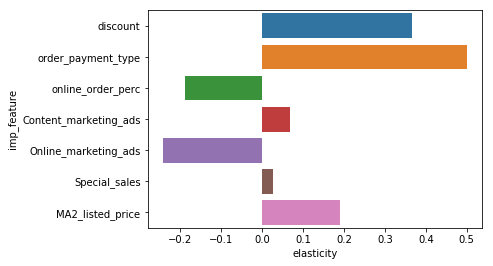

imp_feature   coef  elasticity
0               discount  0.274       0.367
1     order_payment_type  0.525       0.501
2      online_order_perc -0.340      -0.189
3  Content_marketing_ads  0.106       0.067
4   Online_marketing_ads -0.112      -0.243
5          Special_sales  0.069       0.026
6       MA2_listed_price  0.086       0.189

In [686]:
elasticity(lm1,home_train_lm)

Text(0, 0.5, 'y_pred')

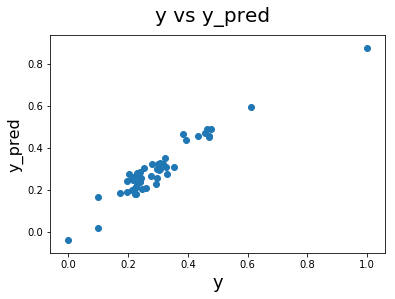

In [687]:
# Plotting y and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y, y_pred)
fig.suptitle('y vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

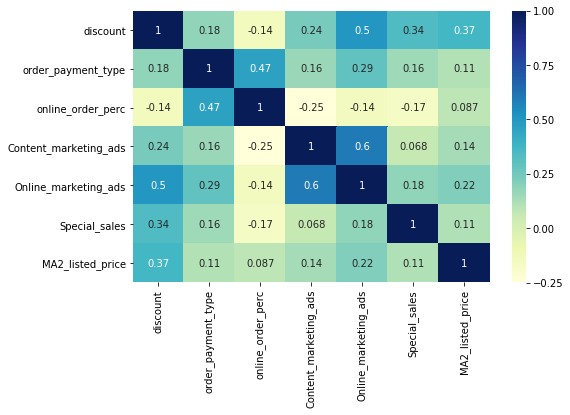

In [688]:
# Figure size
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(home_train_lm[features].corr(), cmap="YlGnBu", annot=True)
plt.show()

### Multiplicative Model

In [689]:
ha_week.columns

Index(['week', 'gmv', 'listing_price', 'product_mrp', 'discount', 'sla',
       'product_procurement_sla', 'fsn_id', 'order_payment_type',
       'online_order_perc', 'Date', 'Year', 'Month', 'TV_ads',
       'Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days',
       'cool_deg_days', 'total_rain_mm', 'total_snow_cm', 'snow_on_grnd_cm',
       'MA2_listed_price', 'MA4_listed_price', 'MA2_discount', 'MA4_discount',
       'lag_1_listed_price', 'lag_2_listed_price', 'lag_3_listed_price',
       'lag_1_discount_offer', 'lag_2_discount_offer', 'lag_3_discount_offer',
       'lag_1_NPS', 'lag_2_NPS', 'lag_3_NPS', 'lag_1_Stock_Index',
       'lag_2_Stock_Index', 'lag_3_Stock_Index', 'lag_1_Special_sales',
       'lag_2_Special_sales', 'lag_3_Special_sales', 'lag_1_Payday',
       'lag_2_Payday', 'lag_3_Payday'],
      dtype='object')

In [690]:
home_mm = ha_week[['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA2_listed_price', 'MA4_listed_price']]         

home_mm.head()


gmv  discount   sla  product_procurement_sla  order_payment_type  \
0   83742.000     0.397 2.943                    3.486                  34   
1 3725167.133     0.326 7.454                    2.751                 464   
2 4344419.000     0.339 7.116                    2.666                 527   
3 3917329.000     0.328 7.168                    2.762                 450   
4 2812144.000     0.328 7.297                    2.663                 327   

   online_order_perc  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0             97.143   0.054            1.854                  0.000   
1             23.062   0.081            2.780                  0.000   
2             22.570   0.081            2.780                  0.000   
3             20.766   0.081            2.780                  0.000   
4             21.613   0.028            1.139                  0.000   

   Online_marketing_ads    NPS  Stock_Index  Special_sales  Payday  \
0                 0.332 54.600     1177.000          0.000   0.200   
1                 0.498 54.600     1177.000          0.000   0.000   
2                 0.498 54.600     1177.000          0.286   0.143   
3                 0.498 54.600     1177.000          0.000   0.000   
4                 0.192 56.139     1185.286          0.000   0.143   

   heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  \
0          0.100          1.460          0.000          0.000   
1          1.059          2.322          4.155          0.029   
2          0.816          4.722          1.569          0.029   
3          1.632          4.172          1.141          0.029   
4          0.816          5.908          4.341          0.029   

   snow_on_grnd_cm  MA2_listed_price  MA4_listed_price  
0            0.000             0.000             0.000  
1            0.041            -0.129            -0.129  
2            0.041             0.003            -0.086  
3            0.041            -0.016            -0.089  
4            0.041             0.015             0.008

In [691]:
### Applying Log 
home_mm=np.log(home_mm)

home_mm = home_mm.fillna(0)
home_mm = home_mm.replace([np.inf, -np.inf], 0)

In [692]:
home_mm.head()

gmv  discount   sla  product_procurement_sla  order_payment_type  \
0 11.335    -0.923 1.079                    1.249               3.526   
1 15.131    -1.121 2.009                    1.012               6.140   
2 15.284    -1.081 1.962                    0.981               6.267   
3 15.181    -1.115 1.970                    1.016               6.109   
4 14.849    -1.114 1.987                    0.979               5.790   

   online_order_perc  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0              4.576  -2.922            0.617                 -8.364   
1              3.138  -2.516            1.023                 -7.958   
2              3.117  -2.516            1.023                 -7.958   
3              3.033  -2.516            1.023                 -7.958   
4              3.073  -3.568            0.131                 -9.046   

   Online_marketing_ads   NPS  Stock_Index  Special_sales  Payday  \
0                -1.103 4.000        7.071          0.000  -1.609   
1                -0.698 4.000        7.071          0.000   0.000   
2                -0.698 4.000        7.071         -1.253  -1.946   
3                -0.698 4.000        7.071          0.000   0.000   
4                -1.652 4.028        7.078          0.000  -1.946   

   heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  \
0         -2.303          0.378          0.000          0.000   
1          0.057          0.842          1.424         -3.532   
2         -0.203          1.552          0.451         -3.532   
3          0.490          1.428          0.131         -3.532   
4         -0.203          1.776          1.468         -3.532   

   snow_on_grnd_cm  MA2_listed_price  MA4_listed_price  
0            0.000             0.000             0.000  
1           -3.189             0.000             0.000  
2           -3.189            -5.905             0.000  
3           -3.189             0.000             0.000  
4           -3.189            -4.200            -4.819

In [693]:
###  Import the StandardScaler()
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

###  Create a scaling object
# scaler = StandardScaler()
scaler = MinMaxScaler()

###  Create a list of the variables that you need to scale
varlist = ['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA2_listed_price', 'MA4_listed_price']      



### Scale these variables using 'fit_transform'
home_mm[varlist] = scaler.fit_transform(home_mm[varlist])

In [694]:
home_mm.head()

gmv  discount   sla  product_procurement_sla  order_payment_type  \
0 0.000     0.635 0.000                    1.000               0.000   
1 0.741     0.166 1.000                    0.544               0.661   
2 0.771     0.262 0.950                    0.484               0.693   
3 0.751     0.179 0.958                    0.552               0.653   
4 0.686     0.181 0.977                    0.481               0.572   

   online_order_perc  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0              0.997   0.134            0.178                  0.073   
1              0.271   0.218            0.296                  0.117   
2              0.260   0.218            0.296                  0.117   
3              0.218   0.218            0.296                  0.117   
4              0.238   0.000            0.038                  0.000   

   Online_marketing_ads   NPS  Stock_Index  Special_sales  Payday  \
0                 0.142 0.882        0.734          1.000   0.173   
1                 0.247 0.882        0.734          1.000   1.000   
2                 0.247 0.882        0.734          0.356   0.000   
3                 0.247 0.882        0.734          1.000   1.000   
4                 0.000 1.000        0.768          1.000   0.000   

   heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  \
0          0.000          0.408          0.303          0.895   
1          0.477          0.604          0.736          0.000   
2          0.424          0.905          0.440          0.000   
3          0.564          0.853          0.343          0.000   
4          0.424          1.000          0.750          0.000   

   snow_on_grnd_cm  MA2_listed_price  MA4_listed_price  
0            0.677             1.000             1.000  
1            0.000             1.000             1.000  
2            0.000             0.144             1.000  
3            0.000             1.000             1.000  
4            0.000             0.391             0.304

In [695]:
### Split the train dataset into X and y
from sklearn.model_selection import train_test_split

x = home_mm.drop('gmv',axis=1)
y = home_mm['gmv']

home_train_mm = home_mm

In [696]:
print("X = Independent variable & Y = Target variable")
print(x.shape,y.shape)


X = Independent variable & Y = Target variable
(49, 20) (49,)


In [697]:
### Instantiate
mm = LinearRegression()

### Fit a line
mm.fit(x,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [698]:
### Coefficient values

coef = pd.DataFrame(x.columns)
coef['Coefficient'] = pd.Series(mm.coef_)
coef


0  Coefficient
0                  discount        0.025
1                       sla       -0.059
2   product_procurement_sla        0.002
3        order_payment_type        0.779
4         online_order_perc       -0.390
5                    TV_ads        0.020
6           Sponsorship_ads       -0.004
7     Content_marketing_ads       -0.035
8      Online_marketing_ads        0.001
9                       NPS       -0.006
10              Stock_Index        0.004
11            Special_sales        0.006
12                   Payday        0.002
13            heat_deg_days       -0.000
14            cool_deg_days        0.020
15            total_rain_mm        0.007
16            total_snow_cm       -0.009
17          snow_on_grnd_cm        0.013
18         MA2_listed_price        0.002
19         MA4_listed_price       -0.004

In [699]:
col = x.columns
col

Index(['discount', 'sla', 'product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads', 'Sponsorship_ads',
       'Content_marketing_ads', 'Online_marketing_ads', 'NPS', 'Stock_Index',
       'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days',
       'total_rain_mm', 'total_snow_cm', 'snow_on_grnd_cm', 'MA2_listed_price',
       'MA4_listed_price'],
      dtype='object')

#### Model Building - Stepwise selection for feature selection

In [700]:
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [701]:
def stepwise_selection(x, y,
                       initial_list=['discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA2_listed_price', 'MA4_listed_price'],
                       threshold_in=0.01,threshold_out = 0.05, verbose=True):
    
    included = list(initial_list)
    while True:
        changed=False
        ###forward step
        excluded = list(set(x.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
                
                
        ###backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included]))).fit()
        ###use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() ###null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included


In [702]:
import statsmodels.api as sm  

final_features = stepwise_selection(x, y)

print("\n","final_selected_features:",final_features)

Drop heat_deg_days                  with p-value 0.988994
Drop Online_marketing_ads           with p-value 0.943397
Drop product_procurement_sla        with p-value 0.857458
Drop NPS                            with p-value 0.665971
Drop MA2_listed_price               with p-value 0.724256
Drop Sponsorship_ads                with p-value 0.649895
Drop MA4_listed_price               with p-value 0.538772
Drop Payday                         with p-value 0.483722
Drop Special_sales                  with p-value 0.290729
Drop Stock_Index                    with p-value 0.369381
Drop total_snow_cm                  with p-value 0.352644
Drop snow_on_grnd_cm                with p-value 0.472082
Drop total_rain_mm                  with p-value 0.291579
Drop TV_ads                         with p-value 0.119116

 final_selected_features: ['discount', 'sla', 'order_payment_type', 'online_order_perc', 'Content_marketing_ads', 'cool_deg_days']


In [703]:
### Import statsmodels
import statsmodels.api as sm  

### Subsetting training data for 15 selected columns
x_rfe1 = x[final_features]

x_rfe1 = sm.add_constant(x_rfe1)


### Fitting the model with selected variables
mm1 = sm.OLS(y, x_rfe1).fit() 

print(mm1.params)

const                    0.373
discount                 0.022
sla                     -0.056
order_payment_type       0.778
online_order_perc       -0.387
Content_marketing_ads   -0.016
cool_deg_days            0.013
dtype: float64


In [704]:
print(mm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     2280.
Date:                Wed, 08 Jan 2020   Prob (F-statistic):           4.01e-51
Time:                        09:54:03   Log-Likelihood:                 172.08
No. Observations:                  49   AIC:                            -330.2
Df Residuals:                      42   BIC:                            -316.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.37

In [705]:
### Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                  const 87.170
2                    sla  2.580
4      online_order_perc  2.550
3     order_payment_type  2.480
5  Content_marketing_ads  2.050
1               discount  1.820
6          cool_deg_days  1.640

In [706]:
features = list(x_rfe1.columns)
features.remove('const')
features

['discount',
 'sla',
 'order_payment_type',
 'online_order_perc',
 'Content_marketing_ads',
 'cool_deg_days']

In [707]:
### Model Evaluation on testing data
x_2 = x[features]


### Predicition with selected features on the test data
y_pred = mm1.predict(sm.add_constant(x_2))


In [708]:
### Mean square error (MSE)
mse = np.mean((y_pred - y)**2)
mse

5.213587786154669e-05

In [709]:
### Coefficient values

coef = pd.DataFrame(x_rfe1.columns)
coef['Coefficient'] = pd.Series(mm.coef_)
coef


0  Coefficient
0                  const        0.025
1               discount       -0.059
2                    sla        0.002
3     order_payment_type        0.779
4      online_order_perc       -0.390
5  Content_marketing_ads        0.020
6          cool_deg_days       -0.004

In [710]:
### Mean Square Error 
###  Using K-Fold Cross validation evaluating on selected dataset

# lm = LinearRegression()
fold = KFold(10,shuffle = True, random_state = 100)

cv_scores = -cross_val_score(mm,x[features],y,cv=fold,scoring='neg_mean_squared_error')

print("Neg. of MSE:",cv_scores,"\n")
print("Mean of 5 KFold CV - MSE:",cv_scores.mean())

Neg. of MSE: [1.41504828e-04 1.72818506e-05 3.00114500e-04 4.89166729e-05
 3.76108605e-05 3.65269585e-05 6.96897892e-05 5.31453075e-05
 6.97589082e-05 1.95717990e-04] 

Mean of 5 KFold CV - MSE: 9.70267665586584e-05


In [711]:
def elasticity(model,x):
    
    features_df = pd.DataFrame(model.params)
    features_df = features_df.rename(columns={0:'coef'})
    
    features_df['imp_feature'] = model.params.index
    features_df = features_df[features_df.imp_feature != 'const'][['imp_feature','coef']]
    features_df.index = range(len(features_df))
#     features

    elasticity_list = list()
    
    for i in range(len(features_df)):
        elasticity_list.append(((features_df.coef[i] * np.mean(x[features_df.imp_feature[i]])) / np.mean(x['gmv'])))

    features_df['elasticity'] = np.round(elasticity_list,3)
    
    sns.barplot(x='elasticity',y='imp_feature',data=features_df)
    plt.show()
    
    return features_df
    

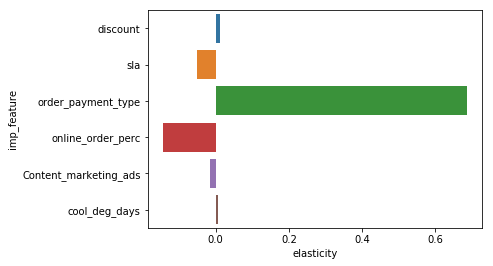

imp_feature   coef  elasticity
0               discount  0.022       0.013
1                    sla -0.056      -0.052
2     order_payment_type  0.778       0.687
3      online_order_perc -0.387      -0.144
4  Content_marketing_ads -0.016      -0.015
5          cool_deg_days  0.013       0.008

In [712]:
elasticity(mm1,home_train_mm)

Text(0, 0.5, 'y_pred')

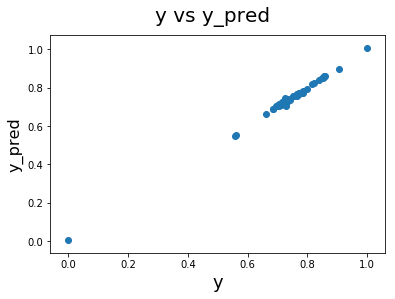

In [713]:
# Plotting y and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y, y_pred)
fig.suptitle('y vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

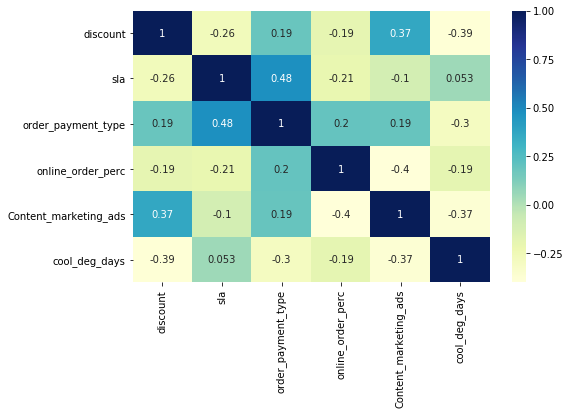

In [714]:
# Figure size
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(home_train_mm[features].corr(), cmap="YlGnBu", annot=True)
plt.show()

### Kyock Model

In [715]:
ha_week.columns

Index(['week', 'gmv', 'listing_price', 'product_mrp', 'discount', 'sla',
       'product_procurement_sla', 'fsn_id', 'order_payment_type',
       'online_order_perc', 'Date', 'Year', 'Month', 'TV_ads',
       'Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days',
       'cool_deg_days', 'total_rain_mm', 'total_snow_cm', 'snow_on_grnd_cm',
       'MA2_listed_price', 'MA4_listed_price', 'MA2_discount', 'MA4_discount',
       'lag_1_listed_price', 'lag_2_listed_price', 'lag_3_listed_price',
       'lag_1_discount_offer', 'lag_2_discount_offer', 'lag_3_discount_offer',
       'lag_1_NPS', 'lag_2_NPS', 'lag_3_NPS', 'lag_1_Stock_Index',
       'lag_2_Stock_Index', 'lag_3_Stock_Index', 'lag_1_Special_sales',
       'lag_2_Special_sales', 'lag_3_Special_sales', 'lag_1_Payday',
       'lag_2_Payday', 'lag_3_Payday'],
      dtype='object')

In [716]:
home_km = ha_week[['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA2_listed_price', 'MA4_listed_price']]           


home_km.head()


gmv  discount   sla  product_procurement_sla  order_payment_type  \
0   83742.000     0.397 2.943                    3.486                  34   
1 3725167.133     0.326 7.454                    2.751                 464   
2 4344419.000     0.339 7.116                    2.666                 527   
3 3917329.000     0.328 7.168                    2.762                 450   
4 2812144.000     0.328 7.297                    2.663                 327   

   online_order_perc  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0             97.143   0.054            1.854                  0.000   
1             23.062   0.081            2.780                  0.000   
2             22.570   0.081            2.780                  0.000   
3             20.766   0.081            2.780                  0.000   
4             21.613   0.028            1.139                  0.000   

   Online_marketing_ads    NPS  Stock_Index  Special_sales  Payday  \
0                 0.332 54.600     1177.000          0.000   0.200   
1                 0.498 54.600     1177.000          0.000   0.000   
2                 0.498 54.600     1177.000          0.286   0.143   
3                 0.498 54.600     1177.000          0.000   0.000   
4                 0.192 56.139     1185.286          0.000   0.143   

   heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  \
0          0.100          1.460          0.000          0.000   
1          1.059          2.322          4.155          0.029   
2          0.816          4.722          1.569          0.029   
3          1.632          4.172          1.141          0.029   
4          0.816          5.908          4.341          0.029   

   snow_on_grnd_cm  MA2_listed_price  MA4_listed_price  
0            0.000             0.000             0.000  
1            0.041            -0.129            -0.129  
2            0.041             0.003            -0.086  
3            0.041            -0.016            -0.089  
4            0.041             0.015             0.008

In [717]:
home_km['lag_1_gmv'] = home_km['gmv'].shift(-1)

In [718]:
### Checking NaN

home_km.isnull().sum()

gmv                        0
discount                   0
sla                        0
product_procurement_sla    0
order_payment_type         0
online_order_perc          0
TV_ads                     1
Sponsorship_ads            1
Content_marketing_ads      1
Online_marketing_ads       1
NPS                        0
Stock_Index                0
Special_sales              0
Payday                     0
heat_deg_days              0
cool_deg_days              0
total_rain_mm              0
total_snow_cm              0
snow_on_grnd_cm            0
MA2_listed_price           0
MA4_listed_price           0
lag_1_gmv                  1
dtype: int64

In [719]:
home_km = home_km.fillna(0)

In [720]:
home_km.head()

gmv  discount   sla  product_procurement_sla  order_payment_type  \
0   83742.000     0.397 2.943                    3.486                  34   
1 3725167.133     0.326 7.454                    2.751                 464   
2 4344419.000     0.339 7.116                    2.666                 527   
3 3917329.000     0.328 7.168                    2.762                 450   
4 2812144.000     0.328 7.297                    2.663                 327   

   online_order_perc  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0             97.143   0.054            1.854                  0.000   
1             23.062   0.081            2.780                  0.000   
2             22.570   0.081            2.780                  0.000   
3             20.766   0.081            2.780                  0.000   
4             21.613   0.028            1.139                  0.000   

   Online_marketing_ads    NPS  Stock_Index  Special_sales  Payday  \
0                 0.332 54.600     1177.000          0.000   0.200   
1                 0.498 54.600     1177.000          0.000   0.000   
2                 0.498 54.600     1177.000          0.286   0.143   
3                 0.498 54.600     1177.000          0.000   0.000   
4                 0.192 56.139     1185.286          0.000   0.143   

   heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  \
0          0.100          1.460          0.000          0.000   
1          1.059          2.322          4.155          0.029   
2          0.816          4.722          1.569          0.029   
3          1.632          4.172          1.141          0.029   
4          0.816          5.908          4.341          0.029   

   snow_on_grnd_cm  MA2_listed_price  MA4_listed_price   lag_1_gmv  
0            0.000             0.000             0.000 3725167.133  
1            0.041            -0.129            -0.129 4344419.000  
2            0.041             0.003            -0.086 3917329.000  
3            0.041            -0.016            -0.089 2812144.000  
4            0.041             0.015             0.008 3091251.000

In [721]:
###  Import the StandardScaler()
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

### Create a scaling object
# scaler = StandardScaler()
scaler = MinMaxScaler()

### Create a list of the variables that you need to scale
varlist = ['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA2_listed_price', 'MA4_listed_price','lag_1_gmv']

### Scale these variables using 'fit_transform'
home_km[varlist] = scaler.fit_transform(home_km[varlist])

In [722]:
home_km.head()

gmv  discount   sla  product_procurement_sla  order_payment_type  \
0 0.000     0.586 0.000                    1.000               0.000   
1 0.262     0.138 1.000                    0.480               0.247   
2 0.306     0.223 0.925                    0.419               0.283   
3 0.275     0.150 0.937                    0.487               0.239   
4 0.196     0.151 0.965                    0.417               0.168   

   online_order_perc  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0              0.992   0.015            0.058                  0.000   
1              0.114   0.023            0.088                  0.000   
2              0.108   0.023            0.088                  0.000   
3              0.086   0.023            0.088                  0.000   
4              0.096   0.008            0.036                  0.000   

   Online_marketing_ads   NPS  Stock_Index  Special_sales  Payday  \
0                 0.036 0.869        0.714          0.000   1.000   
1                 0.054 0.869        0.714          0.000   0.000   
2                 0.054 0.869        0.714          0.286   0.714   
3                 0.054 0.869        0.714          0.000   0.000   
4                 0.021 1.000        0.750          0.000   0.714   

   heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  \
0          0.000          0.247          0.000          0.000   
1          0.069          0.393          0.420          0.019   
2          0.051          0.799          0.159          0.019   
3          0.109          0.706          0.115          0.019   
4          0.051          1.000          0.439          0.019   

   snow_on_grnd_cm  MA2_listed_price  MA4_listed_price  lag_1_gmv  
0            0.000             0.664             0.560      0.266  
1            0.009             0.000             0.000      0.310  
2            0.009             0.678             0.185      0.280  
3            0.009             0.583             0.176      0.201  
4            0.009             0.741             0.595      0.221

In [723]:
### Split the train dataset into X and y
from sklearn.model_selection import train_test_split
x = home_km.drop('gmv',axis=1)
y = home_km['gmv']

home_train_km = home_km

In [724]:
print("X = Independent variable & Y = Target variable")
print(x.shape,y.shape)

X = Independent variable & Y = Target variable
(49, 21) (49,)


In [725]:
###  Instantiate
km = LinearRegression()

###  Fit a line
km.fit(x,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [726]:
###  Coefficient values

coef = pd.DataFrame(x.columns)
coef['Coefficient'] = pd.Series(km.coef_)
coef


0  Coefficient
0                  discount        0.253
1                       sla       -0.013
2   product_procurement_sla       -0.024
3        order_payment_type        0.545
4         online_order_perc       -0.387
5                    TV_ads        0.013
6           Sponsorship_ads        0.004
7     Content_marketing_ads        0.104
8      Online_marketing_ads       -0.144
9                       NPS        0.051
10              Stock_Index       -0.013
11            Special_sales        0.071
12                   Payday        0.009
13            heat_deg_days       -0.055
14            cool_deg_days       -0.095
15            total_rain_mm       -0.012
16            total_snow_cm        0.044
17          snow_on_grnd_cm        0.031
18         MA2_listed_price        0.071
19         MA4_listed_price        0.053
20                lag_1_gmv        0.014

In [727]:
col = x.columns
col

Index(['discount', 'sla', 'product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads', 'Sponsorship_ads',
       'Content_marketing_ads', 'Online_marketing_ads', 'NPS', 'Stock_Index',
       'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days',
       'total_rain_mm', 'total_snow_cm', 'snow_on_grnd_cm', 'MA2_listed_price',
       'MA4_listed_price', 'lag_1_gmv'],
      dtype='object')

#### Model Building - Stepwise selection for feature selection

In [728]:
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [729]:
def stepwise_selection(x, y,
                       initial_list=['discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA2_listed_price', 'MA4_listed_price', 'lag_1_gmv'],
                       threshold_in=0.01,threshold_out = 0.05, verbose=True):
    
    included = list(initial_list)
    while True:
        changed=False
        ### forward step
        excluded = list(set(x.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
                
                
        ###backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included]))).fit()
        ###use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() ###null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included


In [730]:
import statsmodels.api as sm  

final_features = stepwise_selection(x, y)

print("\n","final_selected_features:",final_features)

Drop Sponsorship_ads                with p-value 0.954465
Drop lag_1_gmv                      with p-value 0.855048
Drop sla                            with p-value 0.875609
Drop TV_ads                         with p-value 0.874585
Drop product_procurement_sla        with p-value 0.854174
Drop total_rain_mm                  with p-value 0.826555
Drop Payday                         with p-value 0.697732
Drop snow_on_grnd_cm                with p-value 0.552183
Drop heat_deg_days                  with p-value 0.527219
Drop Stock_Index                    with p-value 0.521873
Drop NPS                            with p-value 0.538294
Drop MA4_listed_price               with p-value 0.493756
Drop total_snow_cm                  with p-value 0.406971
Drop cool_deg_days                  with p-value 0.0982741

 final_selected_features: ['discount', 'order_payment_type', 'online_order_perc', 'Content_marketing_ads', 'Online_marketing_ads', 'Special_sales', 'MA2_listed_price']


In [731]:
### Import statsmodels
import statsmodels.api as sm  

### Subsetting training data for 15 selected columns
x_rfe1 = x[final_features]

x_rfe1 = sm.add_constant(x_rfe1)

### Fitting the model with selected variables
km1 = sm.OLS(y, x_rfe1).fit() 

print(km1.params)

const                    0.084
discount                 0.274
order_payment_type       0.525
online_order_perc       -0.340
Content_marketing_ads    0.106
Online_marketing_ads    -0.112
Special_sales            0.069
MA2_listed_price         0.086
dtype: float64


In [732]:
print(km1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     69.18
Date:                Wed, 08 Jan 2020   Prob (F-statistic):           1.14e-20
Time:                        09:54:06   Log-Likelihood:                 86.601
No. Observations:                  49   AIC:                            -157.2
Df Residuals:                      41   BIC:                            -142.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.08

In [733]:
### Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                  const 18.280
5   Online_marketing_ads  2.100
4  Content_marketing_ads  1.700
3      online_order_perc  1.690
2     order_payment_type  1.660
1               discount  1.650
6          Special_sales  1.210
7       MA2_listed_price  1.200

In [734]:
features = list(x_rfe1.columns)
features.remove('const')
features

['discount',
 'order_payment_type',
 'online_order_perc',
 'Content_marketing_ads',
 'Online_marketing_ads',
 'Special_sales',
 'MA2_listed_price']

In [735]:
### Model Evaluation on testing data
x_2 = x[features]


### Predicition with selected features on the test data
y_pred = km1.predict(sm.add_constant(x_2))


In [736]:
### Mean square error (MSE)
mse = np.mean((y_pred - y)**2)
mse

0.0017076807724969623

In [737]:
### Coefficient values

coef = pd.DataFrame(x_rfe1.columns)
coef['Coefficient'] = pd.Series(km.coef_)
coef


0  Coefficient
0                  const        0.253
1               discount       -0.013
2     order_payment_type       -0.024
3      online_order_perc        0.545
4  Content_marketing_ads       -0.387
5   Online_marketing_ads        0.013
6          Special_sales        0.004
7       MA2_listed_price        0.104

In [738]:
### Using K-Fold Cross validation evaluating on whole dataset

# lm = LinearRegression()
fold = KFold(10,shuffle = True, random_state = 100)

cv_scores = -cross_val_score(km,x[features],y,cv=fold,scoring='neg_mean_squared_error')

print("Neg. of MSE:",cv_scores,"\n")
print("Mean of 5 KFold CV - MSE:",cv_scores.mean())

Neg. of MSE: [0.00060436 0.00295511 0.01854366 0.00243094 0.00082639 0.00272775
 0.00158943 0.00337214 0.00322227 0.00433753] 

Mean of 5 KFold CV - MSE: 0.004060958152337888


In [739]:
def elasticity(model,x):
    
    features_df = pd.DataFrame(model.params)
    features_df = features_df.rename(columns={0:'coef'})
    
    features_df['imp_feature'] = model.params.index
    features_df = features_df[features_df.imp_feature != 'const'][['imp_feature','coef']]
    features_df.index = range(len(features_df))
#      features

    elasticity_list = list()
    
    for i in range(len(features_df)):
        elasticity_list.append(((features_df.coef[i] * np.mean(x[features_df.imp_feature[i]])) / np.mean(x['gmv'])))

    features_df['elasticity'] = np.round(elasticity_list,3)
    
    sns.barplot(x='elasticity',y='imp_feature',data=features_df)
    plt.show()
    
    return features_df
    

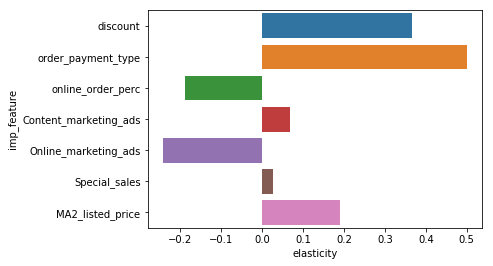

imp_feature   coef  elasticity
0               discount  0.274       0.367
1     order_payment_type  0.525       0.501
2      online_order_perc -0.340      -0.189
3  Content_marketing_ads  0.106       0.067
4   Online_marketing_ads -0.112      -0.243
5          Special_sales  0.069       0.026
6       MA2_listed_price  0.086       0.189

In [740]:
elasticity(km1,home_train_km)

Text(0, 0.5, 'y_pred')

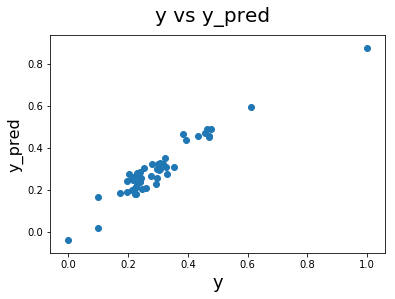

In [741]:
# Plotting y and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y, y_pred)
fig.suptitle('y vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

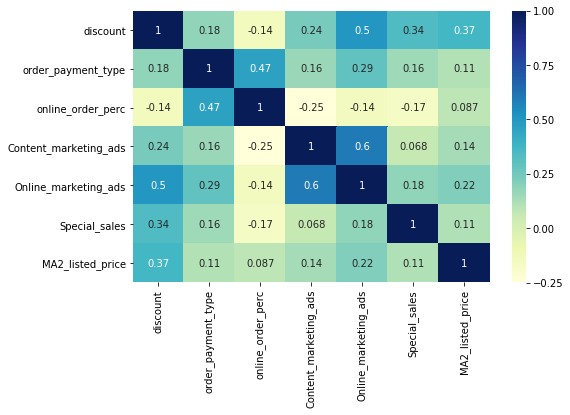

In [742]:
# Figure size
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(home_train_km[features].corr(), cmap="YlGnBu", annot=True)
plt.show()

### Distributed Lag Model

In [743]:
home_dlm = ha_week[['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA2_listed_price', 'MA4_listed_price','lag_1_listed_price','lag_1_discount_offer',
       'lag_2_discount_offer','lag_3_discount_offer','lag_2_NPS','lag_3_NPS','lag_1_Stock_Index',
       'lag_2_Stock_Index','lag_3_Stock_Index','lag_1_Special_sales','lag_2_Special_sales','lag_3_Special_sales',
       'lag_1_Payday','lag_2_Payday','lag_3_Payday']]           


home_dlm.head()


gmv  discount   sla  product_procurement_sla  order_payment_type  \
0   83742.000     0.397 2.943                    3.486                  34   
1 3725167.133     0.326 7.454                    2.751                 464   
2 4344419.000     0.339 7.116                    2.666                 527   
3 3917329.000     0.328 7.168                    2.762                 450   
4 2812144.000     0.328 7.297                    2.663                 327   

   online_order_perc  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0             97.143   0.054            1.854                  0.000   
1             23.062   0.081            2.780                  0.000   
2             22.570   0.081            2.780                  0.000   
3             20.766   0.081            2.780                  0.000   
4             21.613   0.028            1.139                  0.000   

   Online_marketing_ads    NPS  Stock_Index  Special_sales  Payday  \
0                 0.332 54.600     1177.000          0.000   0.200   
1                 0.498 54.600     1177.000          0.000   0.000   
2                 0.498 54.600     1177.000          0.286   0.143   
3                 0.498 54.600     1177.000          0.000   0.000   
4                 0.192 56.139     1185.286          0.000   0.143   

   heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  \
0          0.100          1.460          0.000          0.000   
1          1.059          2.322          4.155          0.029   
2          0.816          4.722          1.569          0.029   
3          1.632          4.172          1.141          0.029   
4          0.816          5.908          4.341          0.029   

   snow_on_grnd_cm  MA2_listed_price  MA4_listed_price  lag_1_listed_price  \
0            0.000             0.000             0.000            1845.875   
1            0.041            -0.129            -0.129            1855.961   
2            0.041             0.003            -0.086            1798.505   
3            0.041            -0.016            -0.089            1853.243   
4            0.041             0.015             0.008            1768.029   

   lag_1_discount_offer  lag_2_discount_offer  lag_3_discount_offer  \
0                 0.326                 0.339                 0.328   
1                 0.339                 0.328                 0.328   
2                 0.328                 0.328                 0.365   
3                 0.328                 0.365                 0.367   
4                 0.365                 0.367                 0.359   

   lag_2_NPS  lag_3_NPS  lag_1_Stock_Index  lag_2_Stock_Index  \
0     54.600     54.600           1177.000           1177.000   
1     54.600     56.139           1177.000           1177.000   
2     56.139     48.791           1177.000           1185.286   
3     48.791     46.925           1185.286           1116.000   
4     46.925     46.925           1116.000           1101.000   

   lag_3_Stock_Index  lag_1_Special_sales  lag_2_Special_sales  \
0           1177.000                0.000                0.286   
1           1185.286                0.286                0.000   
2           1116.000                0.000                0.000   
3           1101.000                0.000                0.000   
4           1101.000                0.000                0.000   

   lag_3_Special_sales  lag_1_Payday  lag_2_Payday  lag_3_Payday  
0                0.000         0.000         0.143         0.000  
1                0.000         0.143         0.000         0.143  
2                0.000         0.000         0.143         0.143  
3                0.000         0.143         0.143         0.000  
4                0.000         0.143         0.000         0.143

In [744]:
home_dlm['lag_1_gmv'] = home_dlm['gmv'].shift(-1)
home_dlm['lag_2_gmv'] = home_dlm['gmv'].shift(-2)
home_dlm['lag_3_gmv'] = home_dlm['gmv'].shift(-3)


In [745]:
### Checking NaN

home_dlm.isnull().sum()

gmv                        0
discount                   0
sla                        0
product_procurement_sla    0
order_payment_type         0
online_order_perc          0
TV_ads                     1
Sponsorship_ads            1
Content_marketing_ads      1
Online_marketing_ads       1
NPS                        0
Stock_Index                0
Special_sales              0
Payday                     0
heat_deg_days              0
cool_deg_days              0
total_rain_mm              0
total_snow_cm              0
snow_on_grnd_cm            0
MA2_listed_price           0
MA4_listed_price           0
lag_1_listed_price         0
lag_1_discount_offer       0
lag_2_discount_offer       0
lag_3_discount_offer       0
lag_2_NPS                  0
lag_3_NPS                  0
lag_1_Stock_Index          0
lag_2_Stock_Index          0
lag_3_Stock_Index          0
lag_1_Special_sales        0
lag_2_Special_sales        0
lag_3_Special_sales        0
lag_1_Payday               0
lag_2_Payday  

In [746]:
home_dlm = home_dlm.fillna(0)

In [747]:
home_dlm.head()

gmv  discount   sla  product_procurement_sla  order_payment_type  \
0   83742.000     0.397 2.943                    3.486                  34   
1 3725167.133     0.326 7.454                    2.751                 464   
2 4344419.000     0.339 7.116                    2.666                 527   
3 3917329.000     0.328 7.168                    2.762                 450   
4 2812144.000     0.328 7.297                    2.663                 327   

   online_order_perc  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0             97.143   0.054            1.854                  0.000   
1             23.062   0.081            2.780                  0.000   
2             22.570   0.081            2.780                  0.000   
3             20.766   0.081            2.780                  0.000   
4             21.613   0.028            1.139                  0.000   

   Online_marketing_ads    NPS  Stock_Index  Special_sales  Payday  \
0                 0.332 54.600     1177.000          0.000   0.200   
1                 0.498 54.600     1177.000          0.000   0.000   
2                 0.498 54.600     1177.000          0.286   0.143   
3                 0.498 54.600     1177.000          0.000   0.000   
4                 0.192 56.139     1185.286          0.000   0.143   

   heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  \
0          0.100          1.460          0.000          0.000   
1          1.059          2.322          4.155          0.029   
2          0.816          4.722          1.569          0.029   
3          1.632          4.172          1.141          0.029   
4          0.816          5.908          4.341          0.029   

   snow_on_grnd_cm  MA2_listed_price  MA4_listed_price  lag_1_listed_price  \
0            0.000             0.000             0.000            1845.875   
1            0.041            -0.129            -0.129            1855.961   
2            0.041             0.003            -0.086            1798.505   
3            0.041            -0.016            -0.089            1853.243   
4            0.041             0.015             0.008            1768.029   

   lag_1_discount_offer  lag_2_discount_offer  lag_3_discount_offer  \
0                 0.326                 0.339                 0.328   
1                 0.339                 0.328                 0.328   
2                 0.328                 0.328                 0.365   
3                 0.328                 0.365                 0.367   
4                 0.365                 0.367                 0.359   

   lag_2_NPS  lag_3_NPS  lag_1_Stock_Index  lag_2_Stock_Index  \
0     54.600     54.600           1177.000           1177.000   
1     54.600     56.139           1177.000           1177.000   
2     56.139     48.791           1177.000           1185.286   
3     48.791     46.925           1185.286           1116.000   
4     46.925     46.925           1116.000           1101.000   

   lag_3_Stock_Index  lag_1_Special_sales  lag_2_Special_sales  \
0           1177.000                0.000                0.286   
1           1185.286                0.286                0.000   
2           1116.000                0.000                0.000   
3           1101.000                0.000                0.000   
4           1101.000                0.000                0.000   

   lag_3_Special_sales  lag_1_Payday  lag_2_Payday  lag_3_Payday   lag_1_gmv  \
0                0.000         0.000         0.143         0.000 3725167.133   
1                0.000         0.143         0.000         0.143 4344419.000   
2                0.000         0.000         0.143         0.143 3917329.000   
3                0.000         0.143         0.143         0.000 2812144.000   
4                0.000         0.143         0.000         0.143 3091251.000   

    lag_2_gmv   lag_3_gmv  
0 4344419.000 3917329.000  
1 3917329.000 2812144.000  
2 2812144.000 3091251.000  
3 3091251.000 34897

In [748]:
###  Import the StandardScaler()
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

###  Create a scaling object
# scaler = StandardScaler()
scaler = MinMaxScaler()


###  Create a list of the variables that you need to scale
varlist = ['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA2_listed_price', 'MA4_listed_price','lag_1_listed_price','lag_1_discount_offer',
       'lag_2_discount_offer','lag_3_discount_offer','lag_2_NPS','lag_3_NPS','lag_1_Stock_Index',
       'lag_2_Stock_Index','lag_3_Stock_Index','lag_1_Special_sales','lag_2_Special_sales','lag_3_Special_sales',
       'lag_1_Payday','lag_2_Payday','lag_3_Payday']


###  Scale these variables using 'fit_transform'
home_dlm[varlist] = scaler.fit_transform(home_dlm[varlist])

In [749]:
home_dlm.head()

gmv  discount   sla  product_procurement_sla  order_payment_type  \
0 0.000     0.586 0.000                    1.000               0.000   
1 0.262     0.138 1.000                    0.480               0.247   
2 0.306     0.223 0.925                    0.419               0.283   
3 0.275     0.150 0.937                    0.487               0.239   
4 0.196     0.151 0.965                    0.417               0.168   

   online_order_perc  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0              0.992   0.015            0.058                  0.000   
1              0.114   0.023            0.088                  0.000   
2              0.108   0.023            0.088                  0.000   
3              0.086   0.023            0.088                  0.000   
4              0.096   0.008            0.036                  0.000   

   Online_marketing_ads   NPS  Stock_Index  Special_sales  Payday  \
0                 0.036 0.869        0.714          0.000   1.000   
1                 0.054 0.869        0.714          0.000   0.000   
2                 0.054 0.869        0.714          0.286   0.714   
3                 0.054 0.869        0.714          0.000   0.000   
4                 0.021 1.000        0.750          0.000   0.714   

   heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  \
0          0.000          0.247          0.000          0.000   
1          0.069          0.393          0.420          0.019   
2          0.051          0.799          0.159          0.019   
3          0.109          0.706          0.115          0.019   
4          0.051          1.000          0.439          0.019   

   snow_on_grnd_cm  MA2_listed_price  MA4_listed_price  lag_1_listed_price  \
0            0.000             0.664             0.560               0.854   
1            0.009             0.000             0.000               0.859   
2            0.009             0.678             0.185               0.832   
3            0.009             0.583             0.176               0.858   
4            0.009             0.741             0.595               0.818   

   lag_1_discount_offer  lag_2_discount_offer  lag_3_discount_offer  \
0                 0.704                 0.733                 0.708   
1                 0.733                 0.708                 0.709   
2                 0.708                 0.709                 0.788   
3                 0.709                 0.788                 0.793   
4                 0.788                 0.793                 0.775   

   lag_2_NPS  lag_3_NPS  lag_1_Stock_Index  lag_2_Stock_Index  \
0      0.973      0.973              0.948              0.948   
1      0.973      1.000              0.948              0.948   
2      1.000      0.869              0.948              0.954   
3      0.869      0.836              0.954              0.899   
4      0.836      0.836              0.899              0.886   

   lag_3_Stock_Index  lag_1_Special_sales  lag_2_Special_sales  \
0              0.948                0.000                0.286   
1              0.954                0.286                0.000   
2              0.899                0.000                0.000   
3              0.886                0.000                0.000   
4              0.886                0.000                0.000   

   lag_3_Special_sales  lag_1_Payday  lag_2_Payday  lag_3_Payday   lag_1_gmv  \
0                0.000         0.000         1.000         0.000 3725167.133   
1                0.000         1.000         0.000         1.000 4344419.000   
2                0.000         0.000         1.000         1.000 3917329.000   
3                0.000         1.000         1.000         0.000 2812144.000   
4                0.000         1.000         0.000         1.000 3091251.000   

    lag_2_gmv   lag_3_gmv  
0 4344419.000 3917329.000  
1 3917329.000 2812144.000  
2 2812144.000 3091251.000  
3 3091251.000 3489765.000  
4 3489765.000 3091999.000

In [750]:
###  Split the train dataset into X and y
from sklearn.model_selection import train_test_split
x = home_dlm.drop('gmv',axis=1)
y = home_dlm['gmv']

home_train_dlm = home_dlm

In [751]:
print("X = Independent variable & Y = Target variable")
print(x.shape,y.shape)

X = Independent variable & Y = Target variable
(49, 38) (49,)


In [752]:
###  Instantiate
dlm = LinearRegression()

###  Fit a line
dlm.fit(x,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [753]:
###  Coefficient values

coef = pd.DataFrame(x.columns)
coef['Coefficient'] = pd.Series(dlm.coef_)
coef


0  Coefficient
0                  discount        0.163
1                       sla       -0.357
2   product_procurement_sla       -0.251
3        order_payment_type        0.622
4         online_order_perc       -0.487
5                    TV_ads        0.089
6           Sponsorship_ads        0.081
7     Content_marketing_ads        0.201
8      Online_marketing_ads       -0.446
9                       NPS        0.097
10              Stock_Index        0.038
11            Special_sales        0.056
12                   Payday       -0.038
13            heat_deg_days       -0.064
14            cool_deg_days       -0.155
15            total_rain_mm       -0.056
16            total_snow_cm        0.026
17          snow_on_grnd_cm        0.095
18         MA2_listed_price        0.023
19         MA4_listed_price        0.041
20       lag_1_listed_price       -0.139
21     lag_1_discount_offer        0.662
22     lag_2_discount_offer        0.010
23     lag_3_discount_offer        0.185
24                lag_2_NPS        0.035
25                lag_3_NPS        0.071
26        lag_1_Stock_Index       -0.114
27        lag_2_Stock_Index        0.099
28        lag_3_Stock_Index       -0.195
29      lag_1_Special_sales        0.000
30      lag_2_Special_sales        0.109
31      lag_3_Special_sales       -0.014
32             lag_1_Payday        0.002
33             lag_2_Payday        0.005
34             lag_3_Payday        0.009
35                lag_1_gmv       -0.000
36                lag_2_gmv       -0.000
37                lag_3_gmv        0.000

In [754]:
col = x.columns
col

Index(['discount', 'sla', 'product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads', 'Sponsorship_ads',
       'Content_marketing_ads', 'Online_marketing_ads', 'NPS', 'Stock_Index',
       'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days',
       'total_rain_mm', 'total_snow_cm', 'snow_on_grnd_cm', 'MA2_listed_price',
       'MA4_listed_price', 'lag_1_listed_price', 'lag_1_discount_offer',
       'lag_2_discount_offer', 'lag_3_discount_offer', 'lag_2_NPS',
       'lag_3_NPS', 'lag_1_Stock_Index', 'lag_2_Stock_Index',
       'lag_3_Stock_Index', 'lag_1_Special_sales', 'lag_2_Special_sales',
       'lag_3_Special_sales', 'lag_1_Payday', 'lag_2_Payday', 'lag_3_Payday',
       'lag_1_gmv', 'lag_2_gmv', 'lag_3_gmv'],
      dtype='object')

#### Model Building - Stepwise selection for feature selection

In [755]:
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [756]:
def stepwise_selection(x, y,
                       initial_list=['discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA2_listed_price', 'MA4_listed_price','lag_1_listed_price','lag_1_discount_offer',
       'lag_2_discount_offer','lag_3_discount_offer','lag_2_NPS','lag_3_NPS','lag_1_Stock_Index',
       'lag_2_Stock_Index','lag_3_Stock_Index','lag_1_Special_sales','lag_2_Special_sales','lag_3_Special_sales',
       'lag_1_Payday','lag_2_Payday','lag_3_Payday'],
                     threshold_in=0.01,threshold_out = 0.05, verbose=True):
    
    included = list(initial_list)
    while True:
        changed=False
        ###  forward step
        excluded = list(set(x.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
                
                
        ###  backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included]))).fit()
        ###  use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() ###  null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included


In [757]:
import statsmodels.api as sm  

final_features = stepwise_selection(x, y)

print("\n","final_selected_features:",final_features)

Drop lag_1_Stock_Index              with p-value 0.989164
Drop lag_2_NPS                      with p-value 0.976807
Drop lag_1_Payday                   with p-value 0.975465
Drop lag_3_Payday                   with p-value 0.951171
Drop lag_2_Payday                   with p-value 0.948717
Drop heat_deg_days                  with p-value 0.927926
Drop lag_3_Special_sales            with p-value 0.921233
Drop lag_2_Stock_Index              with p-value 0.777362
Drop lag_1_listed_price             with p-value 0.788147
Drop lag_3_NPS                      with p-value 0.79966
Drop MA2_listed_price               with p-value 0.703918
Drop total_snow_cm                  with p-value 0.623406
Drop lag_1_Special_sales            with p-value 0.430349
Drop MA4_listed_price               with p-value 0.404235
Drop NPS                            with p-value 0.460553
Drop cool_deg_days                  with p-value 0.332175
Drop Payday                         with p-value 0.286572
Drop Sponsorshi

In [758]:
###  Import statsmodels
import statsmodels.api as sm  

###  Subsetting training data for 15 selected columns
x_rfe1 = x[final_features]

x_rfe1 = sm.add_constant(x_rfe1)

###  Fitting the model with selected variables
dlm1 = sm.OLS(y, x_rfe1).fit() 

print(dlm1.params)

const                      0.192
discount                   0.304
sla                       -0.132
product_procurement_sla   -0.182
order_payment_type         0.543
online_order_perc         -0.341
Content_marketing_ads      0.146
Online_marketing_ads      -0.223
lag_1_discount_offer       0.193
dtype: float64


In [759]:
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     60.07
Date:                Wed, 08 Jan 2020   Prob (F-statistic):           7.26e-20
Time:                        09:54:11   Log-Likelihood:                 86.988
No. Observations:                  49   AIC:                            -156.0
Df Residuals:                      40   BIC:                            -138.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [760]:
###  Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                    const 53.510
7     Online_marketing_ads  4.370
4       order_payment_type  3.010
5        online_order_perc  2.940
8     lag_1_discount_offer  2.770
2                      sla  2.630
3  product_procurement_sla  2.510
1                 discount  2.420
6    Content_marketing_ads  1.910

In [761]:
x_rfe1.drop('sla', axis = 1, inplace = True)


In [762]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     61.07
Date:                Wed, 08 Jan 2020   Prob (F-statistic):           1.16e-19
Time:                        09:54:11   Log-Likelihood:                 83.801
No. Observations:                  49   AIC:                            -151.6
Df Residuals:                      41   BIC:                            -136.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [763]:
x_rfe1.drop('lag_1_discount_offer', axis = 1, inplace = True)

In [764]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     70.13
Date:                Wed, 08 Jan 2020   Prob (F-statistic):           2.75e-20
Time:                        09:54:11   Log-Likelihood:                 82.910
No. Observations:                  49   AIC:                            -151.8
Df Residuals:                      42   BIC:                            -138.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [765]:
x_rfe1.drop('product_procurement_sla', axis = 1, inplace = True)

In [766]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     80.29
Date:                Wed, 08 Jan 2020   Prob (F-statistic):           1.10e-20
Time:                        09:54:11   Log-Likelihood:                 81.342
No. Observations:                  49   AIC:                            -150.7
Df Residuals:                      43   BIC:                            -139.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.12

In [767]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                  const 8.400
5   Online_marketing_ads 2.100
4  Content_marketing_ads 1.680
2     order_payment_type 1.580
3      online_order_perc 1.550
1               discount 1.380

In [768]:
features = list(x_rfe1.columns)
features.remove('const')
features

['discount',
 'order_payment_type',
 'online_order_perc',
 'Content_marketing_ads',
 'Online_marketing_ads']

In [769]:
###  Model Evaluation on testing data
x_2 = x[features]

###  Predicition with selected features on the test data
y_pred = dlm1.predict(sm.add_constant(x_2))

In [770]:
###  Mean square error (MSE)
mse = np.mean((y_pred - y)**2)
mse


0.00211660710743607

In [771]:
###  Coefficient values

coef = pd.DataFrame(x_rfe1.columns)
coef['Coefficient'] = pd.Series(dlm.coef_)
coef


0  Coefficient
0                  const        0.163
1               discount       -0.357
2     order_payment_type       -0.251
3      online_order_perc        0.622
4  Content_marketing_ads       -0.487
5   Online_marketing_ads        0.089

In [772]:
###  Using K-Fold Cross validation evaluating on whole dataset

# lm = LinearRegression()
fold = KFold(10,shuffle = True, random_state = 100)

cv_scores = -cross_val_score(dlm,x[features],y,cv=fold,scoring='neg_mean_squared_error')

print("Neg. of MSE:",cv_scores,"\n")
print("Mean of 5 KFold CV - MSE:",cv_scores.mean())

Neg. of MSE: [0.0004152  0.00252157 0.02383362 0.0029658  0.00128068 0.00122957
 0.00101365 0.00499518 0.00299845 0.00749489] 

Mean of 5 KFold CV - MSE: 0.004874861744143998


In [773]:
def elasticity(model,x):
    
    features_df = pd.DataFrame(model.params)
    features_df = features_df.rename(columns={0:'coef'})
    
    features_df['imp_feature'] = model.params.index
    features_df = features_df[features_df.imp_feature != 'const'][['imp_feature','coef']]
    features_df.index = range(len(features_df))
#      features

    elasticity_list = list()
    
    for i in range(len(features_df)):
        elasticity_list.append(((features_df.coef[i] * np.mean(x[features_df.imp_feature[i]])) / np.mean(x['gmv'])))

    features_df['elasticity'] = np.round(elasticity_list,3)
    
    sns.barplot(x='elasticity',y='imp_feature',data=features_df)
    plt.show()
    
    return features_df
    

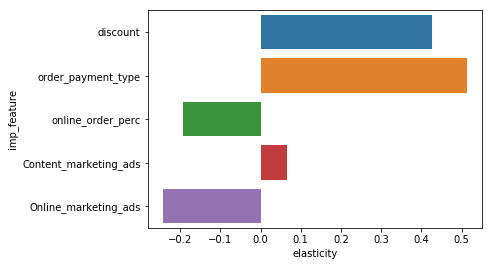

imp_feature   coef  elasticity
0               discount  0.317       0.426
1     order_payment_type  0.538       0.514
2      online_order_perc -0.344      -0.192
3  Content_marketing_ads  0.106       0.067
4   Online_marketing_ads -0.112      -0.243

In [774]:
elasticity(dlm1,home_train_dlm)

Text(0, 0.5, 'y_pred')

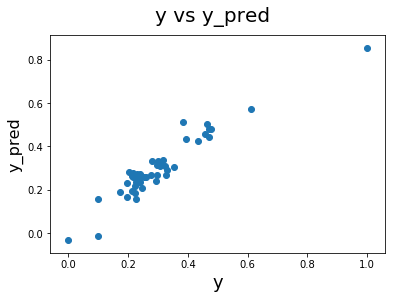

In [775]:
# Plotting y and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y, y_pred)
fig.suptitle('y vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

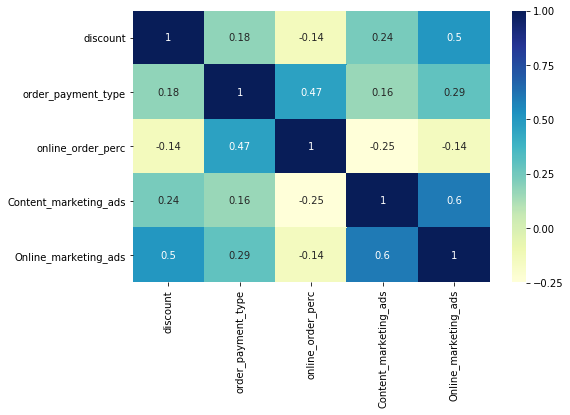

In [776]:
# Figure size
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(home_train_dlm[features].corr(), cmap="YlGnBu", annot=True)
plt.show()

### Distributed + Multiplicated Model

In [777]:
home_dlmm = ha_week[['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA2_listed_price', 'MA4_listed_price','lag_1_listed_price','lag_1_discount_offer',
       'lag_2_discount_offer','lag_3_discount_offer','lag_2_NPS','lag_3_NPS','lag_1_Stock_Index',
       'lag_2_Stock_Index','lag_3_Stock_Index','lag_1_Special_sales','lag_2_Special_sales','lag_3_Special_sales',
       'lag_1_Payday','lag_2_Payday','lag_3_Payday']]           


home_dlmm.head()


gmv  discount   sla  product_procurement_sla  order_payment_type  \
0   83742.000     0.397 2.943                    3.486                  34   
1 3725167.133     0.326 7.454                    2.751                 464   
2 4344419.000     0.339 7.116                    2.666                 527   
3 3917329.000     0.328 7.168                    2.762                 450   
4 2812144.000     0.328 7.297                    2.663                 327   

   online_order_perc  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0             97.143   0.054            1.854                  0.000   
1             23.062   0.081            2.780                  0.000   
2             22.570   0.081            2.780                  0.000   
3             20.766   0.081            2.780                  0.000   
4             21.613   0.028            1.139                  0.000   

   Online_marketing_ads    NPS  Stock_Index  Special_sales  Payday  \
0                 0.332 54.600     1177.000          0.000   0.200   
1                 0.498 54.600     1177.000          0.000   0.000   
2                 0.498 54.600     1177.000          0.286   0.143   
3                 0.498 54.600     1177.000          0.000   0.000   
4                 0.192 56.139     1185.286          0.000   0.143   

   heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  \
0          0.100          1.460          0.000          0.000   
1          1.059          2.322          4.155          0.029   
2          0.816          4.722          1.569          0.029   
3          1.632          4.172          1.141          0.029   
4          0.816          5.908          4.341          0.029   

   snow_on_grnd_cm  MA2_listed_price  MA4_listed_price  lag_1_listed_price  \
0            0.000             0.000             0.000            1845.875   
1            0.041            -0.129            -0.129            1855.961   
2            0.041             0.003            -0.086            1798.505   
3            0.041            -0.016            -0.089            1853.243   
4            0.041             0.015             0.008            1768.029   

   lag_1_discount_offer  lag_2_discount_offer  lag_3_discount_offer  \
0                 0.326                 0.339                 0.328   
1                 0.339                 0.328                 0.328   
2                 0.328                 0.328                 0.365   
3                 0.328                 0.365                 0.367   
4                 0.365                 0.367                 0.359   

   lag_2_NPS  lag_3_NPS  lag_1_Stock_Index  lag_2_Stock_Index  \
0     54.600     54.600           1177.000           1177.000   
1     54.600     56.139           1177.000           1177.000   
2     56.139     48.791           1177.000           1185.286   
3     48.791     46.925           1185.286           1116.000   
4     46.925     46.925           1116.000           1101.000   

   lag_3_Stock_Index  lag_1_Special_sales  lag_2_Special_sales  \
0           1177.000                0.000                0.286   
1           1185.286                0.286                0.000   
2           1116.000                0.000                0.000   
3           1101.000                0.000                0.000   
4           1101.000                0.000                0.000   

   lag_3_Special_sales  lag_1_Payday  lag_2_Payday  lag_3_Payday  
0                0.000         0.000         0.143         0.000  
1                0.000         0.143         0.000         0.143  
2                0.000         0.000         0.143         0.143  
3                0.000         0.143         0.143         0.000  
4                0.000         0.143         0.000         0.143

In [778]:
home_dlmm['lag_1_gmv'] = home_dlmm['gmv'].shift(-1)
home_dlmm['lag_2_gmv'] = home_dlmm['gmv'].shift(-2)
home_dlmm['lag_3_gmv'] = home_dlmm['gmv'].shift(-3)


In [779]:
### Checking NaN

home_dlmm.isnull().sum()

gmv                        0
discount                   0
sla                        0
product_procurement_sla    0
order_payment_type         0
online_order_perc          0
TV_ads                     1
Sponsorship_ads            1
Content_marketing_ads      1
Online_marketing_ads       1
NPS                        0
Stock_Index                0
Special_sales              0
Payday                     0
heat_deg_days              0
cool_deg_days              0
total_rain_mm              0
total_snow_cm              0
snow_on_grnd_cm            0
MA2_listed_price           0
MA4_listed_price           0
lag_1_listed_price         0
lag_1_discount_offer       0
lag_2_discount_offer       0
lag_3_discount_offer       0
lag_2_NPS                  0
lag_3_NPS                  0
lag_1_Stock_Index          0
lag_2_Stock_Index          0
lag_3_Stock_Index          0
lag_1_Special_sales        0
lag_2_Special_sales        0
lag_3_Special_sales        0
lag_1_Payday               0
lag_2_Payday  

In [780]:
home_dlmm = home_dlmm.fillna(0)

In [781]:
### Applying Log 
home_dlmm=np.log(home_dlmm)

home_dlmm = home_dlmm.fillna(0)
home_dlmm = home_dlmm.replace([np.inf, -np.inf], 0)

In [782]:
home_dlmm.head()

gmv  discount   sla  product_procurement_sla  order_payment_type  \
0 11.335    -0.923 1.079                    1.249               3.526   
1 15.131    -1.121 2.009                    1.012               6.140   
2 15.284    -1.081 1.962                    0.981               6.267   
3 15.181    -1.115 1.970                    1.016               6.109   
4 14.849    -1.114 1.987                    0.979               5.790   

   online_order_perc  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0              4.576  -2.922            0.617                 -8.364   
1              3.138  -2.516            1.023                 -7.958   
2              3.117  -2.516            1.023                 -7.958   
3              3.033  -2.516            1.023                 -7.958   
4              3.073  -3.568            0.131                 -9.046   

   Online_marketing_ads   NPS  Stock_Index  Special_sales  Payday  \
0                -1.103 4.000        7.071          0.000  -1.609   
1                -0.698 4.000        7.071          0.000   0.000   
2                -0.698 4.000        7.071         -1.253  -1.946   
3                -0.698 4.000        7.071          0.000   0.000   
4                -1.652 4.028        7.078          0.000  -1.946   

   heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  \
0         -2.303          0.378          0.000          0.000   
1          0.057          0.842          1.424         -3.532   
2         -0.203          1.552          0.451         -3.532   
3          0.490          1.428          0.131         -3.532   
4         -0.203          1.776          1.468         -3.532   

   snow_on_grnd_cm  MA2_listed_price  MA4_listed_price  lag_1_listed_price  \
0            0.000             0.000             0.000               7.521   
1           -3.189             0.000             0.000               7.526   
2           -3.189            -5.905             0.000               7.495   
3           -3.189             0.000             0.000               7.525   
4           -3.189            -4.200            -4.819               7.478   

   lag_1_discount_offer  lag_2_discount_offer  lag_3_discount_offer  \
0                -1.121                -1.081                -1.115   
1                -1.081                -1.115                -1.114   
2                -1.115                -1.114                -1.009   
3                -1.114                -1.009                -1.003   
4                -1.009                -1.003                -1.025   

   lag_2_NPS  lag_3_NPS  lag_1_Stock_Index  lag_2_Stock_Index  \
0      4.000      4.000              7.071              7.071   
1      4.000      4.028              7.071              7.071   
2      4.028      3.888              7.071              7.078   
3      3.888      3.849              7.078              7.018   
4      3.849      3.849              7.018              7.004   

   lag_3_Stock_Index  lag_1_Special_sales  lag_2_Special_sales  \
0              7.071                0.000               -1.253   
1              7.078               -1.253                0.000   
2              7.018                0.000                0.000   
3              7.004                0.000                0.000   
4              7.004                0.000                0.000   

   lag_3_Special_sales  lag_1_Payday  lag_2_Payday  lag_3_Payday  lag_1_gmv  \
0                0.000         0.000        -1.946         0.000     15.131   
1                0.000        -1.946         0.000        -1.946     15.284   
2                0.000         0.000        -1.946        -1.946     15.181   
3                0.000        -1.946        -1.946         0.000     14.849   
4                0.000        -1.946         0.000        -1.946     14.944   

   lag_2_gmv  lag_3_gmv  
0     15.284     15.181  
1     15.181     14.849  
2     14.849     14.944  
3     14.944     15.065  
4     15.065     14.944

In [783]:
###  Import the StandardScaler()
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

###  Create a scaling object
# scaler = StandardScaler()
scaler = MinMaxScaler()


###  Create a list of the variables that you need to scale
varlist = ['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA2_listed_price', 'MA4_listed_price','lag_1_listed_price','lag_1_discount_offer',
       'lag_2_discount_offer','lag_3_discount_offer','lag_2_NPS','lag_3_NPS','lag_1_Stock_Index',
       'lag_2_Stock_Index','lag_3_Stock_Index','lag_1_Special_sales','lag_2_Special_sales','lag_3_Special_sales',
       'lag_1_Payday','lag_2_Payday','lag_3_Payday']


###  Scale these variables using 'fit_transform'
home_dlmm[varlist] = scaler.fit_transform(home_dlmm[varlist])

In [784]:
home_dlmm.head()

gmv  discount   sla  product_procurement_sla  order_payment_type  \
0 0.000     0.635 0.000                    1.000               0.000   
1 0.741     0.166 1.000                    0.544               0.661   
2 0.771     0.262 0.950                    0.484               0.693   
3 0.751     0.179 0.958                    0.552               0.653   
4 0.686     0.181 0.977                    0.481               0.572   

   online_order_perc  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0              0.997   0.134            0.178                  0.073   
1              0.271   0.218            0.296                  0.117   
2              0.260   0.218            0.296                  0.117   
3              0.218   0.218            0.296                  0.117   
4              0.238   0.000            0.038                  0.000   

   Online_marketing_ads   NPS  Stock_Index  Special_sales  Payday  \
0                 0.142 0.882        0.734          1.000   0.173   
1                 0.247 0.882        0.734          1.000   1.000   
2                 0.247 0.882        0.734          0.356   0.000   
3                 0.247 0.882        0.734          1.000   1.000   
4                 0.000 1.000        0.768          1.000   0.000   

   heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  \
0          0.000          0.408          0.303          0.895   
1          0.477          0.604          0.736          0.000   
2          0.424          0.905          0.440          0.000   
3          0.564          0.853          0.343          0.000   
4          0.424          1.000          0.750          0.000   

   snow_on_grnd_cm  MA2_listed_price  MA4_listed_price  lag_1_listed_price  \
0            0.677             1.000             1.000               0.979   
1            0.000             1.000             1.000               0.980   
2            0.000             0.144             1.000               0.976   
3            0.000             1.000             1.000               0.980   
4            0.000             0.391             0.304               0.974   

   lag_1_discount_offer  lag_2_discount_offer  lag_3_discount_offer  \
0                 0.058                 0.092                 0.063   
1                 0.092                 0.063                 0.064   
2                 0.063                 0.064                 0.152   
3                 0.064                 0.152                 0.158   
4                 0.152                 0.158                 0.139   

   lag_2_NPS  lag_3_NPS  lag_1_Stock_Index  lag_2_Stock_Index  \
0      0.993      0.993              0.992              0.992   
1      0.993      1.000              0.992              0.992   
2      1.000      0.965              0.992              0.993   
3      0.965      0.955              0.993              0.985   
4      0.955      0.955              0.985              0.983   

   lag_3_Stock_Index  lag_1_Special_sales  lag_2_Special_sales  \
0              0.992                1.000                0.356   
1              0.993                0.356                1.000   
2              0.985                1.000                1.000   
3              0.983                1.000                1.000   
4              0.983                1.000                1.000   

   lag_3_Special_sales  lag_1_Payday  lag_2_Payday  lag_3_Payday  lag_1_gmv  \
0                1.000         1.000         0.000         1.000     15.131   
1                1.000         0.000         1.000         0.000     15.284   
2                1.000         1.000         0.000         0.000     15.181   
3                1.000         0.000         0.000         1.000     14.849   
4                1.000         0.000         1.000         0.000     14.944   

   lag_2_gmv  lag_3_gmv  
0     15.284     15.181  
1     15.181     14.849  
2     14.849     14.944  
3     14.944     15.065  
4     15.065     14.944

In [785]:
###  Split the train dataset into X and y
from sklearn.model_selection import train_test_split
x = home_dlmm.drop('gmv',axis=1)
y = home_dlmm['gmv']

home_train_dlmm = home_dlmm

In [786]:
print("X = Independent variable & Y = Target variable")
print(x.shape,y.shape)

X = Independent variable & Y = Target variable
(49, 38) (49,)


In [787]:
###  Instantiate
dlmm = LinearRegression()

###  Fit a line
dlmm.fit(x,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [788]:
###  Coefficient values

coef = pd.DataFrame(x.columns)
coef['Coefficient'] = pd.Series(dlmm.coef_)
coef


0  Coefficient
0                  discount        0.028
1                       sla       -0.119
2   product_procurement_sla       -0.015
3        order_payment_type        0.820
4         online_order_perc       -0.431
5                    TV_ads        0.002
6           Sponsorship_ads        0.040
7     Content_marketing_ads       -0.042
8      Online_marketing_ads       -0.016
9                       NPS        0.031
10              Stock_Index        0.015
11            Special_sales        0.019
12                   Payday        0.020
13            heat_deg_days       -0.007
14            cool_deg_days        0.026
15            total_rain_mm        0.004
16            total_snow_cm        0.014
17          snow_on_grnd_cm       -0.003
18         MA2_listed_price        0.023
19         MA4_listed_price       -0.011
20       lag_1_listed_price       -0.221
21     lag_1_discount_offer        0.189
22     lag_2_discount_offer       -0.015
23     lag_3_discount_offer        0.127
24                lag_2_NPS        1.164
25                lag_3_NPS       -0.927
26        lag_1_Stock_Index        0.521
27        lag_2_Stock_Index       -1.328
28        lag_3_Stock_Index        1.369
29      lag_1_Special_sales        0.005
30      lag_2_Special_sales        0.002
31      lag_3_Special_sales       -0.002
32             lag_1_Payday        0.030
33             lag_2_Payday        0.024
34             lag_3_Payday        0.001
35                lag_1_gmv       -0.010
36                lag_2_gmv        0.016
37                lag_3_gmv       -0.023

In [789]:
col = x.columns
col

Index(['discount', 'sla', 'product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads', 'Sponsorship_ads',
       'Content_marketing_ads', 'Online_marketing_ads', 'NPS', 'Stock_Index',
       'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days',
       'total_rain_mm', 'total_snow_cm', 'snow_on_grnd_cm', 'MA2_listed_price',
       'MA4_listed_price', 'lag_1_listed_price', 'lag_1_discount_offer',
       'lag_2_discount_offer', 'lag_3_discount_offer', 'lag_2_NPS',
       'lag_3_NPS', 'lag_1_Stock_Index', 'lag_2_Stock_Index',
       'lag_3_Stock_Index', 'lag_1_Special_sales', 'lag_2_Special_sales',
       'lag_3_Special_sales', 'lag_1_Payday', 'lag_2_Payday', 'lag_3_Payday',
       'lag_1_gmv', 'lag_2_gmv', 'lag_3_gmv'],
      dtype='object')

#### Model Building - Stepwise selection for feature selection

In [790]:
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [791]:
def stepwise_selection(x, y,
                       initial_list=['discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA2_listed_price', 'MA4_listed_price','lag_1_listed_price','lag_1_discount_offer',
       'lag_2_discount_offer','lag_3_discount_offer','lag_2_NPS','lag_3_NPS','lag_1_Stock_Index',
       'lag_2_Stock_Index','lag_3_Stock_Index','lag_1_Special_sales','lag_2_Special_sales','lag_3_Special_sales',
       'lag_1_Payday','lag_2_Payday','lag_3_Payday'],
                     threshold_in=0.01,threshold_out = 0.05, verbose=True):
    
    included = list(initial_list)
    while True:
        changed=False
        ###  forward step
        excluded = list(set(x.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
                
                
        ###  backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included]))).fit()
        ###  use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() ###  null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included


In [792]:
import statsmodels.api as sm  

final_features = stepwise_selection(x, y)

print("\n","final_selected_features:",final_features)

Drop NPS                            with p-value 0.818321
Drop total_rain_mm                  with p-value 0.776318
Drop Content_marketing_ads          with p-value 0.788765
Drop lag_1_listed_price             with p-value 0.593212
Drop MA4_listed_price               with p-value 0.55609
Drop lag_2_discount_offer           with p-value 0.57789
Drop lag_3_discount_offer           with p-value 0.550243
Drop snow_on_grnd_cm                with p-value 0.394598
Drop lag_3_Special_sales            with p-value 0.494955
Drop lag_1_Special_sales            with p-value 0.436603
Drop lag_3_Payday                   with p-value 0.39849
Drop lag_2_Special_sales            with p-value 0.604816
Drop total_snow_cm                  with p-value 0.344286
Drop MA2_listed_price               with p-value 0.275093
Drop heat_deg_days                  with p-value 0.408948
Drop Sponsorship_ads                with p-value 0.592423
Drop product_procurement_sla        with p-value 0.376234
Drop Payday      

In [793]:
###  Import statsmodels
import statsmodels.api as sm  

###  Subsetting training data for 15 selected columns
x_rfe1 = x[final_features]

x_rfe1 = sm.add_constant(x_rfe1)

###  Fitting the model with selected variables
dlmm1 = sm.OLS(y, x_rfe1).fit() 

print(dlmm1.params)

const                 0.358
discount              0.024
sla                  -0.039
order_payment_type    0.768
online_order_perc    -0.377
cool_deg_days         0.014
lag_2_NPS             0.260
lag_2_Stock_Index    -0.259
dtype: float64


In [794]:
print(dlmm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     2091.
Date:                Wed, 08 Jan 2020   Prob (F-statistic):           3.09e-50
Time:                        09:54:17   Log-Likelihood:                 174.32
No. Observations:                  49   AIC:                            -332.6
Df Residuals:                      41   BIC:                            -317.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3582      0

In [795]:
###  Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
7   lag_2_Stock_Index 211.860
6           lag_2_NPS 206.050
0               const  56.060
2                 sla   3.090
1            discount   2.320
3  order_payment_type   2.170
4   online_order_perc   1.860
5       cool_deg_days   1.520

In [796]:
x_rfe1.drop('lag_2_Stock_Index', axis = 1, inplace = True)


In [797]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlmm1 = sm.OLS(y, x_rfe1).fit()   
print(dlmm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     1989.
Date:                Wed, 08 Jan 2020   Prob (F-statistic):           6.99e-50
Time:                        09:54:17   Log-Likelihood:                 168.75
No. Observations:                  49   AIC:                            -323.5
Df Residuals:                      42   BIC:                            -310.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3559      0

In [798]:
x_rfe1.drop('lag_2_NPS', axis = 1, inplace = True)

In [799]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlmm1 = sm.OLS(y, x_rfe1).fit()   
print(dlmm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     2442.
Date:                Wed, 08 Jan 2020   Prob (F-statistic):           1.35e-51
Time:                        09:54:17   Log-Likelihood:                 168.74
No. Observations:                  49   AIC:                            -325.5
Df Residuals:                      43   BIC:                            -314.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3555      0

In [800]:
###  Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0               const 48.340
2                 sla  2.100
3  order_payment_type  2.030
1            discount  1.780
4   online_order_perc  1.560
5       cool_deg_days  1.330

In [801]:
features = list(x_rfe1.columns)
features.remove('const')
features

['discount', 'sla', 'order_payment_type', 'online_order_perc', 'cool_deg_days']

In [802]:
###  Model Evaluation on testing data
x_2 = x[features]

###  Predicition with selected features on the test data
y_pred = dlmm1.predict(sm.add_constant(x_2))

In [803]:
###  Mean square error (MSE)
mse = np.mean((y_pred - y)**2)
mse


5.9768261092949054e-05

In [804]:
###  Coefficient values

coef = pd.DataFrame(x_rfe1.columns)
coef['Coefficient'] = pd.Series(dlmm.coef_)
coef


0  Coefficient
0               const        0.028
1            discount       -0.119
2                 sla       -0.015
3  order_payment_type        0.820
4   online_order_perc       -0.431
5       cool_deg_days        0.002

In [805]:
###  Using K-Fold Cross validation evaluating on whole dataset

# lm = LinearRegression()
fold = KFold(10,shuffle = True, random_state = 100)

cv_scores = -cross_val_score(dlm,x[features],y,cv=fold,scoring='neg_mean_squared_error')

print("Neg. of MSE:",cv_scores,"\n")
print("Mean of 5 KFold CV - MSE:",cv_scores.mean())

Neg. of MSE: [9.22910693e-05 1.42442805e-05 1.02485485e-04 7.99488263e-05
 3.60203925e-05 6.60723860e-05 9.49606537e-05 4.66379478e-05
 8.27631536e-05 2.24589132e-04] 

Mean of 5 KFold CV - MSE: 8.400133267321284e-05


In [806]:
def elasticity(model,x):
    
    features_df = pd.DataFrame(model.params)
    features_df = features_df.rename(columns={0:'coef'})
    
    features_df['imp_feature'] = model.params.index
    features_df = features_df[features_df.imp_feature != 'const'][['imp_feature','coef']]
    features_df.index = range(len(features_df))
#      features

    elasticity_list = list()
    
    for i in range(len(features_df)):
        elasticity_list.append(((features_df.coef[i] * np.mean(x[features_df.imp_feature[i]])) / np.mean(x['gmv'])))

    features_df['elasticity'] = np.round(elasticity_list,3)
    
    sns.barplot(x='elasticity',y='imp_feature',data=features_df)
    plt.show()
    
    return features_df
    

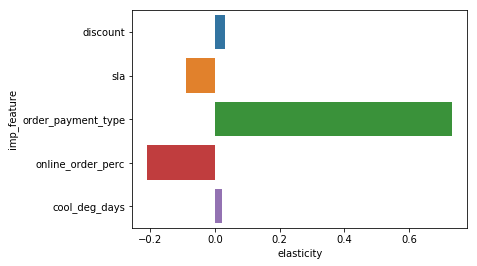

imp_feature   coef  elasticity
0            discount  0.024       0.032
1                 sla -0.045      -0.090
2  order_payment_type  0.766       0.732
3   online_order_perc -0.376      -0.209
4       cool_deg_days  0.019       0.020

In [807]:
elasticity(dlmm1,home_train_dlm)

Text(0, 0.5, 'y_pred')

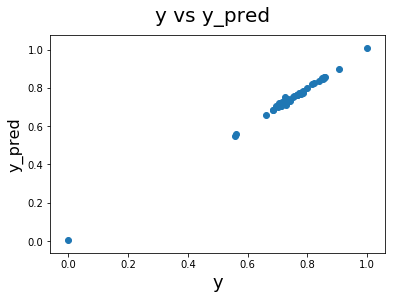

In [808]:
# Plotting y and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y, y_pred)
fig.suptitle('y vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

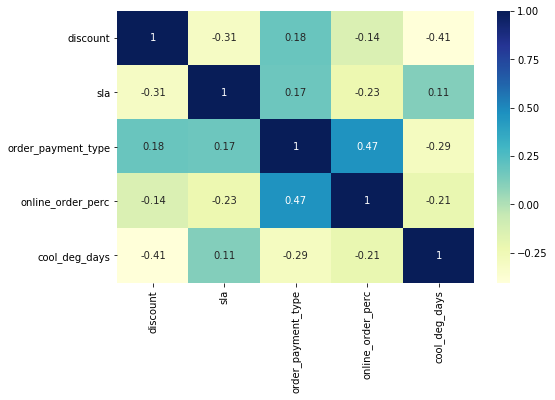

In [809]:
# Figure size
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(home_train_dlm[features].corr(), cmap="YlGnBu", annot=True)
plt.show()